In [1]:
from __future__ import nested_scopes
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
display(HTML('<style>.CodeMirror{font-family: "Courier New";font-size: 12pt;}</style>'))
display(HTML('<style>.rendered_html table, .rendered_html td, .rendered_html th {font-size: 20px;}</style>'))


# init

In [3]:
from pathlib import Path
home = str(Path.home())
spark_home=home+"/spark-3.0.0-bin-hadoop2.7"
hadoop_home=home+"/hadoop-2.7.0"
java_home=home+'/jdk1.8.0_212'

In [4]:
import findspark
findspark.init(spark_home)

In [5]:
from __future__ import nested_scopes


In [6]:
import re
import os
import pandas
pandas.set_option('display.max_rows', None)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors
from matplotlib import rcParams
rcParams['font.sans-serif'] =  'Courier New'
rcParams['font.family'] = 'Courier New'
rcParams['font.size'] = '12'
%matplotlib inline

from IPython.display import display,HTML
import threading
import collections

from IPython.display import display
from ipywidgets import IntProgress,Layout
import time
import threading
import gzip

In [7]:
import pyspark
import pyspark.sql
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructType, StructField, DateType,
    TimestampType, StringType, LongType, IntegerType, DoubleType,FloatType)
from pyspark.sql.functions import to_date, floor
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import lit
import time, timeit
from pyspark.storagelevel import StorageLevel
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col


In [8]:
from pyspark.ml import Pipeline
import pandas
import numpy as np


In [9]:
import math
from functools import reduce
import json


In [10]:
from pyspark.sql.types import *
from pyspark.sql import functions as F
from datetime import date


In [11]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext


In [12]:
from datetime import date
from datetime import datetime

In [13]:
from pandasql import sqldf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [14]:
def sync_clocks(nodes):
    !ssh root@127.0.0.1 "/usr/sbin/ntpdate -u 10.0.0.100 2"
    for node in nodes:
        !ssh root@$node "/usr/sbin/ntpdate -u 10.0.0.100 2"

In [15]:
def run_train(train_data, params):
    from sparkxgb import XGBoostClassifier
    t1 = timeit.default_timer()
    print("{} : {}".format("Start time", t1))
    xgboost =  XGBoostClassifier(**params)
    model = xgboost.fit(train_data)
    t2 = timeit.default_timer()
    train_time = t2 - t1
    display(HTML(('Completed training the model. Time(sec): <font size=6pt color=red>{:f}</font>'.format(train_time))))
    #train_data.groupBy(F.spark_partition_id()).count().show(100)
    #print("rows: ",train_data.count())
    return model, train_time

In [16]:
def run_train_regressor(train_data, params):
    from sparkxgb import XGBoostRegressor
    t1 = timeit.default_timer()
    print("{} : {}".format("Start time", t1))
    singlePrecisionHistogram=params['singlePrecisionHistogram']
    del params['singlePrecisionHistogram']
    xgboost =  XGBoostRegressor(**params)
    xgboost._java_obj.setSinglePrecisionHistogram(singlePrecisionHistogram)
    model = xgboost.fit(train_data)
    t2 = timeit.default_timer()
    train_time = t2 - t1
    display(HTML(('Completed training the model. Time(sec): <font size=6pt color=red>{:f}</font>'.format(train_time))))
    return model, train_time

In [17]:
#%env http_proxy=
#%env https_proxy=
#import pyhdfs
#fs = pyhdfs.HdfsClient(hosts='10.0.2.125:50070', user_name='yuzhou')


In [18]:
import socket
localhost=socket.gethostname()


In [19]:


basedif="aws_c5"

emon_events='''
    -q -c -experimental -t0.5 -l100000 -u
    -C (

    INST_RETIRED.ANY
    CPU_CLK_UNHALTED.REF_TSC
    CPU_CLK_UNHALTED.THREAD
    CYCLE_ACTIVITY.STALLS_L3_MISS
    CYCLE_ACTIVITY.CYCLES_MEM_ANY
    CYCLE_ACTIVITY.STALLS_TOTAL
    DTLB_LOAD_MISSES.WALK_ACTIVE
    UNC_CHA_TOR_OCCUPANCY.IA_MISS:filter1=0x40432
    UNC_CHA_TOR_INSERTS.IA_MISS:filter1=0x40432
    UNC_CHA_CLOCKTICKS
    UNC_M_CAS_COUNT.RD
    UNC_M_CAS_COUNT.WR
    UNC_IIO_DATA_REQ_OF_CPU.MEM_WRITE.PART0
    UNC_IIO_DATA_REQ_OF_CPU.MEM_READ.PART0
    UNC_IIO_DATA_REQ_BY_CPU.MEM_WRITE.PART0
    UNC_IIO_DATA_REQ_BY_CPU.MEM_READ.PART0


    INST_RETIRED.ANY
    CPU_CLK_UNHALTED.REF_TSC
    CPU_CLK_UNHALTED.THREAD
    OFFCORE_RESPONSE:request=ALL_READS:response=L3_MISS.ANY_SNOOP:ocr_msr_val=0x3fB80007f7
    OFFCORE_RESPONSE:request=ALL_READS:response=L3_MISS.ANY_SNOOP:ocr_msr_val=0x3f840007f7
    MEM_LOAD_RETIRED.L3_MISS
    UOPS_ISSUED.STALL_CYCLES
    UNC_CHA_TOR_OCCUPANCY.IA_MISS:filter1=0x40431
    UNC_CHA_TOR_INSERTS.IA_MISS:filter1=0x40431
    UNC_CHA_CLOCKTICKS
    )
'''

def killsar(clients):
    for l in clients:
        out=!ssh $l "ps aux | grep -w sar | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w pidstat | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w perf | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh root@$l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w nvidia-smi | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        !ssh $l "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -stop > /dev/null 2>&1"
            
def startmonitor(clients,appid,**kwargs):
    local_profile_dir=home+"/profile/"
    prof=local_profile_dir+appid+"/"
    !mkdir -p $prof
    !echo "" > /tmp/training_time
    
#    for l in clients:
#        !ssh $l date
    
    killsar(clients)
    
    if kwargs.get("collect_emon",False):
        with open(home+"/emon.list",'w+') as f:
            f.write(emon_events)
        for l in clients:
            !scp {home}/emon.list {l}:{home}/emon.list  > /dev/null 2>&1
    
    perfsyscalls=kwargs.get("collect_perf_syscall",None)
    
    for l in clients:
        !mkdir -p $prof/$l/
        !ssh $l mkdir -p $prof/$l/
        !ssh $l "sar -o {prof}/{l}/sar.bin -r -u -d -n DEV 1 >/dev/null 2>&1 &"
        if kwargs.get("collect_pid",False):
            !ssh $l "{java_home}/bin/jps | grep CoarseGrainedExecutorBackend | head -n 1 | cut -d' ' -f 1 | xargs  -I % pidstat -h -t -p % 1  > {prof}/{l}/pidstat.out  2>/dev/null &"
        !ssh root@{l} 'cat /proc/uptime  | cut -d" " -f 1 | xargs -I ^ date -d "- ^ seconds"  +%s.%N' > $prof/$l/uptime.txt
        if kwargs.get("collect_sched",False):
            !ssh root@{l} 'perf trace -e "sched:sched_switch" -C 8-15 -o {prof}/{l}/sched.txt -T -- sleep 10000 >/dev/null 2>/dev/null &'
        if kwargs.get("collect_emon",False):
            !ssh {l} "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -i {home}/emon.list -f {prof}/{l}/emon.rst >/dev/null 2>&1 & "
        if perfsyscalls is not None:
            !ssh root@{l} "perf stat -e 'syscalls:sys_exit_poll,syscalls:sys_exit_epoll_wait' -a -I 1000 -o {prof}/{l}/perfstat.txt  >/dev/null 2>&1 & "
        if kwargs.get("collect_nv_smi",False):
            !ssh {l} "nvidia-smi --query-gpu=timestamp,index,utilization.gpu,utilization.memory,memory.used, -lms 500  --format=csv -f  {prof}/{l}/gpu.txt >/dev/null 2>&1 & "
    return prof

def stopmonitor(clients, sc, appid,**kwargs):
    %cd ~
    
    local_profile_dir=home+"/profile/"
    prof=local_profile_dir+appid+"/"
    !mkdir -p $prof
    
    killsar(clients)
    
    for l in clients:
        !ssh $l "sar -f {prof}/{l}/sar.bin -r > {prof}/{l}/sar_mem.sar;sar -f {prof}/{l}/sar.bin -u > {prof}/{l}/sar_cpu.sar;sar -f {prof}/{l}/sar.bin -d > {prof}/{l}/sar_disk.sar;sar -f {prof}/{l}/sar.bin -n DEV > {prof}/{l}/sar_nic.sar;" 
        !ssh $l "grep -rI xgbtck --no-filename {hadoop_home}/logs/userlogs/{appid}/* | sed 's/^ //g'  > {prof}/{l}/xgbtck.txt"
        if l!= socket.gethostname():
            !scp -r $l:$prof/$l $prof/ > /dev/null 2>&1
        !ssh $l "{java_home}/bin/jps | grep CoarseGrainedExecutorBackend | head -n 2 | tail -n 1 | cut -d' ' -f 1  | xargs -I % ps -To tid p %" > {prof}/{l}/sched_threads.txt
        !ssh $l "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -v " > $prof/$l/emonv.txt
        !ssh $l "sar -V " > $prof/$l/sarv.txt
        !test -f $prof/$l/perfstat.txt && head -n 1 $prof/$l/perfstat.txt > $prof/$l/perfstarttime
    if sc is not None:
        sc.stop()
    
    xgbfiles=!find {home}/profile/{appid} | grep xgbtck
    !cat /tmp/training_time >> {xgbfiles[0]}
    
    !{hadoop_home}/bin/hadoop fs -copyToLocal /tmp/sparkEventLog/$appid $prof/app.log
#    !cp {home}/spark_events/{appid}  $prof/app.log
#    fs.mkdirs(f"/{basedif}/")
#    v=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(local_profile_dir+appid)) for f in fn]
#    for f in v:
#        paths=os.path.split(f)
#        fs.mkdirs("/"+basedif+"/"+paths[0][len(local_profile_dir):])
#        fs.copy_from_local(f,"/"+basedif+"/"+paths[0][len(local_profile_dir):]+"/"+paths[1],overwrite=True)
#    !HADOOP_USER_NAME=yuzhou hadoop fs -put  file://{prof} hdfs://10.1.2.125:8020/{basedif}
    print('http://localhost:28080/history/{:s}/jobs'.format(appid))
    print('http://sr525:28080/history/{:s}/jobs'.format(appid))
    print('http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/{:s}.json'.format(appid))
    print(appid)

In [20]:
def pinexecutor(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        t=[l for l in range(0,cores_per_executor)]
        for l in pids:
            cpus=','.join(map(str, t))
            for i in range(0,cores_per_executor):
                t[i]=t[i]+cores_per_executor
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "


In [21]:
total_cores=48
def pinexecutor_soc(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        if len(pids) % 2 !=0:
            print("pin executor soc must have 2x executors, now created, ",len(pids))
            return
        
        soc=0
        soc0=list(range(0,cores_per_executor))
        soc1=list(range(int(total_cores/2),int(total_cores/2)+cores_per_executor))
        for l in pids:
            target_cpus=soc0 if soc==0 else soc1
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            print(f"taskset -a -p -c {cpus} {l}")
            for i in range(0,cores_per_executor):
                target_cpus[i]=target_cpus[i]+cores_per_executor


In [22]:
total_cores=48
def numabound(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        soc=0
        soc0=range(0,int(total_cores/2))
        soc1=range(int(total_cores/2),total_cores)
        for l in pids:
            target_cpus=soc0 if soc==0 else soc1
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            

In [23]:
total_cores=48
def numabound_smt(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        soc=0
        soc0=list(range(0,int(total_cores/2)))
        soc1=list(range(int(total_cores/2),total_cores))
        soc2=list(range(total_cores,total_cores+int(total_cores/2)))
        soc3=list(range(total_cores+int(total_cores/2),2*total_cores))        
        for l in pids:
            target_cpus=soc0+soc2 if soc==0 else soc1+soc3
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            print(l,cpus)
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            
    

In [24]:
def fixfreq(clients, freq):
    freqstr="0x"+hex(int(freq*10))[2:]*8
    for client in clients:
        !ssh root@$client "emon --write-msr 0x1ad=$freqstr > /dev/null"

In [25]:
def gettrainingtime(clients, appid):
    xgbtck=[]
    for l in clients:
        o=!ssh $l "cd {home}/hadoop-2.7.0/logs/userlogs/{appid}/; grep xgbtck */stdout"
        xgbtck.extend(o)
    if len(xgbtck)==0:
        return
    xgbtck=[l.split(" ") for l in xgbtck]
    begins=[int(l[3]) for l in xgbtck if l[1]=="begin"]
    end=[int(l[3]) for l in xgbtck if l[1]=="end"]
    trainingtime=max([(l[1]-l[0])/1000 for l in list(zip(begins,end))])
    display(HTML(('Training Time(sec): <font size=6pt color=red>{:f}</font>'.format(trainingtime))))
    

In [26]:
def draw_allreduce(appid):
    xgbtck=[]
    for l in clients:
        o=!ssh $l "cd {home}/hadoop-2.7.0/logs/userlogs/{appid}/; grep xgbtck */stdout"
        xgbtck.extend(o)
    if len(xgbtck)==0:
        return
    out=[l.split(" ") for l in xgbtck if "allreduce" in l]
    pds=pandas.DataFrame(out)
    pds.columns=['t','n','rank','time','elapsed',"callcnt",'msg']
    pdsx=pds.astype({'rank': 'int32','time':'float','elapsed':"float","callcnt":"int32","msg":"int32"})
    pdsx['msg/cnt']=pdsx['msg'] /pdsx['callcnt']

    pdp=sqldf("select * from pdsx where rank=0")
    pdp.plot(x="time",y=['elapsed'],figsize=(30,8))
    pdp.plot(x="time",y=['callcnt'],figsize=(30,8))
    pdp.plot(x="time",y=['msg/cnt'],figsize=(30,8))

    ags=sqldf("select rank,sum(callcnt) as callcnt,sum(elapsed) as elapsed ,avg(`msg/cnt`) as msg_cnt from pdsx group by rank")
    ags.plot.bar(x='rank',y="elapsed",figsize=(30,8))
    ags.plot.bar(x='rank',y="msg_cnt",figsize=(30,8))

In [27]:
def dropcache(clients):
    for l in clients:
        !ssh root@$l "sync && echo 3 > /proc/sys/vm/drop_caches; free -h"
        

In [28]:
clients='''172.31.57.117 
172.31.63.214 
172.31.50.230 
172.31.48.87 
172.31.56.136 
172.31.59.90 
172.31.62.187 
172.31.52.207'''.split()

In [29]:
clients

['172.31.57.117',
 '172.31.63.214',
 '172.31.50.230',
 '172.31.48.87',
 '172.31.56.136',
 '172.31.59.90',
 '172.31.62.187',
 '172.31.52.207']

In [30]:
def plotresult(aslavenode, appid, numRound=100):
    out=!ssh {aslavenode} 'cat {home}/hadoop-2.7.0/logs/userlogs/{appid}/*/stderr'
    li=parse_out(out)
    max50pd=pandas.DataFrame(li)
    max50pd.columns=['extranode','prune','max_depth','time']
    max50pd.plot(x='time',y="extranode",figsize=(30,8))
    max50pd.iloc[0:numRound].plot(y="extranode",figsize=(30,8))
    max50pd.iloc[0:numRound].plot(y="max_depth",figsize=(30,8))

In [31]:
def parse_out(out):
    sparkout=[l.strip().split(" ") for l in out if "max_depth" in l]
    sparkout=[[int(l[6]),int(l[9]),int(l[12].split("=")[1]),datetime.strptime(l[0],"[%H:%M:%S]")] for l in sparkout]
    return sparkout

In [32]:
!aws s3 sync s3://mlp-spark-dataset-bucket/jars-for-aws-cpu {home}/jars-for-aws-cpu

In [33]:
!ls {home}/jars-for-aws-cpu/

1.3  arrow  sparkxgb_1.23.zip


In [34]:
sparkeventLogdir = f'hdfs://{localhost}/tmp/sparkEventLog'
sparkxgbpathname = f'{home}/jars-for-aws-cpu/sparkxgb_1.23.zip'

In [35]:
jars=!ls -d {home}/jars-for-aws-cpu/arrow/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/arrow/spark-arrow-datasource-0.9.0-jar-with-dependencies.jar,/home/sparkuser/jars-for-aws-cpu/arrow/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/arrow/xgboost4j_2.12-1.3.3.jar pyspark-shell'

In [36]:
sparkarrowdsjar = 'spark-arrow-datasource-0.9.0-jar-with-dependencies.jar'
sparkarrowdsjarpath = f'{home}/jars-for-aws-cpu/arrow/' + sparkarrowdsjar

In [37]:
def create_cntx(nodes, executors_per_node, cores_per_executor, str_appname):

    
    executor_memory = max(int(math.floor(nodes*total_size/(nodes*executors_per_node)))-1024-int(math.floor(cache_size*1024/(nodes*executors_per_node))), 1000)
    offheap = max(int(math.floor(cache_size*1024/(nodes*executors_per_node))), 2000)

    
    print('executor per node: {:d}\nparallelism: {:d}\nmemory: {:d}m\noffheap:{:d}m'.format(executors_per_node,nodes*executors_per_node*cores_per_executor,executor_memory,offheap))
    
    
    conf = (SparkConf()
        .set('spark.default.parallelism', '{:d}'.format(nodes*executors_per_node*cores_per_executor))
        .set('spark.sql.files.maxPartitionBytes', '500m')      # key setting for arrow loading patch !!!
        .set('spark.sql.join.preferSortMergeJoin','False')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.sql.codegen.wholeStage', 'false')
        .set('spark.app.name', str_appname)
        .set('spark.rdd.compress', 'False')
        .set('spark.serializer','org.apache.spark.serializer.KryoSerializer')
        .set('spark.driver.memory','48g')
        .set('spark.executor.instances', '{:d}'.format(executors_per_node*nodes))
        .set('spark.executor.cores','{:d}'.format(cores_per_executor))
        .set('spark.executor.memory', '{:d}m'.format(executor_memory))
        .set('spark.executor.memoryOverhead','1g')    # 10g is known good for 1321mx46 dataset.
        .set('spark.task.cpus','1')      # key setting for arrow loading patch !!!
        .set('spark.memory.offHeap.enabled','True')
        .set('spark.memory.offHeap.size','{:d}m'.format(offheap))
        .set('spark.memory.storageFraction','0.5')
        .set('spark.executor.extraJavaOptions',\
            '-XX:+UseParallelGC -XX:+UseParallelOldGC -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCTimeStamps')
        .set('spark.executorEnv.rabit_reduce_ring_mincount',10<<20)
        .set('spark.eventLog.enabled', 'True')
        .set('spark.eventLog.dir',sparkeventLogdir)
        .set('spark.driver.maxResultSize', 0)
        .set('spark.resourceProfile.executorReuse', 'True')
        .set('spark.dynamicAllocation.enabled', 'True')
        .set('spark.shuffle.service.enabled', 'False')
        .set('spark.dynamicAllocation.shuffleTracking.enabled', 'True')
        .set('spark.dynamicAllocation.exeutorIdleTimeout','10000')
        .set('spark.dynamicAllocation.minExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.maxExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.initialExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.driver.extraClassPath', sparkarrowdsjarpath)
        .set('spark.executor.extraClassPath', './'+sparkarrowdsjar)
        .set('xgboost.spark.arrow.optimization.enabled', 'True')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.locality.wait',0)
        .setMaster('yarn')
        )

    sc = SparkContext(conf=conf,master='yarn')
    sc.setLogLevel('INFO')
    spark = SQLContext(sc)
    sc.addPyFile(sparkxgbpathname)
    time.sleep(10)
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        print(client,":",len(pids)," ","\t".join(map(str,pids)))

    return sc, spark

In [38]:
def create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, str_appname):

    
    executor_memory = max(int(math.floor(nodes*total_size/(nodes*executors_per_node)))-1024-int(math.floor(cache_size*1024/(nodes*executors_per_node))), 1000)
    offheap = max(int(math.floor(cache_size*1024/(nodes*executors_per_node))), 2000)

    
    print('executor per node: {:d}\nparallelism: {:d}\nmemory: {:d}m\noffheap:{:d}m'.format(executors_per_node,nodes*executors_per_node*cores_per_executor,executor_memory,offheap))
   
    
    
    conf = (SparkConf()
        .set('spark.default.parallelism', '{:d}'.format(nodes*executors_per_node*cores_per_executor))
        .set('spark.sql.files.maxPartitionBytes', '500m')      # key setting for arrow loading patch !!!
        .set('spark.sql.join.preferSortMergeJoin','False')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.sql.codegen.wholeStage', 'false')
        .set('spark.app.name', str_appname)
        .set('spark.rdd.compress', 'False')
        .set('spark.serializer','org.apache.spark.serializer.KryoSerializer')
        .set('spark.driver.memory','48g')
        .set('spark.executor.instances', '{:d}'.format(executors_per_node*nodes))
        .set('spark.executor.cores','{:d}'.format(cores_per_executor))
        .set('spark.executor.memory', '{:d}m'.format(executor_memory))
        .set('spark.executor.memoryOverhead','1g')    # 10g is known good for 1321mx46 dataset.
        .set('spark.task.cpus',cores_per_executor)      # key setting for arrow loading patch !!!
        .set('spark.memory.offHeap.enabled','True')
        .set('spark.memory.offHeap.size','{:d}m'.format(offheap))
        .set('spark.memory.storageFraction','0.5')
        .set('spark.executor.extraJavaOptions',\
            '-XX:+UseParallelGC -XX:+UseParallelOldGC -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCTimeStamps')
        .set('spark.executorEnv.rabit_reduce_ring_mincount',10<<20)
        .set('spark.eventLog.enabled', 'True')
        .set('spark.eventLog.dir',sparkeventLogdir)
        .set('spark.driver.maxResultSize', 0)
        .set('spark.resourceProfile.executorReuse', 'True')
        .set('spark.dynamicAllocation.enabled', 'True')
        .set('spark.shuffle.service.enabled', 'False')
        .set('spark.dynamicAllocation.shuffleTracking.enabled', 'True')
        .set('spark.dynamicAllocation.exeutorIdleTimeout','10000')
        .set('spark.dynamicAllocation.minExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.maxExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.initialExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .setMaster('yarn')
        )

    sc = SparkContext(conf=conf,master='yarn')
    sc.setLogLevel('INFO')
    spark = SQLContext(sc)
    sc.addPyFile(sparkxgbpathname)
    time.sleep(10)
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        print(client,":",len(pids)," ","\t".join(map(str,pids)))

    return sc, spark

In [39]:
def draw_sar(appid):
    fig, axs=plt.subplots(3,1,sharex=True,figsize=(30,5*3))

    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_mem.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    df['time']=pandas.to_datetime(df['time'],errors='ignore')
    ddf=sqldf("select time, kbcached*`%memused`/kbmemused as cached, (kbmemused-kbcached)*`%memused`/kbmemused as used from df where time != 'Average:'")
    axs[0].stackplot(ddf['time'],ddf['used'],ddf['cached'],labels=['used','cached'])
    axs[0].legend(loc='upper left')


    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_disk.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    ddf=sqldf("select time,sum(`rkB/s`/1024) as read, sum(`wkB/s`/1024) as write from df where time!='Average:' group by time") 
    axs[1].stackplot(ddf['time'],ddf['read'],ddf['write'],labels=['read','write'])
    axs[1].legend(loc='upper left')

    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_cpu.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    ddf=sqldf("select time,`%user` as user,`%system` as system, `%iowait` as iowait from df where time!='Average:'")
    axs[2].stackplot(ddf['time'],ddf['user'],ddf['system'],ddf['iowait'],labels=['user','system','iowait'])
    axs[2].legend(loc='upper left')

# get data

In [22]:
!aws s3 sync s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/ {home}/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/._SUCCESS.crc to {home}/._SUCCESS.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00000-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00000-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00005-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00005-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00001-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00001-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00002-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc t

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00039-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00039-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00033-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00033-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00041-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00041-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00042-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00042-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00070-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00070-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00078-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00078-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00076-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00076-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00080-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00080-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00110-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00110-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00107-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00107-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00109-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00109-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00113-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00113-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00150-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00150-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00149-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00149-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00148-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00148-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00144-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00144-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00182-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00182-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00184-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00184-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00171-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00171-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00183-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00183-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00216-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00216-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00221-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00221-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00223-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00223-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00219-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00219-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00253-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00253-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00254-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00254-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00243-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00243-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00247-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00247-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00329-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00329-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00321-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00321-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00289-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00289-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00328-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00328-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00366-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00366-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00367-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00367-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00369-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00369-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00360-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00360-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00402-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00402-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00401-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00401-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00407-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00407-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00404-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00404-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00437-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00437-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00440-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00440-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00444-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00444-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00432-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00432-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00475-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00475-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00479-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00479-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00477-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00477-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00478-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00478-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00492-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00492-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00515-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00515-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00518-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00518-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00514-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00514-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00548-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00548-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00550-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00550-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00543-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00543-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00545-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00545-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00584-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00584-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00581-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00581-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00586-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00586-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00587-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00587-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00622-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00622-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00618-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00618-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00615-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00615-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00621-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00621-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00656-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00656-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00654-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00654-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00659-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00659-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00657-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00657-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00727-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00727-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00724-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00724-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00726-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00726-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00728-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00728-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00762-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00762-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00764-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00764-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00761-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00761-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/.part-00766-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc to {home}/.part-00766-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet.crc
download: s3://mlp-spark-dataset-bucket/

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00065-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00065-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00066-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00066-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00067-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00067-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00068-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00068-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00100-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00100-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00102-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00102-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00103-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00103-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00104-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00104-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00138-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00138-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00137-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00137-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00139-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00139-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00140-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00140-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00173-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00173-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00174-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00174-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00175-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00175-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00176-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00176-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00209-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00209-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00210-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00210-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00211-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00211-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00212-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00212-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00244-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00244-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00246-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00246-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00247-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00247-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00248-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00248-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00281-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00281-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00282-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00282-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00283-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00283-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00284-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00284-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00317-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00317-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00318-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00318-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00319-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00319-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00320-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00320-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00353-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00353-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00354-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00354-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00355-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00355-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00356-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00356-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00389-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00389-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00390-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00390-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00391-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00391-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00392-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00392-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00425-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00425-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00426-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00426-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00427-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00427-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00428-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00428-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00461-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00461-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00462-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00462-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00463-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00463-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00464-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00464-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00497-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00497-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00498-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00498-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00499-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00499-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00500-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00500-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00533-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00533-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00534-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00534-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00535-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00535-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00536-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00536-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00569-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00569-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00570-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00570-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00571-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00571-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00573-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00573-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00605-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00605-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00606-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00606-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00608-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00608-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00609-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00609-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00641-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00641-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00642-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00642-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00644-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00644-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00643-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00643-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00677-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00677-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00678-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00678-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00679-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00679-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00680-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00680-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00713-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00713-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00714-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00714-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00715-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00715-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00716-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00716-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00750-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00750-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00751-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00751-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00752-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00752-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8x96/part-00753-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet to {home}/part-00753-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
download: s3://mlp-spark-dataset-bucket/HiBench606Mx50.dataframe.float.parquet.8

In [27]:
!hadoop fs -put /home/sparkuser/HiBench606Mx50.dataframe.float.parquet.8x96 /

^C


In [ ]:
!hadoop fs -rm -r /home/sparkuser/HiBench606Mx50.dataframe.float.parquet.8x96

In [28]:
!ls /home/sparkuser/HiBench606Mx50.dataframe.float.parquet.8x96

_SUCCESS
part-00000-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00001-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00002-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00003-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00004-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00005-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00006-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00007-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00008-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00009-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00010-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00011-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00012-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00013-9700b76c-6df1-43fa-ab85-dd34d6b16430-c000.snappy.parquet
part-00014-9700b76c-6df1-43fa-ab85-dd34

# test

In [47]:
!aws s3 cp s3://mlp-spark-dataset-bucket/ding_train.parquet {home}/

download: s3://mlp-spark-dataset-bucket/ding_train.parquet to ../ding_train.parquet


In [48]:
!/home/sparkuser/hadoop-2.7.0/bin/hadoop fs -put {home}/ding_train.parquet /

In [110]:
nodes=len(clients)
executors_per_node=2
cores_per_executor=4

cache_size=20
total_size=25

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
appid = sc.applicationId


executor per node: 2
parallelism: 8
memory: 1000m
offheap:10240m
ip-172-31-53-217 : 2   29782	29723


In [102]:
df=spark.read.parquet("/ding_train.parquet")

In [103]:
df=df.drop("Latitude")
df.show()

+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+---------+
|                 _0|                 _1|                 _2|                  _3|                  _4|                 _5|                  _6|                 _7|                 _8|                 _9|Longitude|
+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+---------+
| 0.5574082592251699|  0.294192406540958| 0.4166666666666667|  0.5328031809145128|0.044623505112578725| 0.4274353876739562|0.042615365883355655| 0.4639175257731959|  0.422680412371134| 0.3917525773195876| 116.6449|
| 0.3652190023510258| 0.5271927925213973|0.33333333333333337|  0.2743538767395626|0.044623505112578725|0.27833001988071565|0.042615365883355

In [104]:
df=df.withColumn("label",F.when(F.col("Longitude")>116.5,0).otherwise(1).astype(DoubleType()))

In [105]:
df=df.drop("Longitude")

In [106]:
df=df.repartition(8)

In [107]:
df.write.mode('overwrite').parquet("/ding_train_arrow.parquet")

In [108]:
!{hadoop_home}/bin/hadoop fs -ls /ding_train_arrow.parquet

Found 9 items
-rw-r--r--   1 sparkuser supergroup          0 2021-02-19 03:15 /ding_train_arrow.parquet/_SUCCESS
-rw-r--r--   1 sparkuser supergroup    6239313 2021-02-19 03:15 /ding_train_arrow.parquet/part-00000-dc5d884b-61b7-46f8-9e5f-505908df7c83-c000.snappy.parquet
-rw-r--r--   1 sparkuser supergroup    6259650 2021-02-19 03:15 /ding_train_arrow.parquet/part-00001-dc5d884b-61b7-46f8-9e5f-505908df7c83-c000.snappy.parquet
-rw-r--r--   1 sparkuser supergroup    6257500 2021-02-19 03:15 /ding_train_arrow.parquet/part-00002-dc5d884b-61b7-46f8-9e5f-505908df7c83-c000.snappy.parquet
-rw-r--r--   1 sparkuser supergroup    6260170 2021-02-19 03:15 /ding_train_arrow.parquet/part-00003-dc5d884b-61b7-46f8-9e5f-505908df7c83-c000.snappy.parquet
-rw-r--r--   1 sparkuser supergroup    6260923 2021-02-19 03:15 /ding_train_arrow.parquet/part-00004-dc5d884b-61b7-46f8-9e5f-505908df7c83-c000.snappy.parquet
-rw-r--r--   1 sparkuser supergroup    6253746 2021-02-19 03:15 /ding_train_arrow.parquet/part-00

In [83]:
df=spark.read.format("arrow").load("/ding_train_arrow.parquet")

In [87]:
df.agg(F.max("_0")).show()

+-------+
|max(_0)|
+-------+
|    1.0|
+-------+



In [112]:
sc.stop()

## classification

Fri Feb 19 03:17:10 UTC 2021
Start time : 7023.690088883


/home/sparkuser
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
21/02/19 03:17:43 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1613701151690_0006/jobs
http://sr525:28080/history/application_1613701151690_0006/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1613701151690_0006.json
application_1613701151690_0006


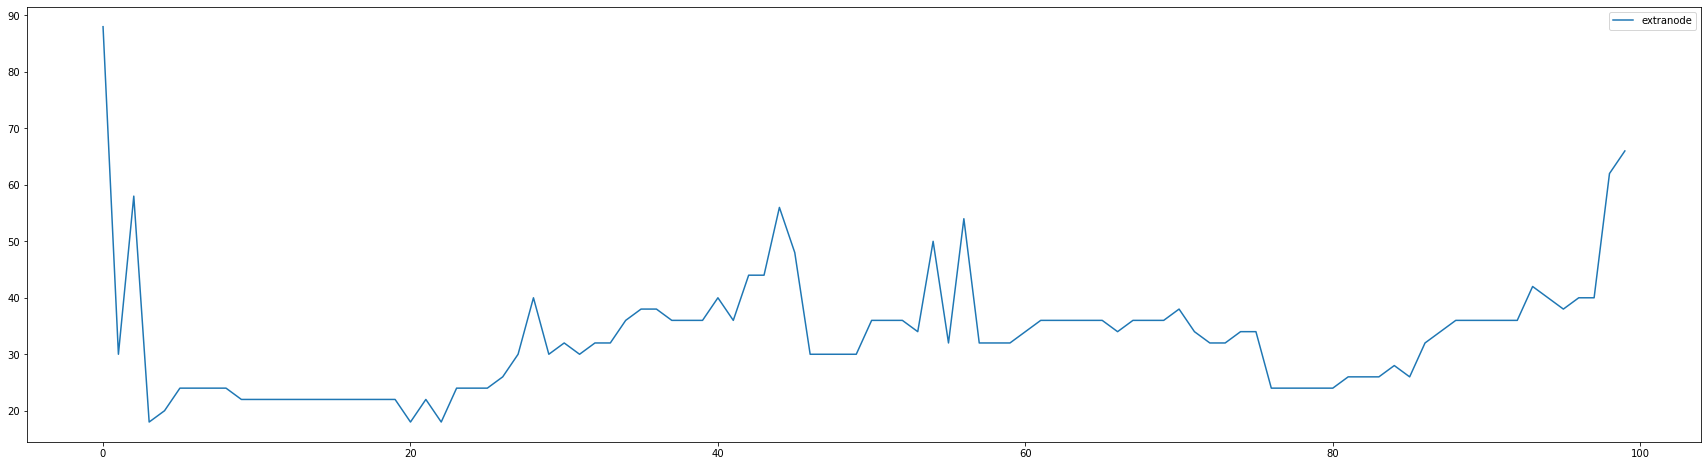

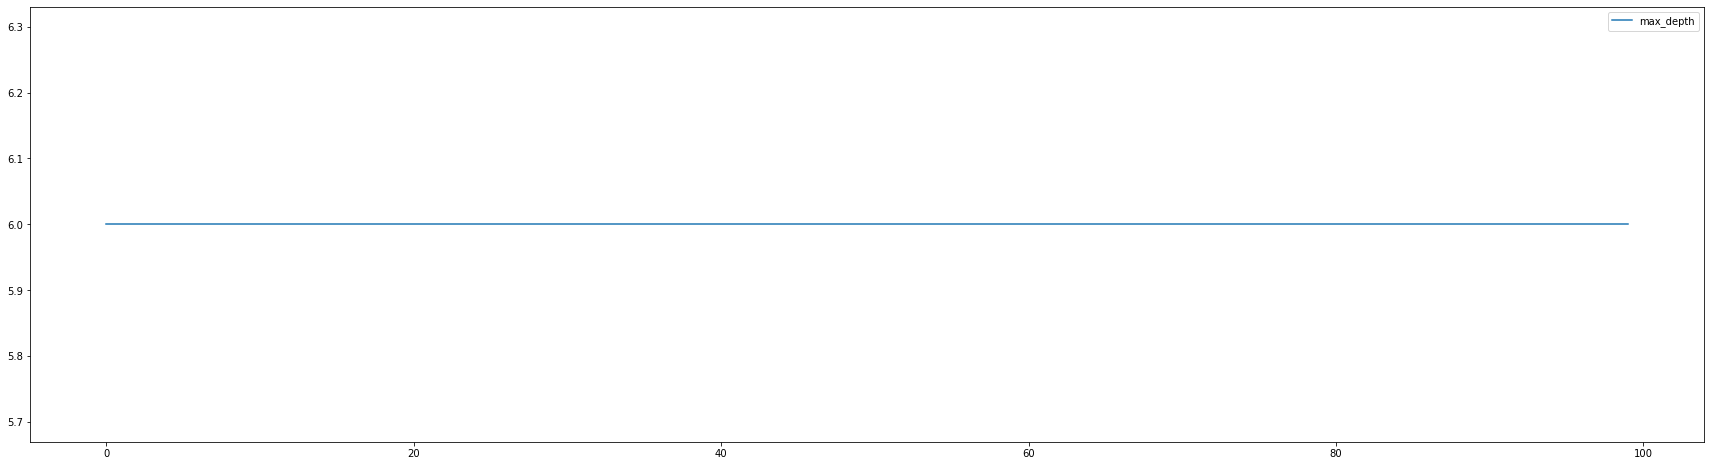

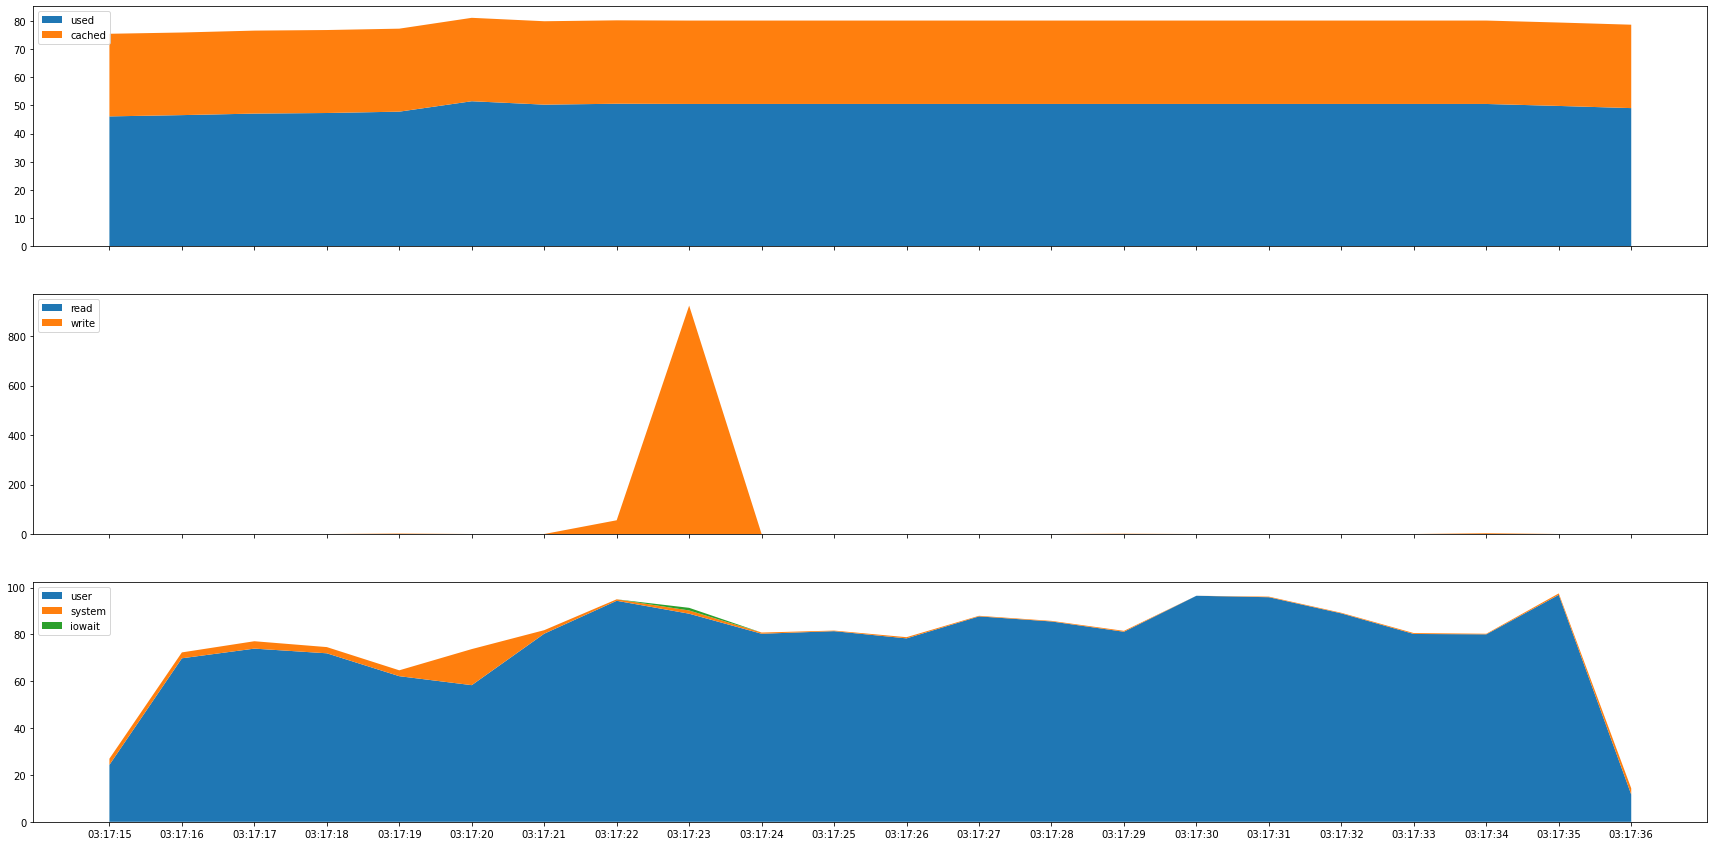

In [111]:
nodes=len(clients)
executors_per_node=2
cores_per_executor=4

cache_size=20
total_size=25
sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
appid = sc.applicationId

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

t1 = timeit.default_timer()
startmonitor(clients, appid, collect_emon=False)
df = spark.read.format('arrow').load("/ding_train_arrow.parquet")
model, train_time  = run_train(df, params)
t2 = timeit.default_timer()
stopmonitor(clients, sc, appid)
trainingtime = gettrainingtime(clients, appid)
display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
plotresult(clients[0], appid, params['numRound'])
draw_sar(appid)

## regression

In [45]:
jars=!ls -d {home}/jars-for-aws-cpu/1.3/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j_2.12-1.3.3.jar pyspark-shell'

executor per node: 2
parallelism: 8
memory: 1000m
offheap:10240m
ip-172-31-53-217 : 2   1680	1624
Fri Feb 19 03:26:45 UTC 2021
Start time : 7600.911119699


/home/sparkuser
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
21/02/19 03:27:35 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1613701151690_0008/jobs
http://sr525:28080/history/application_1613701151690_0008/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1613701151690_0008.json
application_1613701151690_0008


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


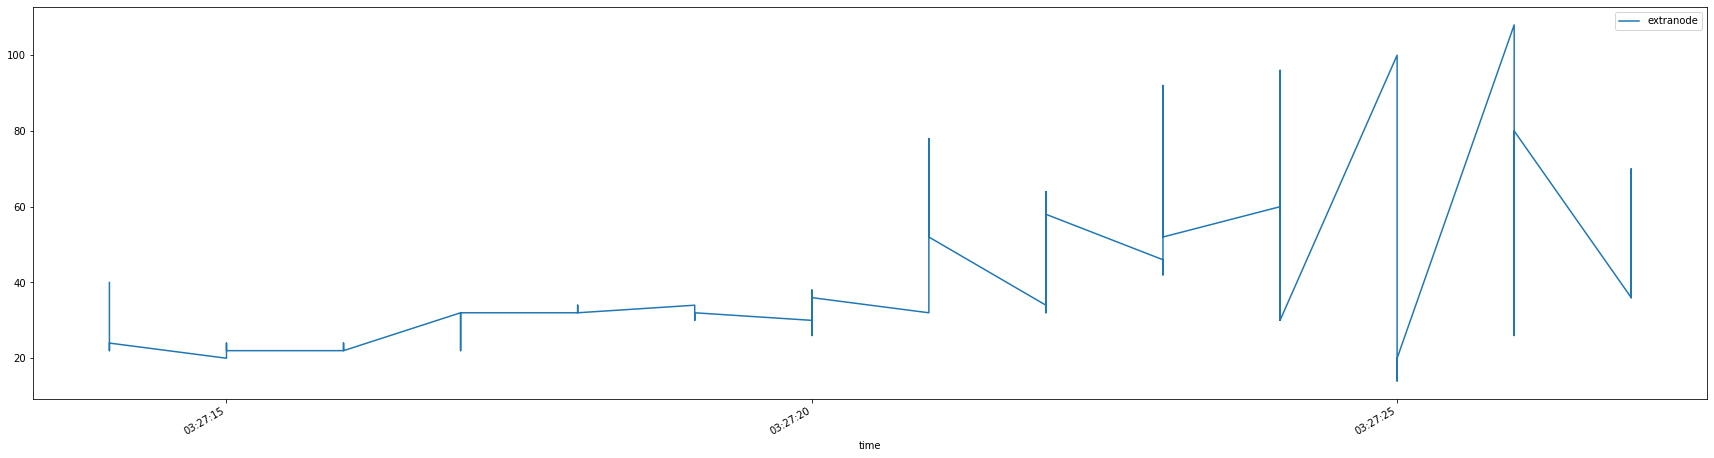

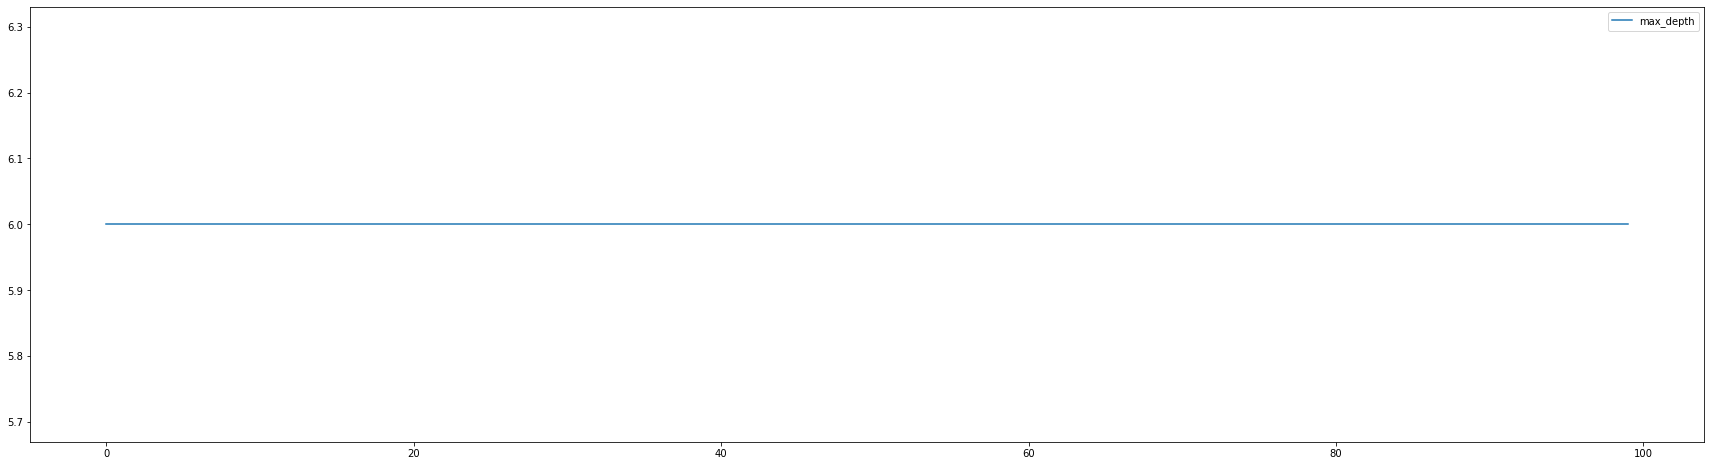

In [51]:
nodes=len(clients)
executors_per_node=2
cores_per_executor=4

cache_size=20
total_size=25

sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
appid = sc.applicationId

params = {'labelCol': "Longitude",  #"label"
          'featuresCol': "features",
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

t1 = timeit.default_timer()
startmonitor(clients, appid, collect_emon=False)
df = spark.read.format('parquet').load("/ding_train.parquet")

vectorAssembler = VectorAssembler().setInputCols(["_"+str(i) for i in range(0,7)]).setOutputCol("features")
df=vectorAssembler.transform(df)



model, train_time  = run_train_regressor(df, params)
t2 = timeit.default_timer()
stopmonitor(clients, sc, appid)
trainingtime = gettrainingtime(clients, appid)
display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
plotresult(clients[0], appid, params['numRound'])
draw_sar(appid)

In [50]:
sc.stop()

In [54]:
!{hadoop_home}/sbin/stop-dfs.sh
!{hadoop_home}/sbin/stop-yarn.sh


Stopping namenodes on [ip-172-31-53-217.us-west-2.compute.internal]
ip-172-31-53-217.us-west-2.compute.internal: stopping namenode
172.31.53.217: stopping datanode
Stopping secondary namenodes [ip-172-31-53-217.us-west-2.compute.internal]
ip-172-31-53-217.us-west-2.compute.internal: stopping secondarynamenode
stopping yarn daemons
stopping resourcemanager
172.31.53.217: stopping nodemanager
172.31.53.217: nodemanager did not stop gracefully after 5 seconds: killing with kill -9
no proxyserver to stop


In [81]:
sc.stop()

# Hibench 600M

## 2x48

executor per node: 2
parallelism: 768
memory: 12176m
offheap:76800m
172.31.57.117 : 2   1826	1720
172.31.63.214 : 2   80903	80798
172.31.50.230 : 2   81027	80922
172.31.48.87 : 2   82994	82889
172.31.56.136 : 2   82345	82238
172.31.59.90 : 2   80692	80587
172.31.62.187 : 2   80871	80731
172.31.52.207 : 2   80132	80237
Start time : 16757.676897326


/home/sparkuser
21/02/23 03:14:37 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0008/jobs
http://sr525:28080/history/application_1614045517521_0008/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0008.json
application_1614045517521_0008


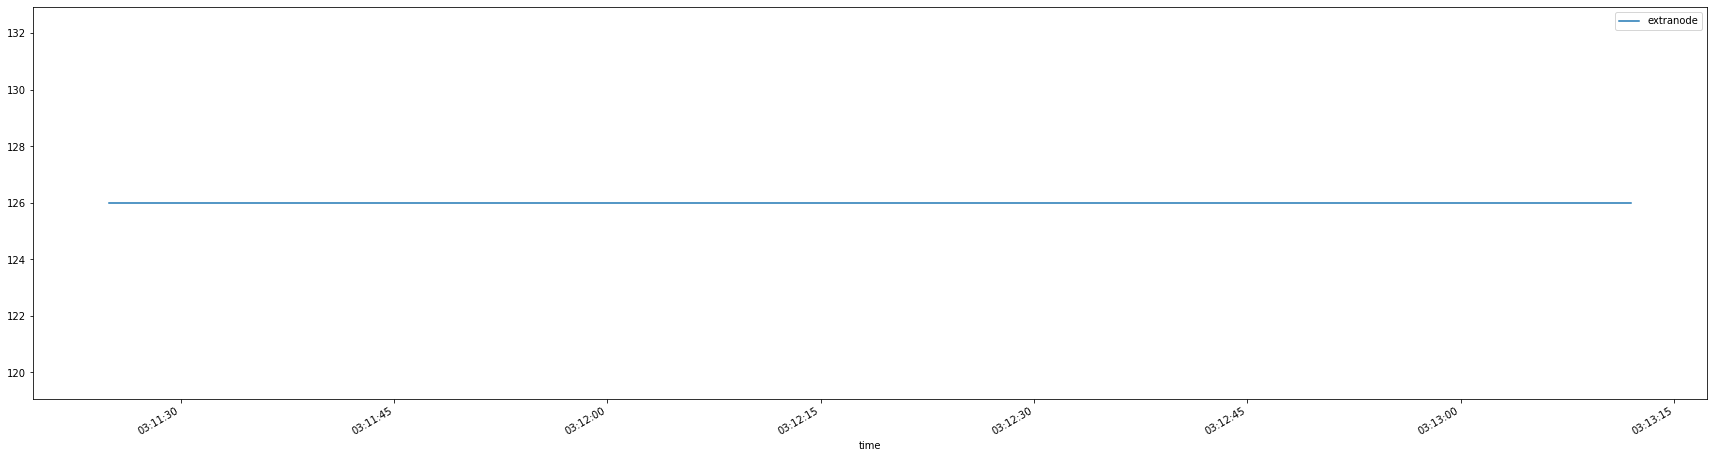

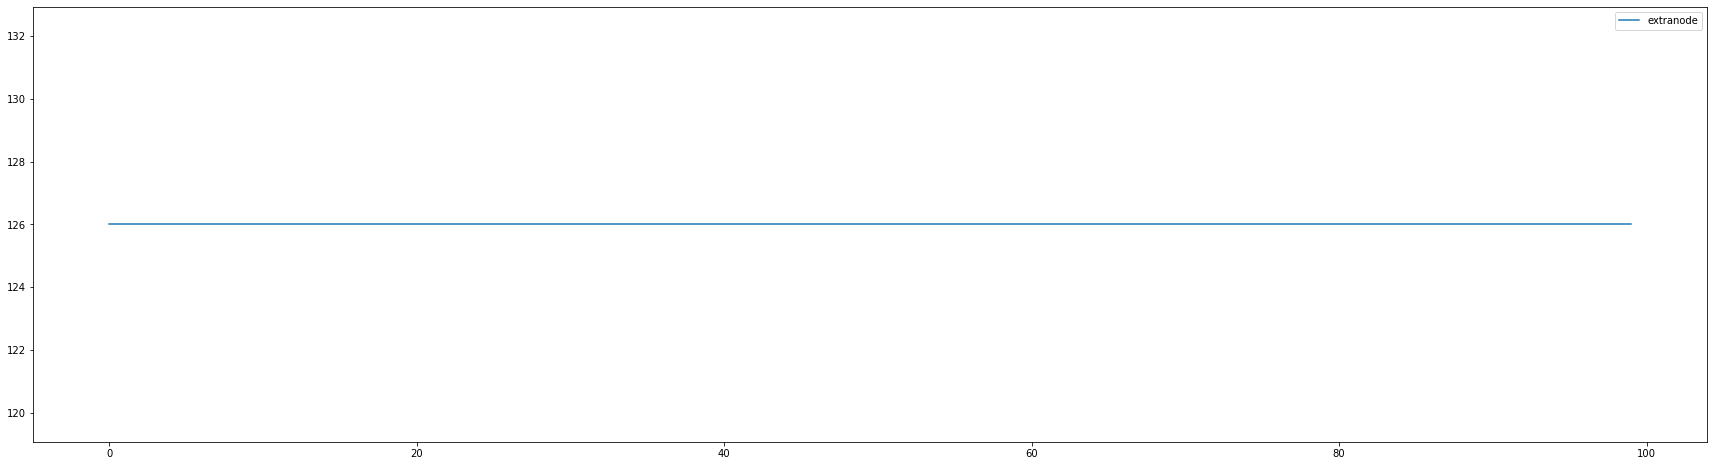

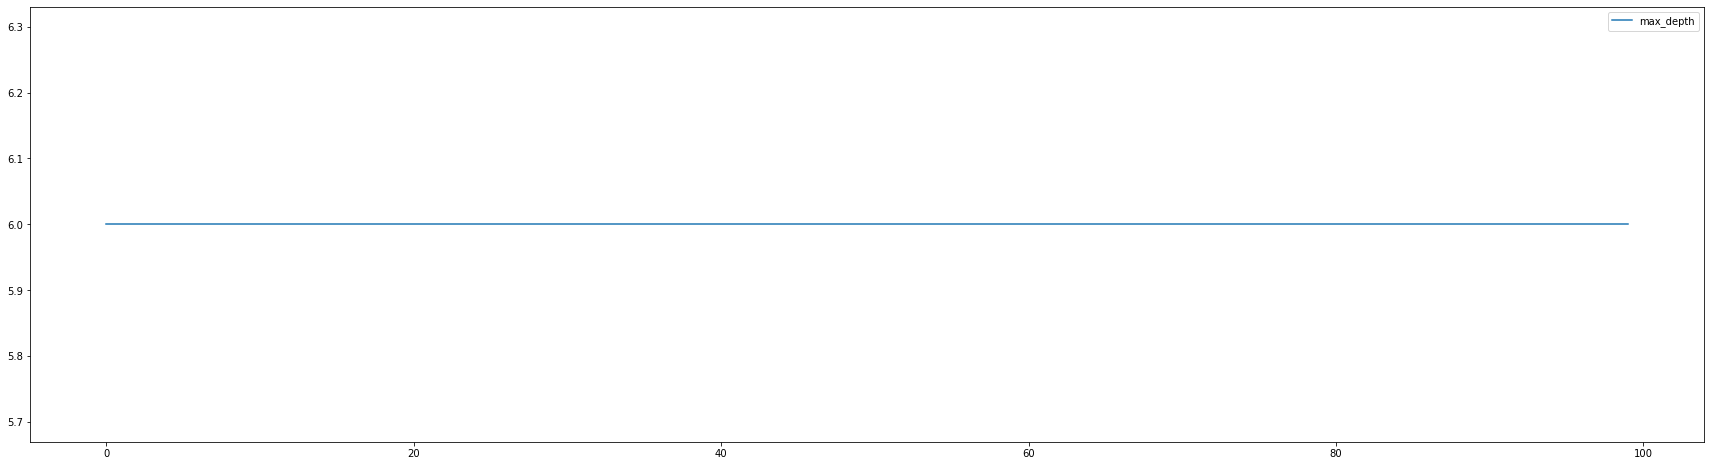

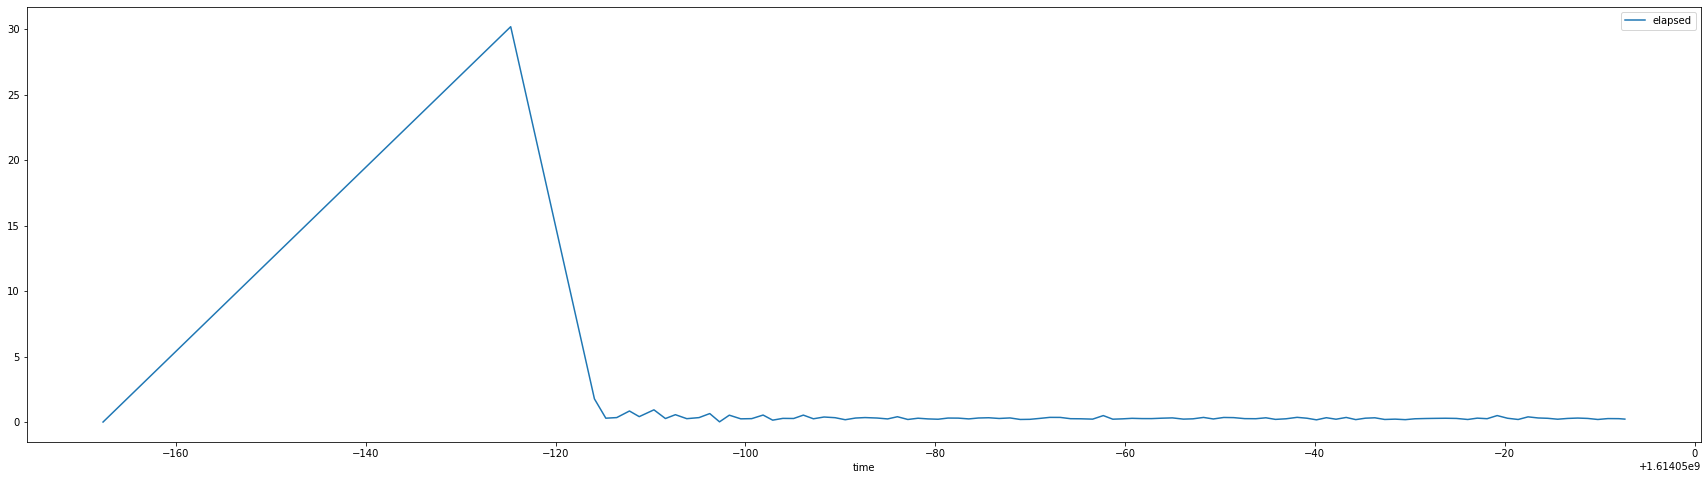

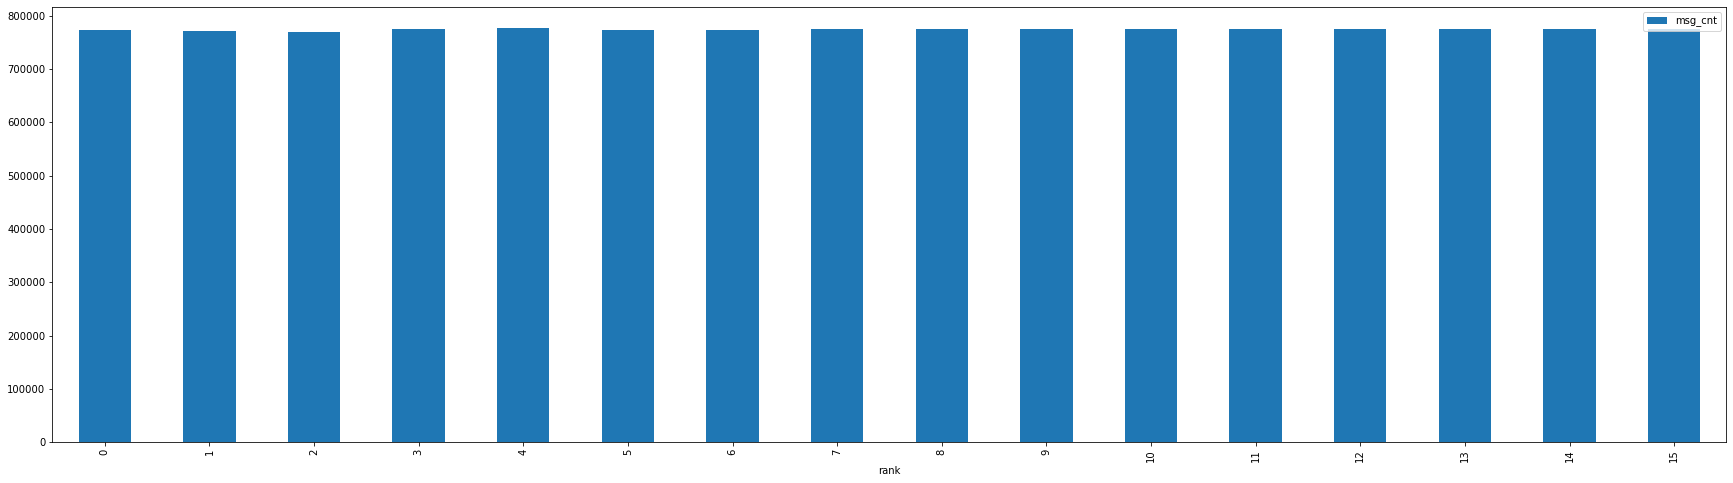

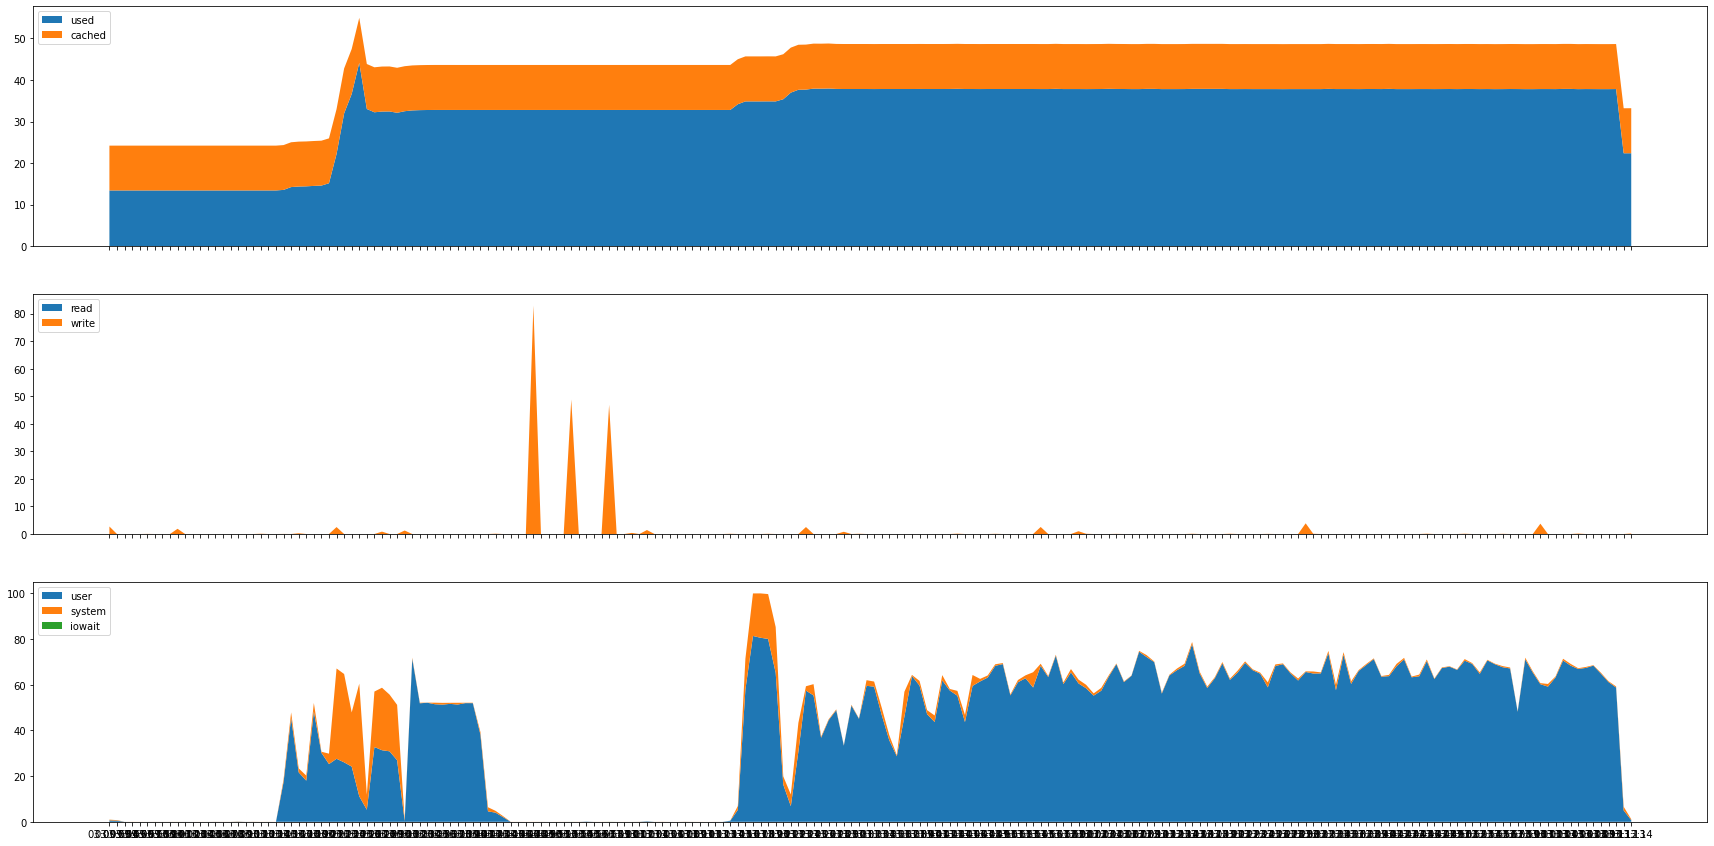

In [65]:
nodes=len(clients)
executors_per_node=int(1*16/nodes)
cores_per_executor=48

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 2
parallelism: 768
memory: 12176m
offheap:76800m
172.31.57.117 : 2   6880	6988
172.31.63.214 : 2   85671	85562
172.31.50.230 : 2   85637	85534
172.31.48.87 : 2   87835	87994
172.31.56.136 : 2   87253	87151
172.31.59.90 : 2   85288	85390
172.31.62.187 : 2   85747	85854
172.31.52.207 : 2   84897	84795
6880 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
6988 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
85671 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
85562 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
85637 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,58,5

/home/sparkuser
21/02/23 03:23:16 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0009/jobs
http://sr525:28080/history/application_1614045517521_0009/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0009.json
application_1614045517521_0009


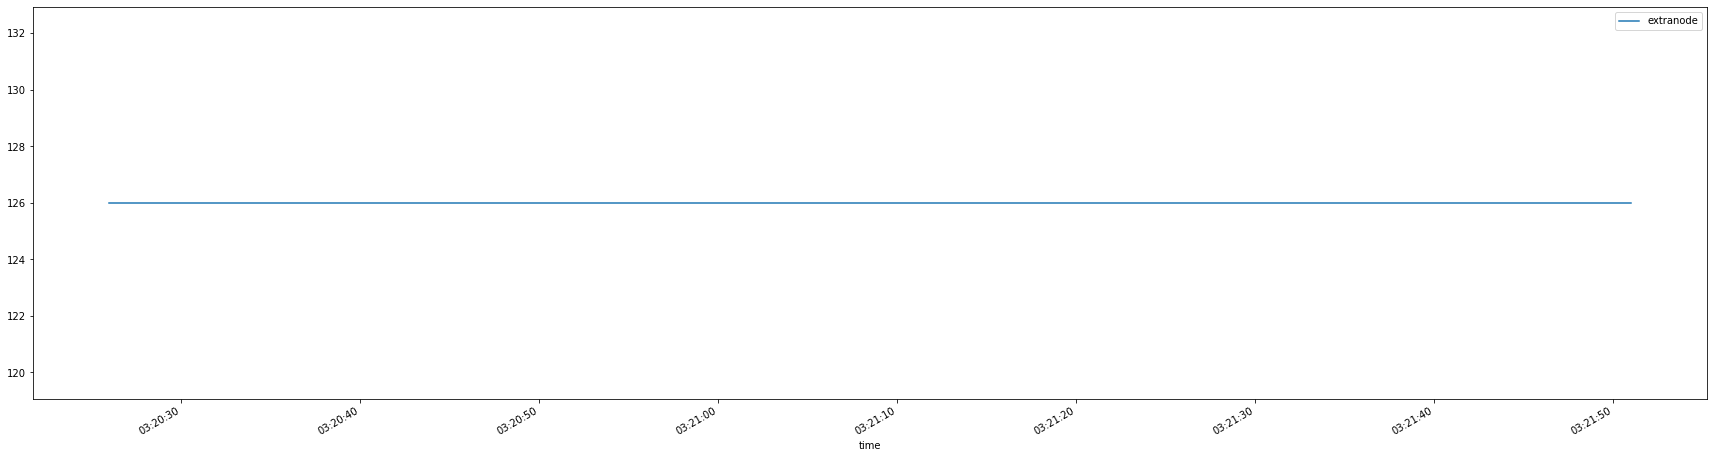

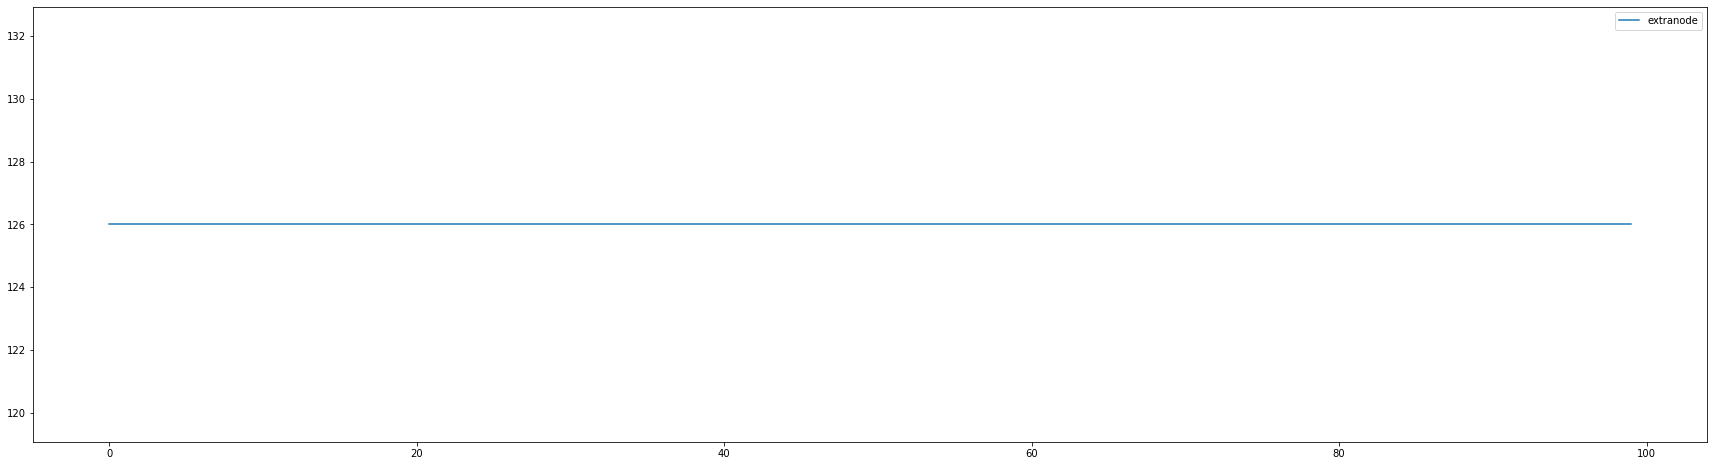

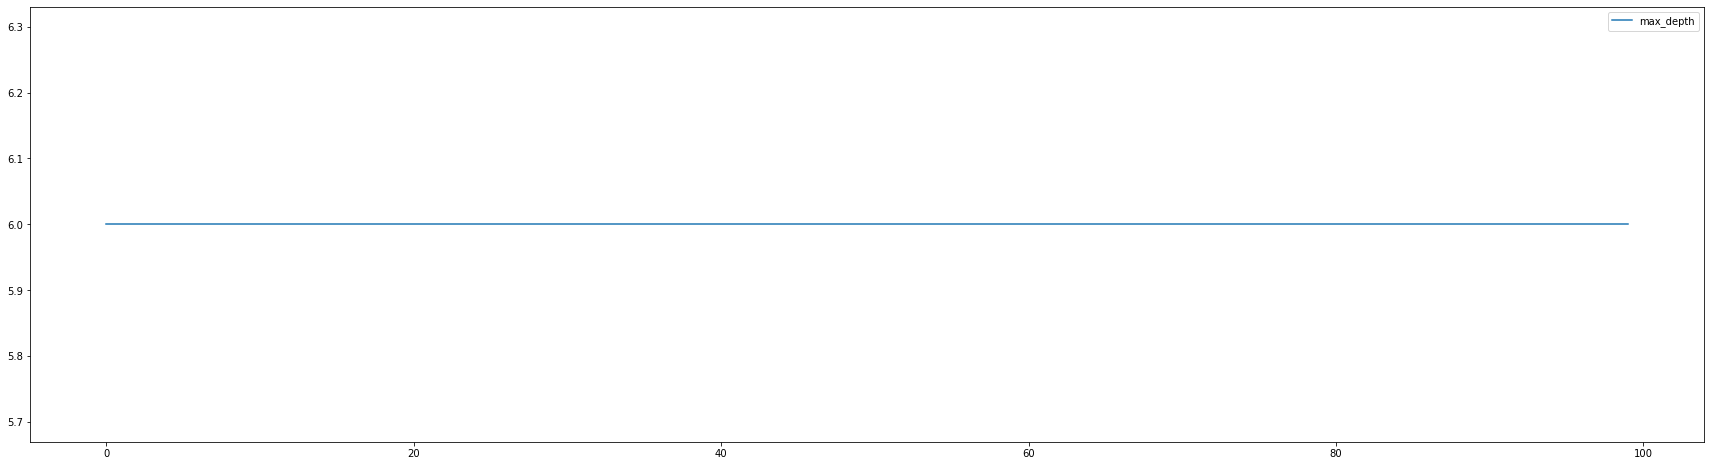

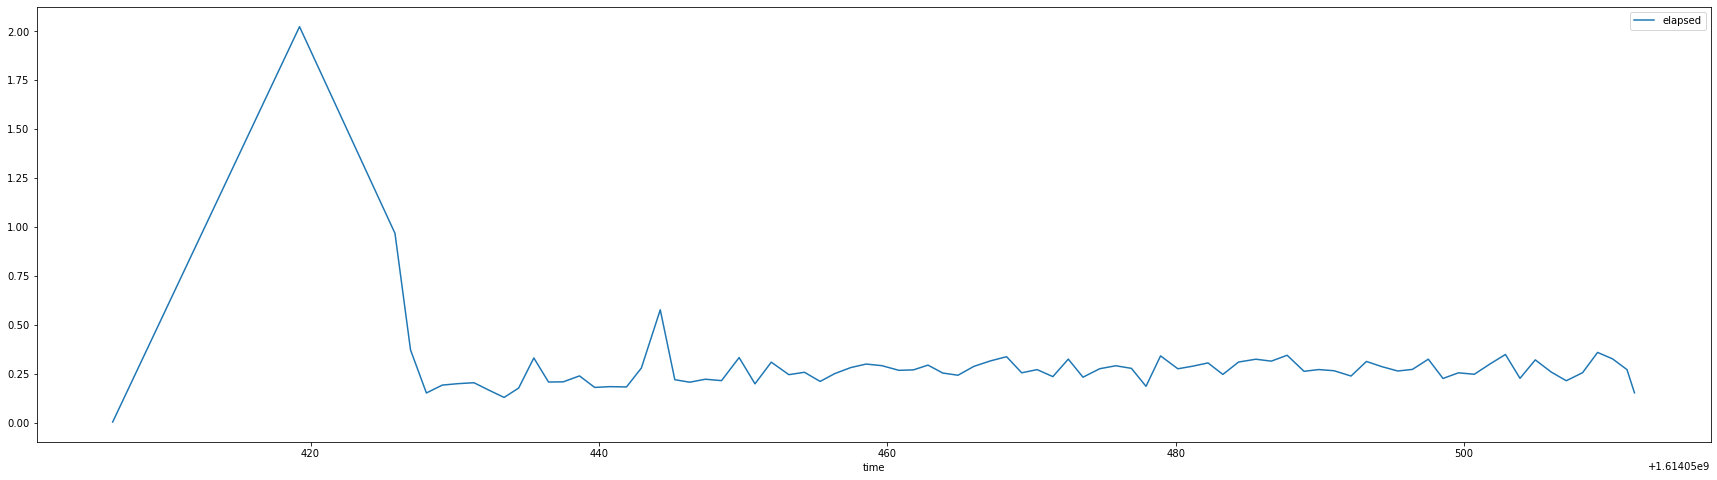

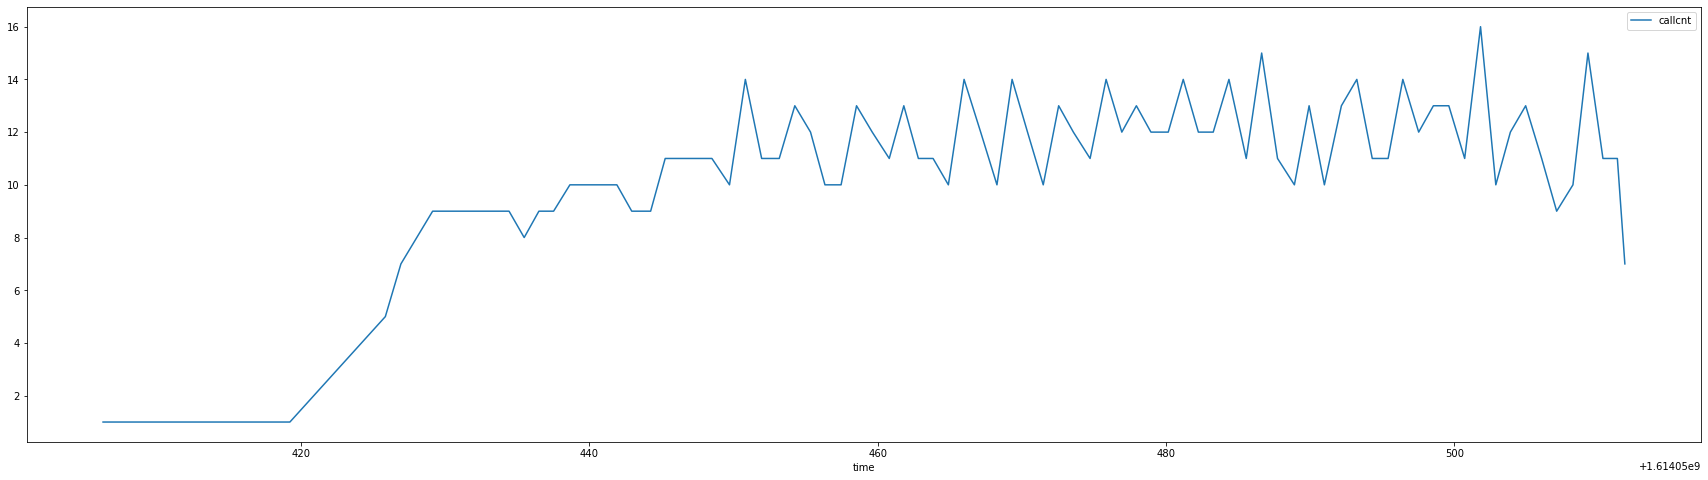

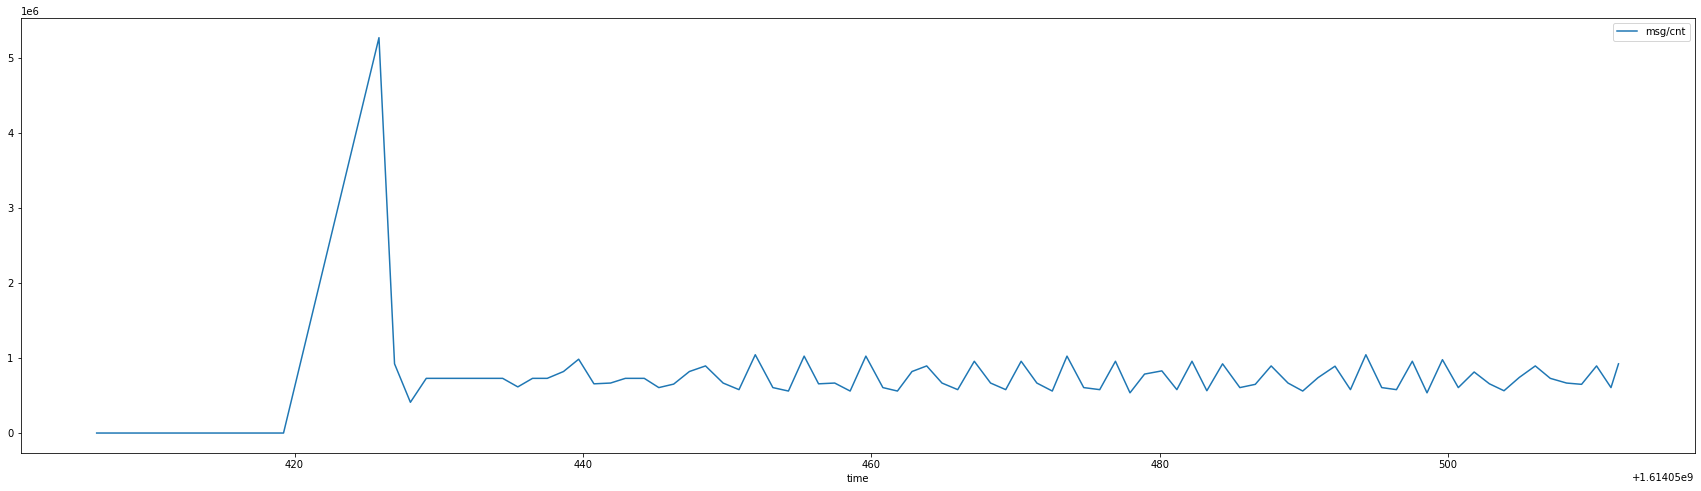

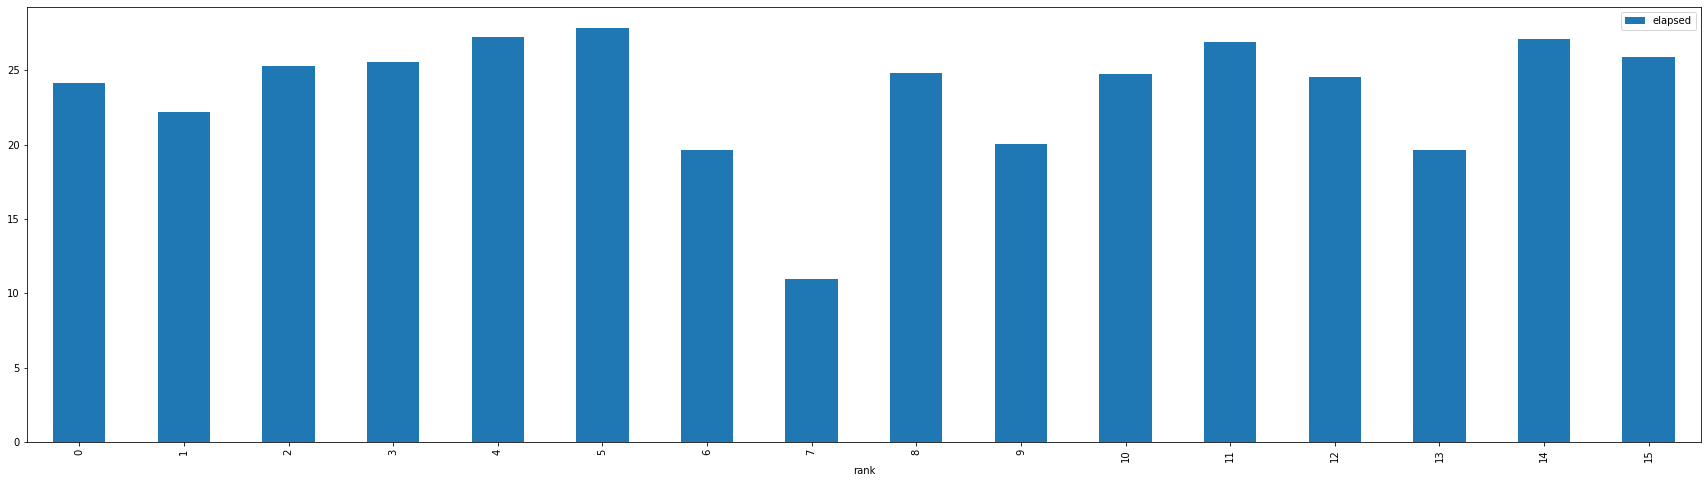

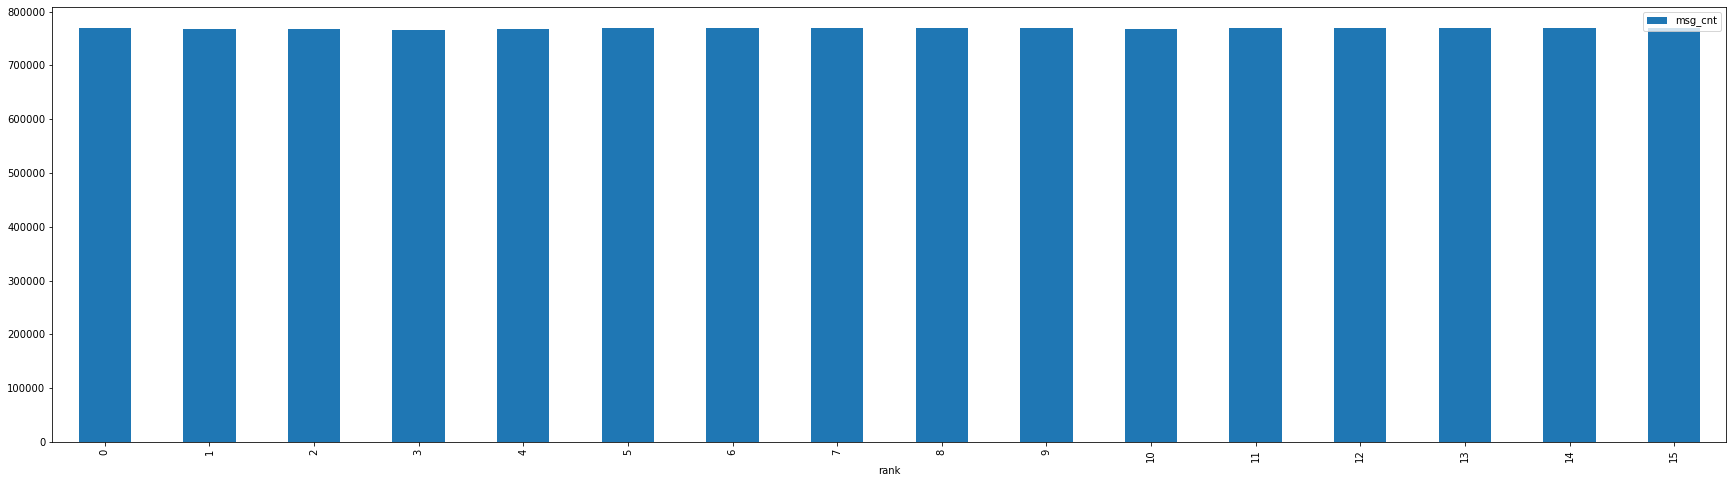

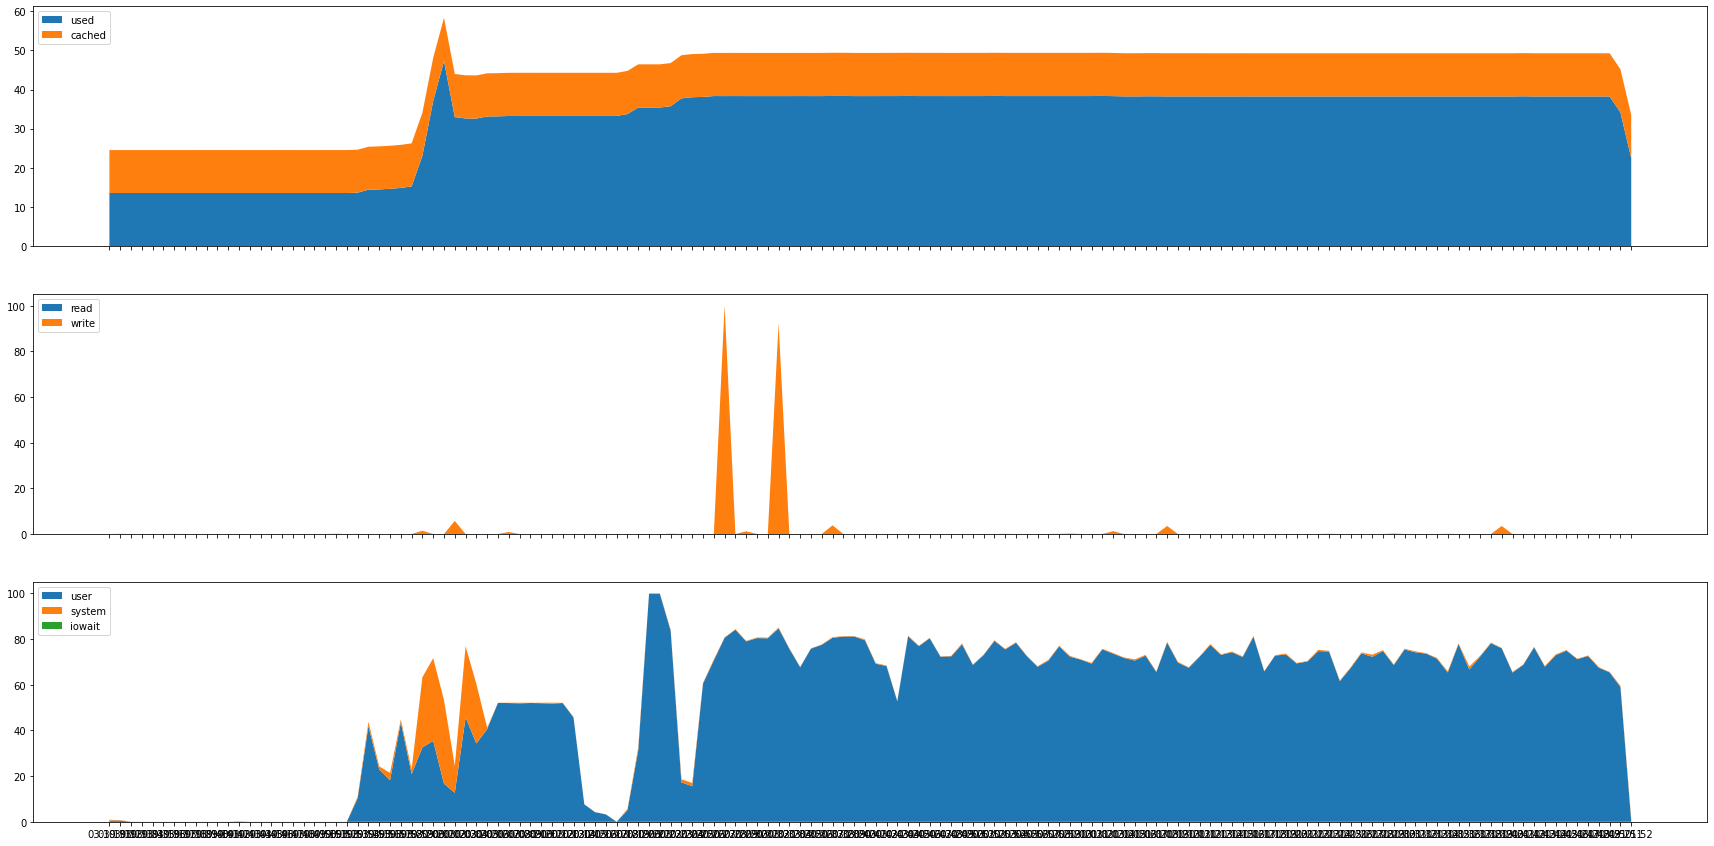

In [68]:
nodes=len(clients)
executors_per_node=int(1*16/nodes)
cores_per_executor=48

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        numabound_smt(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 4x24

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   57493	57862	57608	57609
172.31.63.214 : 4   44288	44449	44091	44092
172.31.50.230 : 4   44416	44225	44226	44583
172.31.48.87 : 4   46448	46280	46089	46090
172.31.56.136 : 4   45073	45218	44787	44909
172.31.59.90 : 4   44048	44049	44408	44239
172.31.62.187 : 4   44134	43943	43944	44301
172.31.52.207 : 4   43824	44193	43939	43940
Tue Feb 23 02:00:41 UTC 2021
Tue Feb 23 02:00:42 UTC 2021
Tue Feb 23 02:00:43 UTC 2021
Tue Feb 23 02:00:43 UTC 2021
Tue Feb 23 02:00:44 UTC 2021
Tue Feb 23 02:00:45 UTC 2021
Tue Feb 23 02:00:46 UTC 2021
Tue Feb 23 02:00:46 UTC 2021
Start time : 12649.430114803


/home/sparkuser
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
/bin/bash: {prof}/{l}/sched_threads.txt: No such file or directory
bash: emon: command not found
21/02/23 02:05:01 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0002/jobs
http://sr525:28080/history/application_1614045517521_0002/jobs


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


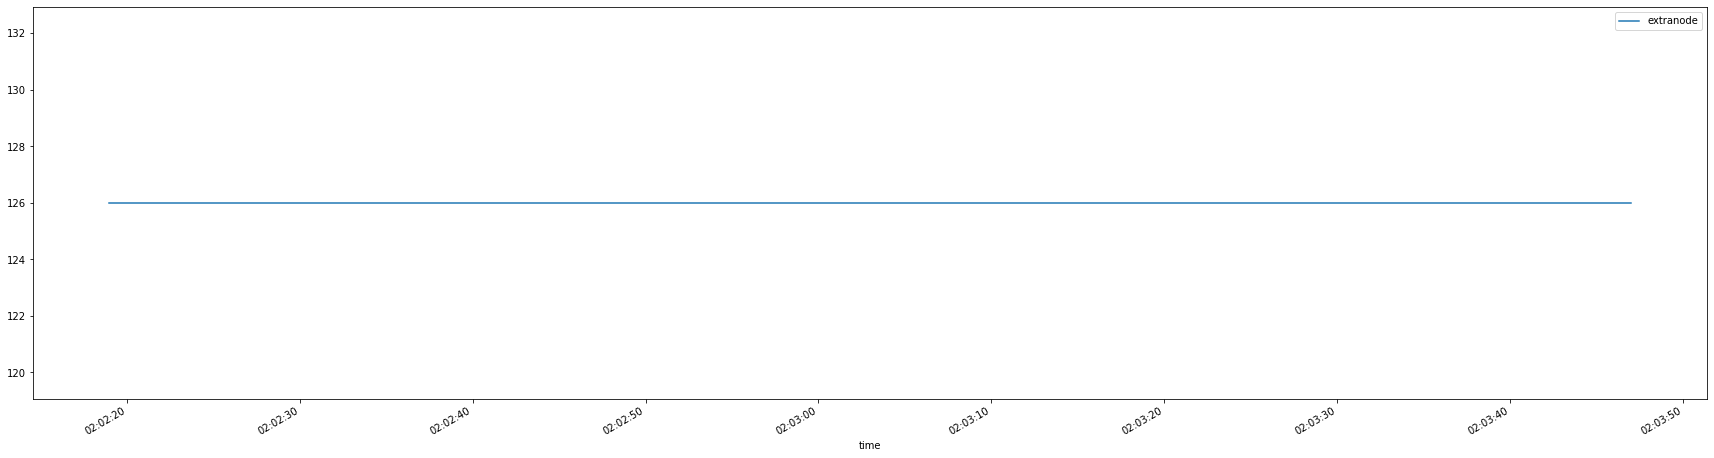

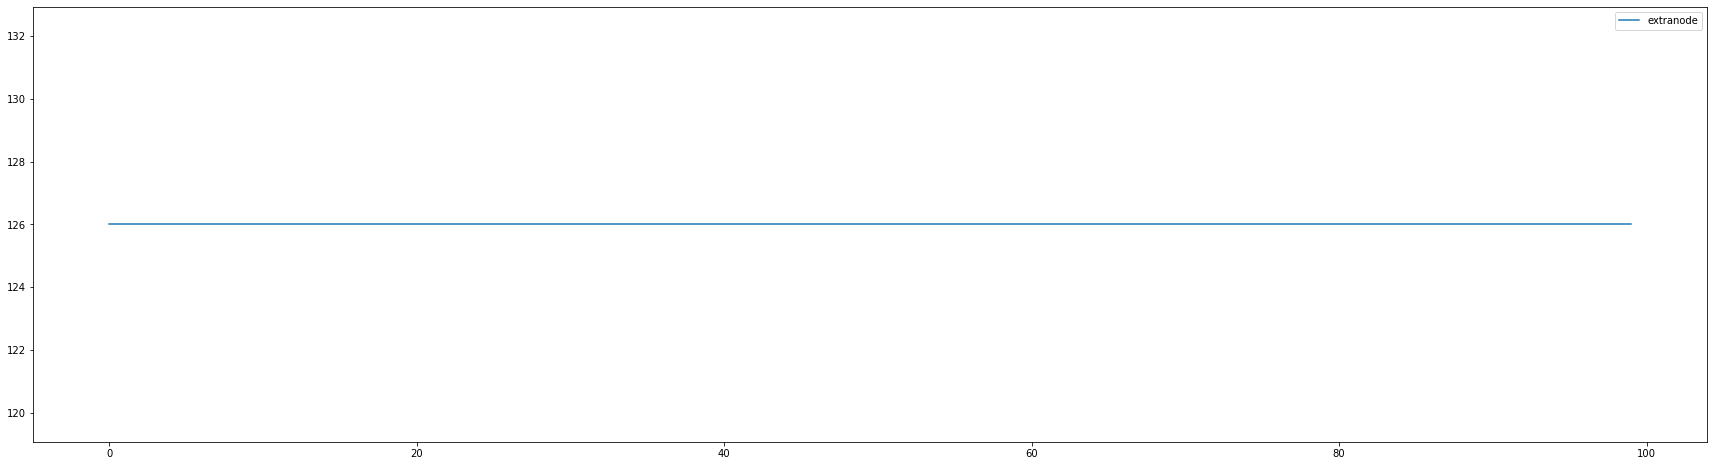

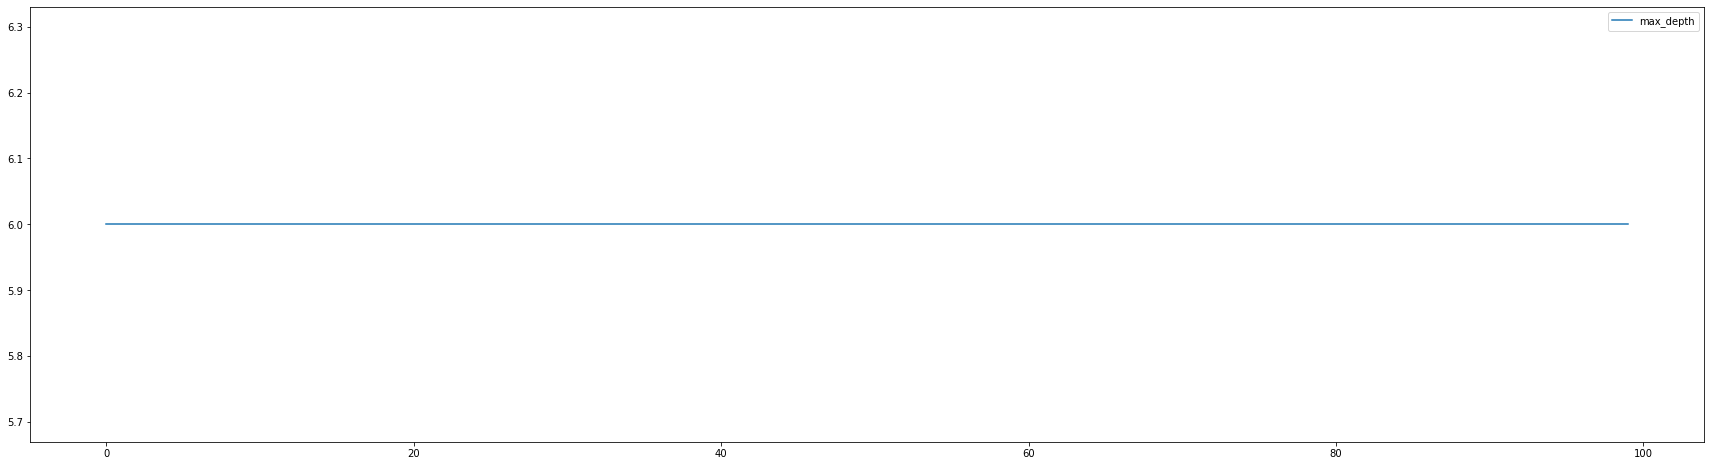

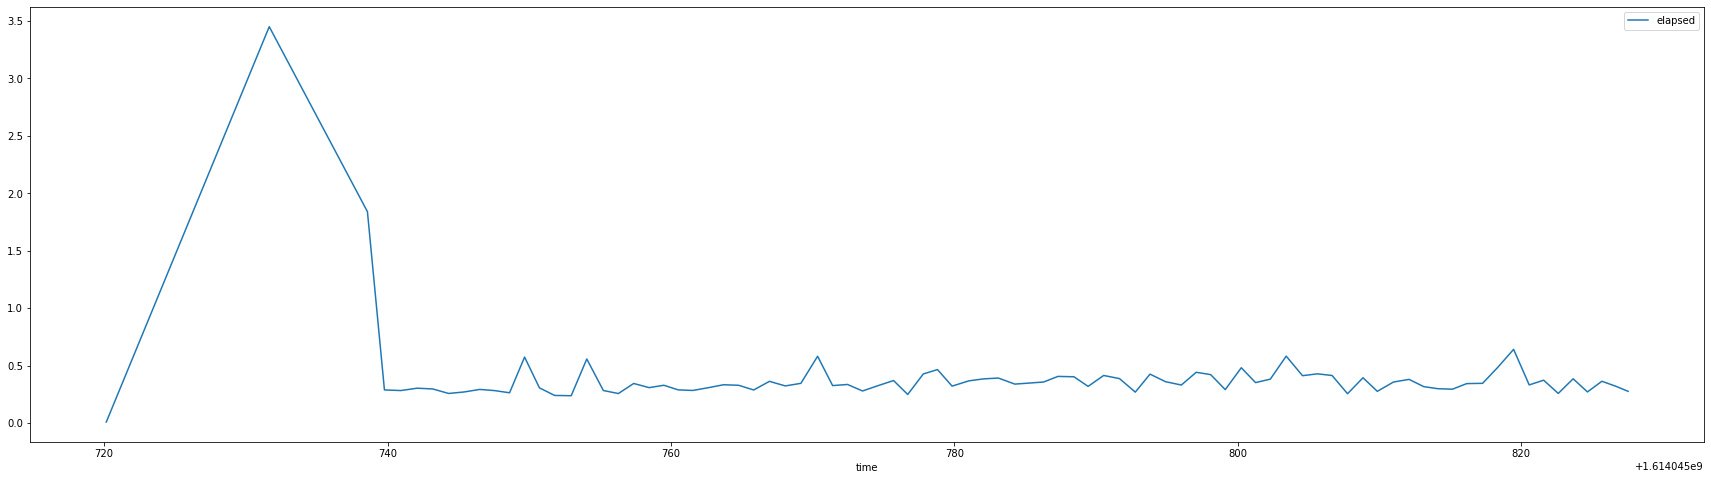

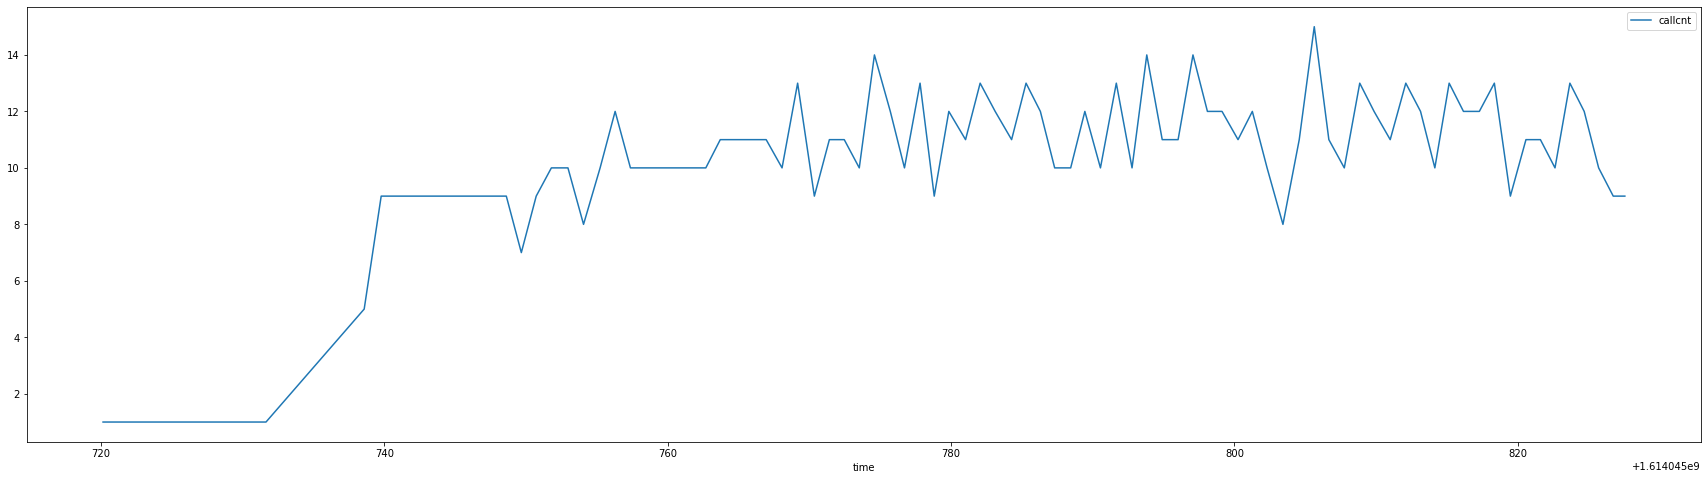

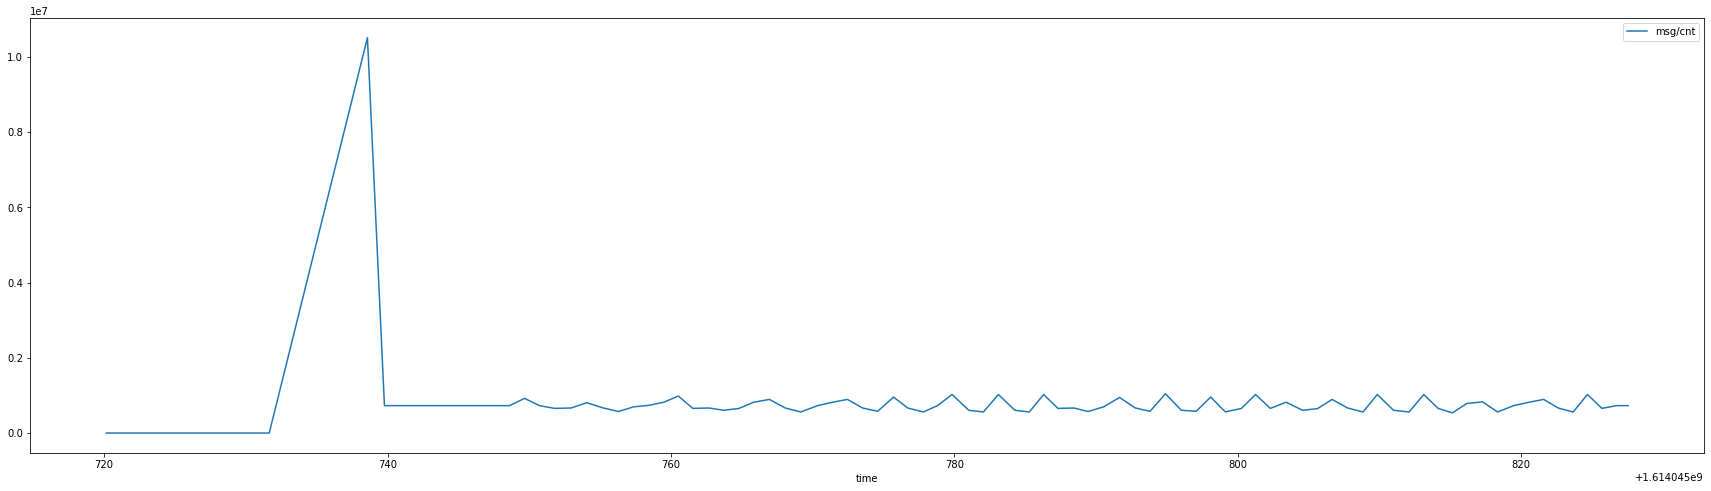

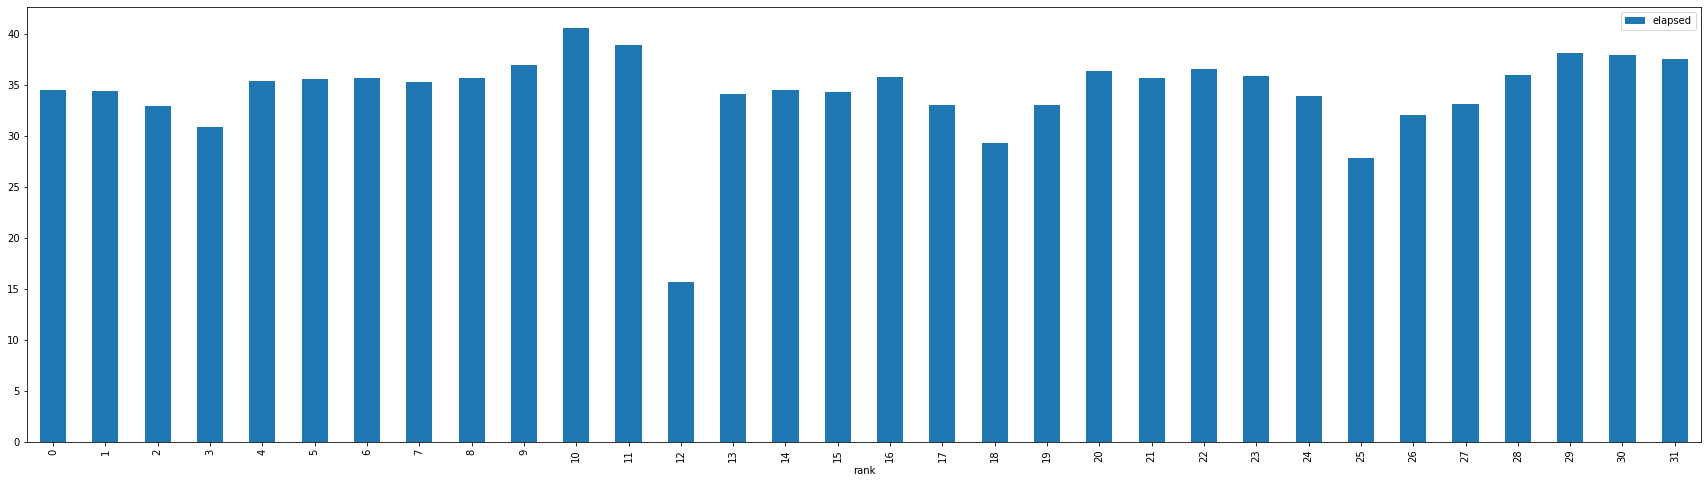

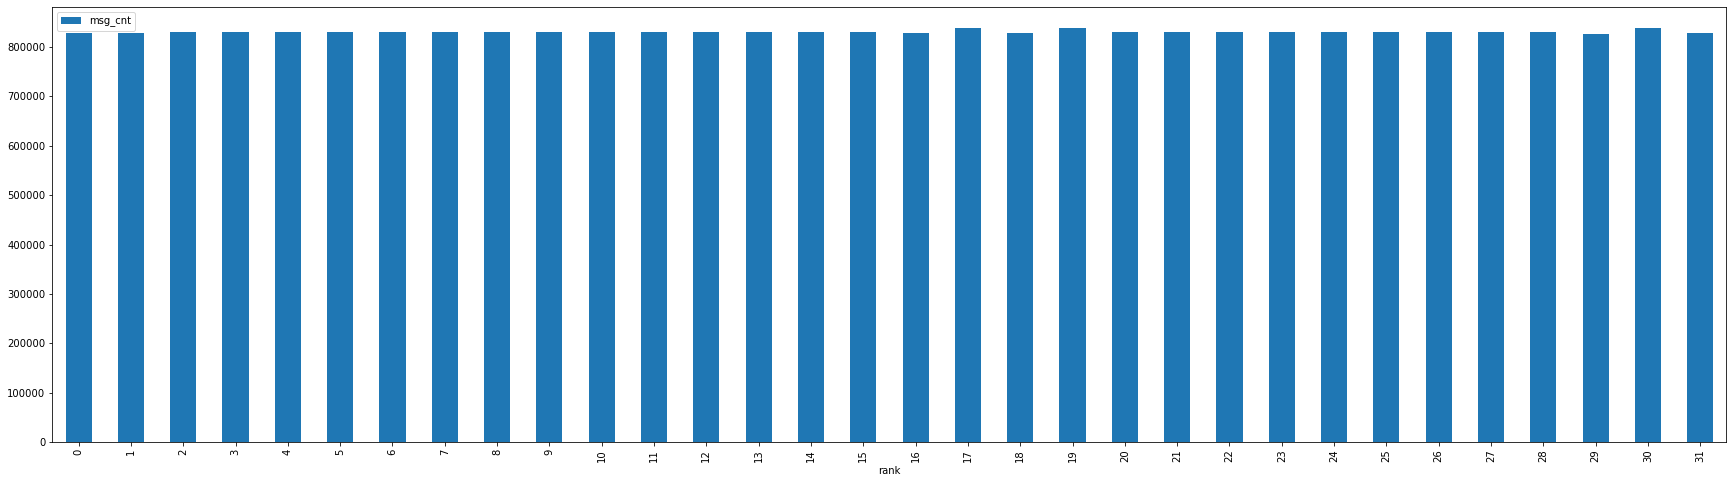

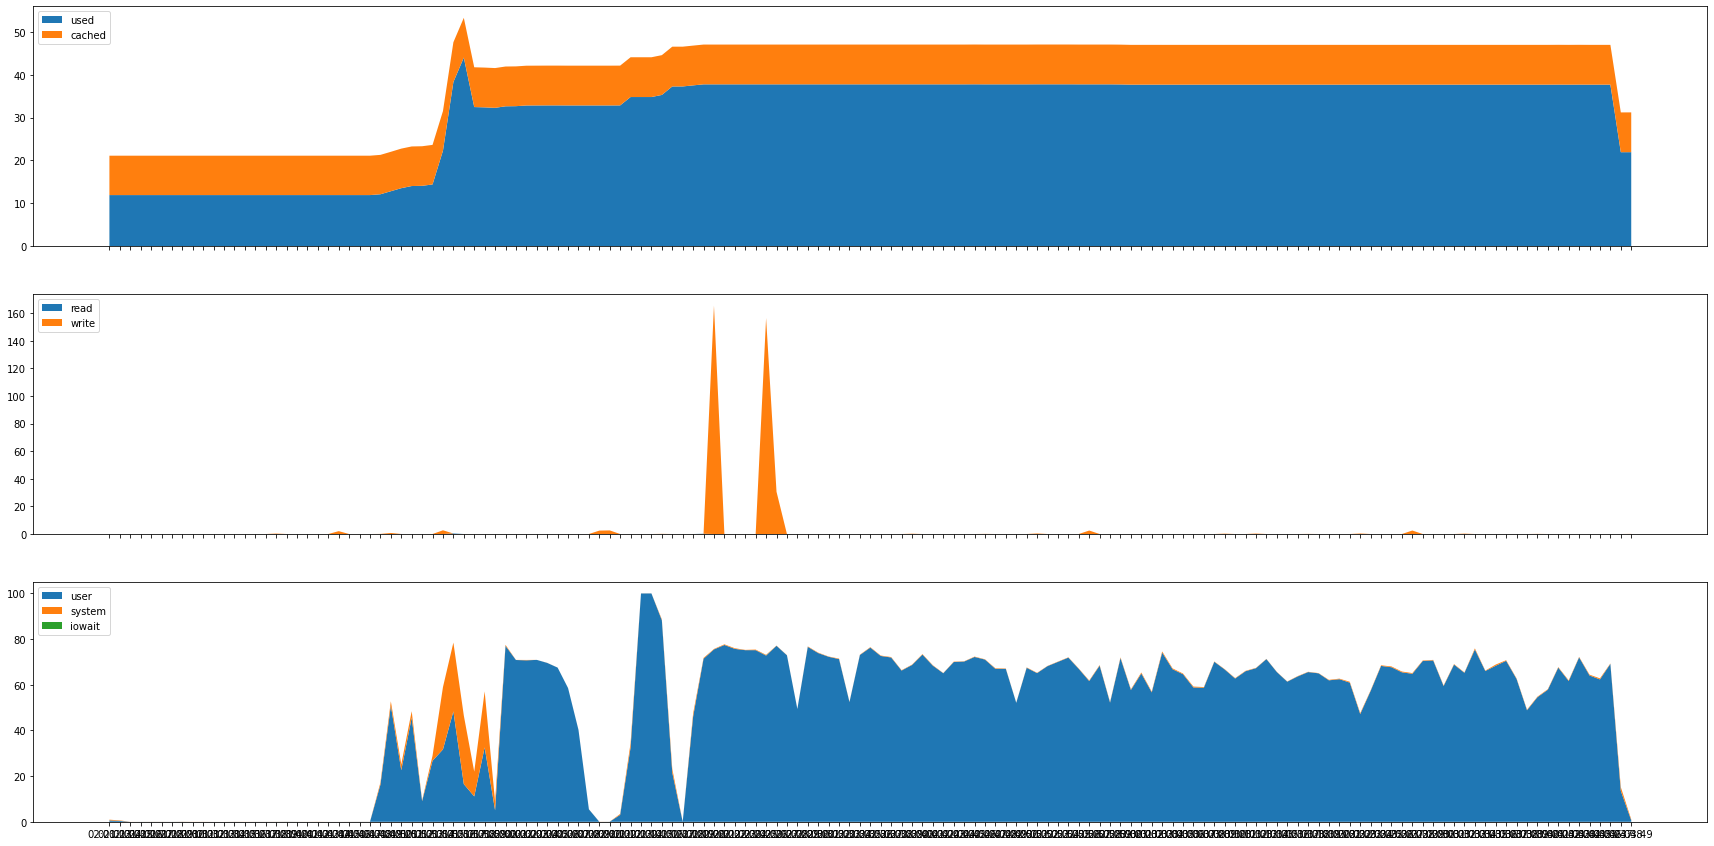

In [43]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   70307	70677	70425	70426
172.31.63.214 : 4   52195	52468	52612	52310
172.31.50.230 : 4   52209	52370	52012	52013
172.31.48.87 : 4   54000	54001	54197	54358
172.31.56.136 : 4   52937	52938	53134	53295
172.31.59.90 : 4   51988	51989	52185	52346
172.31.62.187 : 4   52017	52178	51820	51821
172.31.52.207 : 4   51889	51890	51771	52141
Tue Feb 23 02:26:13 UTC 2021
Tue Feb 23 02:26:13 UTC 2021
Tue Feb 23 02:26:14 UTC 2021
Tue Feb 23 02:26:15 UTC 2021
Tue Feb 23 02:26:16 UTC 2021
Tue Feb 23 02:26:17 UTC 2021
Tue Feb 23 02:26:17 UTC 2021
Tue Feb 23 02:26:18 UTC 2021
Start time : 14167.091848359


/home/sparkuser
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
bash: emon: command not found
21/02/23 02:30:23 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0003/jobs
http://sr525:28080/history/application_1614045517521_0003/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0003.json
application_1614045517521_0003


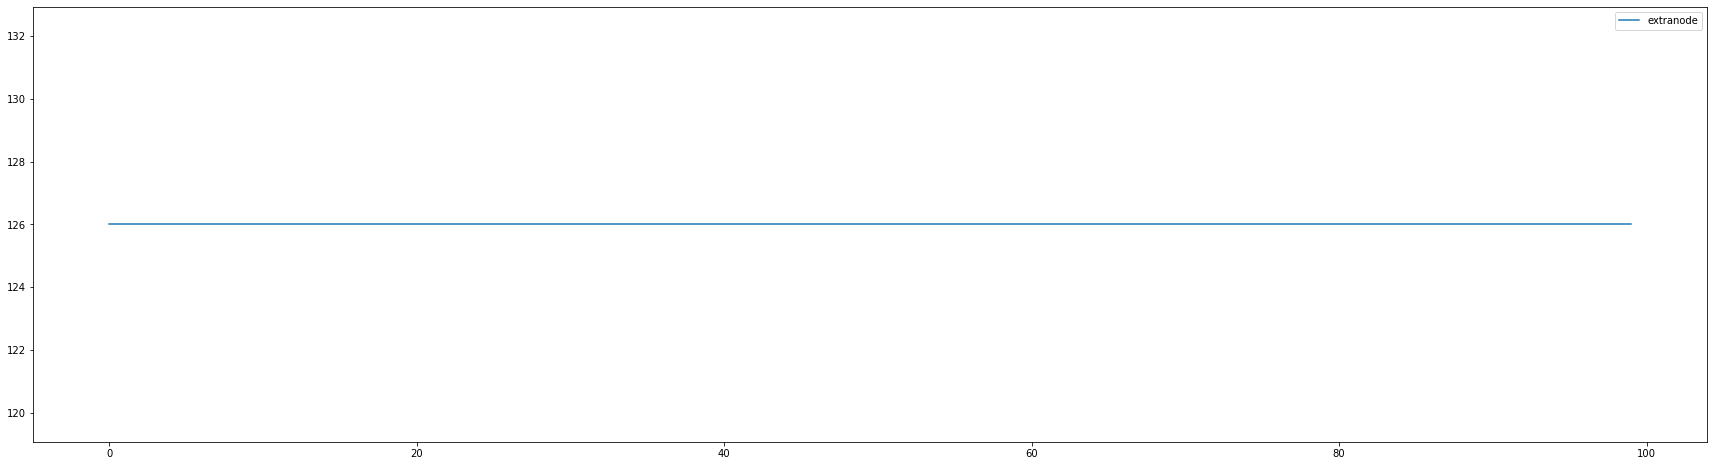

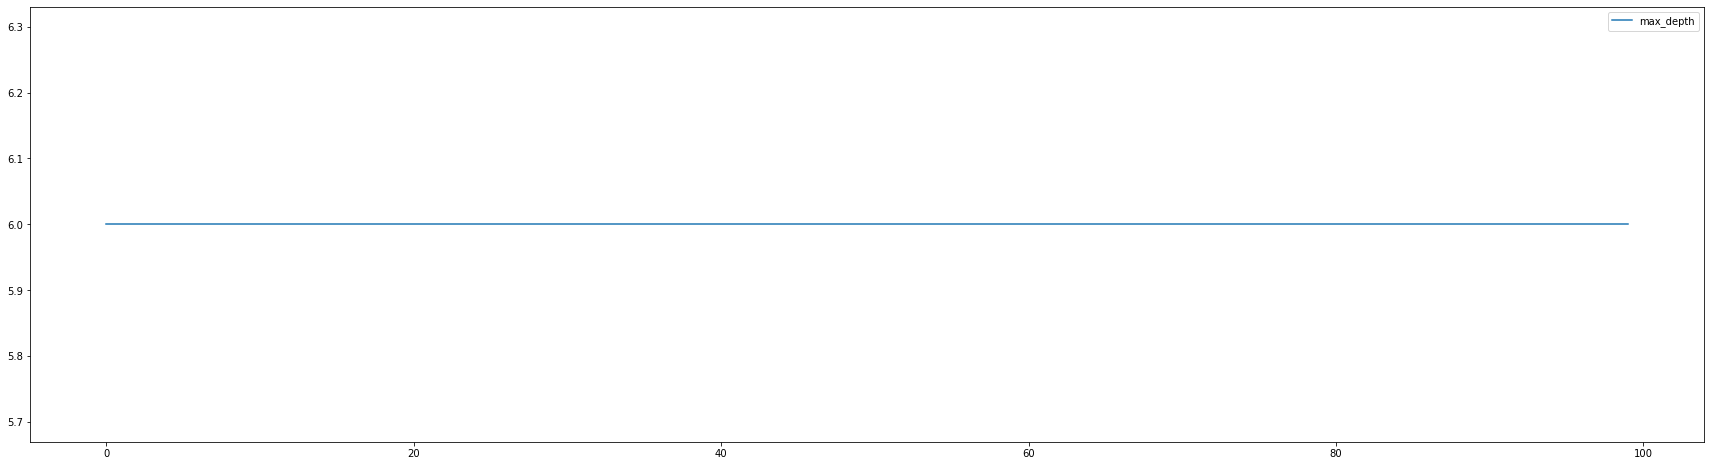

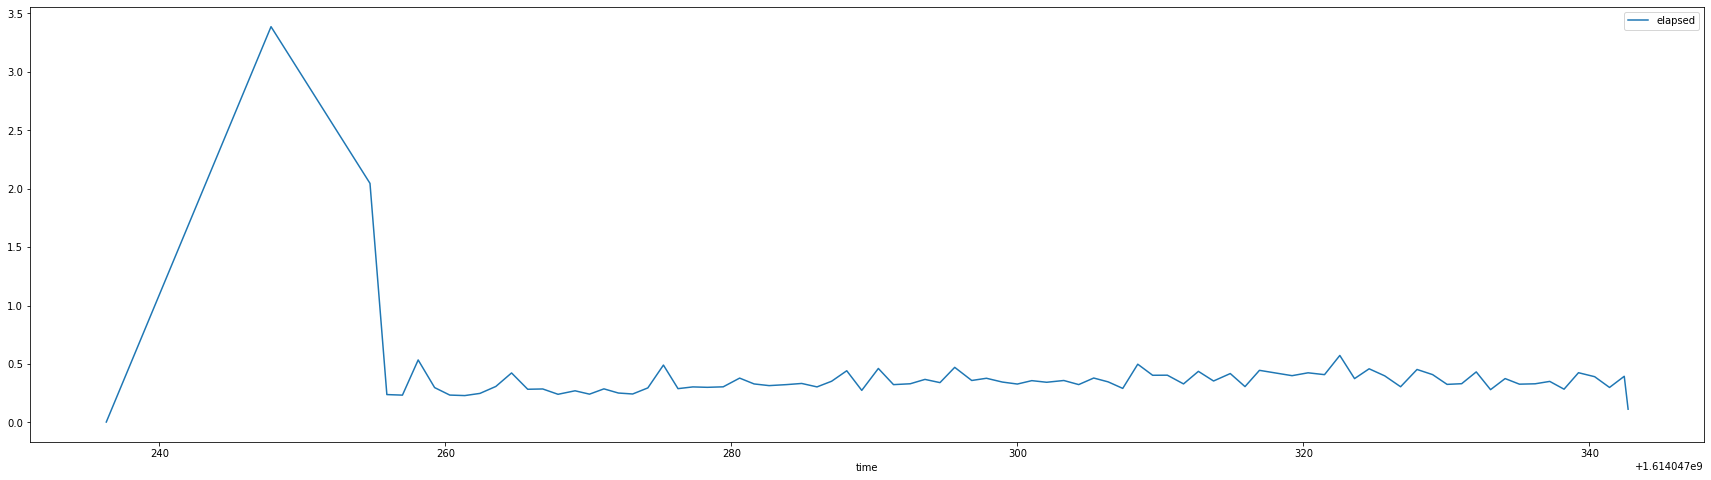

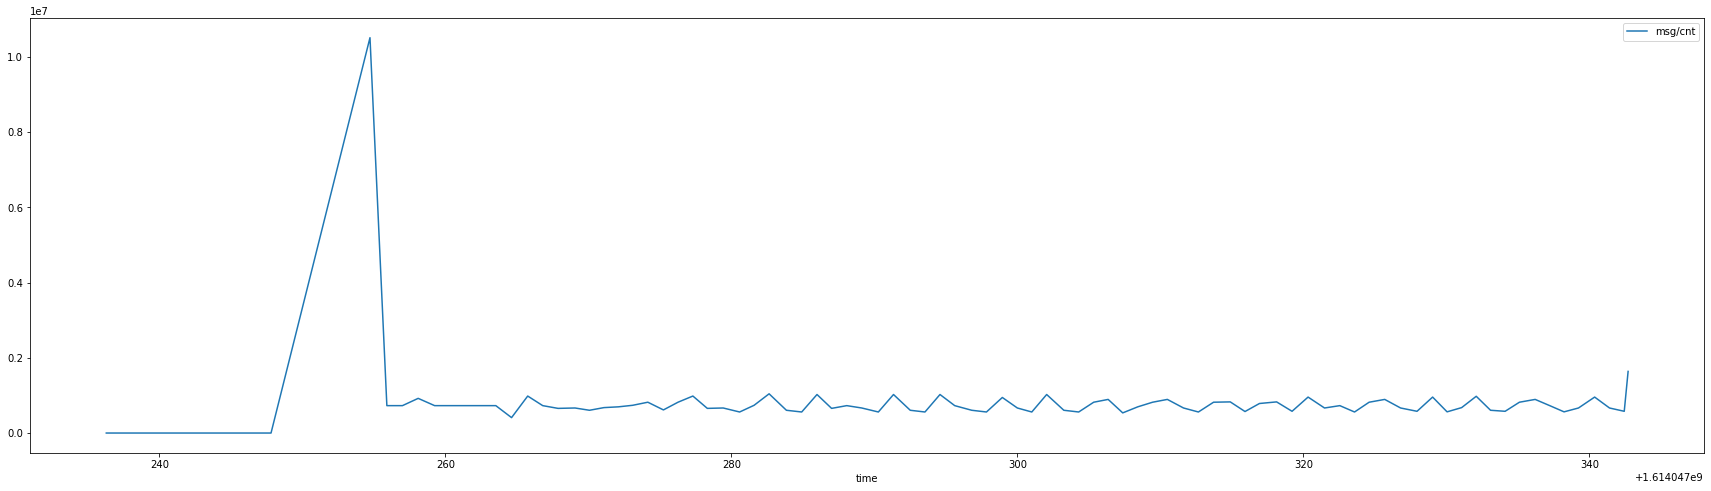

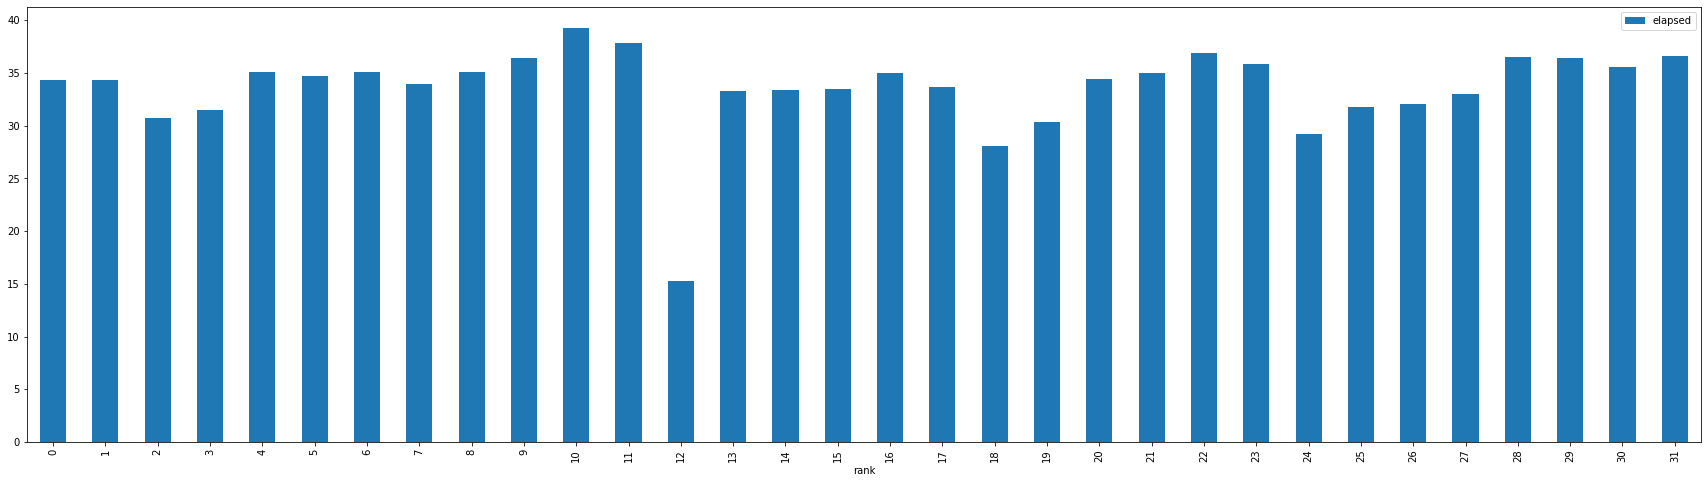

In [52]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   75089	75458	75205	75204
172.31.63.214 : 4   56897	57267	57015	57016
172.31.50.230 : 4   57153	56898	56728	56974
172.31.48.87 : 4   58896	58777	59147	58895
172.31.56.136 : 4   57697	58067	57815	57820
172.31.59.90 : 4   56720	56721	56602	56972
172.31.62.187 : 4   56482	56852	56602	56603
172.31.52.207 : 4   56359	56729	56474	56475
Tue Feb 23 02:33:51 UTC 2021
Tue Feb 23 02:33:51 UTC 2021
Tue Feb 23 02:33:52 UTC 2021
Tue Feb 23 02:33:53 UTC 2021
Tue Feb 23 02:33:54 UTC 2021
Tue Feb 23 02:33:54 UTC 2021
Tue Feb 23 02:33:55 UTC 2021
Tue Feb 23 02:33:56 UTC 2021
Start time : 14639.077074933


/home/sparkuser
21/02/23 02:38:19 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0004/jobs
http://sr525:28080/history/application_1614045517521_0004/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0004.json
application_1614045517521_0004


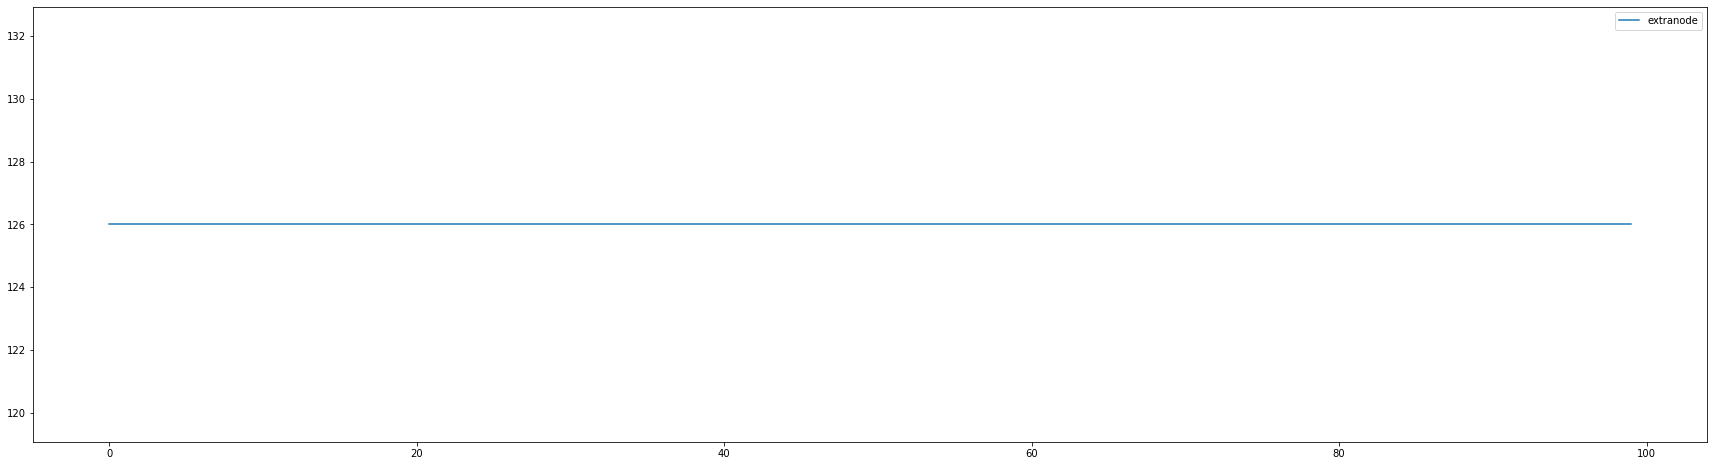

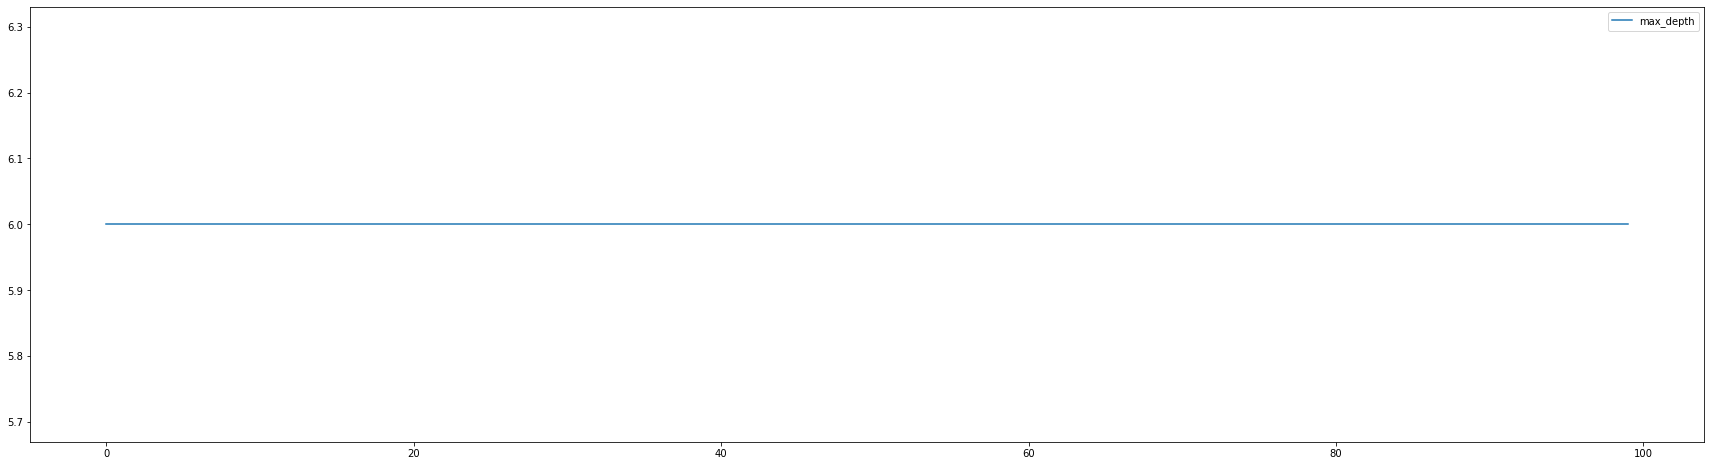

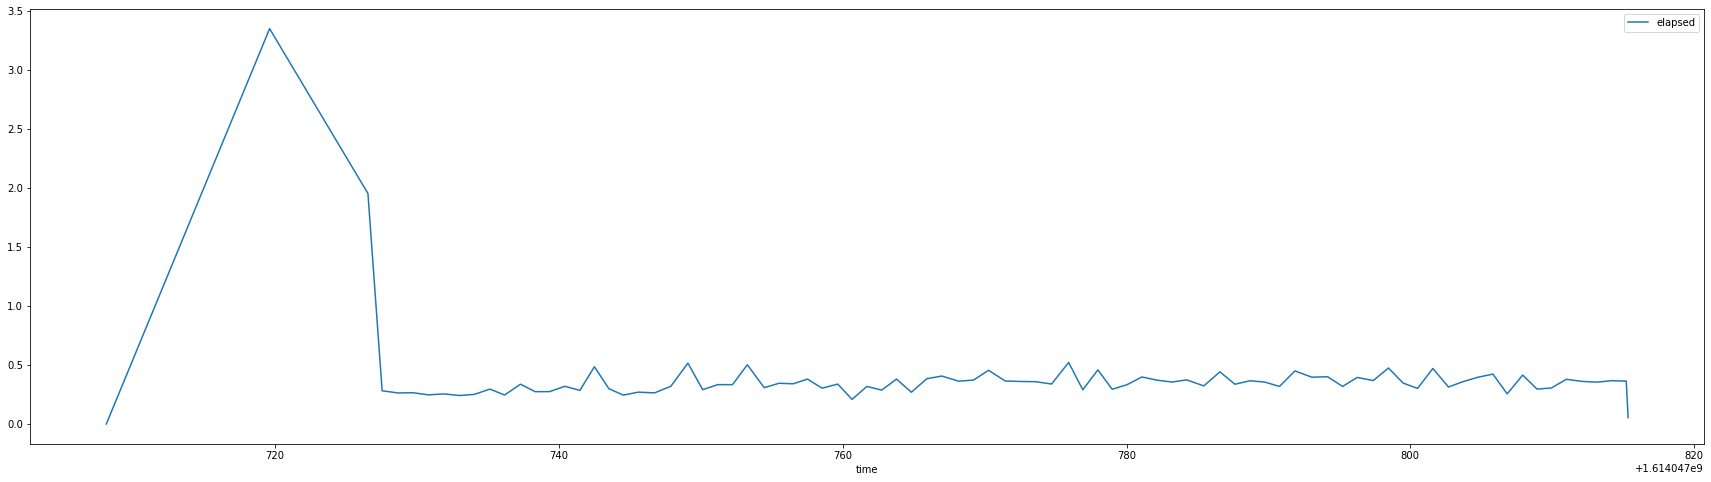

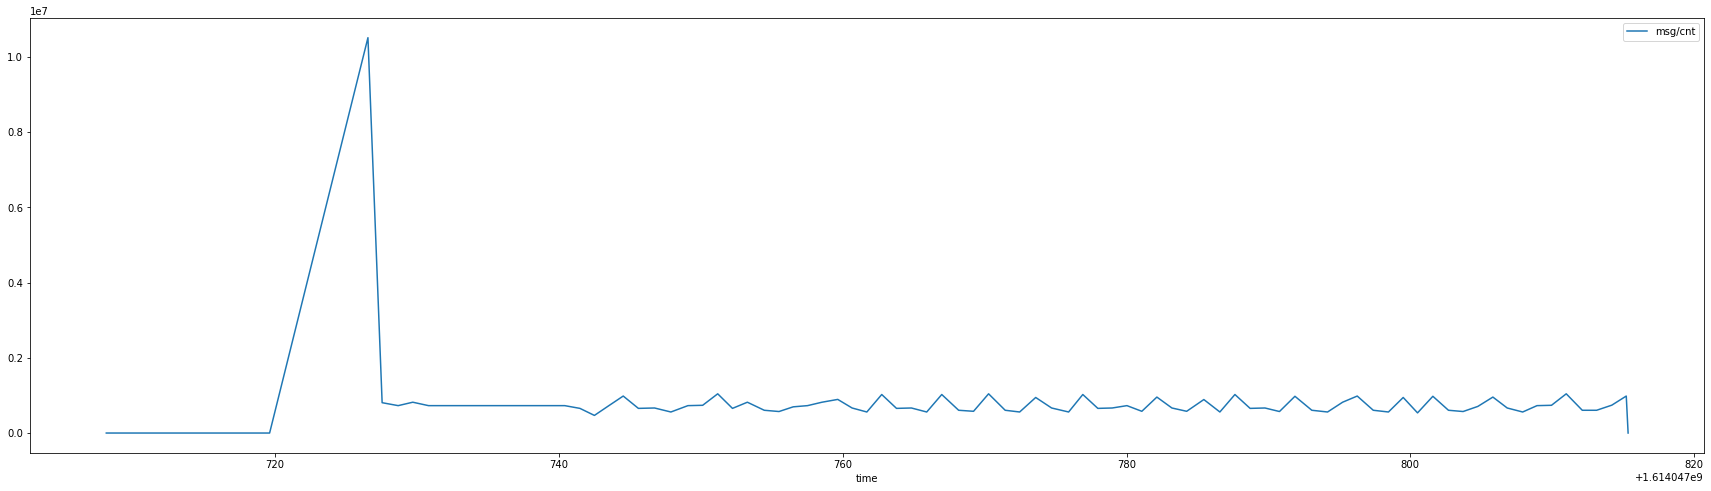

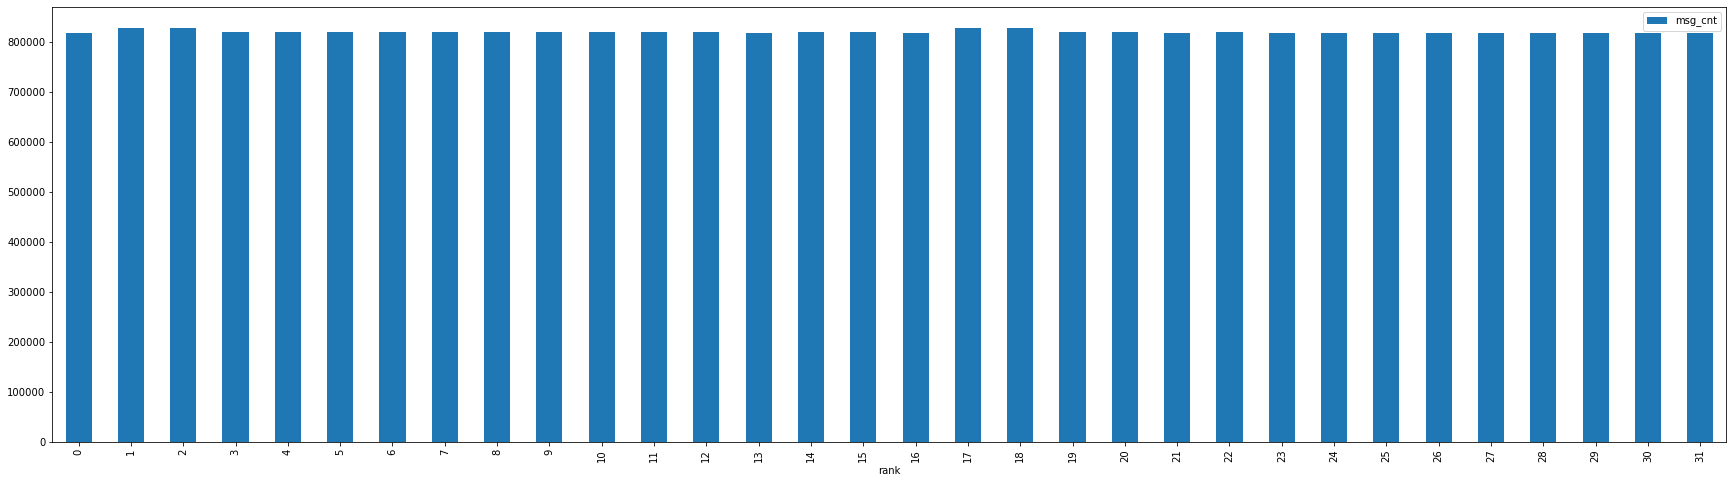

In [56]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 6x16

executor per node: 6
parallelism: 768
memory: 3376m
offheap:25600m
172.31.57.117 : 6   81296	80899	81015	81014	81295	81294
172.31.63.214 : 6   62736	63024	63008	62627	62744	63054
172.31.50.230 : 6   62944	62561	62950	62678	62670	63087
172.31.48.87 : 6   64928	64929	64930	64533	64713	64636
172.31.56.136 : 6   63826	63795	64117	64118	63643	64109
172.31.59.90 : 6   62658	62370	62659	62660	62405	62262
172.31.62.187 : 6   62368	62485	62764	62765	62477	62766
172.31.52.207 : 6   62432	62433	62151	62443	62043	62174
Tue Feb 23 02:43:29 UTC 2021
Tue Feb 23 02:43:30 UTC 2021
Tue Feb 23 02:43:31 UTC 2021
Tue Feb 23 02:43:32 UTC 2021
Tue Feb 23 02:43:32 UTC 2021
Tue Feb 23 02:43:33 UTC 2021
Tue Feb 23 02:43:34 UTC 2021
Tue Feb 23 02:43:34 UTC 2021
Start time : 15217.577381118


/home/sparkuser
21/02/23 02:48:19 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0005/jobs
http://sr525:28080/history/application_1614045517521_0005/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0005.json
application_1614045517521_0005


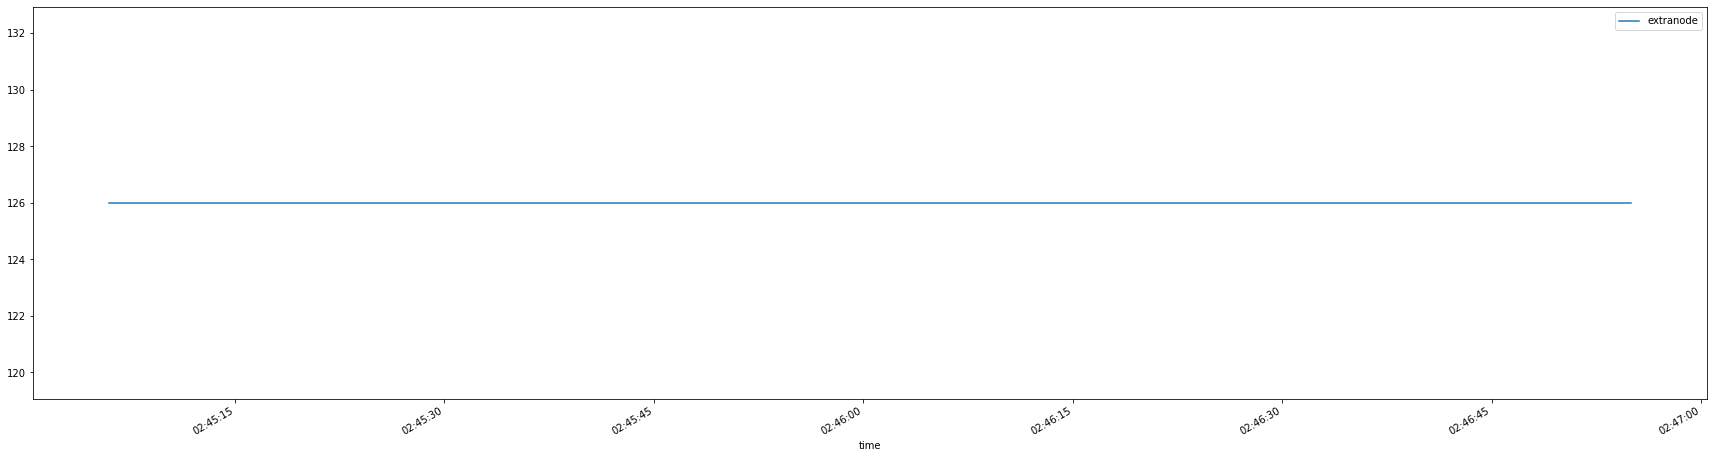

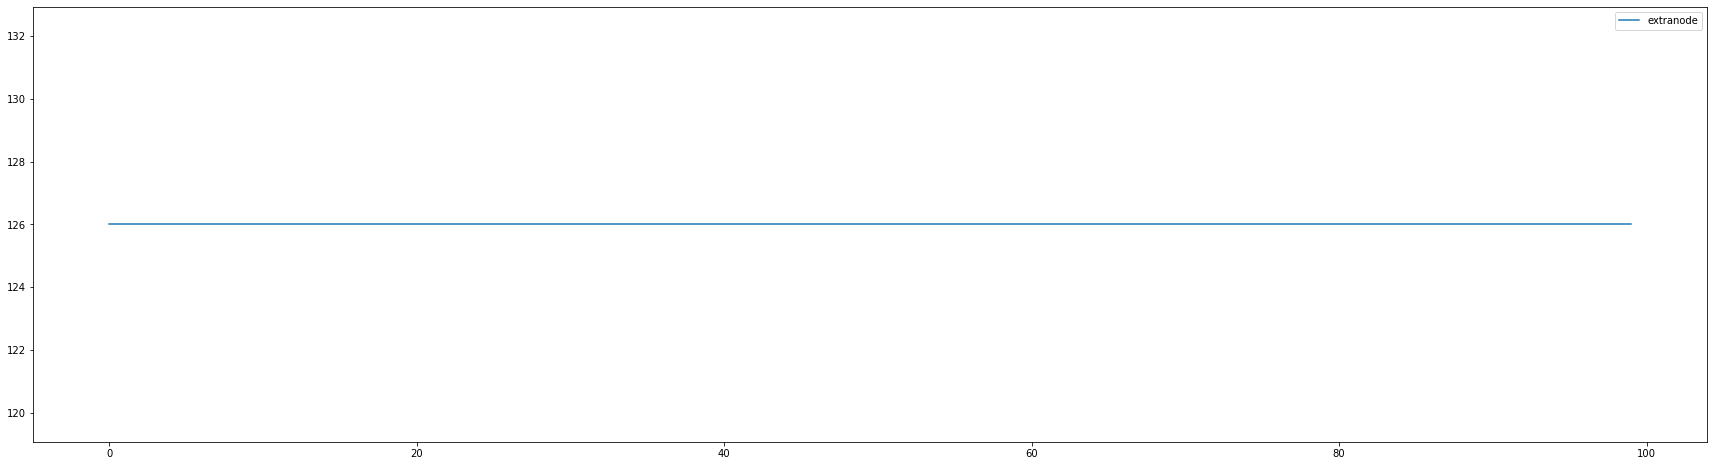

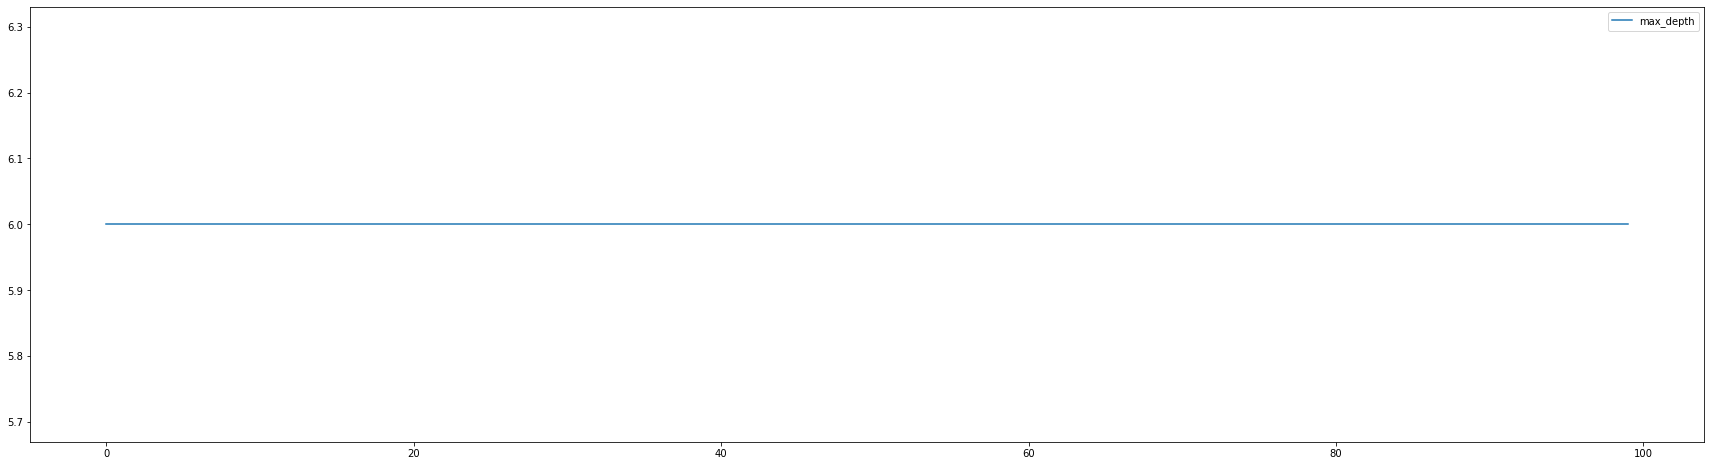

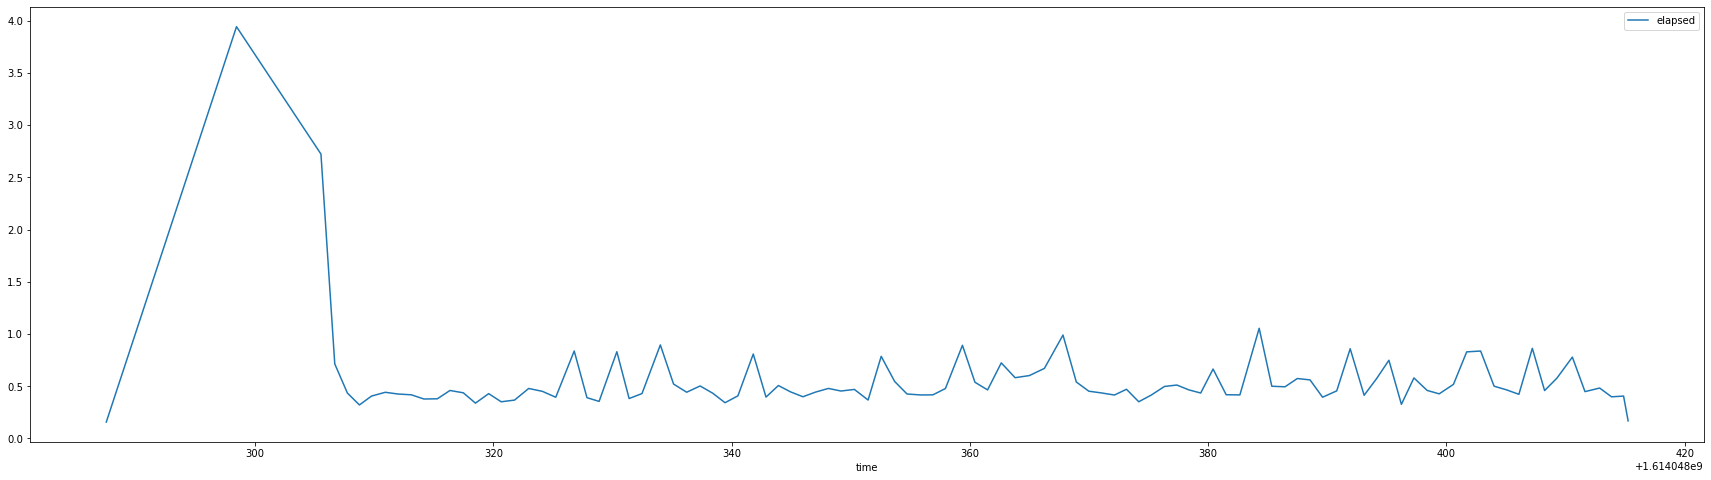

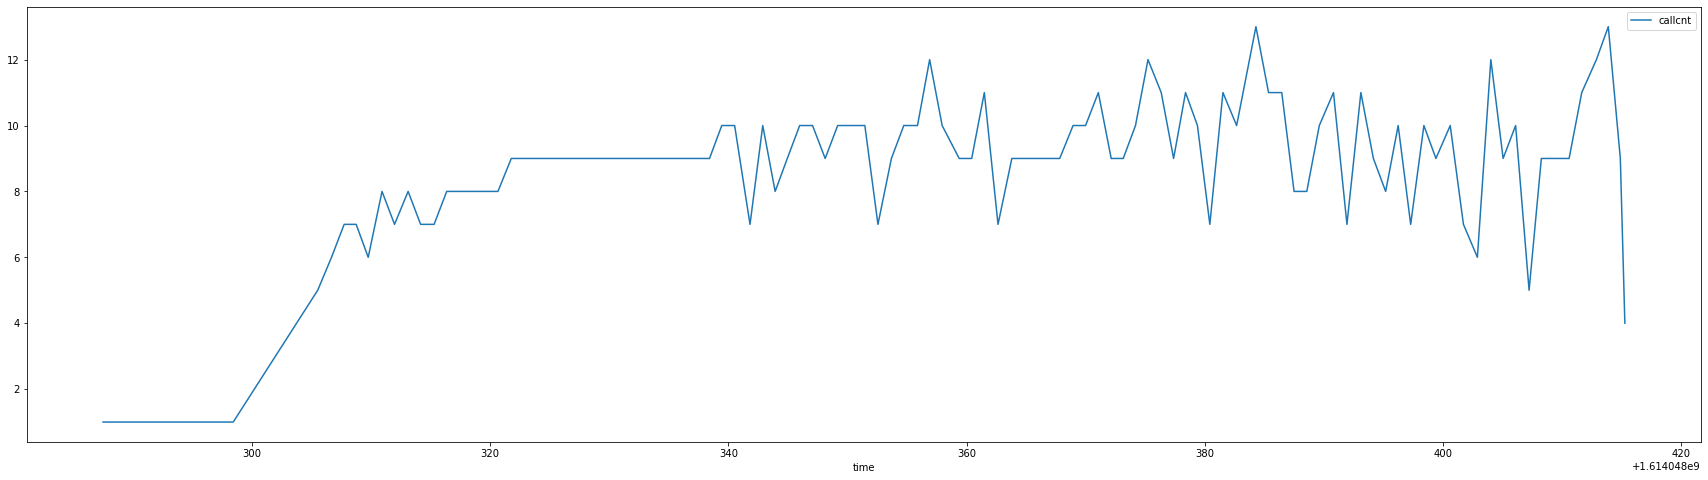

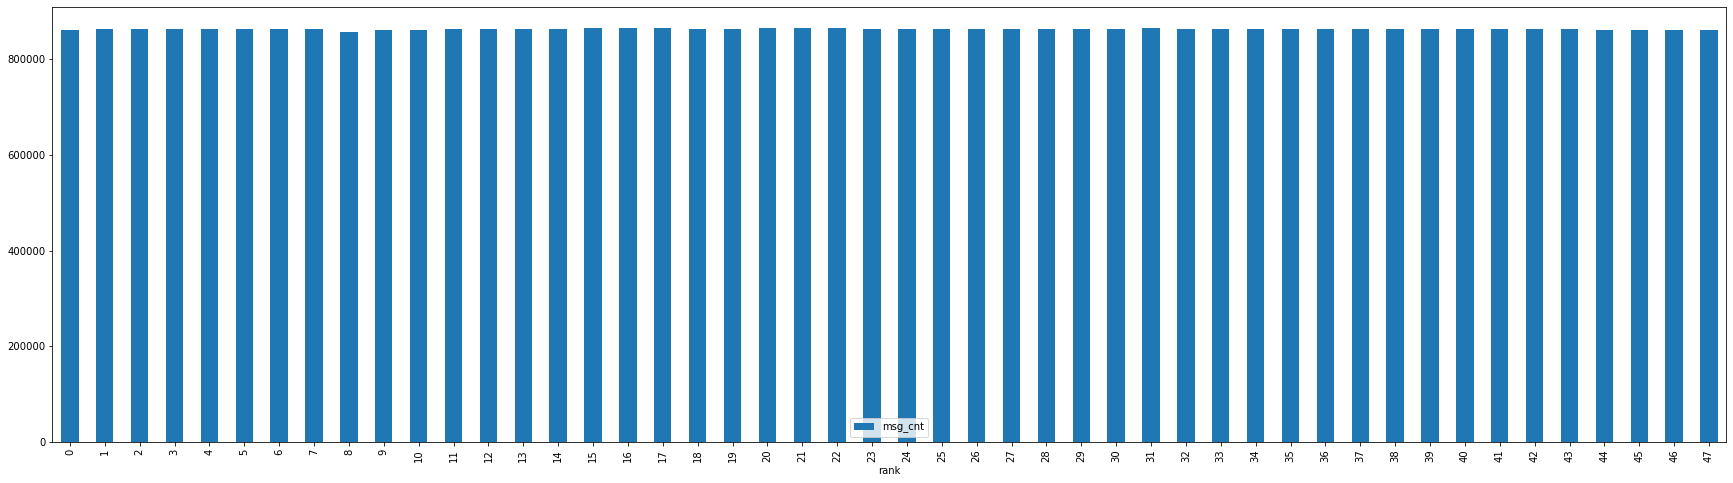

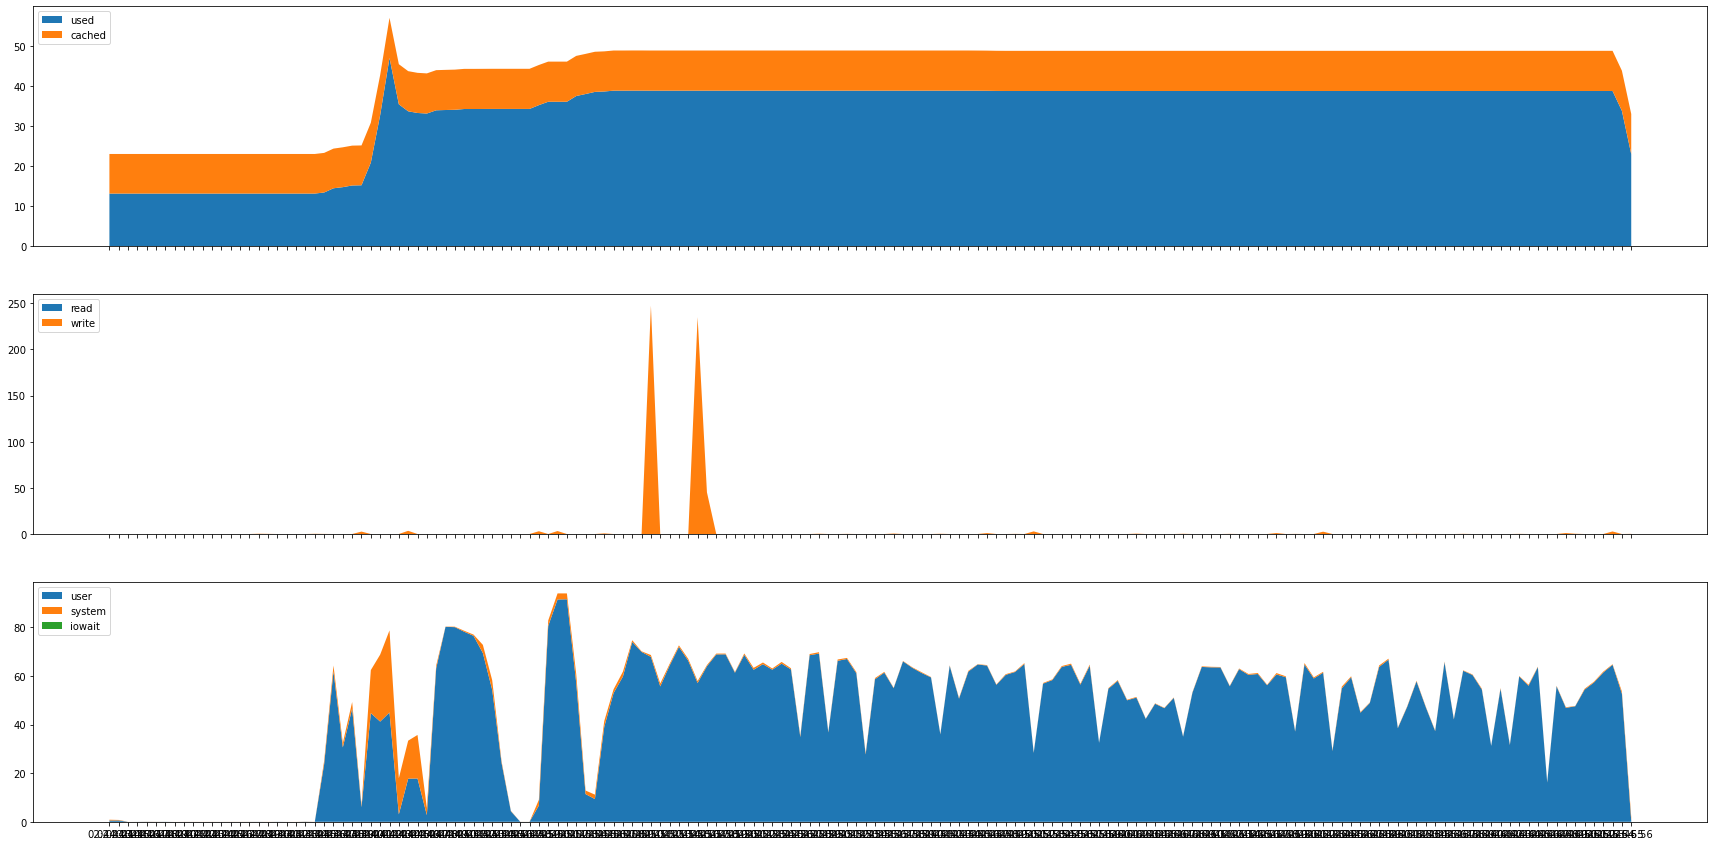

In [61]:
nodes=len(clients)
executors_per_node=3*int(16/nodes)
cores_per_executor=16

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 8x12

executor per node: 8
parallelism: 768
memory: 2276m
offheap:19200m
172.31.57.117 : 8   86741	86740	87111	86473	86888	86360	87112	86478
172.31.63.214 : 8   68451	68357	68452	67991	68729	68105	68808	68106
172.31.50.230 : 8   68002	68295	68294	67899	68651	68283	68650	68079
172.31.48.87 : 8   70097	70736	69984	70100	70443	70733	70351	70446
172.31.56.136 : 8   69585	69587	69586	69193	69945	69944	69307	69308
172.31.59.90 : 8   68147	68338	67957	68234	67882	67725	68557	68558
172.31.62.187 : 8   68129	68274	68130	67858	68501	67749	68500	67867
172.31.52.207 : 8   67489	67490	67835	68125	67741	67836	67375	68126
Tue Feb 23 02:50:36 UTC 2021
Tue Feb 23 02:50:37 UTC 2021
Tue Feb 23 02:50:38 UTC 2021
Tue Feb 23 02:50:38 UTC 2021
Tue Feb 23 02:50:39 UTC 2021
Tue Feb 23 02:50:40 UTC 2021
Tue Feb 23 02:50:41 UTC 2021
Tue Feb 23 02:50:42 UTC 2021
Start time : 15645.087797029


/home/sparkuser
21/02/23 02:56:43 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0006/jobs
http://sr525:28080/history/application_1614045517521_0006/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0006.json
application_1614045517521_0006


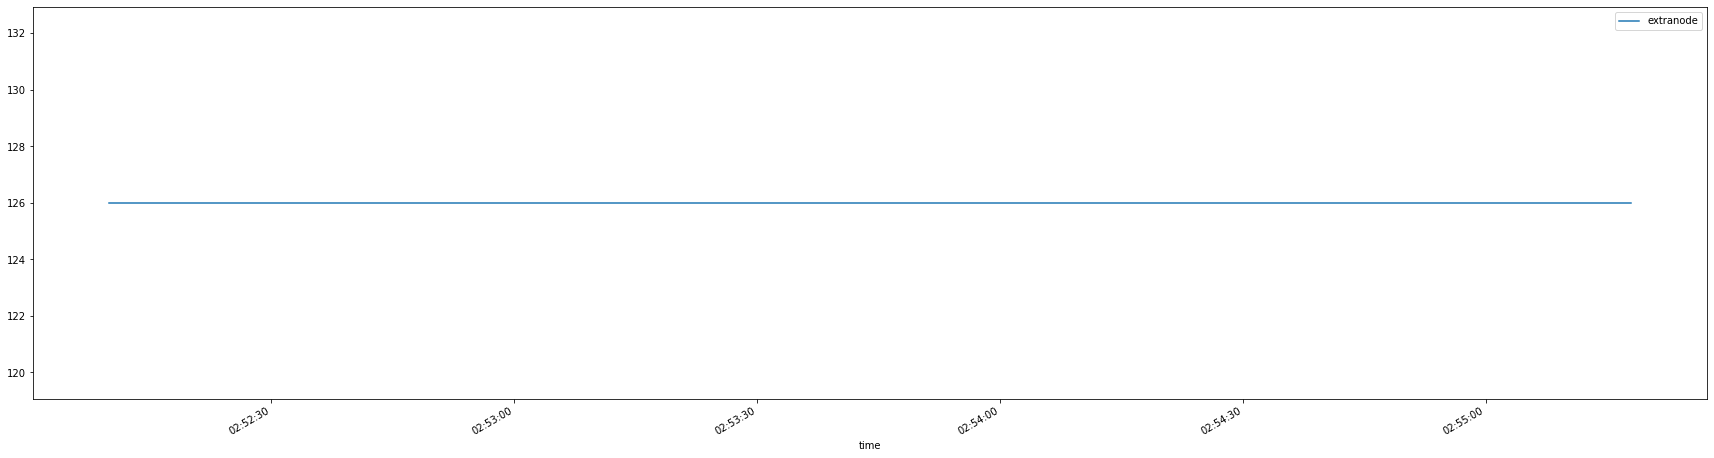

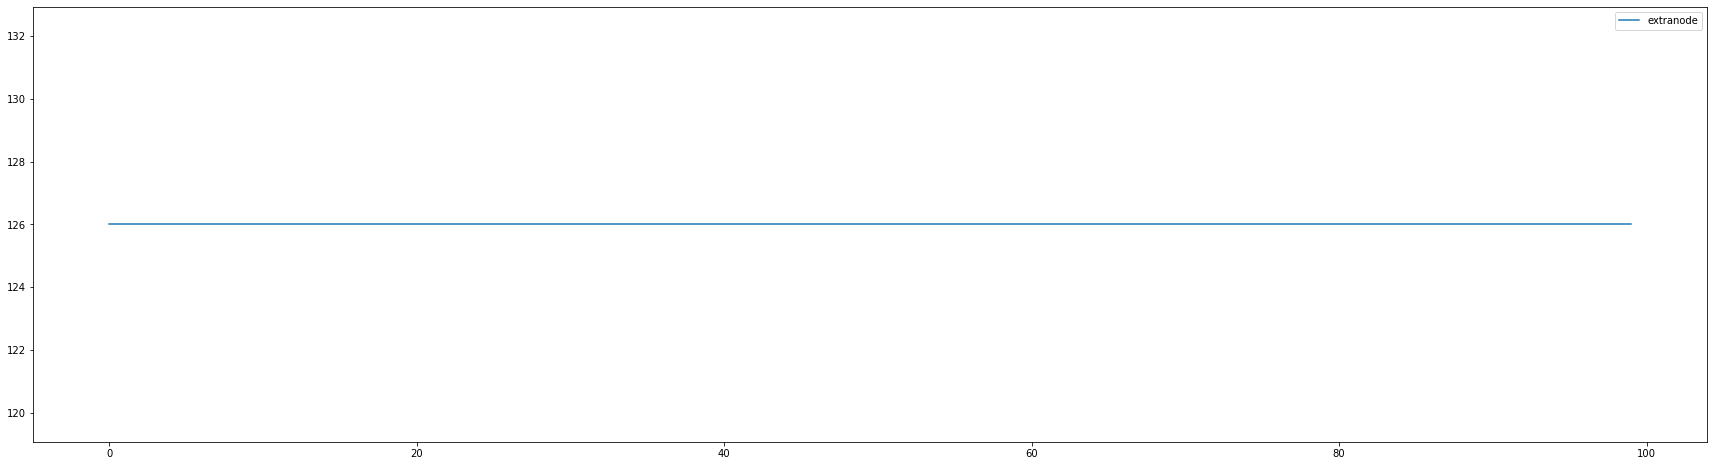

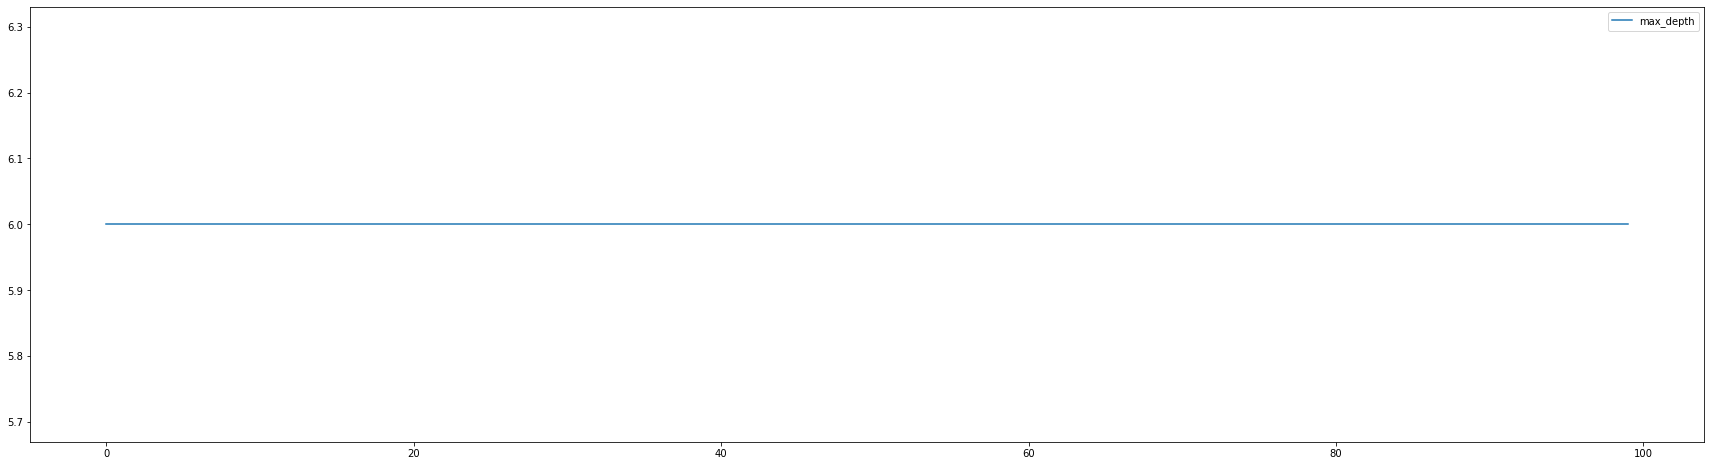

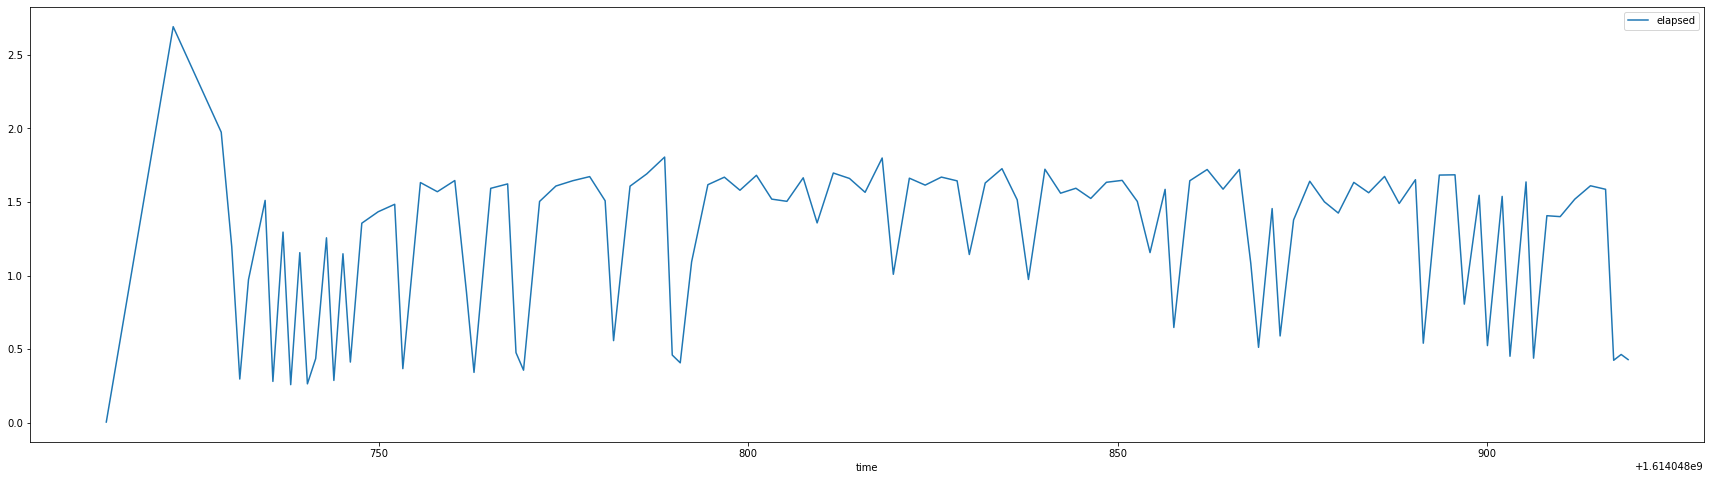

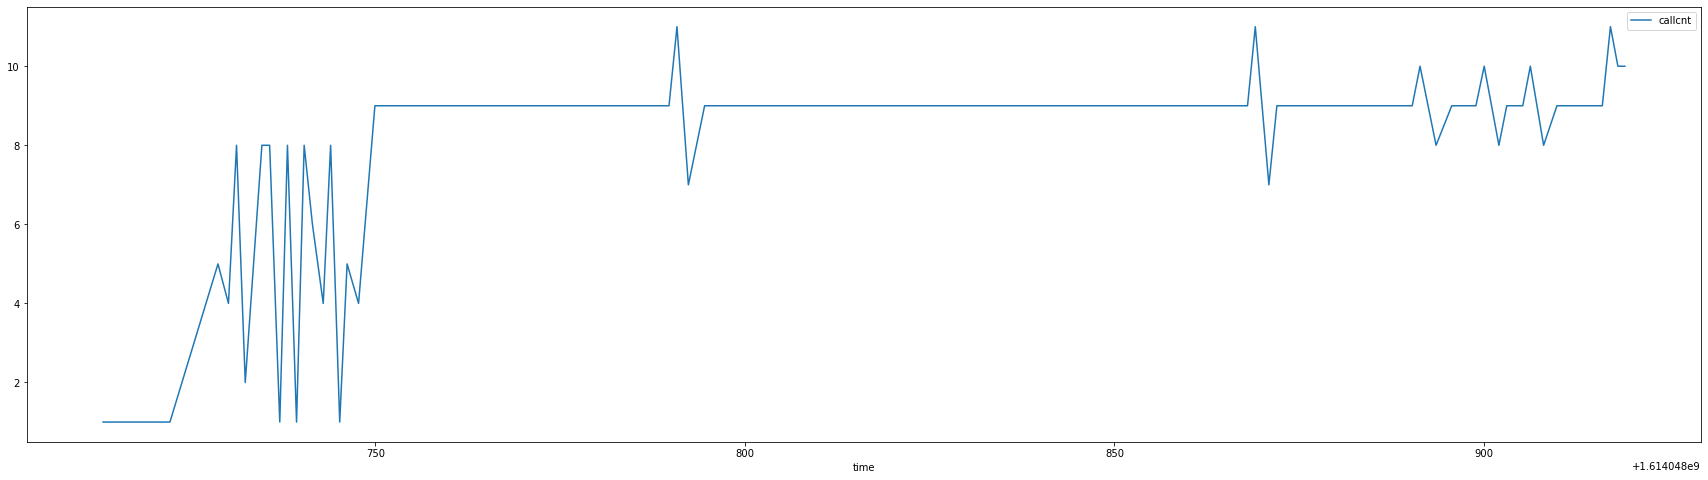

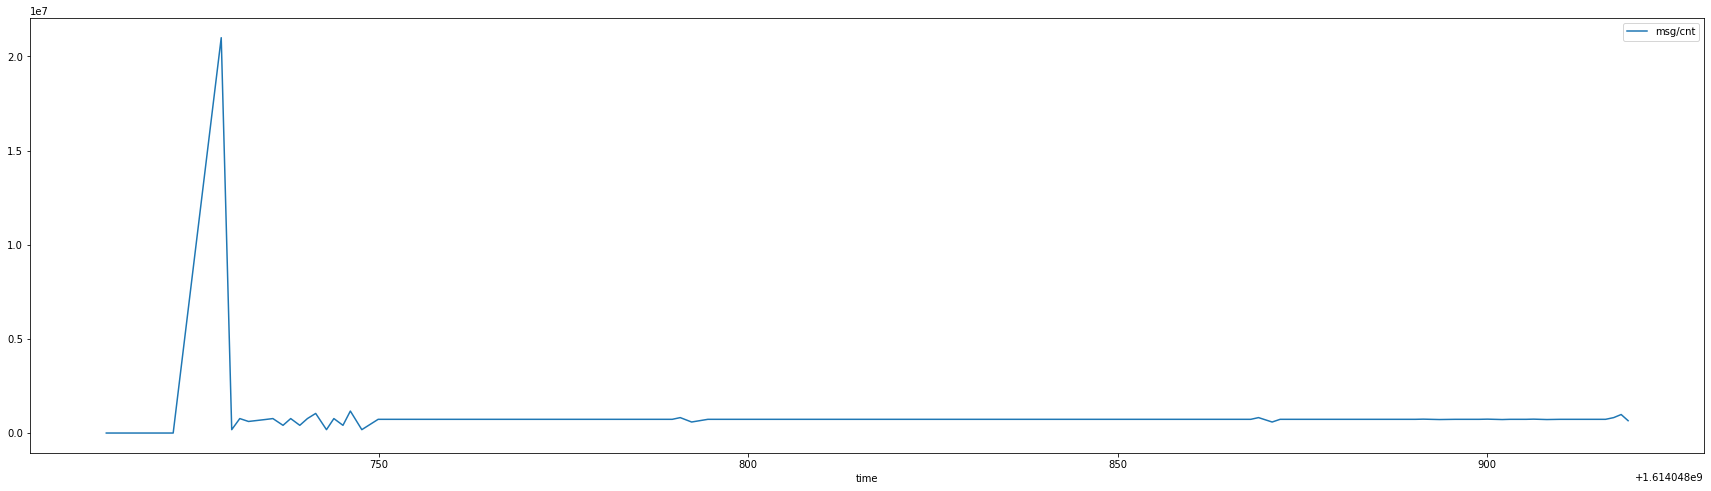

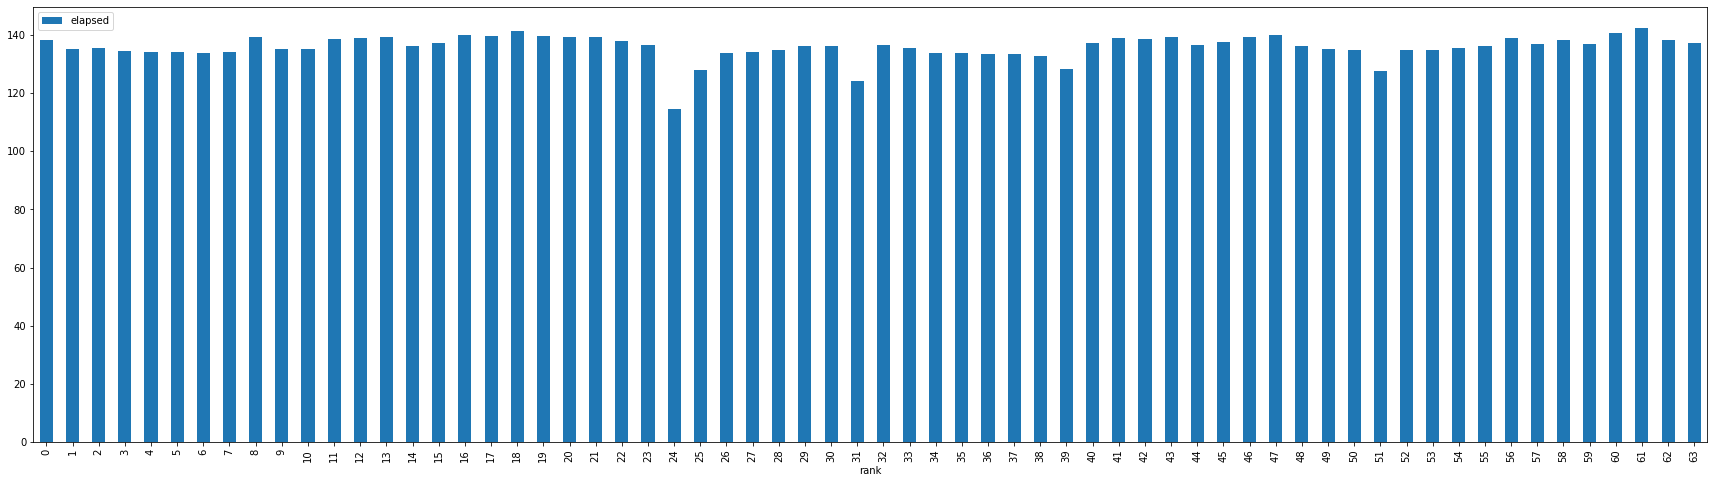

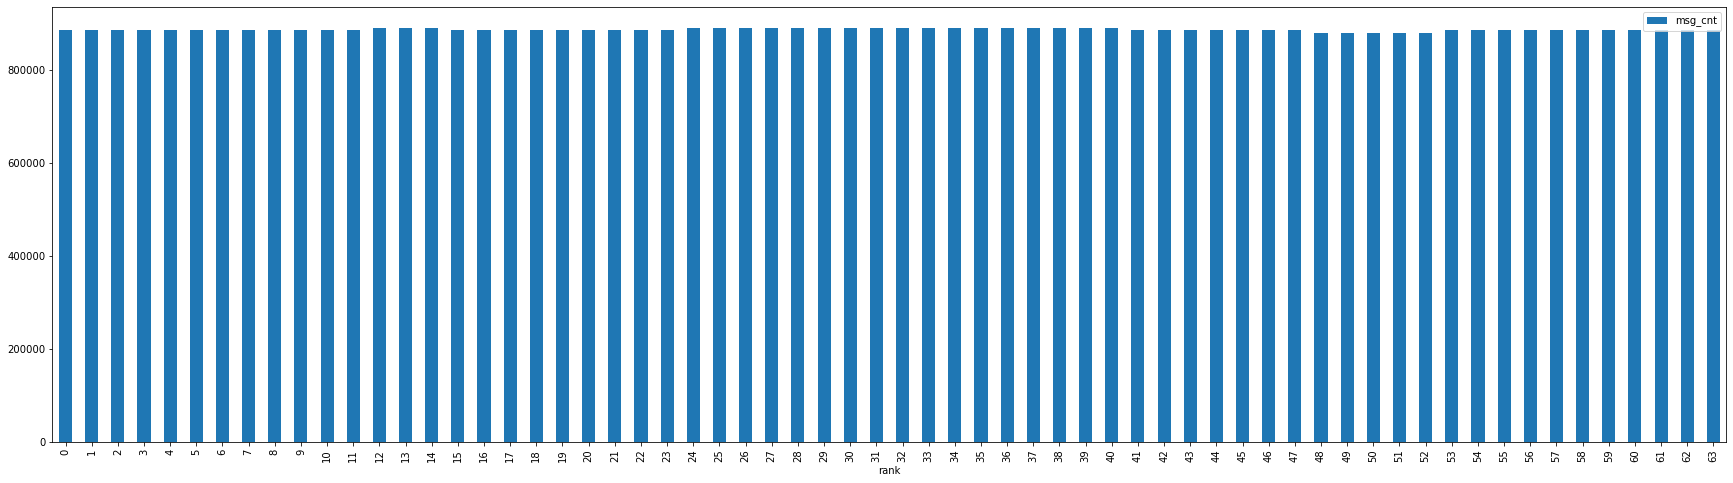

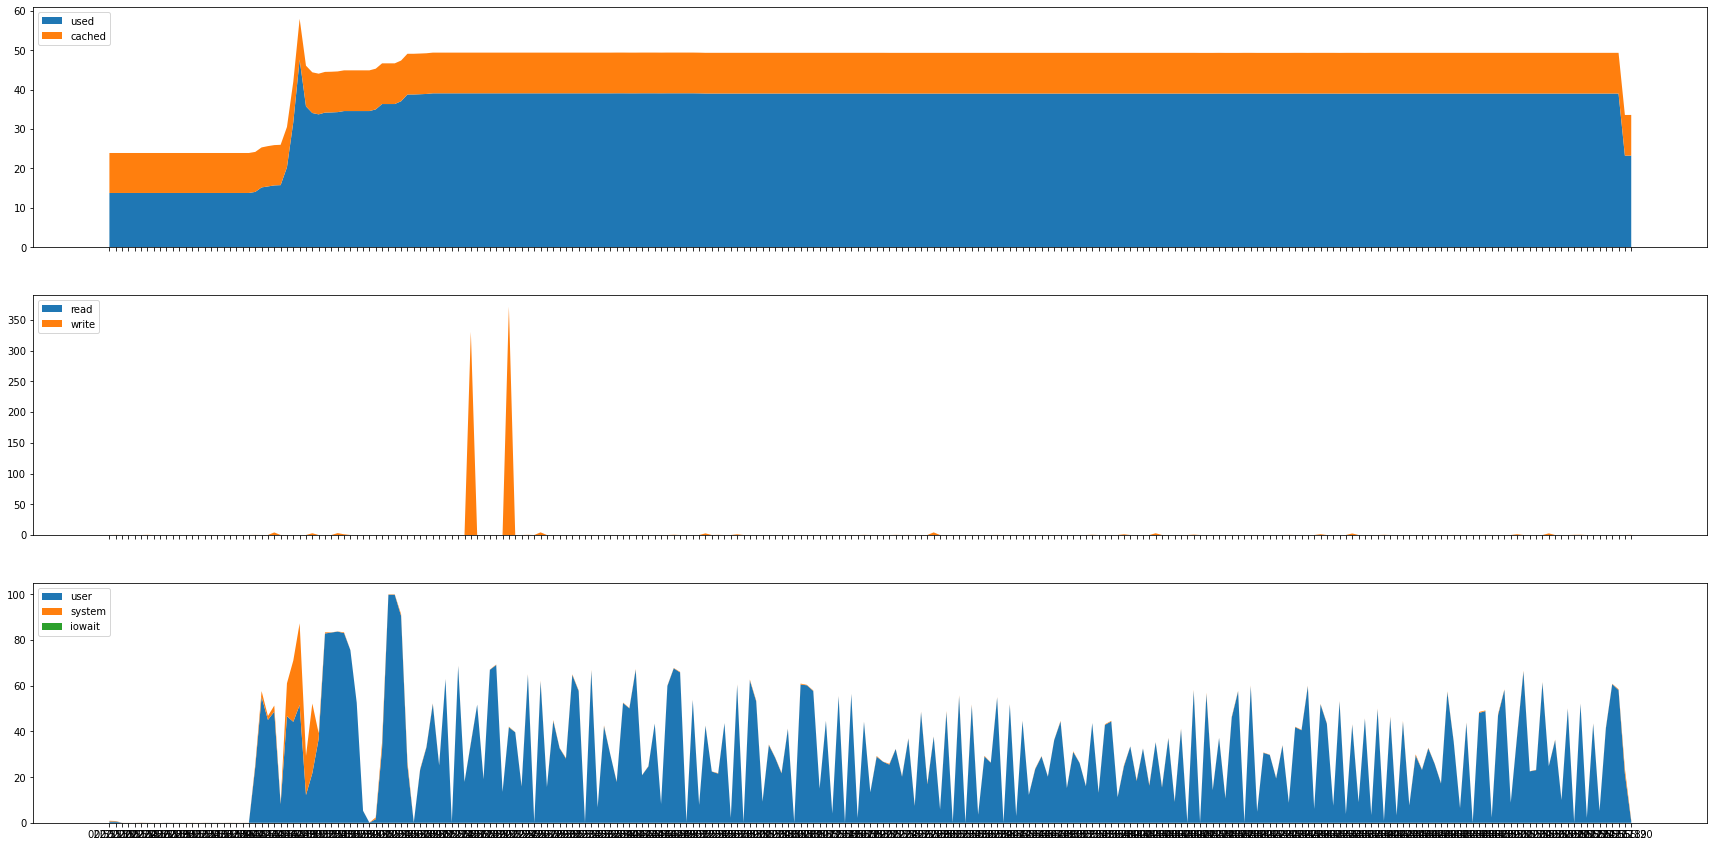

In [62]:
nodes=len(clients)
executors_per_node=4*int(16/nodes)
cores_per_executor=12

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 12x8

executor per node: 12
parallelism: 768
memory: 1176m
offheap:12800m
172.31.57.117 : 12   93033	92265	93032	93034	92660	92375	92662	92664	93405	93404	93406	92382
172.31.63.214 : 12   73827	74726	74284	73937	74289	74576	74967	74199	74966	74968	73944	74584
172.31.50.230 : 12   74275	73993	73832	75086	75089	75091	74356	74708	74362	74685	74684	74044
172.31.48.87 : 12   75974	77005	75981	77004	77006	76273	76304	76246	76633	75864	76632	76634
172.31.56.136 : 12   75457	75459	75463	75177	76203	75818	76205	75180	76204	75824	75063	75961
172.31.59.90 : 12   74083	74084	73736	74763	74765	73740	74764	74000	74389	73623	74391	74393
172.31.62.187 : 12   74371	73609	74379	74378	74005	74007	74006	74749	73725	74748	73724	74750
172.31.52.207 : 12   73287	74312	73288	74314	73930	73932	74316	73619	74069	73172	73561	73560
Tue Feb 23 02:59:29 UTC 2021
Tue Feb 23 02:59:30 UTC 2021
Tue Feb 23 02:59:30 UTC 2021
Tue Feb 23 02:59:31 UTC 2021
Tue Feb 23 02:59:32 UTC 2021
Tue Feb 23 02:59:33 UTC 2021
Tue Feb 23 02:59

/home/sparkuser
21/02/23 03:06:48 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0007/jobs
http://sr525:28080/history/application_1614045517521_0007/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0007.json
application_1614045517521_0007


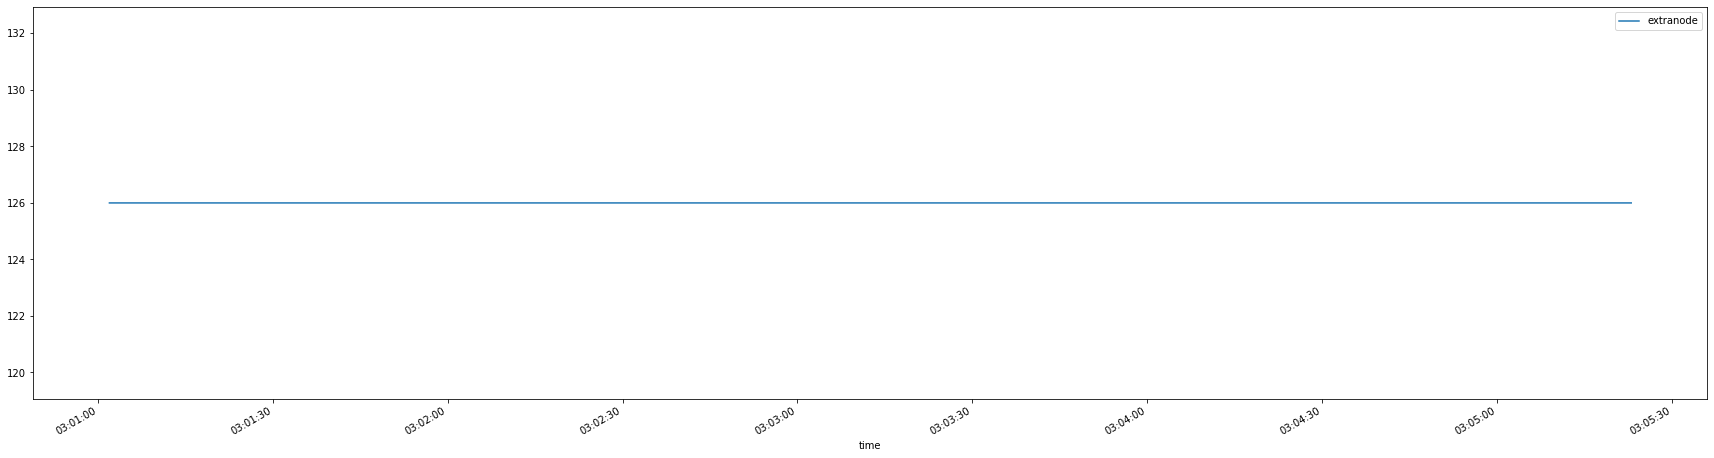

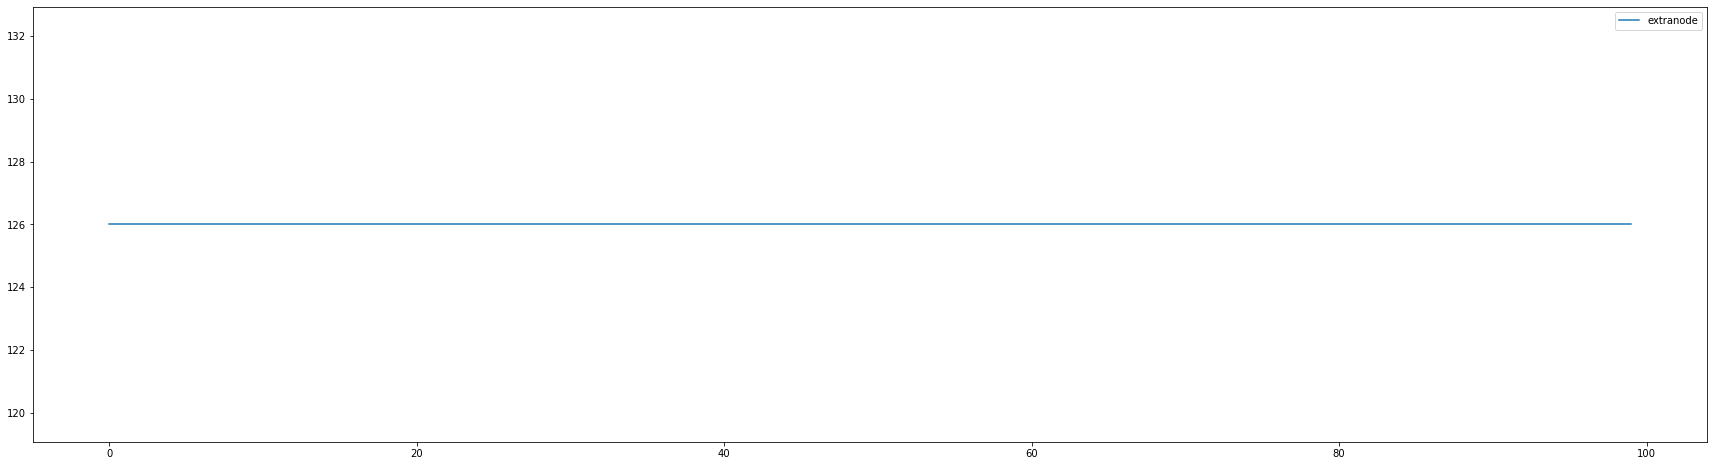

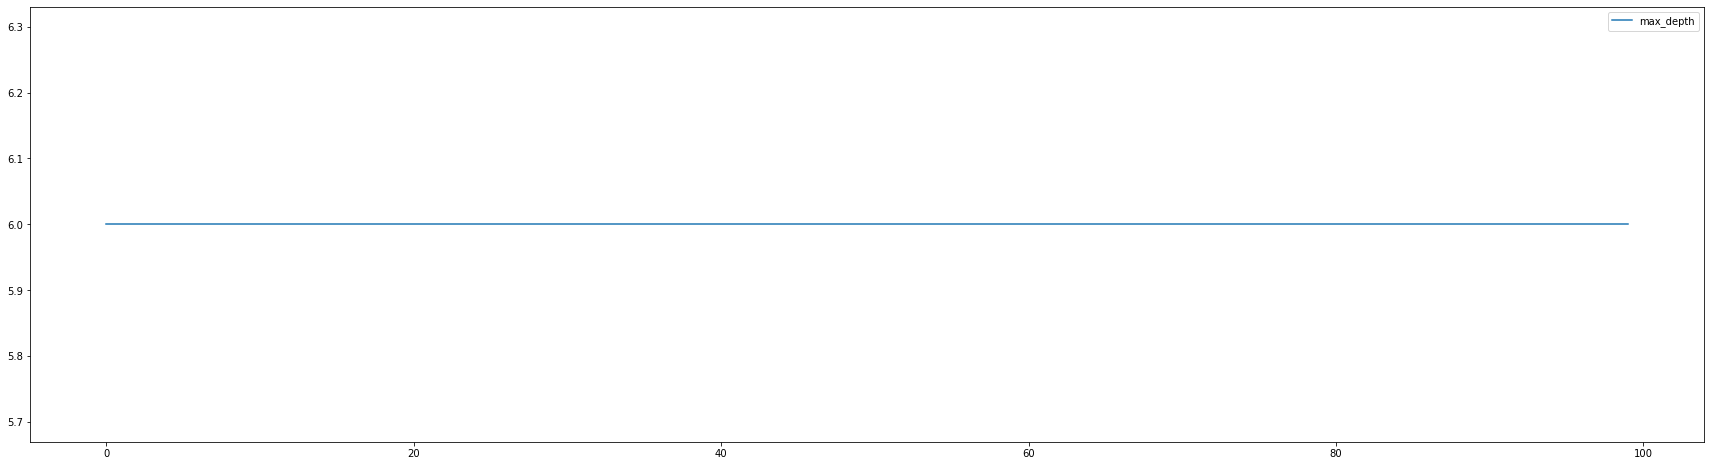

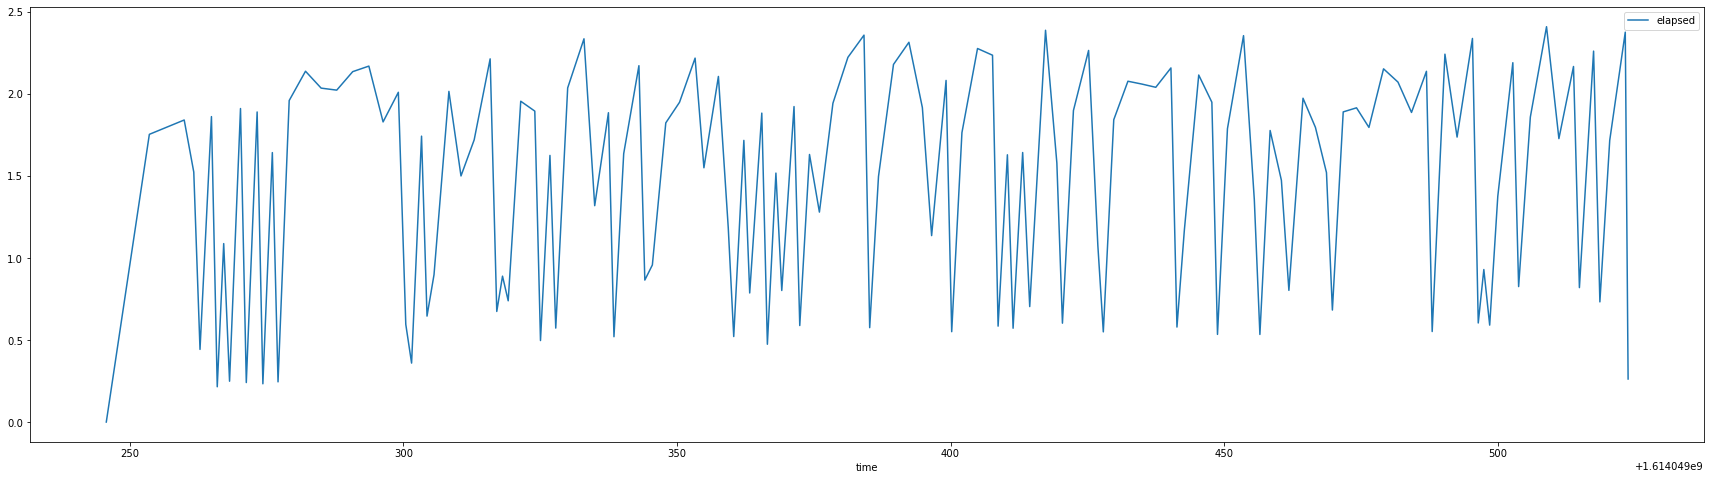

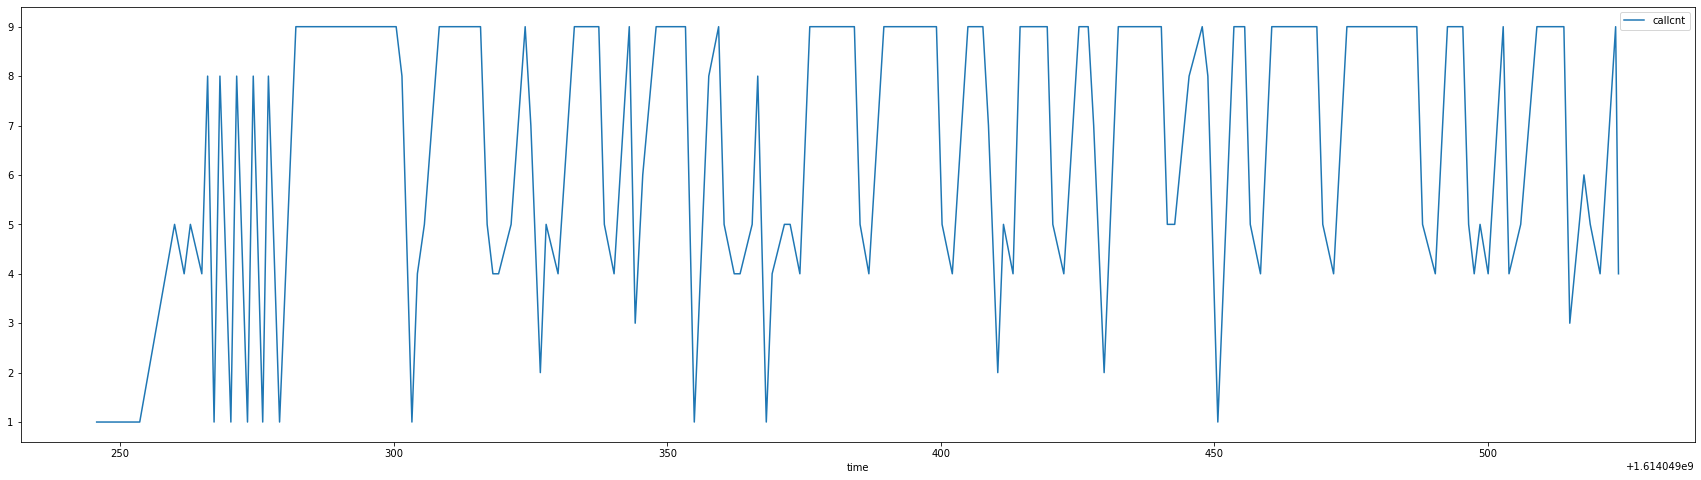

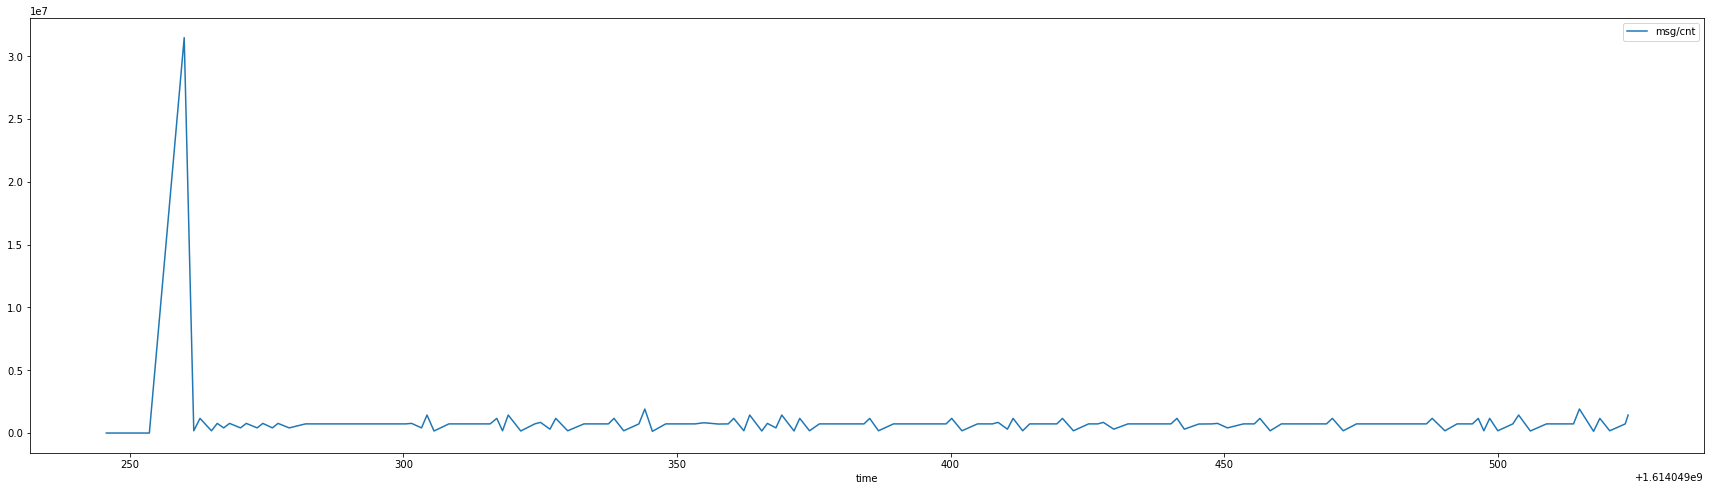

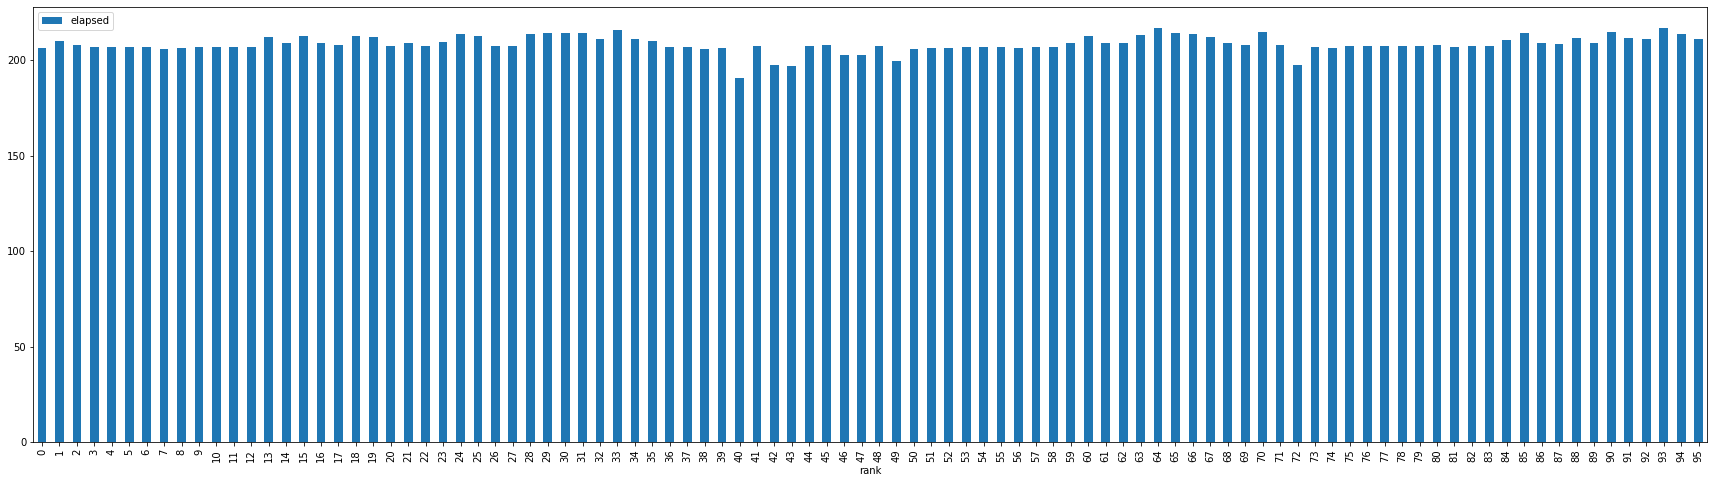

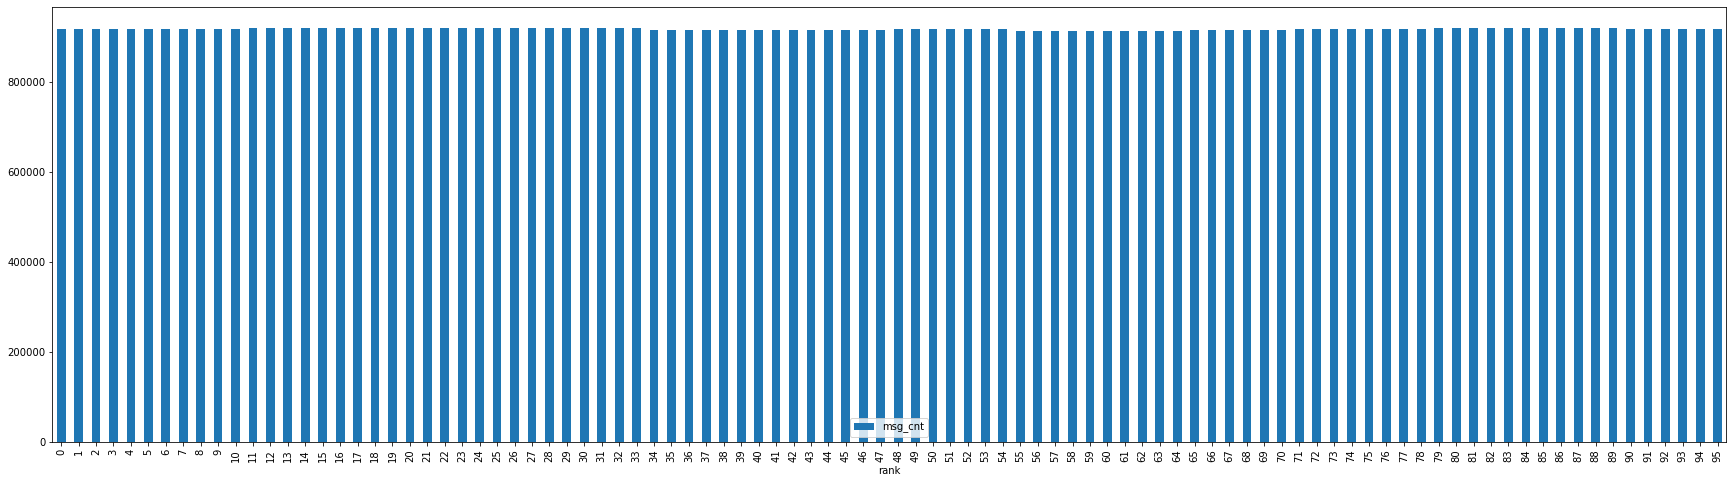

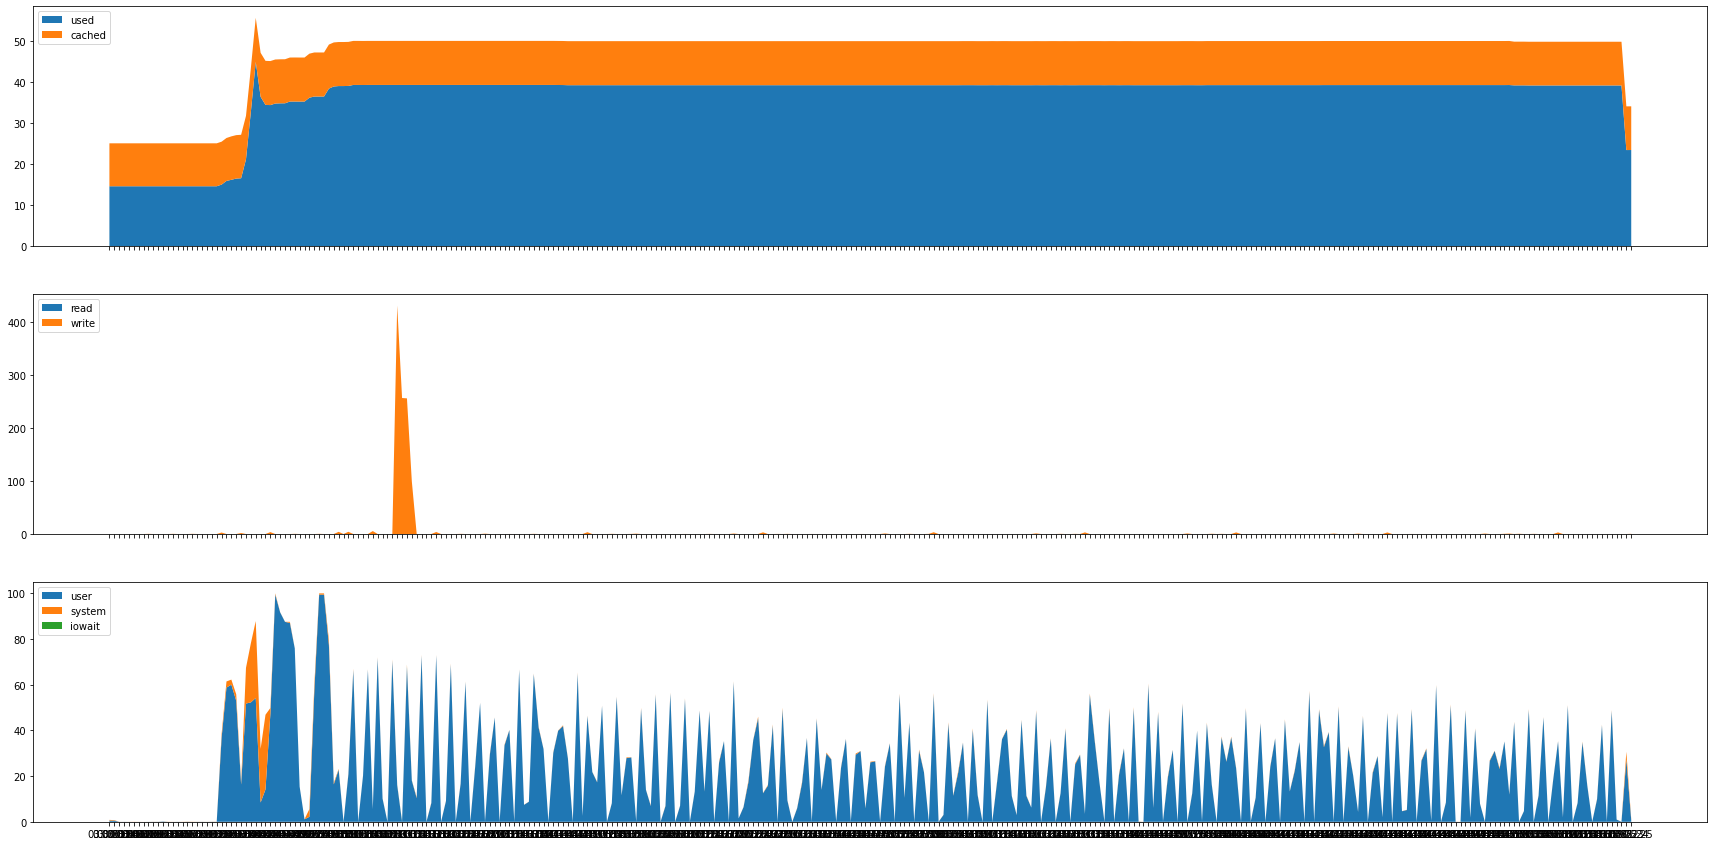

In [63]:
nodes=len(clients)
executors_per_node=6*int(16/nodes)
cores_per_executor=8

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 4x24 Vanilla

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   14256	14260	14085	14506
172.31.63.214 : 4   92483	92323	92125	92124
172.31.50.230 : 4   92423	92424	92781	92620
172.31.48.87 : 4   94597	94598	94955	94794
172.31.56.136 : 4   94065	94064	94261	94423
172.31.59.90 : 4   92752	92395	92394	92591
172.31.62.187 : 4   92593	92594	92790	92952
172.31.52.207 : 4   91921	92082	91725	91724
Start time : 18335.504689593


/home/sparkuser
21/02/23 03:43:36 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0011/jobs
http://sr525:28080/history/application_1614045517521_0011/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0011.json
application_1614045517521_0011


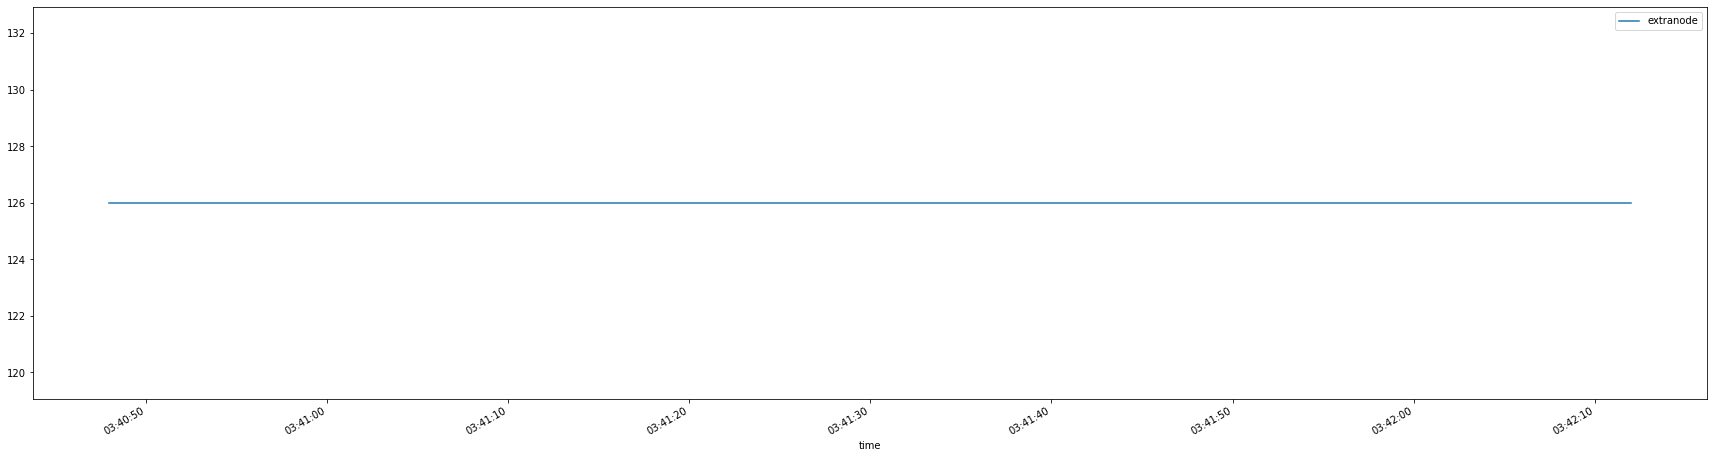

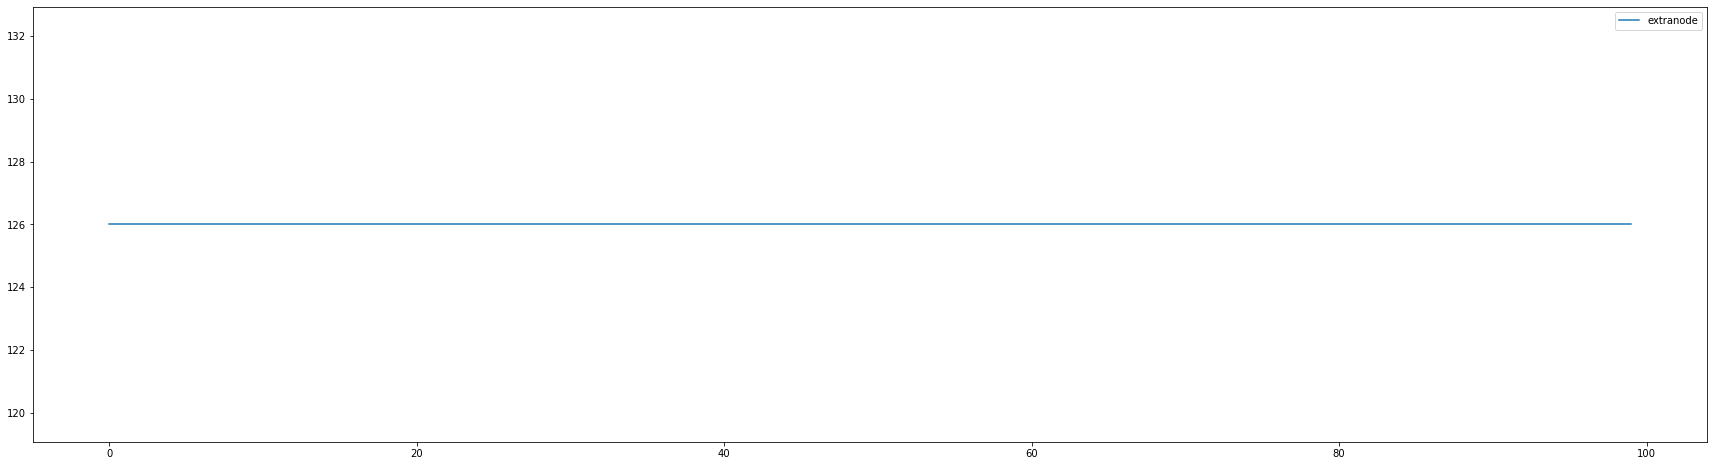

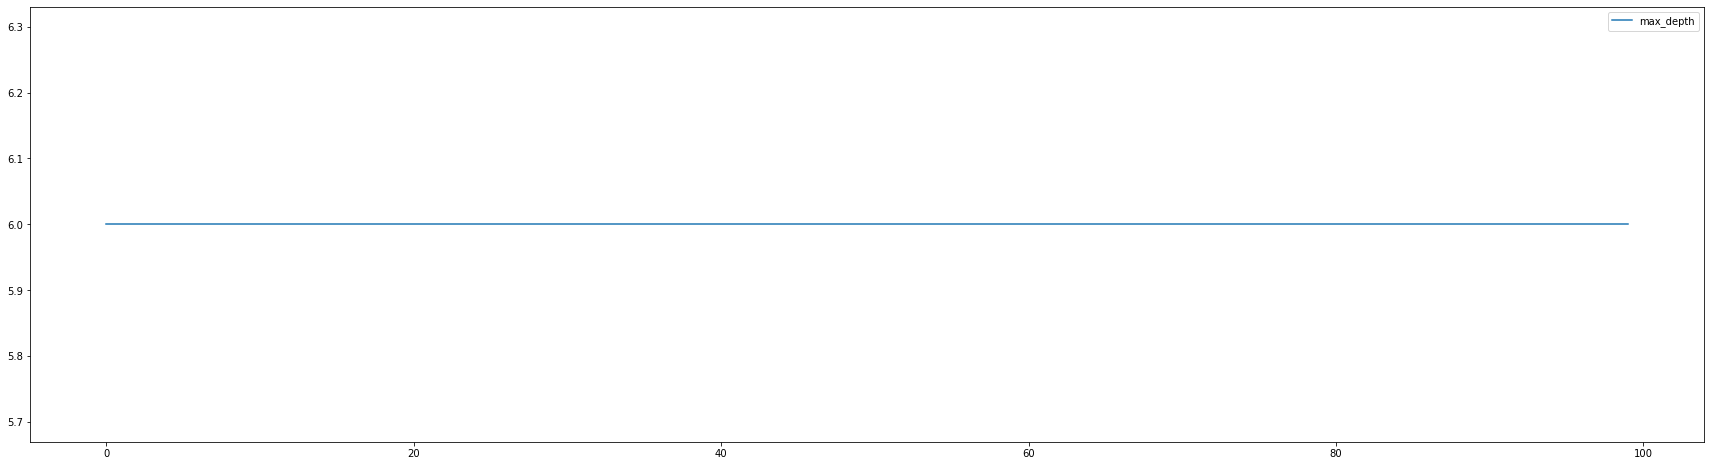

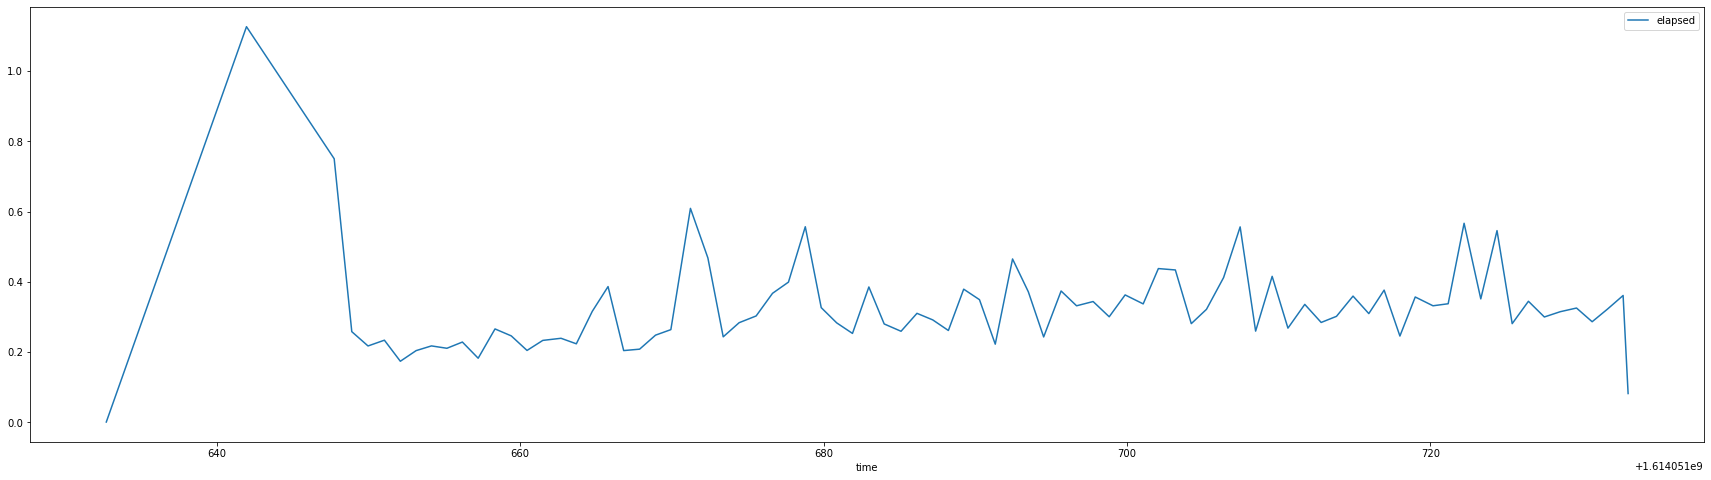

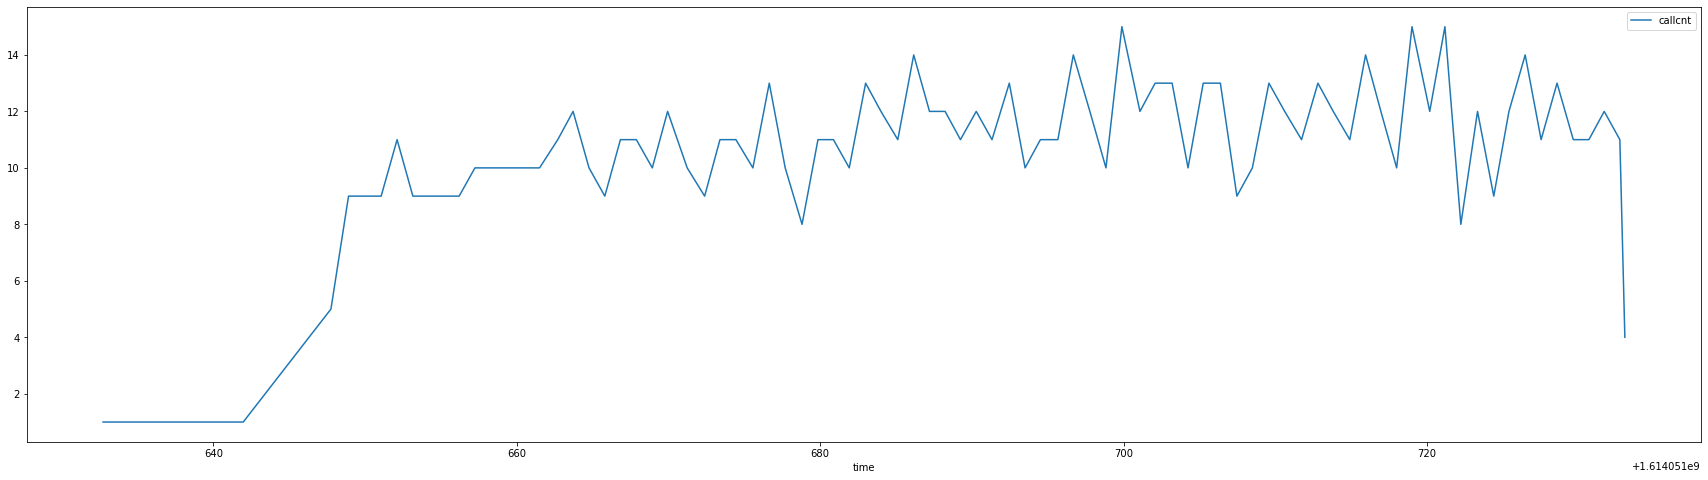

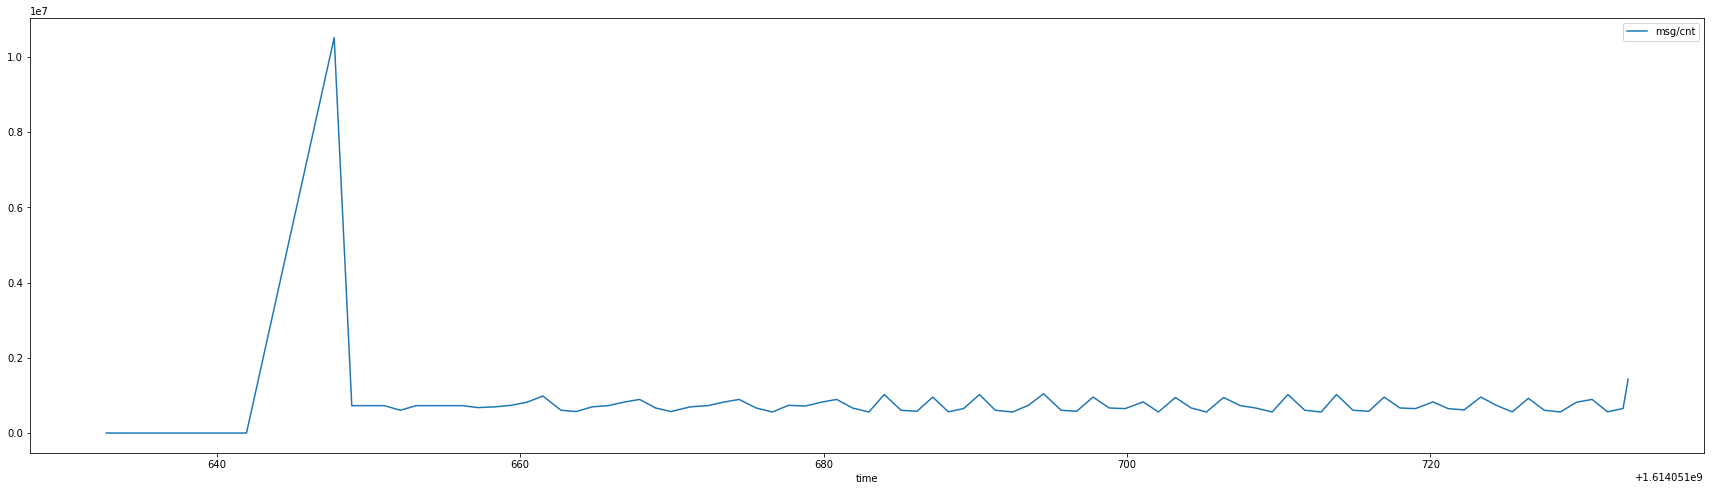

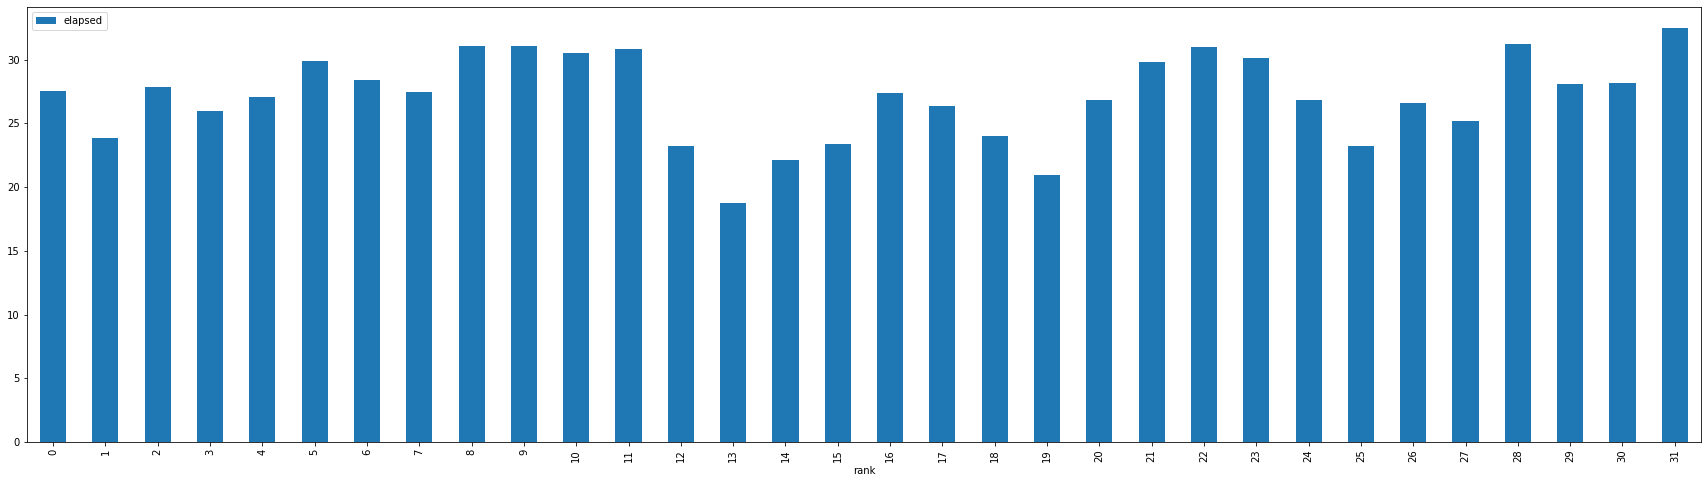

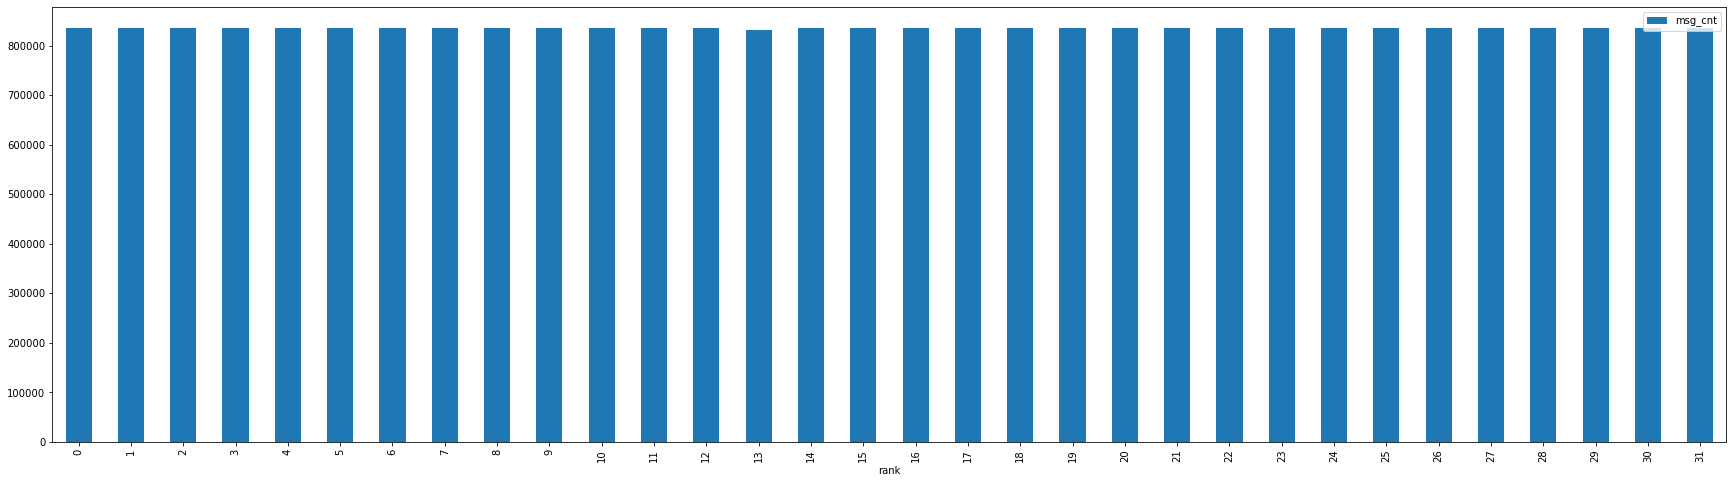

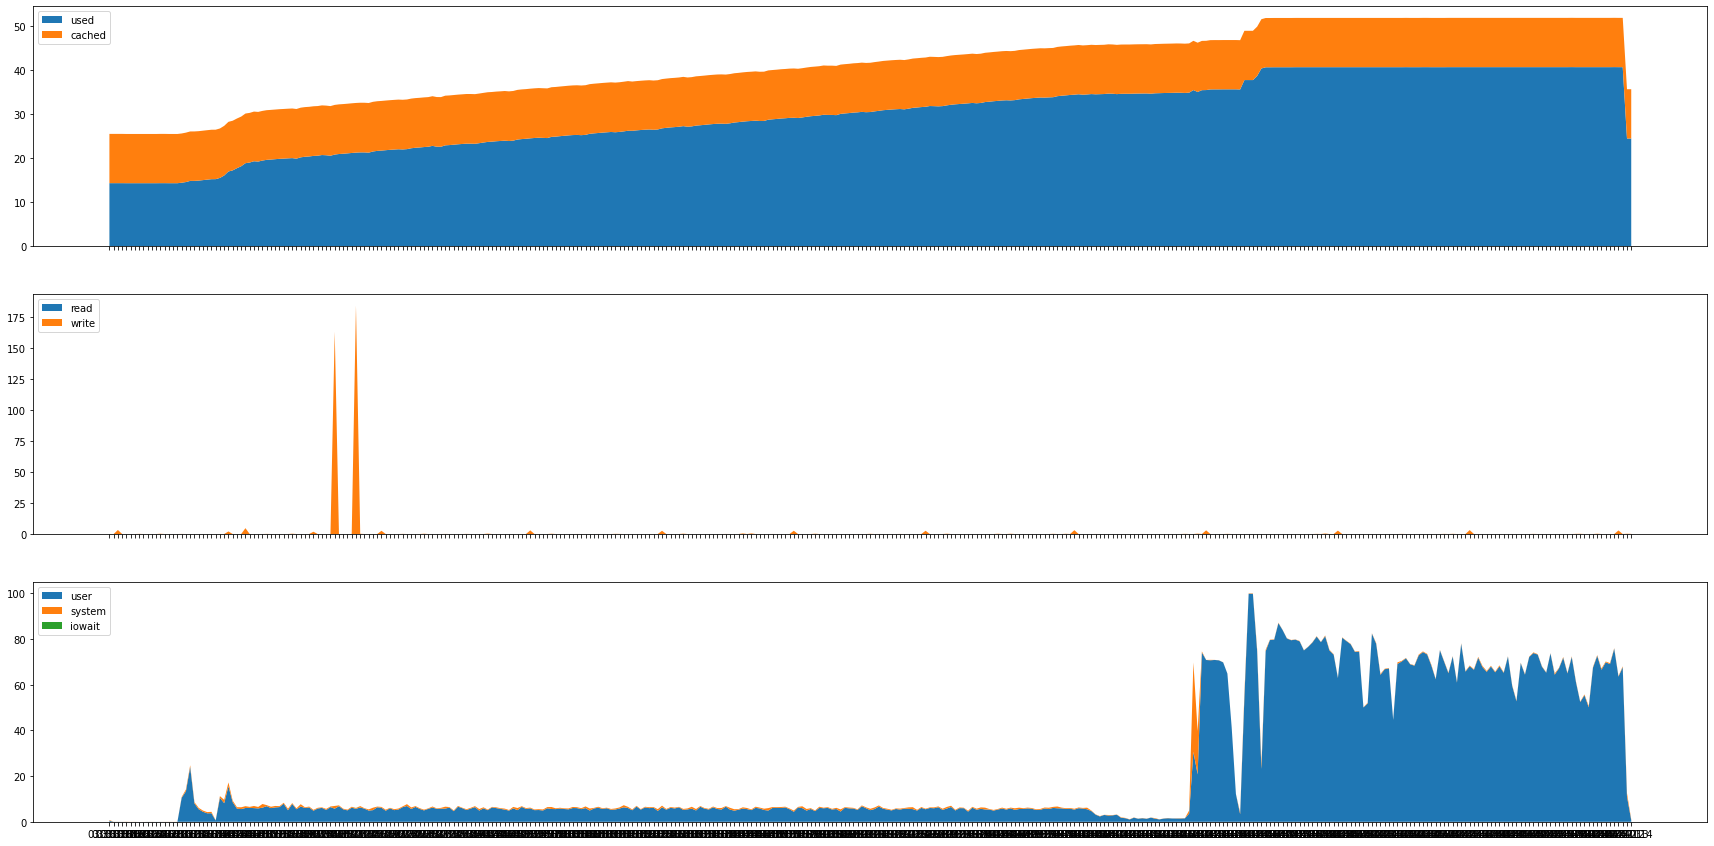

In [73]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")

        vectorAssembler = VectorAssembler().setInputCols([l for l in df.columns if l!="label"]).setOutputCol("features")
        df=vectorAssembler.transform(df)

        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

In [40]:
jars=!ls -d {home}/jars-for-aws-cpu/1.3/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j_2.12-1.3.3.jar pyspark-shell'

In [41]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('parquet').load("/HiBench606Mx50.dataframe.float.parquet.8x96")

        df=df.coalesce(executors_per_node*nodes)
        
        vectorAssembler = VectorAssembler().setInputCols([l for l in df.columns if l!="label"]).setOutputCol("features")
        df=vectorAssembler.transform(df)

        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   18976	19091	19087	19343
172.31.63.214 : 4   97075	97335	96968	97083
172.31.50.230 : 4   97333	97591	97224	97339
172.31.48.87 : 4   1874	2035	2115	2314
172.31.56.136 : 4   1367	1256	1643	1375
172.31.59.90 : 4   97299	97558	97192	97307
172.31.62.187 : 4   97457	97344	97458	97711
172.31.52.207 : 4   96771	96403	96517	96516
Start time : 19003.941225233


Py4JJavaError: An error occurred while calling o202.cancelAllJobs.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:111)
	at org.apache.spark.SparkContext.cancelAllJobs(SparkContext.scala:2278)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   22149	21897	21898	21788
172.31.63.214 : 4   2149	2425	2153	2028
172.31.50.230 : 4   2658	2276	2405	2380
172.31.48.87 : 4   4881	4725	4826	5086
172.31.56.136 : 4   4163	4421	4170	4059
172.31.59.90 : 4   2116	2119	1994	2379
172.31.62.187 : 4   2213	2601	2365	2318
172.31.52.207 : 4   1747	1303	1479	1480
Start time : 19667.213613331


/home/sparkuser
21/02/23 04:05:54 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614045517521_0013/jobs
http://sr525:28080/history/application_1614045517521_0013/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614045517521_0013.json
application_1614045517521_0013


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


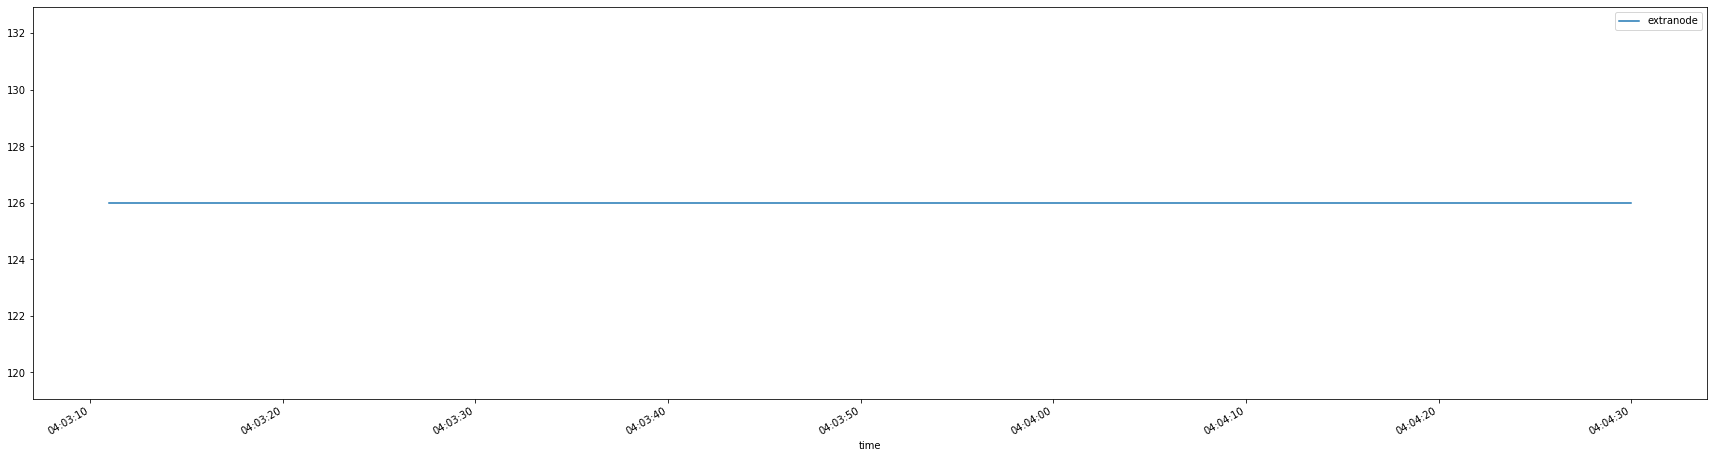

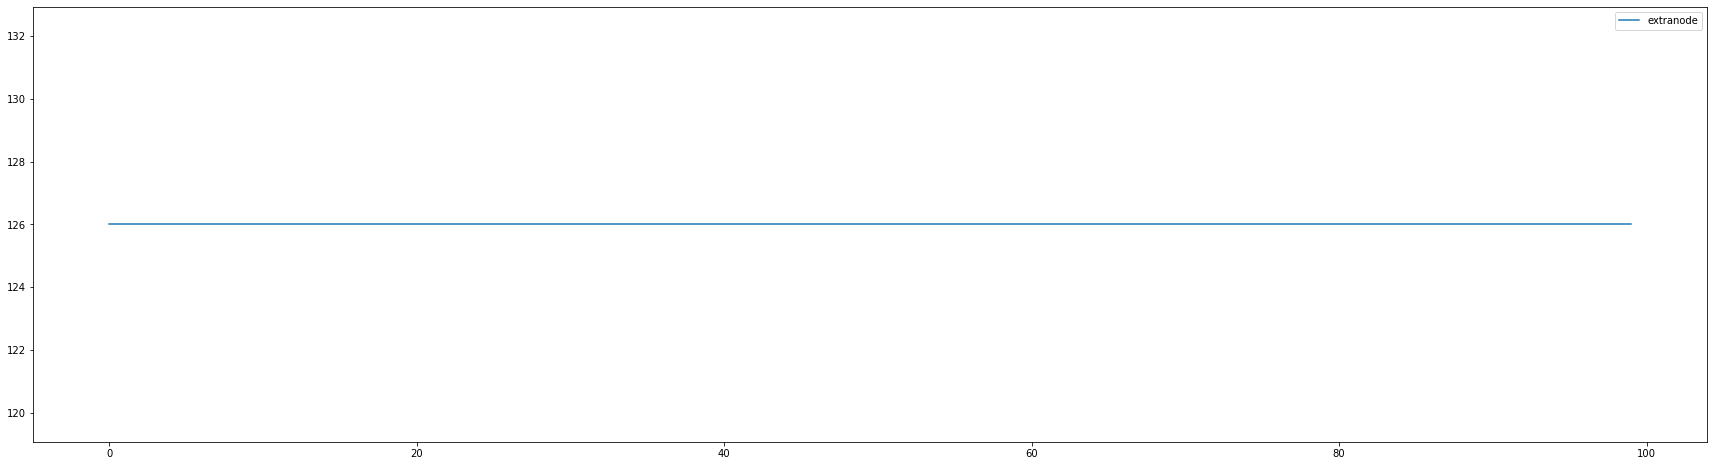

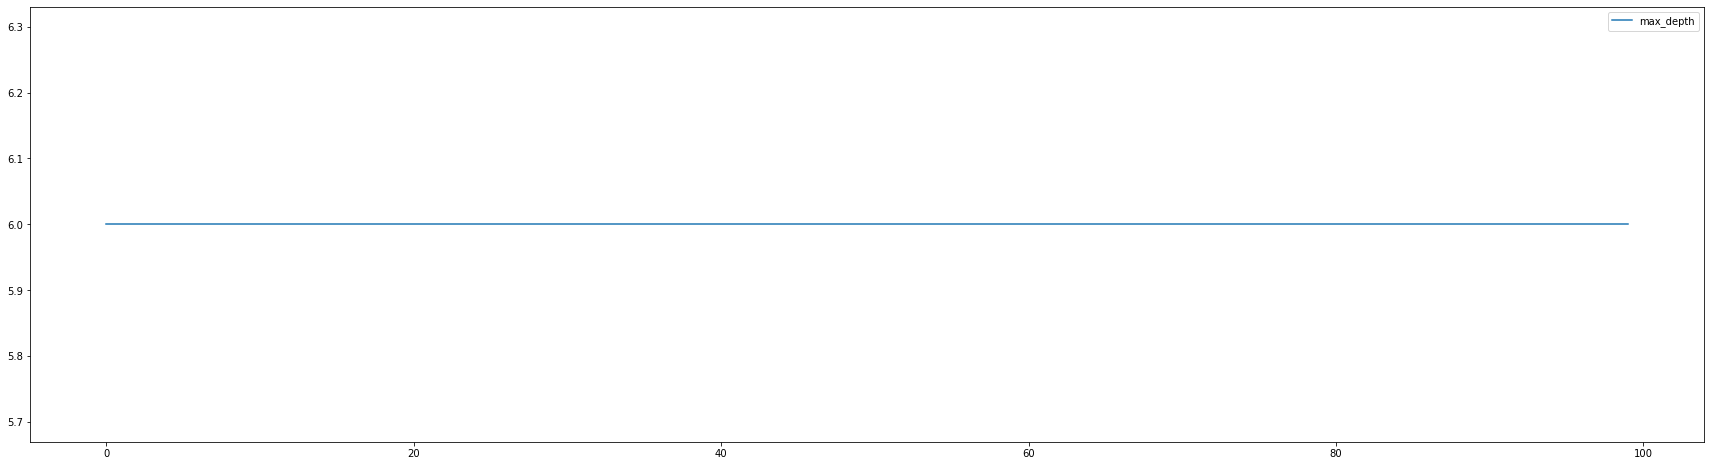

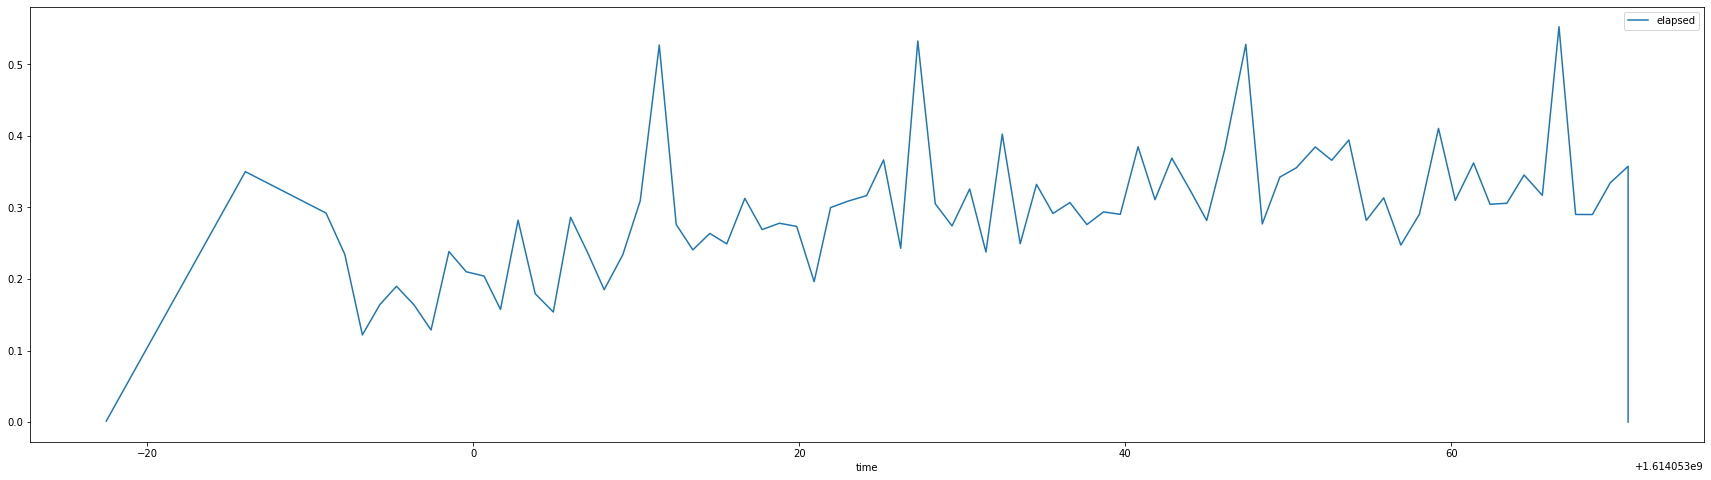

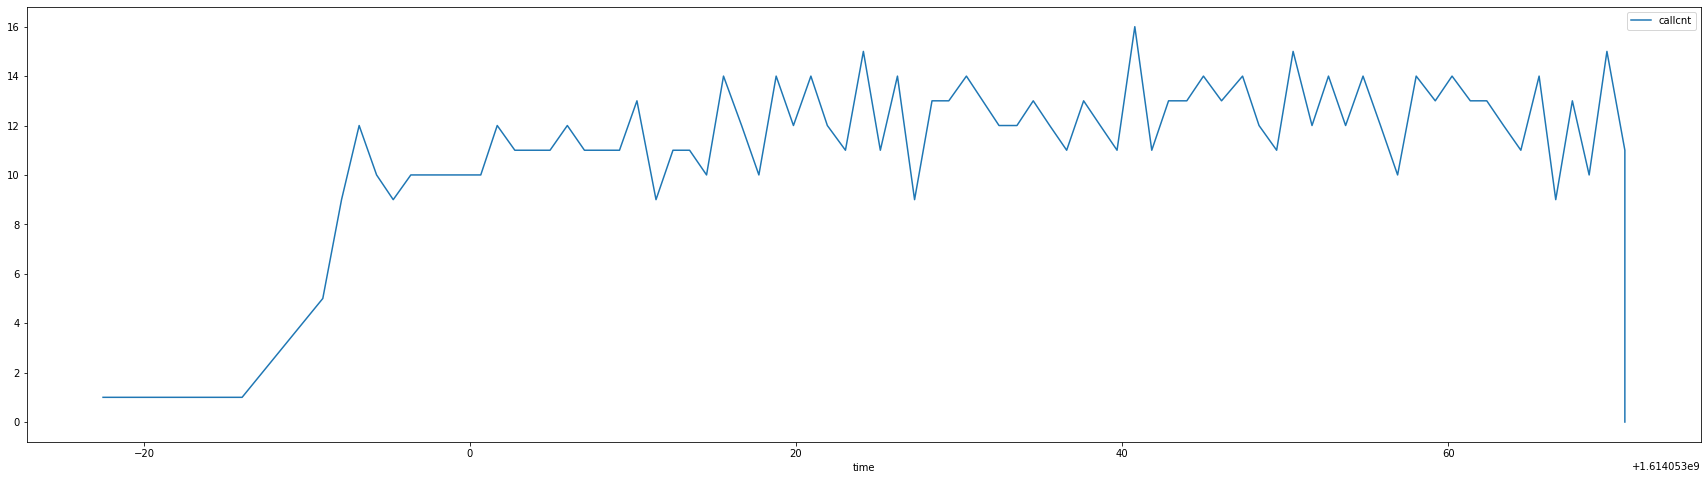

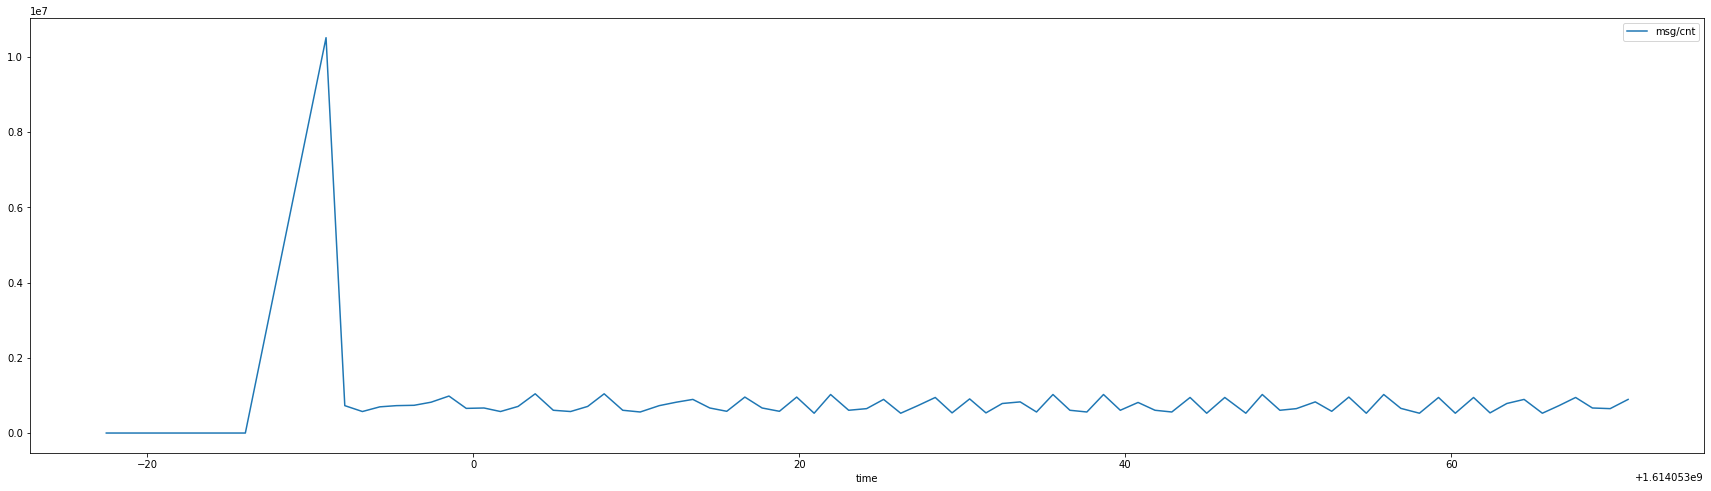

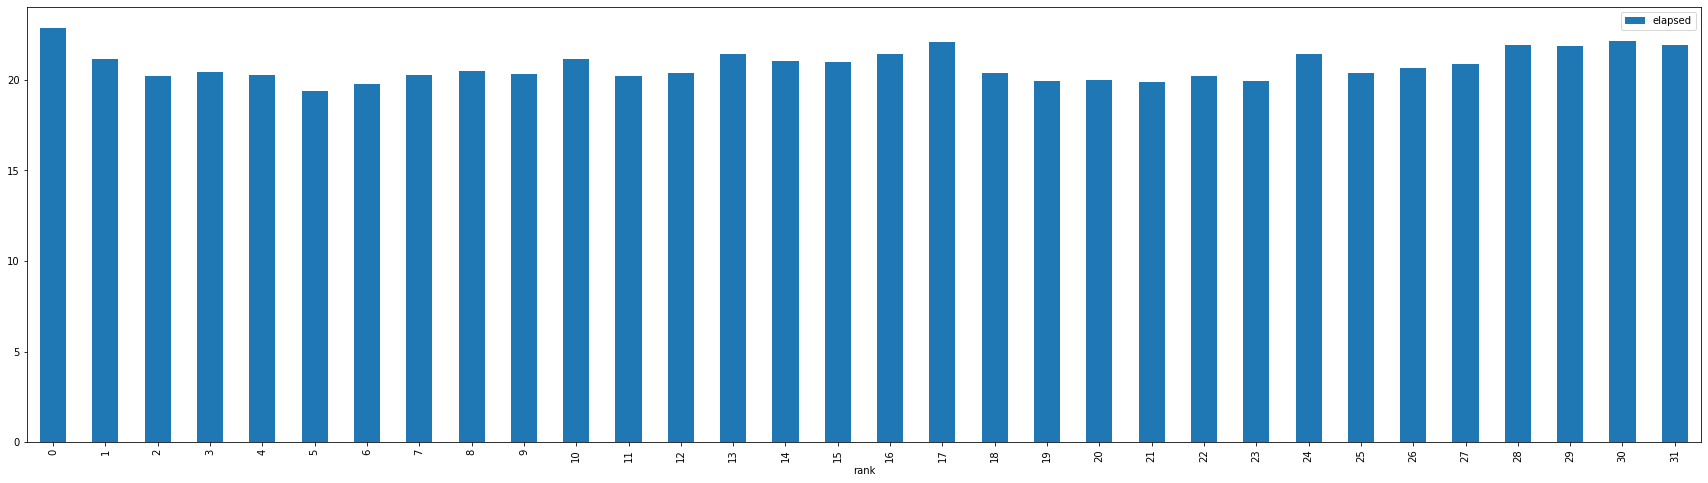

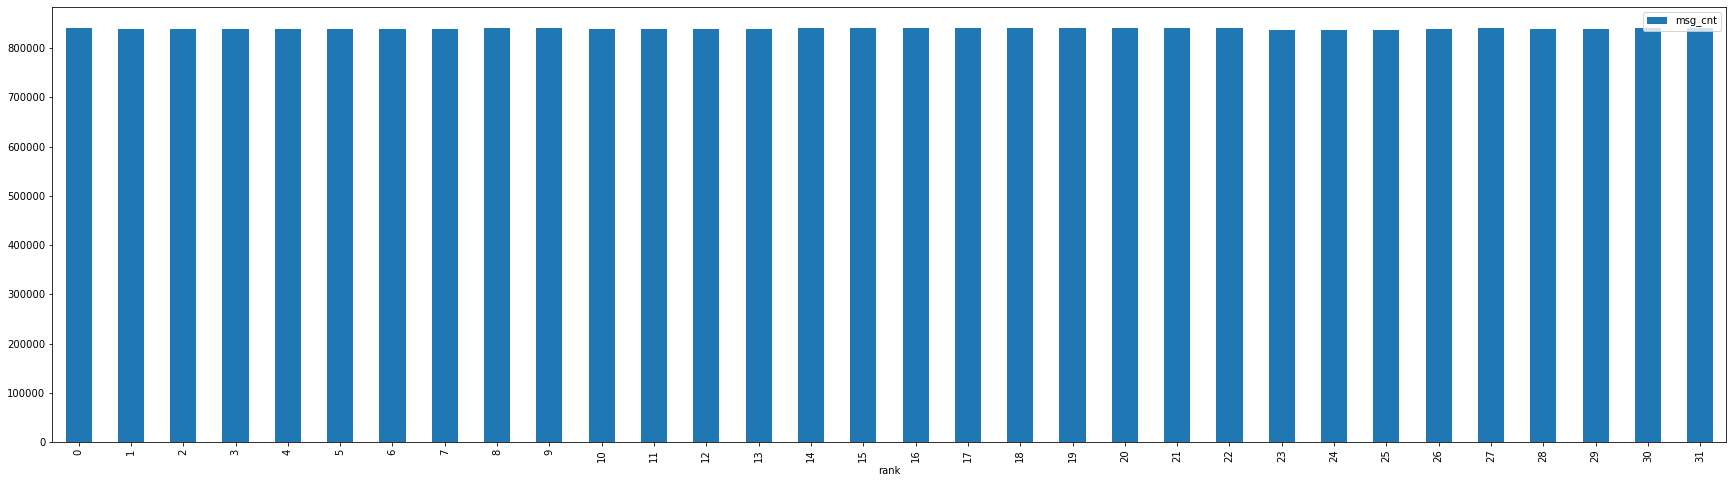

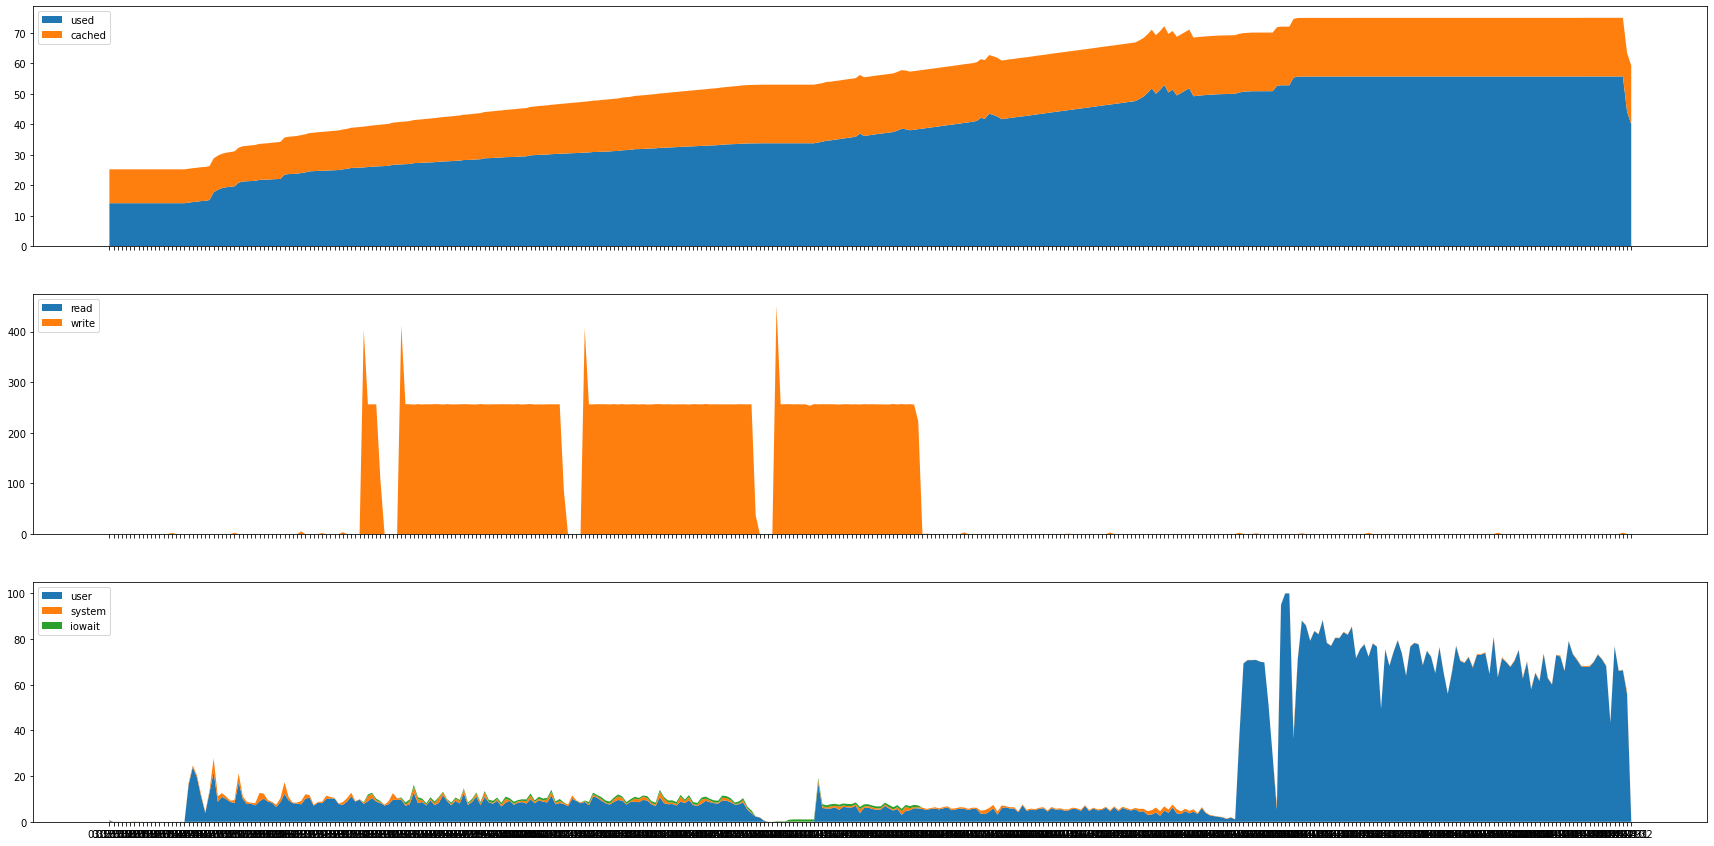

In [44]:
nodes=len(clients)
executors_per_node=int(2*16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('parquet').load("/HiBench606Mx50.dataframe.float.parquet.8x96")

        #df=df.coalesce(executors_per_node*nodes)
        
        vectorAssembler = VectorAssembler().setInputCols([l for l in df.columns if l!="label"]).setOutputCol("features")
        df=vectorAssembler.transform(df)

        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

# Hibench 900M

In [83]:
!hadoop fs -put /mnt/2/sparkuser/HiBench900Mx50.dataframe.float.parquet.8x96 /

## 4x24

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   14179	14180	14059	14431
172.31.63.214 : 4   13750	13751	13947	14108
172.31.50.230 : 4   16296	16297	16493	16654
172.31.48.87 : 4   13971	13972	14329	14173
172.31.56.136 : 4   14544	14657	14819	14959
172.31.59.90 : 4   17217	17378	17020	17021
172.31.62.187 : 4   16625	16375	16376	16254
172.31.52.207 : 4   14387	14388	14269	14639
Start time : 29489.816975604


/home/sparkuser
21/02/23 06:46:21 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0003/jobs
http://sr525:28080/history/application_1614062157897_0003/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0003.json
application_1614062157897_0003


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


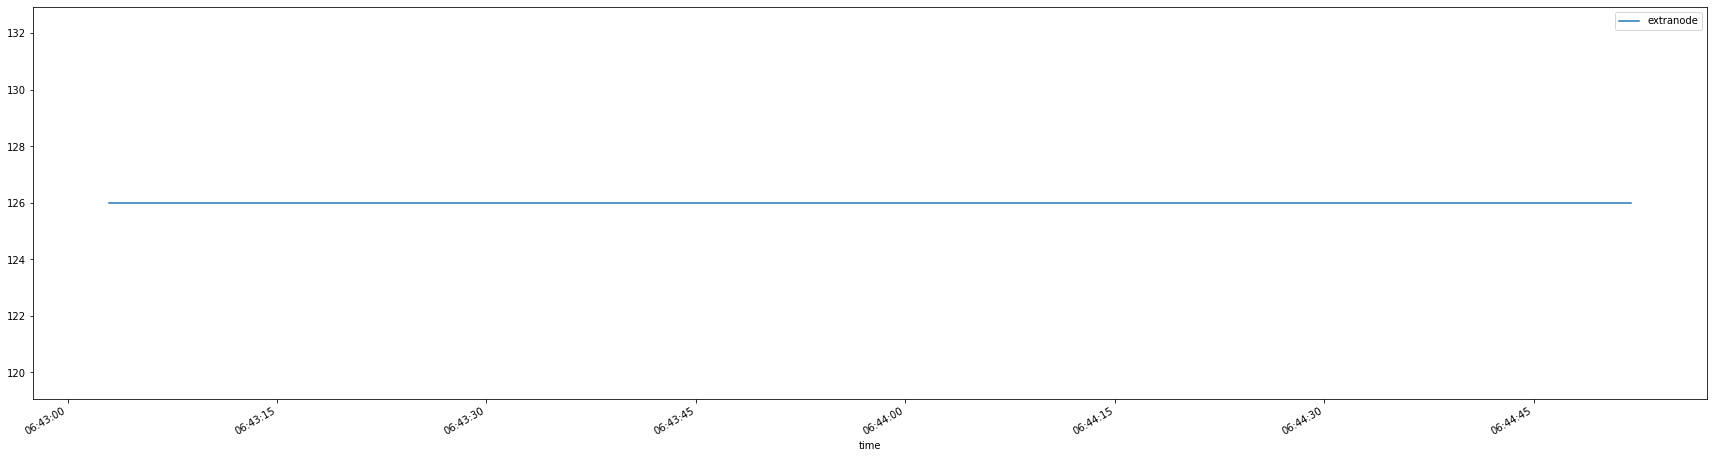

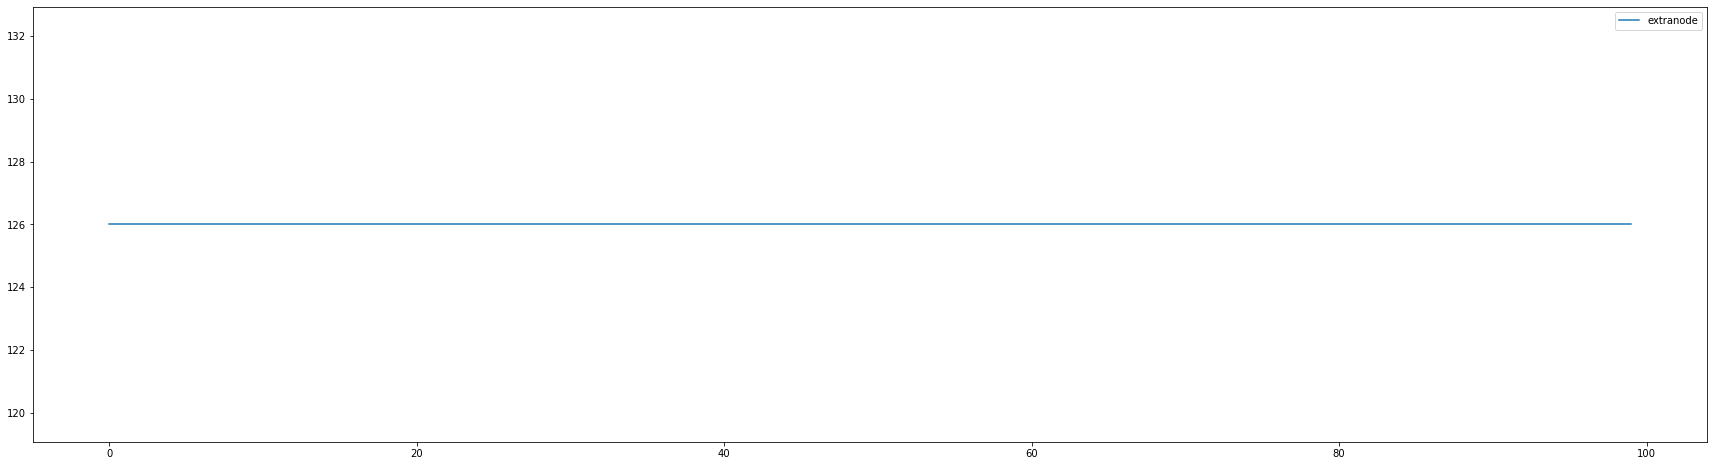

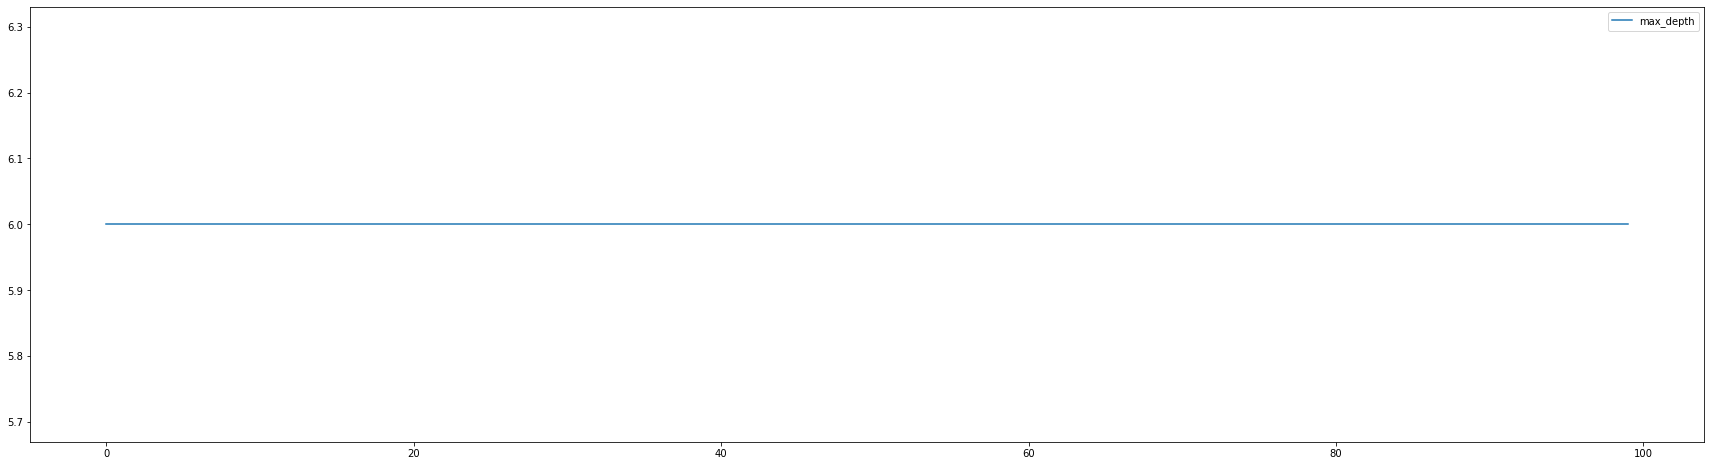

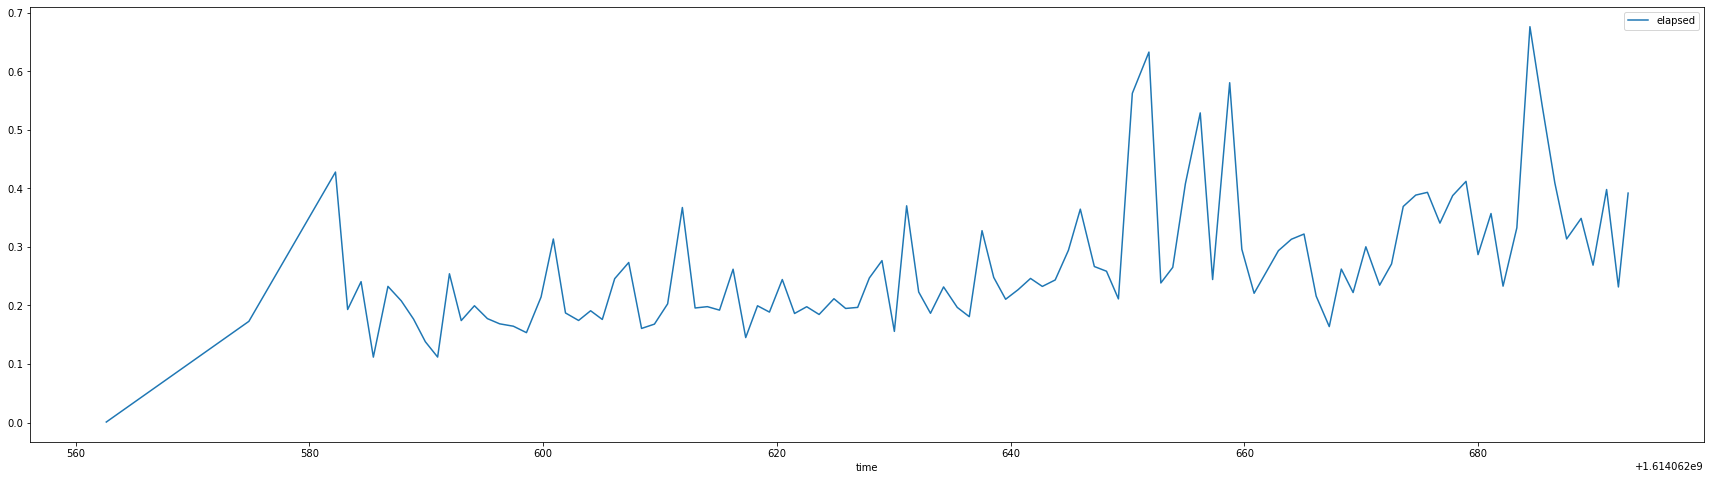

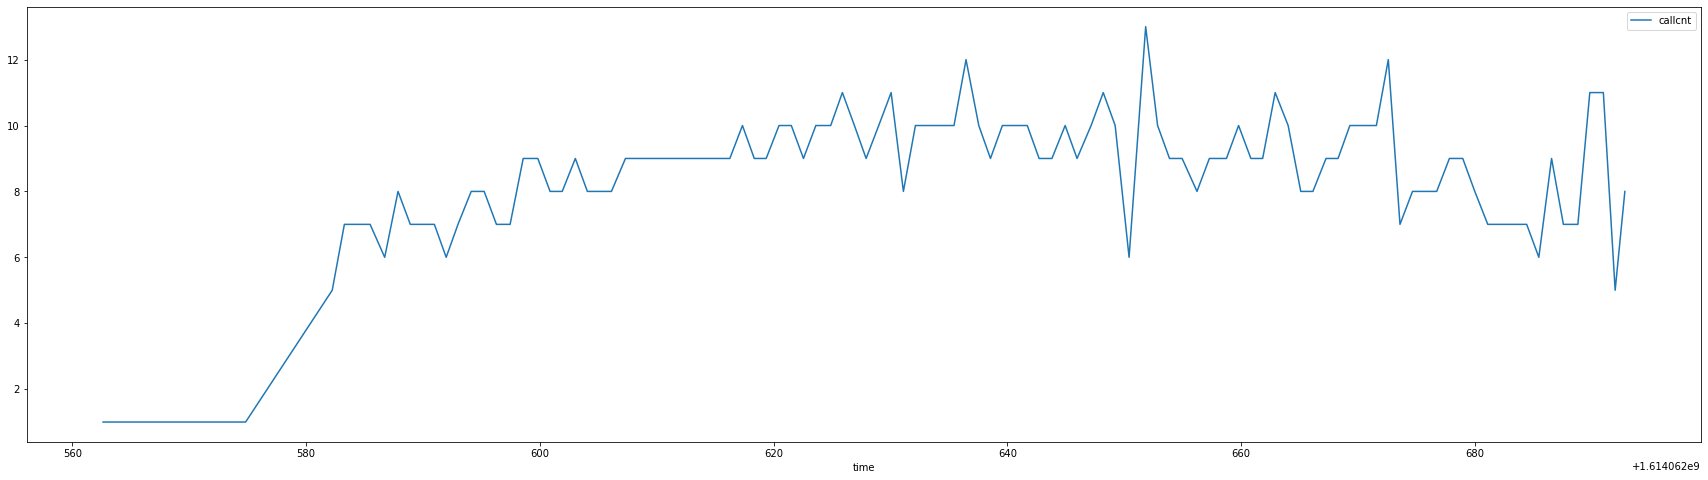

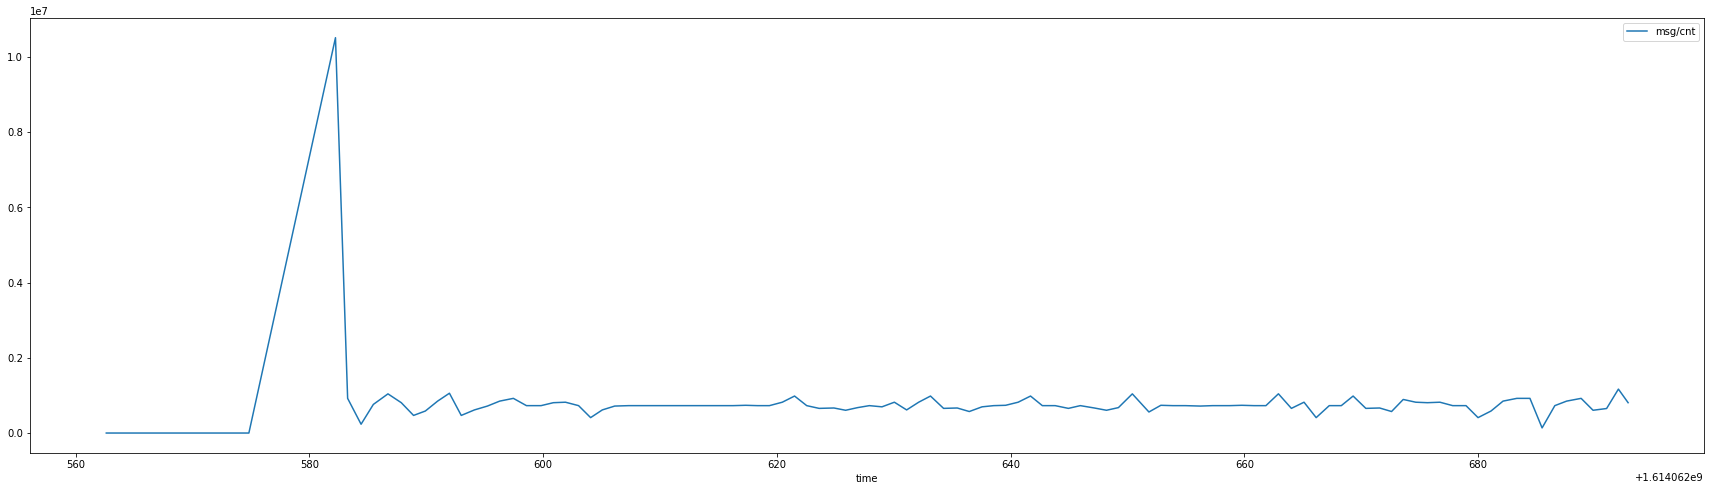

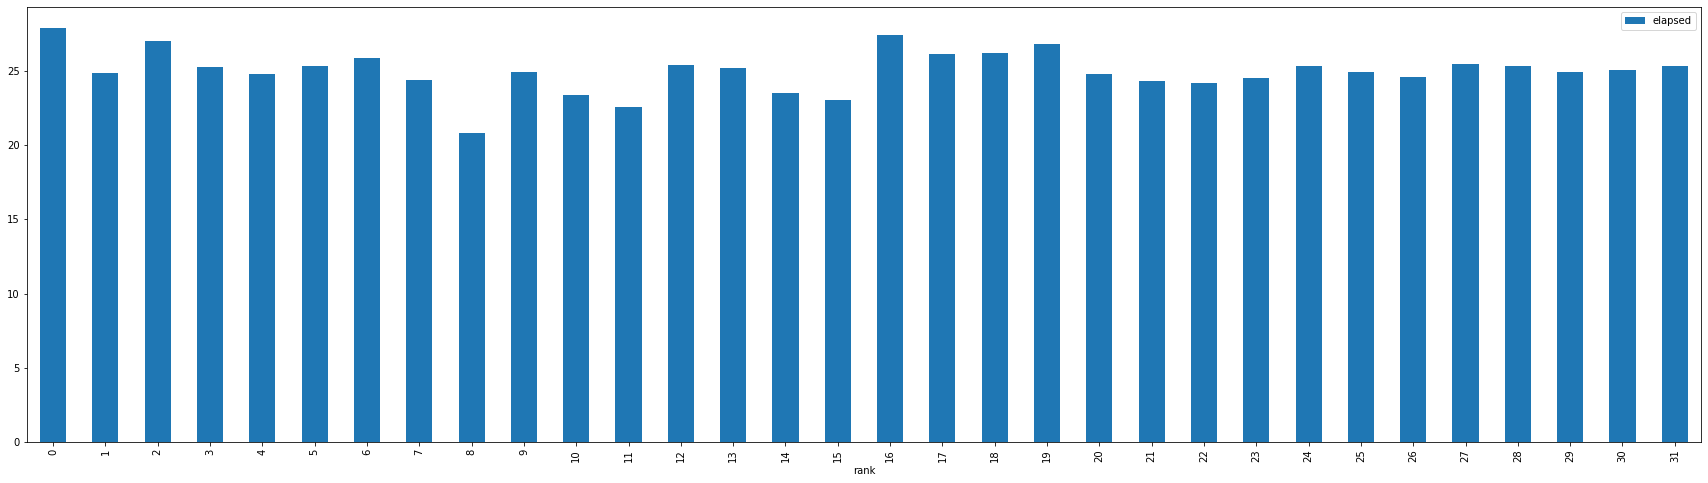

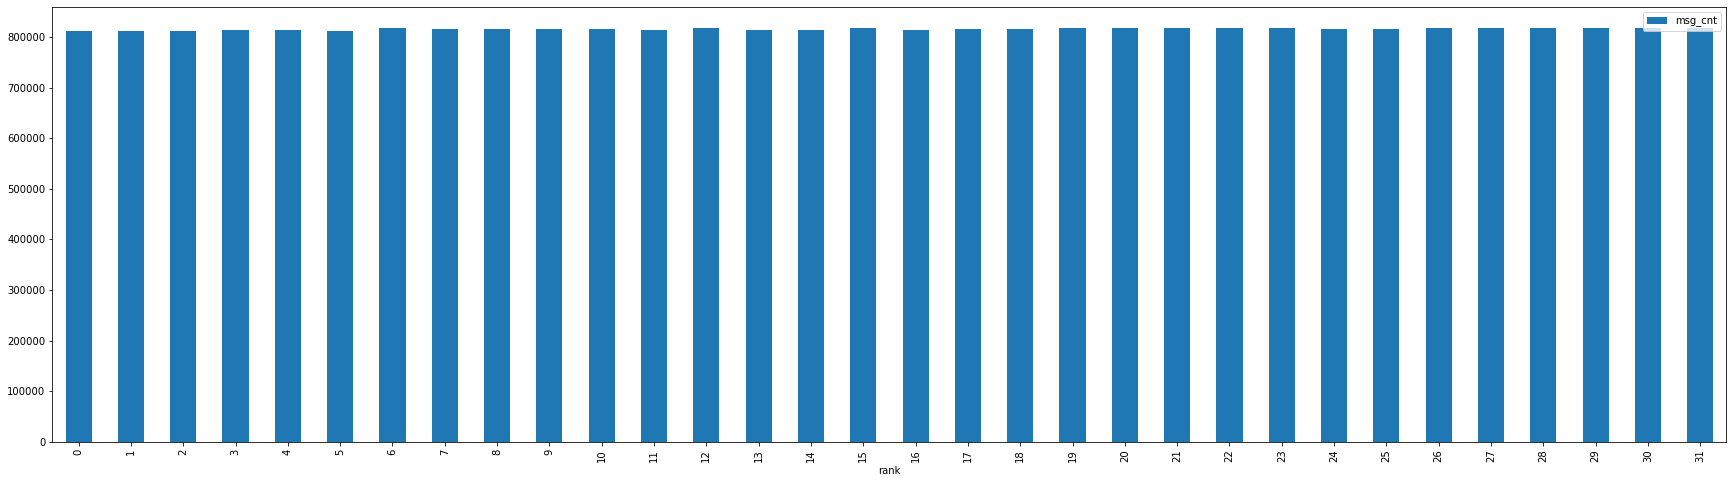

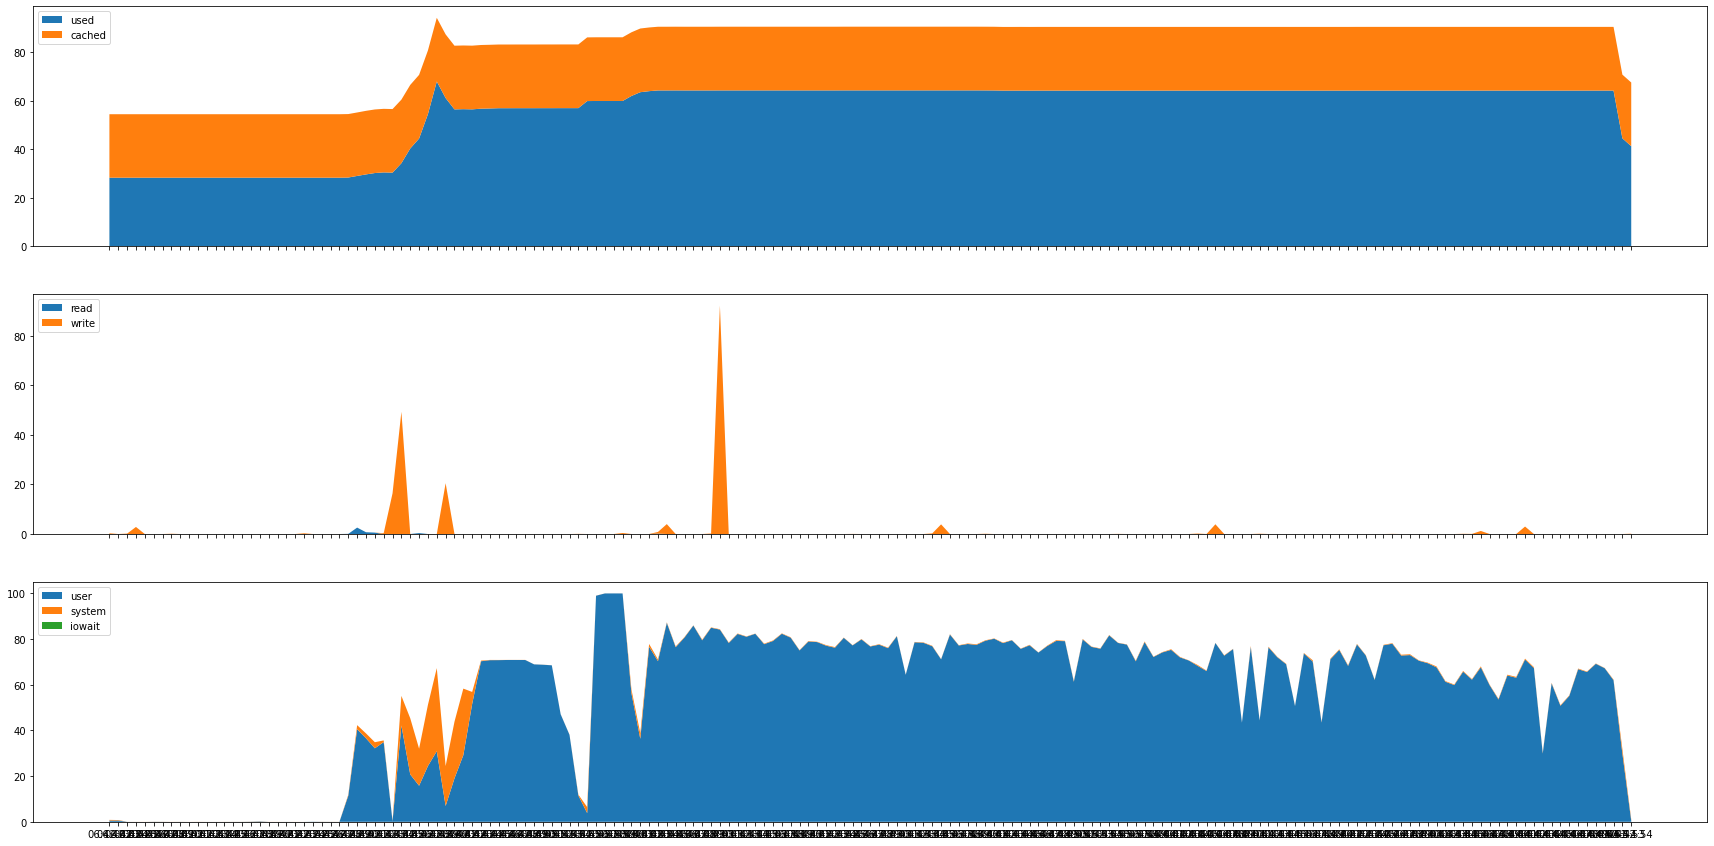

In [40]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench900Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   24928	24673	24674	24558
172.31.63.214 : 4   26609	26979	26795	26717
172.31.50.230 : 4   26818	27074	26834	26700
172.31.48.87 : 4   24945	24696	24697	24575
172.31.56.136 : 4   25456	25339	25451	25709
172.31.59.90 : 4   28100	28342	27913	28094
172.31.62.187 : 4   26707	26598	26968	26715
172.31.52.207 : 4   28304	28299	28187	28557
Start time : 30373.209482991


/home/sparkuser
21/02/23 07:00:57 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0005/jobs
http://sr525:28080/history/application_1614062157897_0005/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0005.json
application_1614062157897_0005


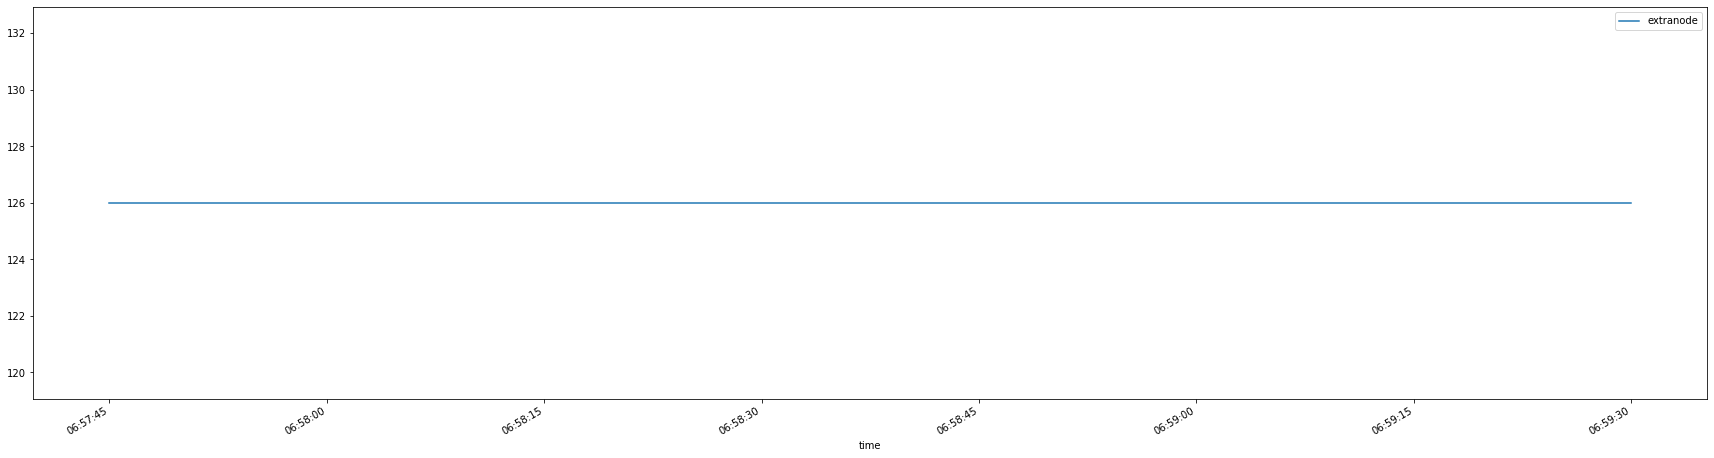

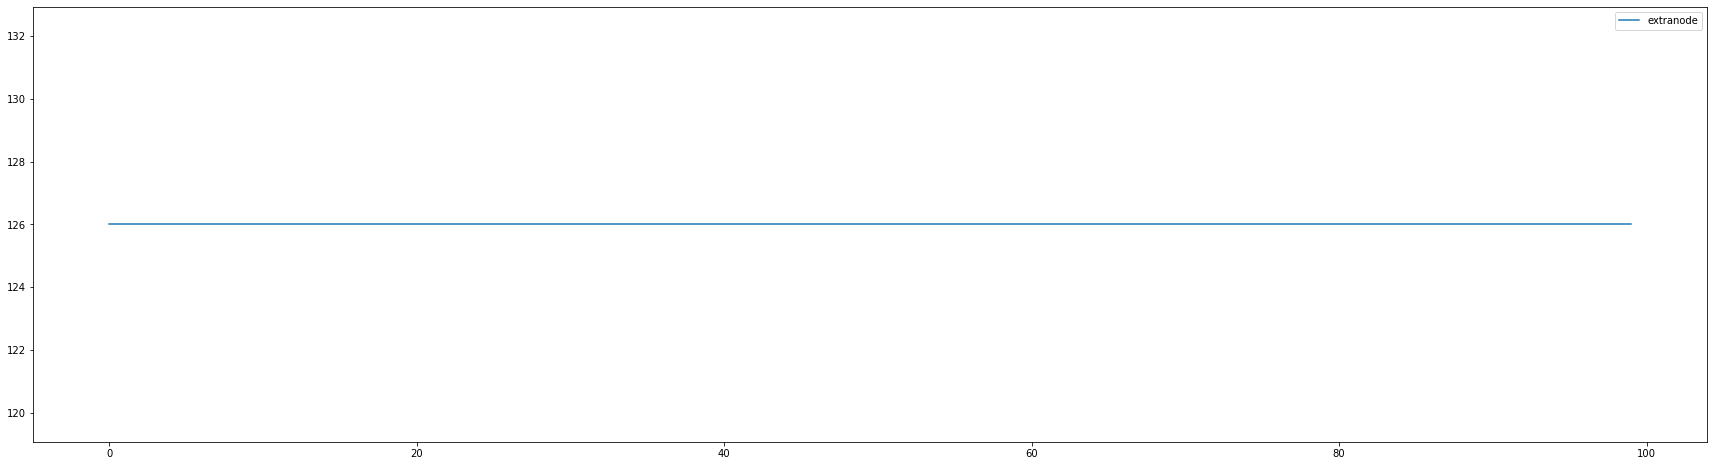

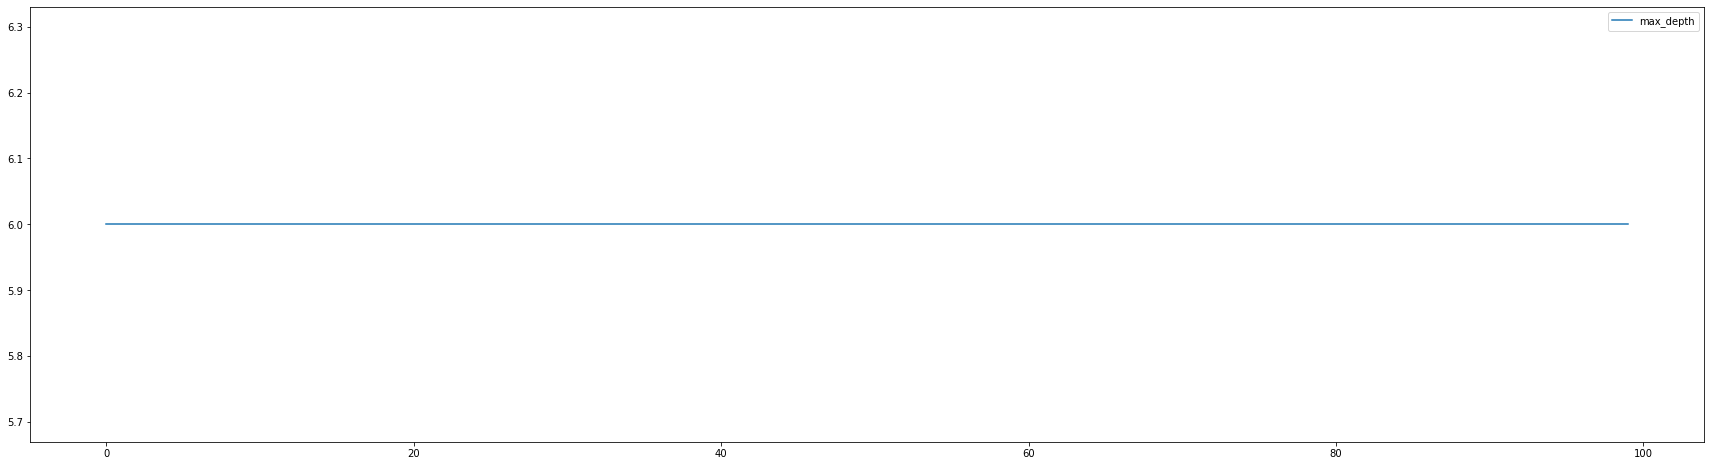

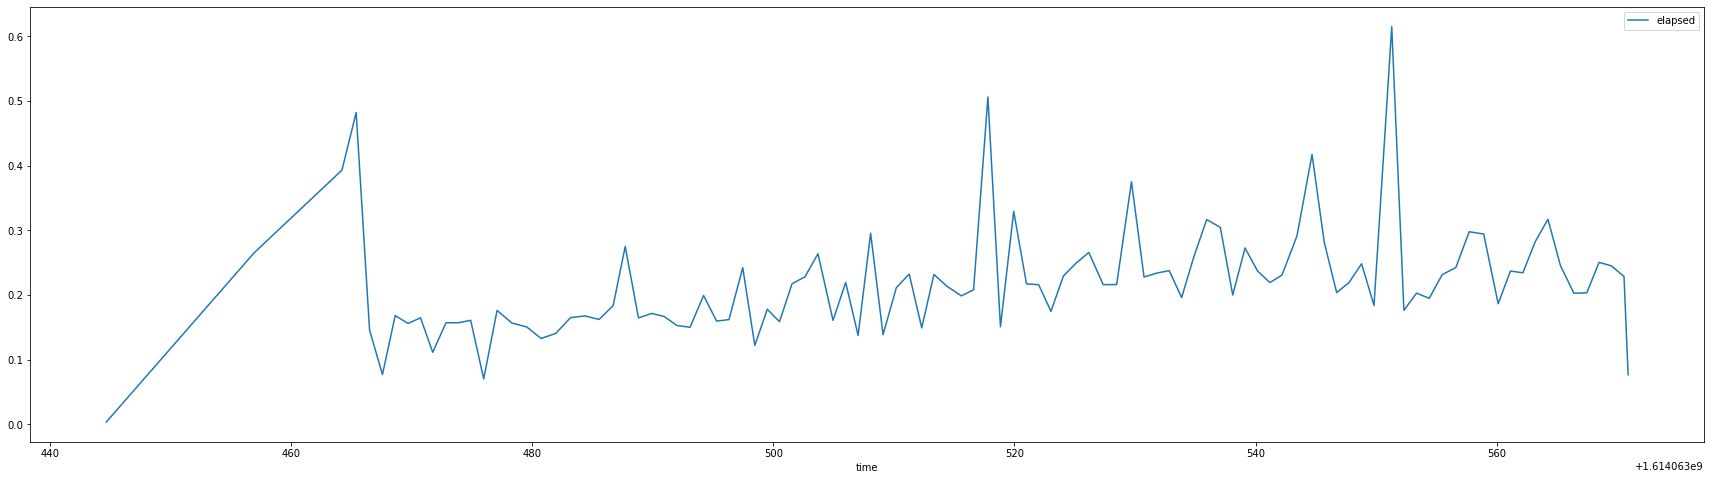

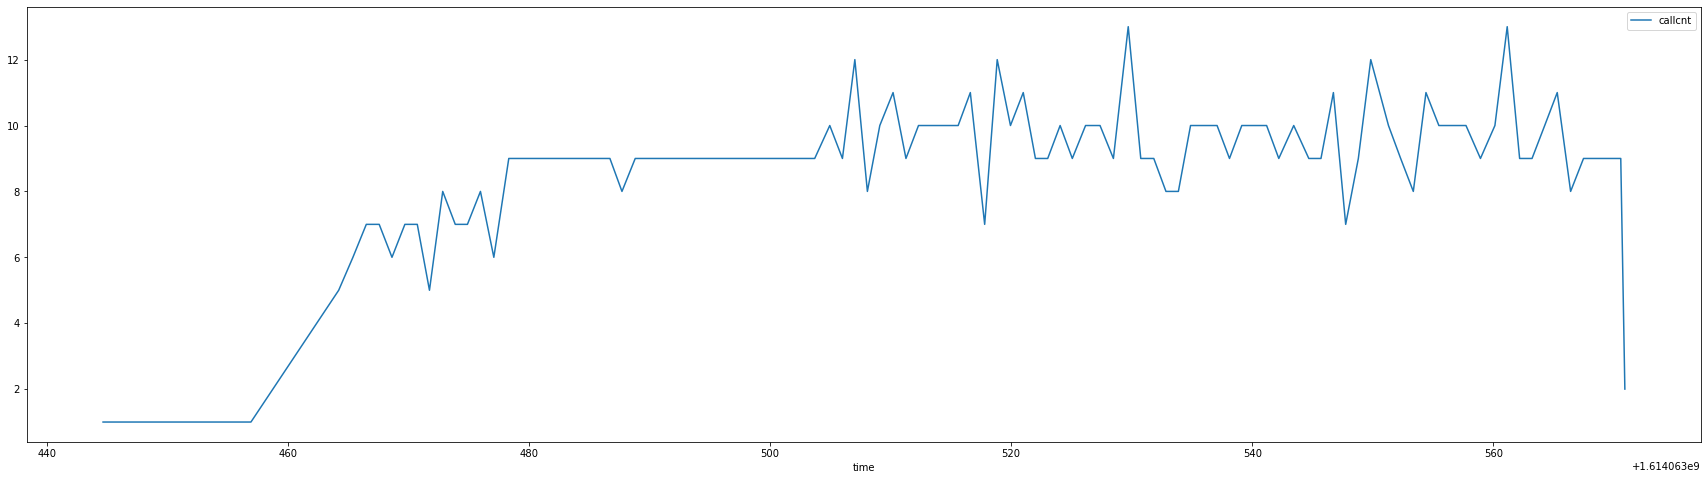

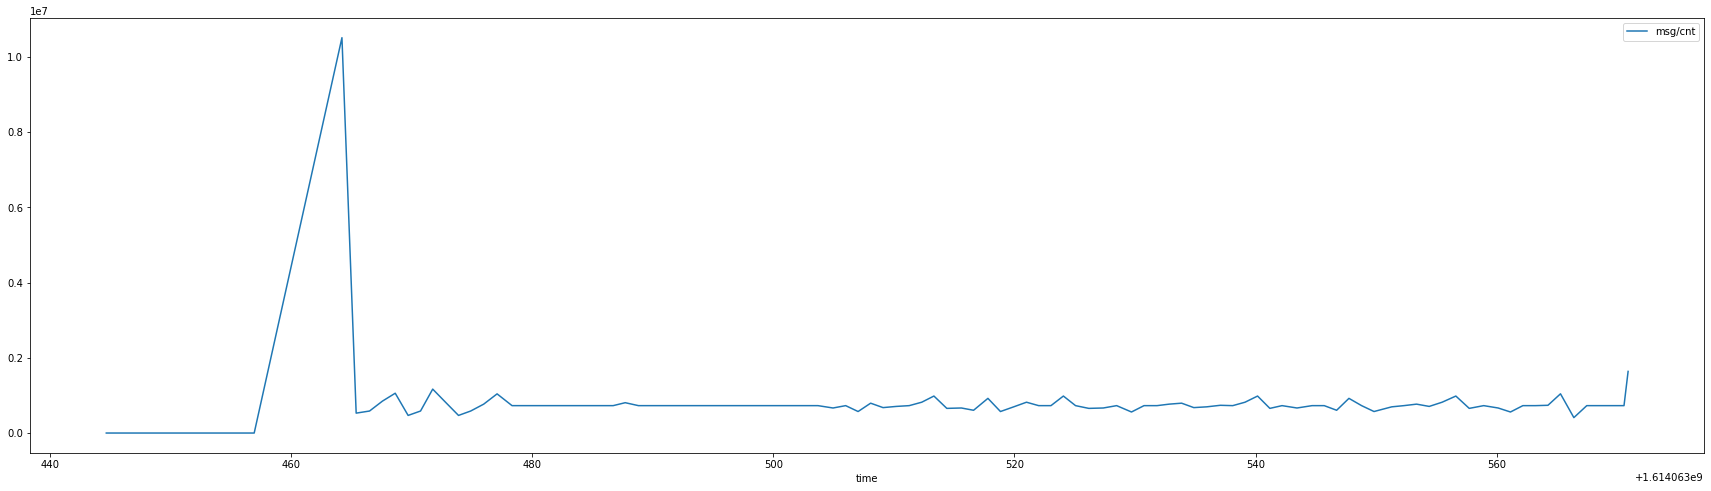

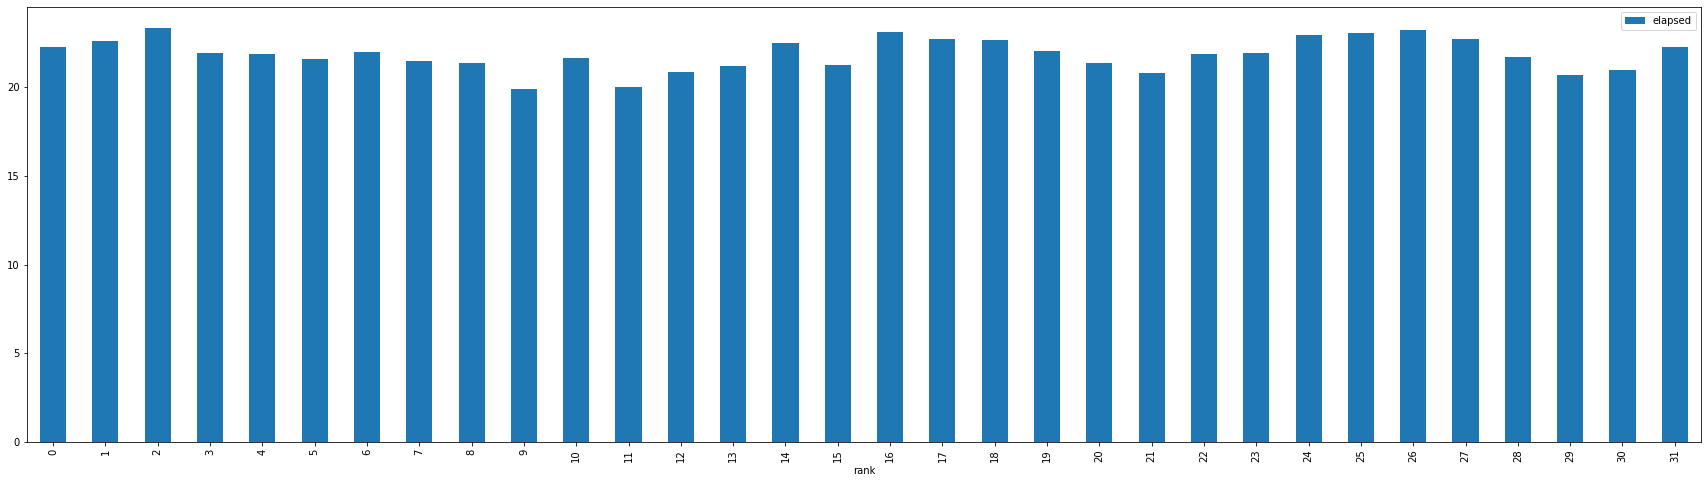

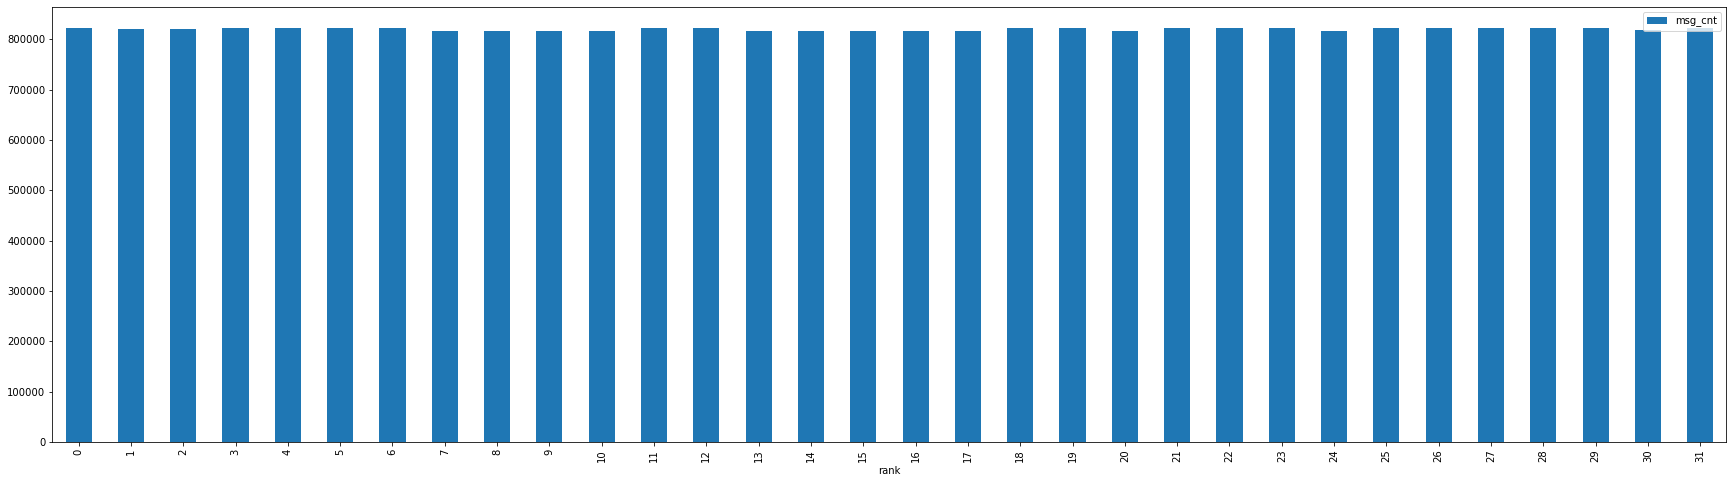

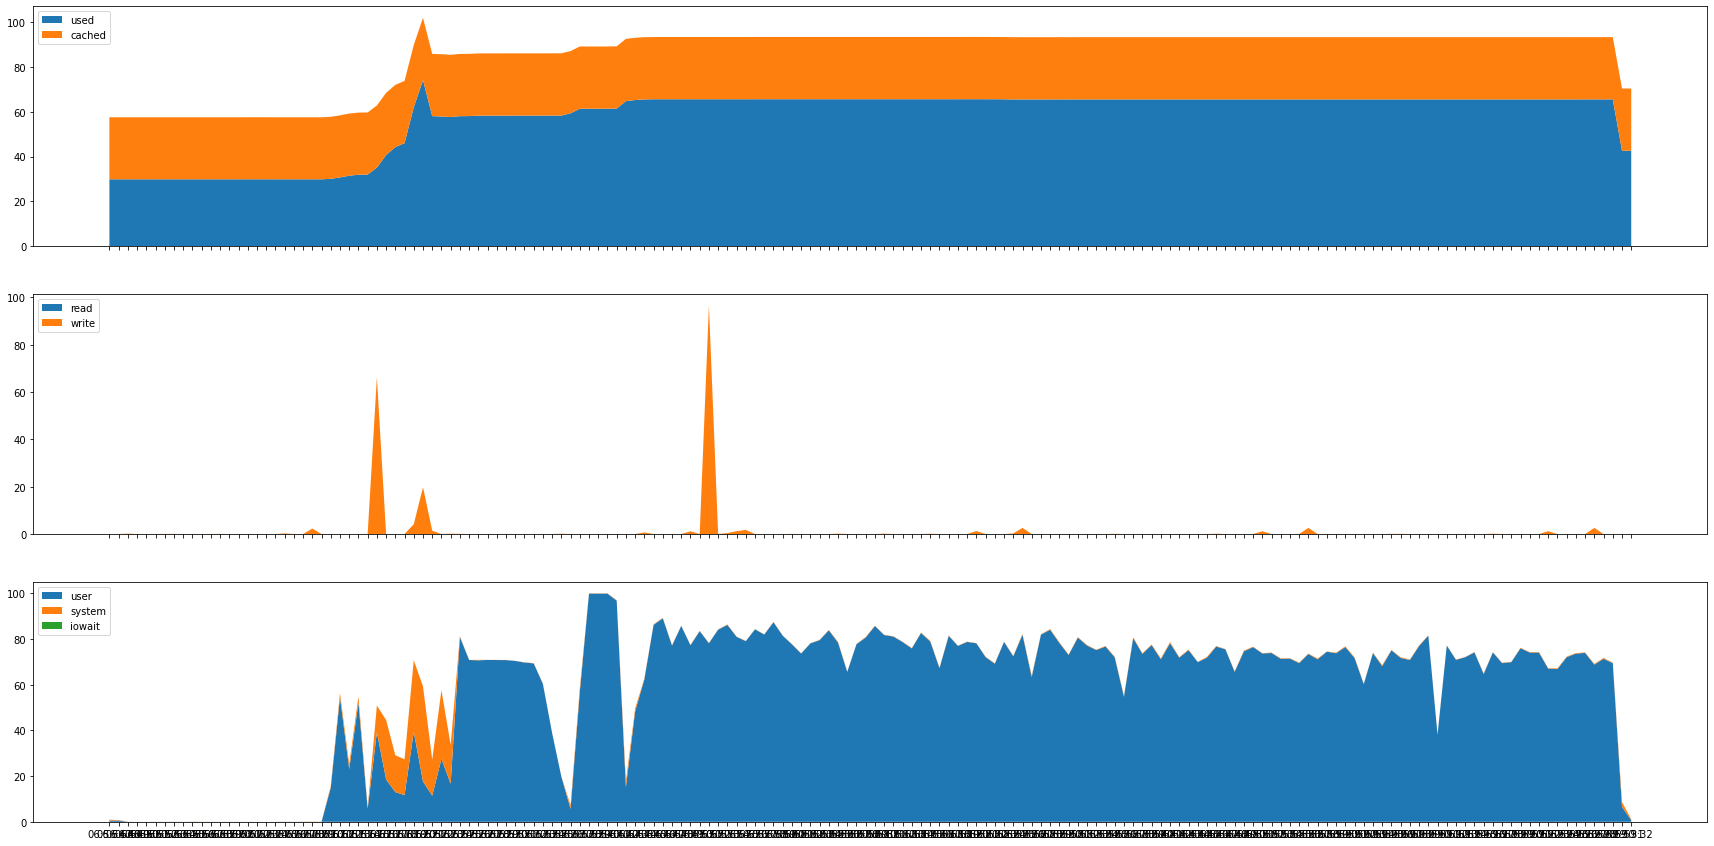

In [42]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench900Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 2x48

executor per node: 2
parallelism: 768
memory: 12176m
offheap:76800m
172.31.57.117 : 2   19478	19580
172.31.63.214 : 2   21460	21355
172.31.50.230 : 2   21744	21633
172.31.48.87 : 2   19586	19436
172.31.56.136 : 2   19904	20006
172.31.59.90 : 2   22357	22462
172.31.62.187 : 2   21557	21659
172.31.52.207 : 2   22850	22748
19478 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
19580 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
21460 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
21355 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
21744 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,48,49,50,51,52,53,54,55,56,57,

/home/sparkuser
21/02/23 06:54:16 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0004/jobs
http://sr525:28080/history/application_1614062157897_0004/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0004.json
application_1614062157897_0004


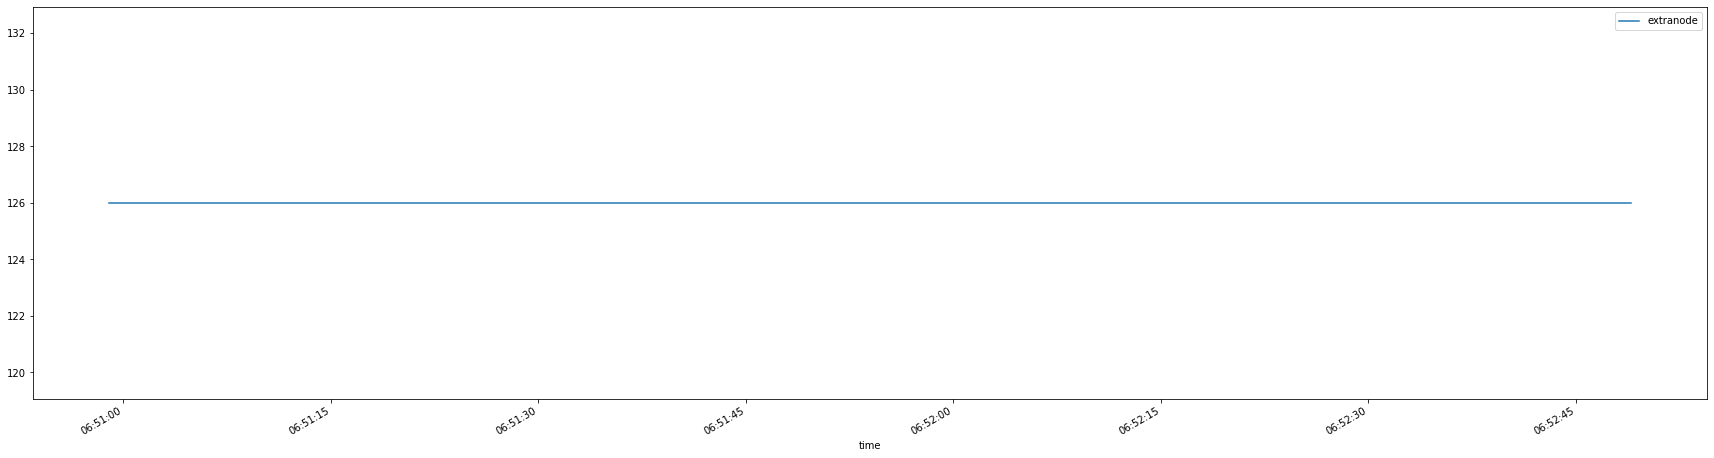

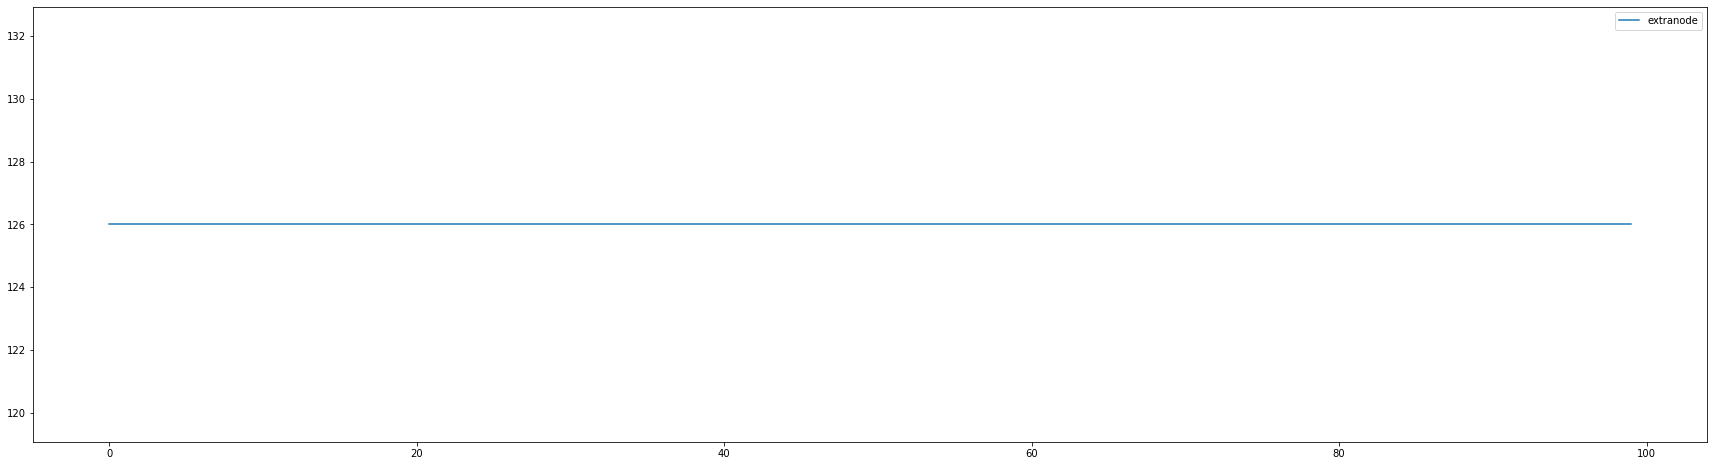

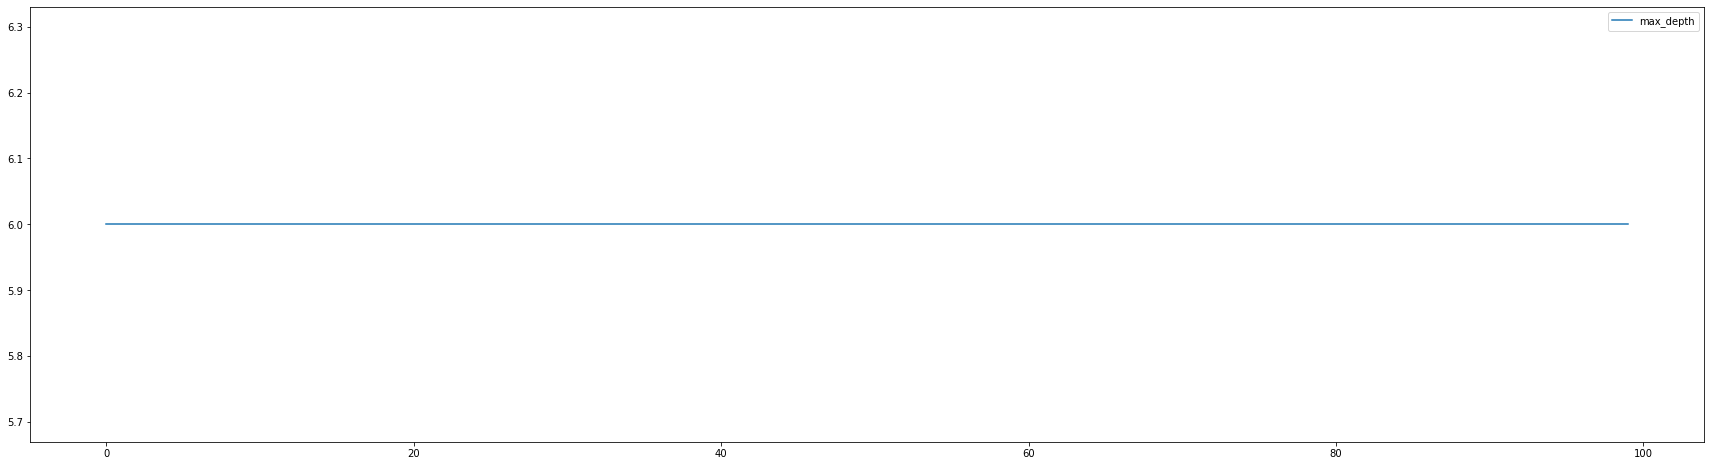

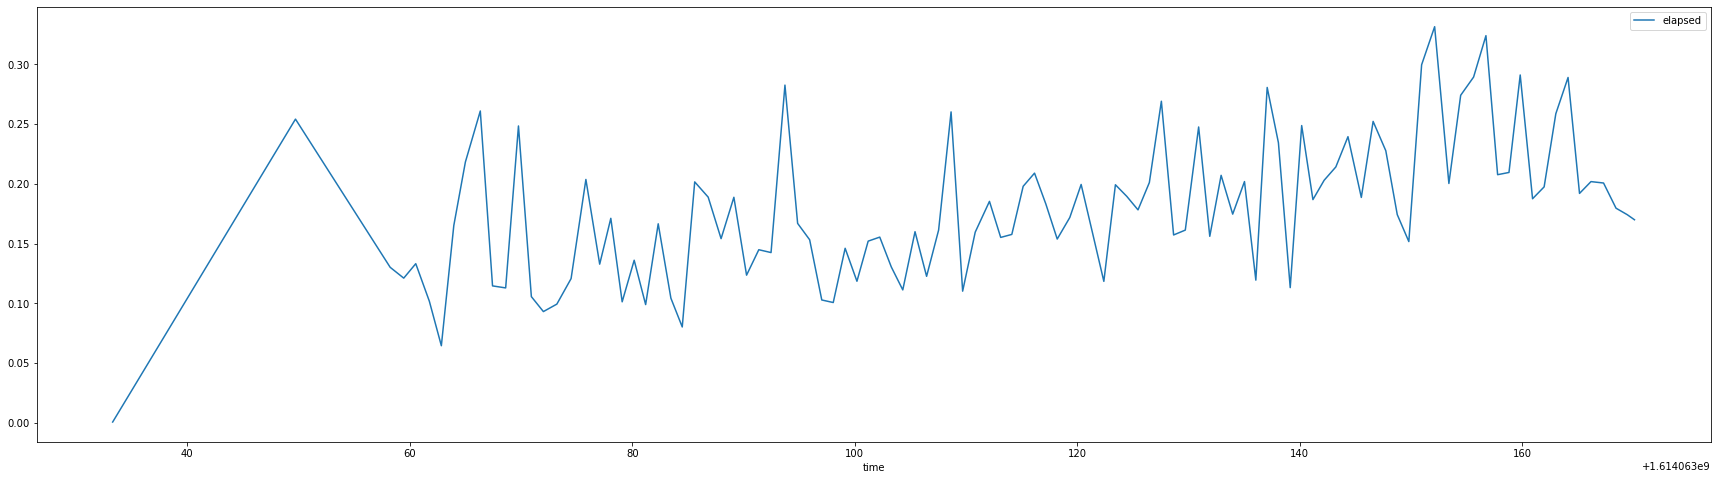

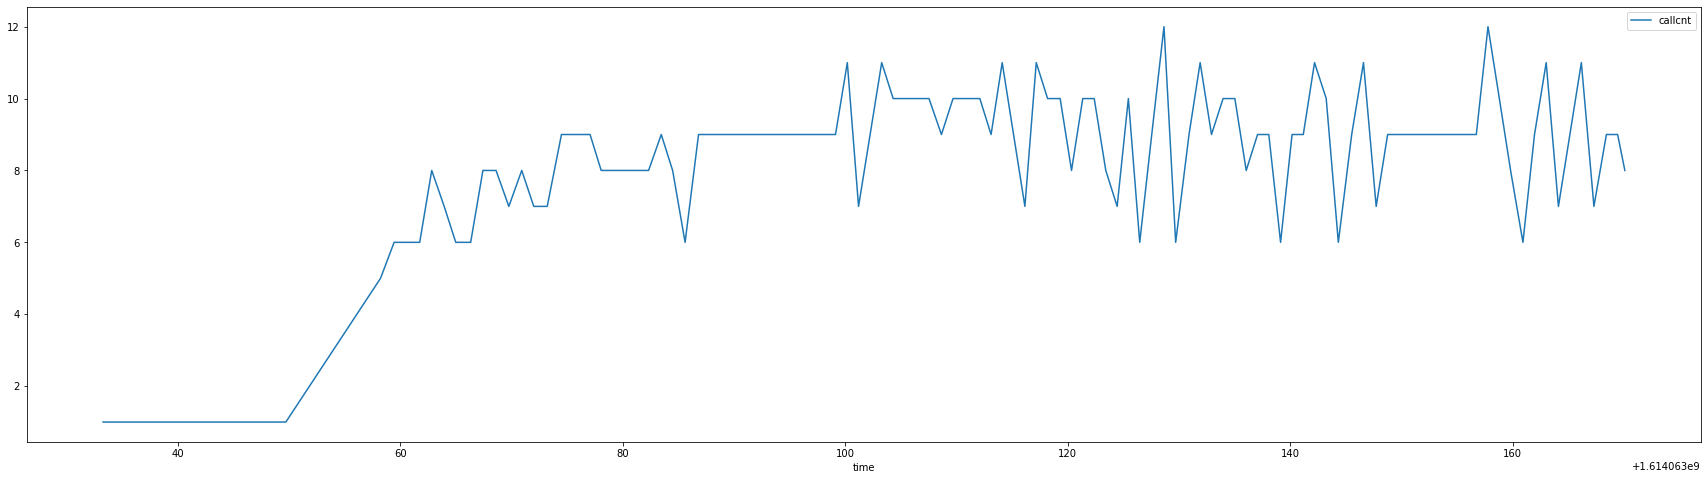

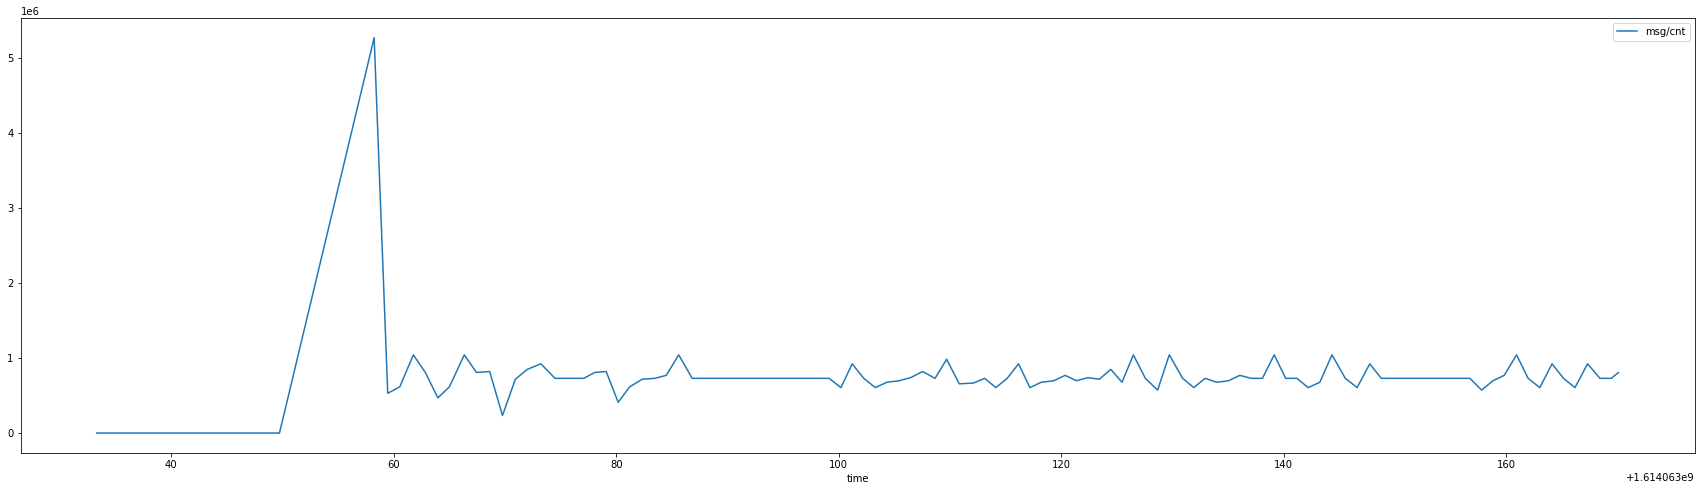

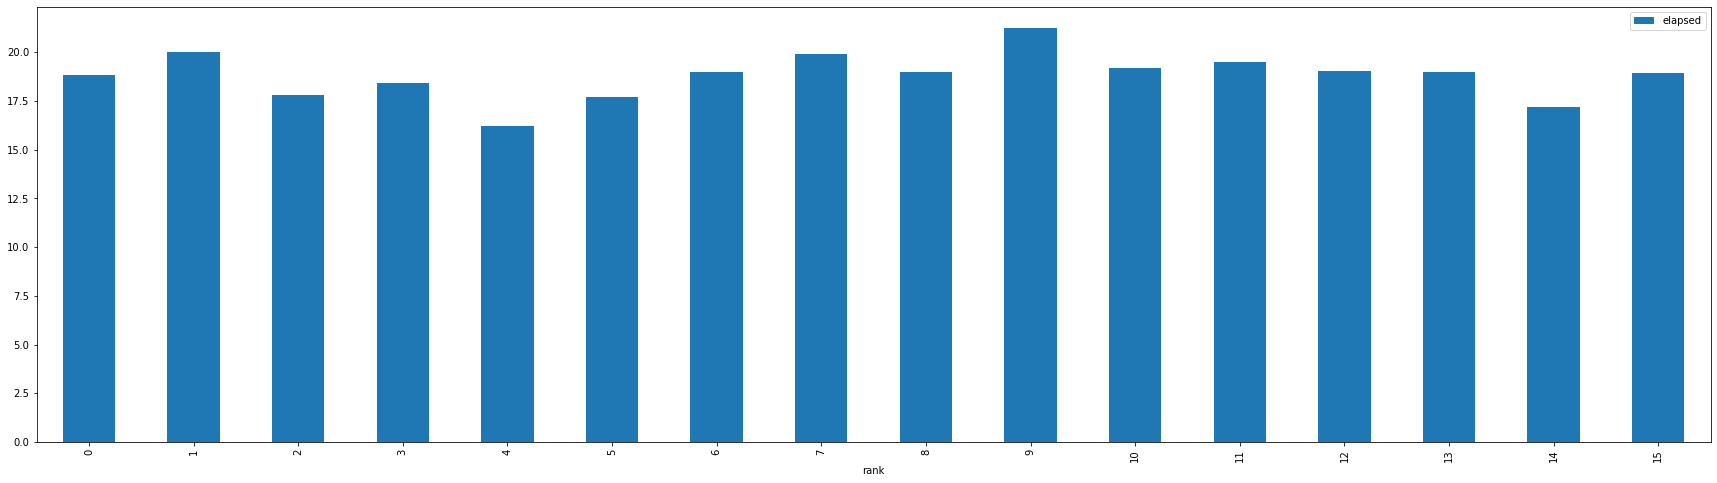

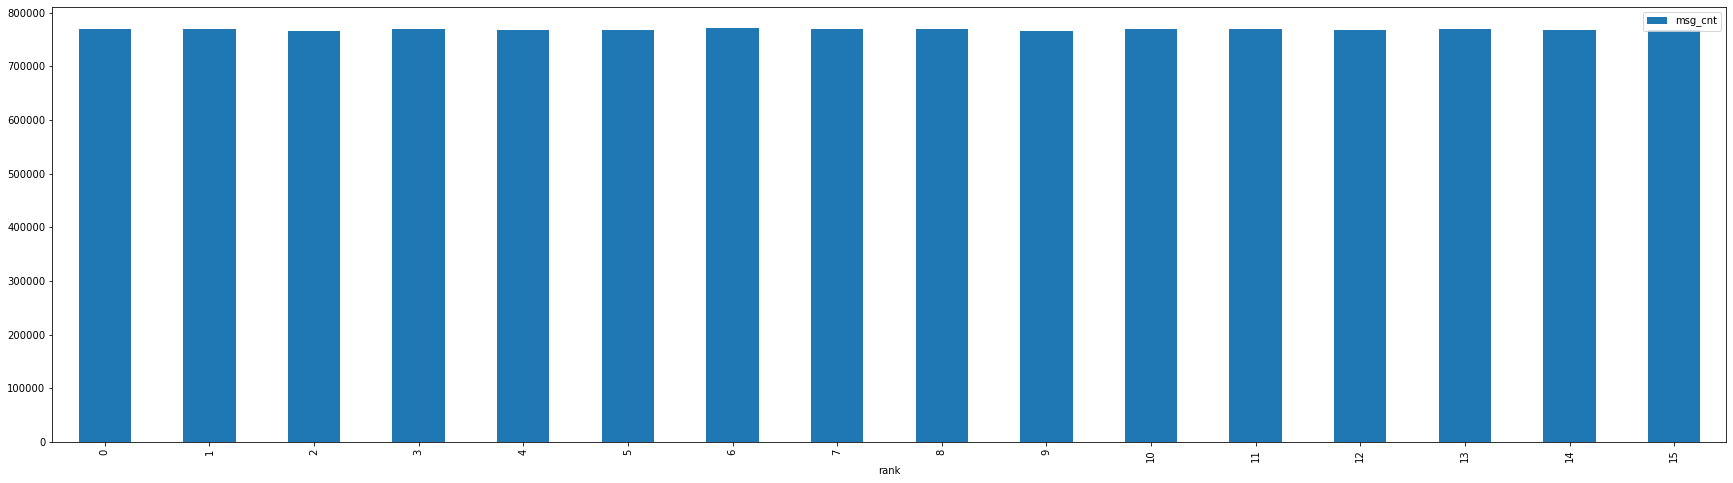

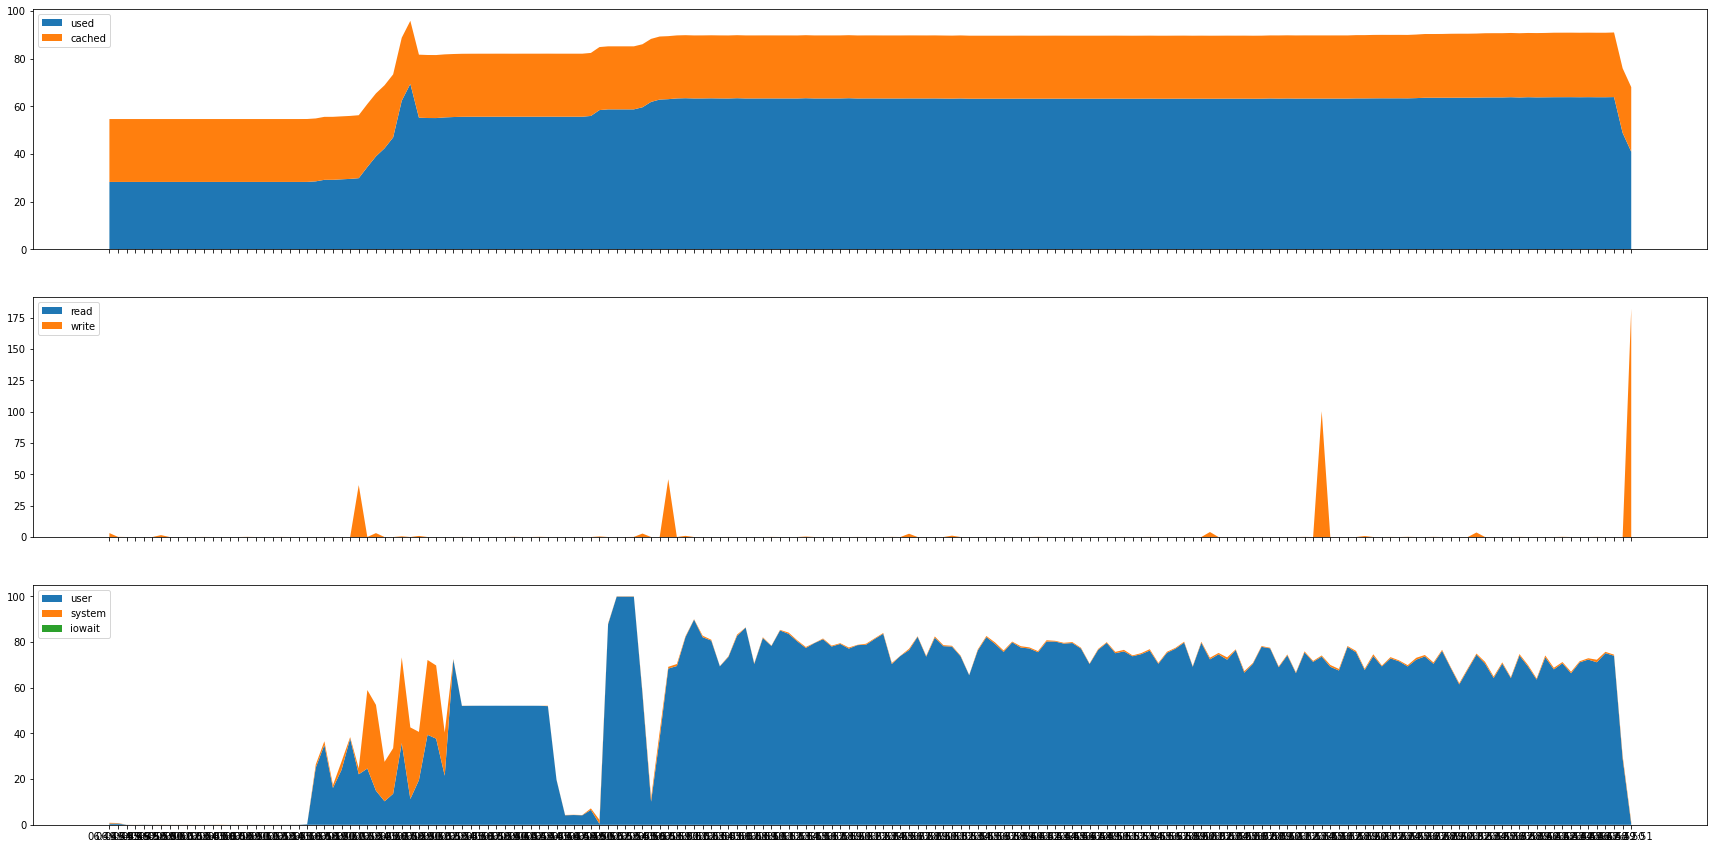

In [41]:
nodes=len(clients)
executors_per_node=1*int(16/nodes)
cores_per_executor=48

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        numabound_smt(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench900Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

# 1200M

## create dataset

In [40]:
jars=!ls -d {home}/jars-for-aws-cpu/1.3/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j_2.12-1.3.3.jar pyspark-shell'

In [41]:
nodes=len(clients)
executors_per_node=12
cores_per_executor=8

cache_size=75*16
total_size=90000*int(16/nodes)


In [47]:
sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")

executor per node: 12
parallelism: 768
memory: 1176m
offheap:12800m
172.31.57.117 : 12   64742	63976	64363	64780	63663	63505	63954	64754	64373	63669	63991	64347
172.31.63.214 : 12   65478	64806	65479	64461	64462	64718	65104	65109	65110	65464	64348	64799
172.31.50.230 : 12   65857	65859	65858	65098	66222	65555	65554	66229	66228	65467	65211	65212
172.31.48.87 : 12   68450	68834	69574	69577	68971	68556	69582	69209	69211	68603	69210	68831
172.31.56.136 : 12   65601	65600	66244	66246	66250	65487	66609	65872	66617	65881	65880	66618
172.31.59.90 : 12   66849	67232	67977	67241	67979	67978	67244	66961	66964	67609	67608	67610
172.31.62.187 : 12   64992	64993	65379	65348	64612	64613	64232	64753	65367	64345	64346	64991
172.31.52.207 : 12   65825	65444	65837	66573	66572	65838	66574	65554	65559	66203	66205	66204


In [48]:
df = spark.read.format('parquet').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
df=df.union(df)
df=df.repartition(96*8)

In [49]:
df.rdd.getNumPartitions()

768

In [50]:
8*96*2

1536

In [51]:
df.write.mode("overwrite").parquet('/HiBench1200Mx50.dataframe.float.parquet.8x96')


In [52]:
sc.stop()

## 4x24

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   67905	67782	68152	67898
172.31.63.214 : 4   68342	68230	68604	68350
172.31.50.230 : 4   69266	69641	69387	69386
172.31.48.87 : 4   72994	73250	72831	73071
172.31.56.136 : 4   69652	70024	69768	69774
172.31.59.90 : 4   70913	71287	71031	71030
172.31.62.187 : 4   68305	68419	68678	68428
172.31.52.207 : 4   69717	69607	69766	69977
Start time : 33839.181827829


/home/sparkuser
21/02/23 08:00:22 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0014/jobs
http://sr525:28080/history/application_1614062157897_0014/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0014.json
application_1614062157897_0014


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


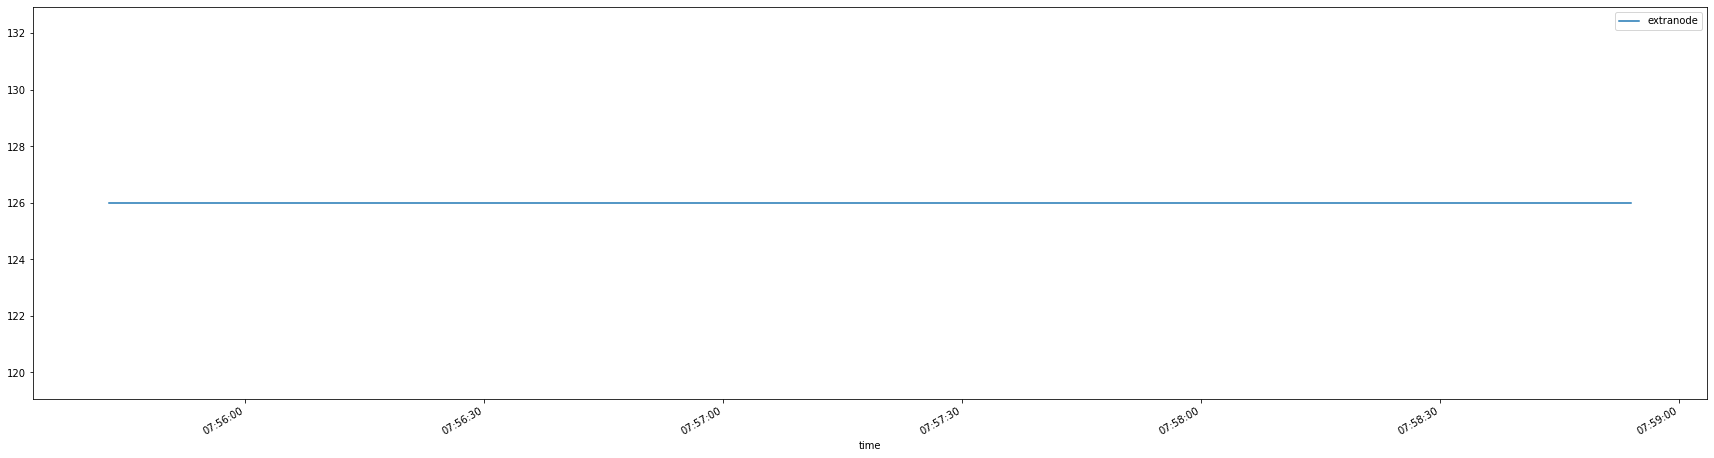

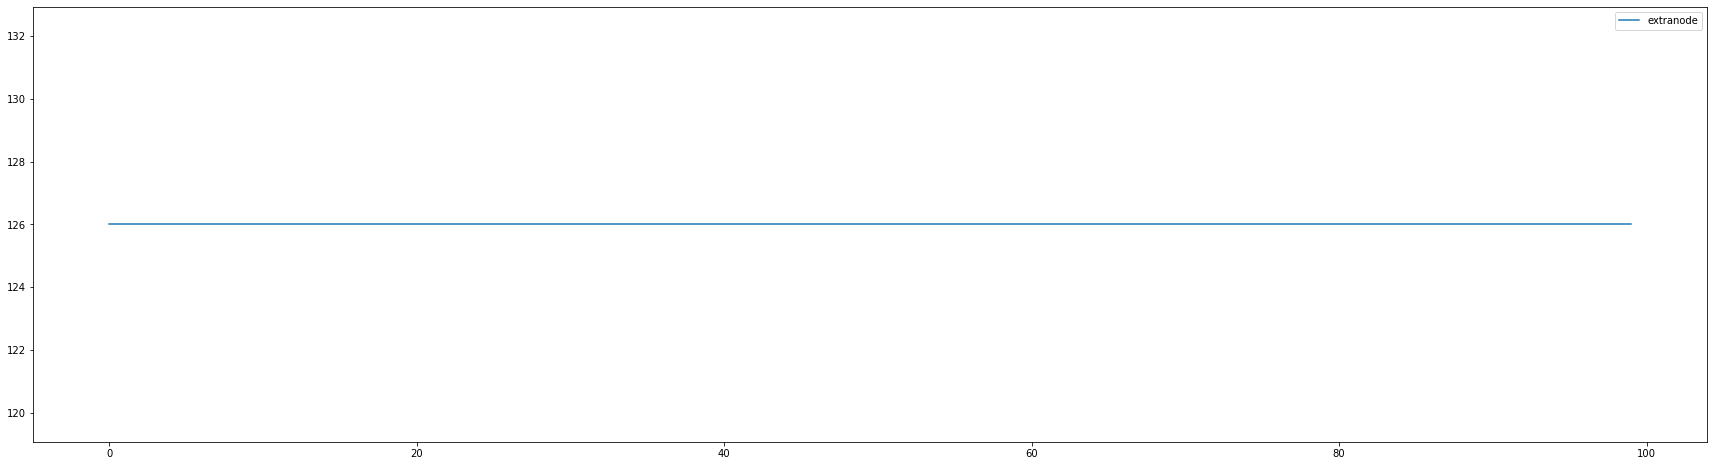

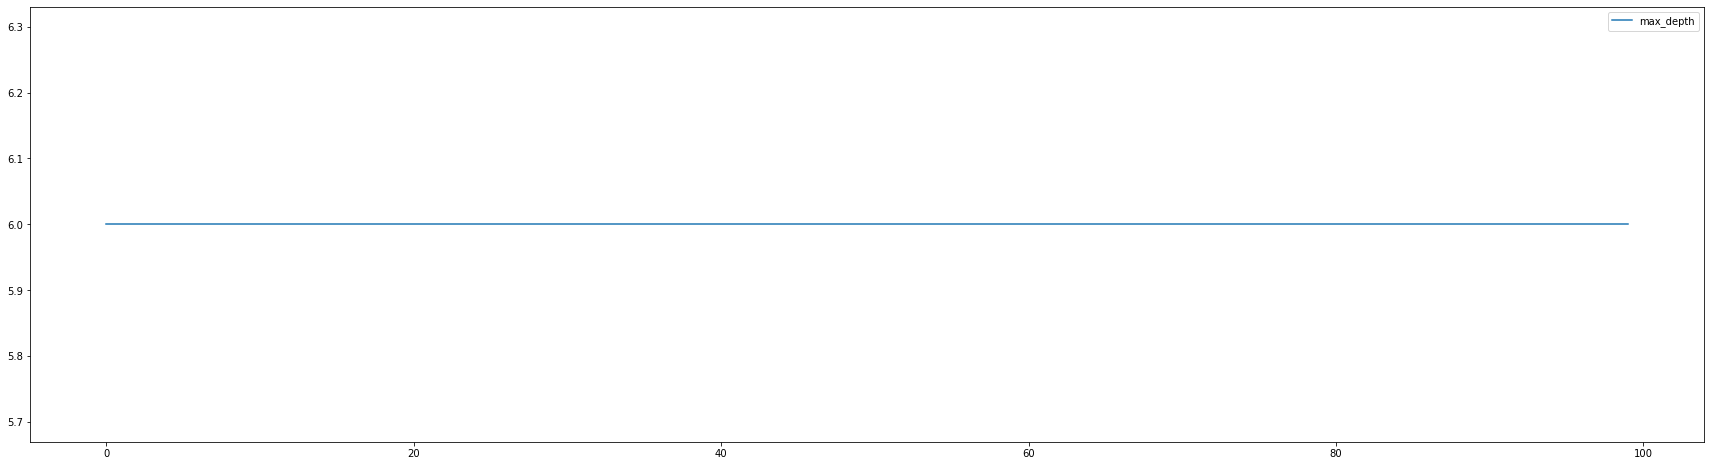

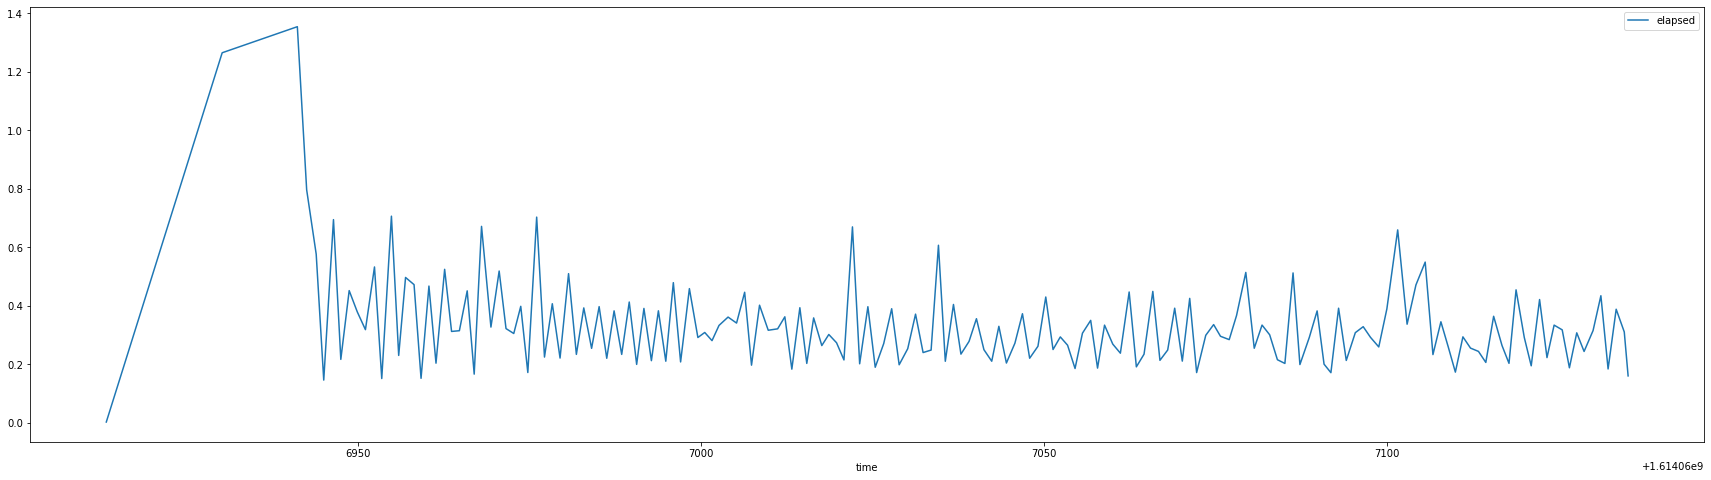

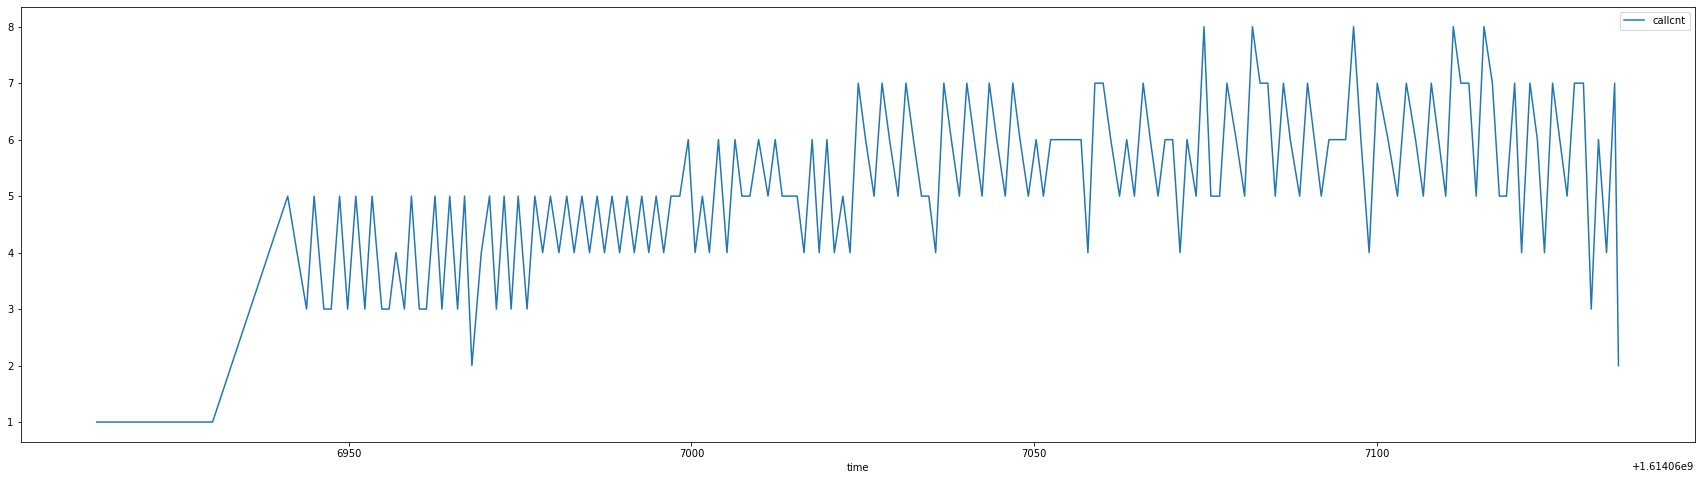

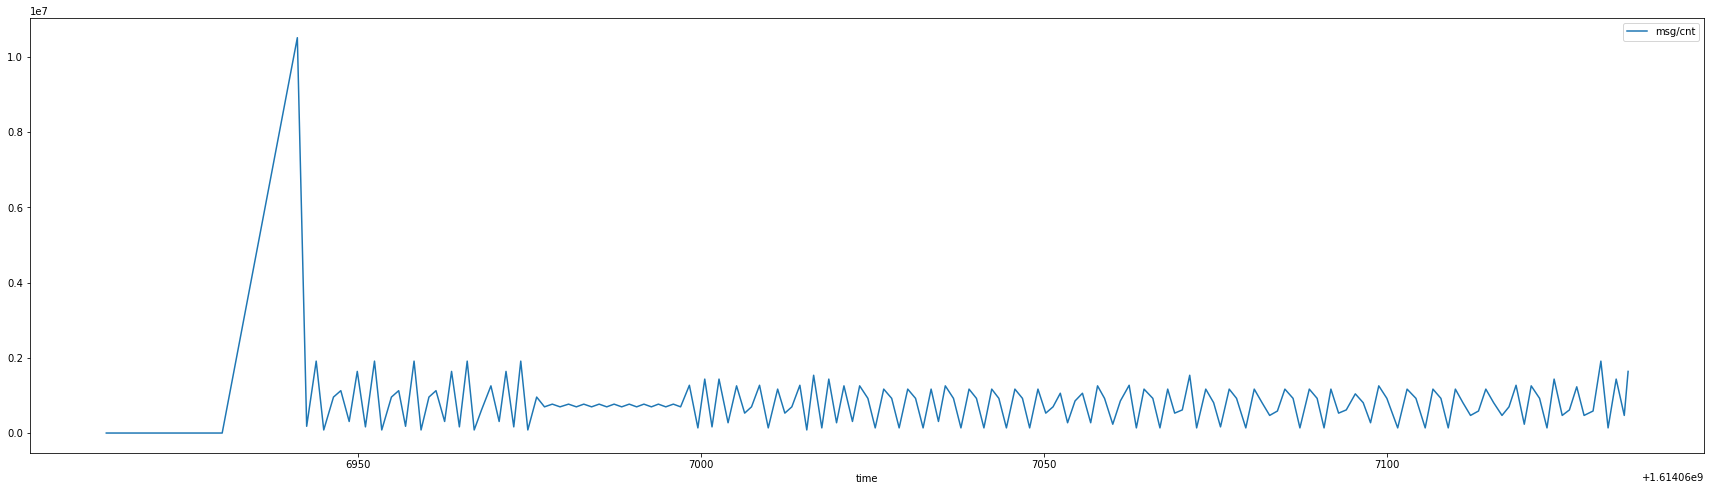

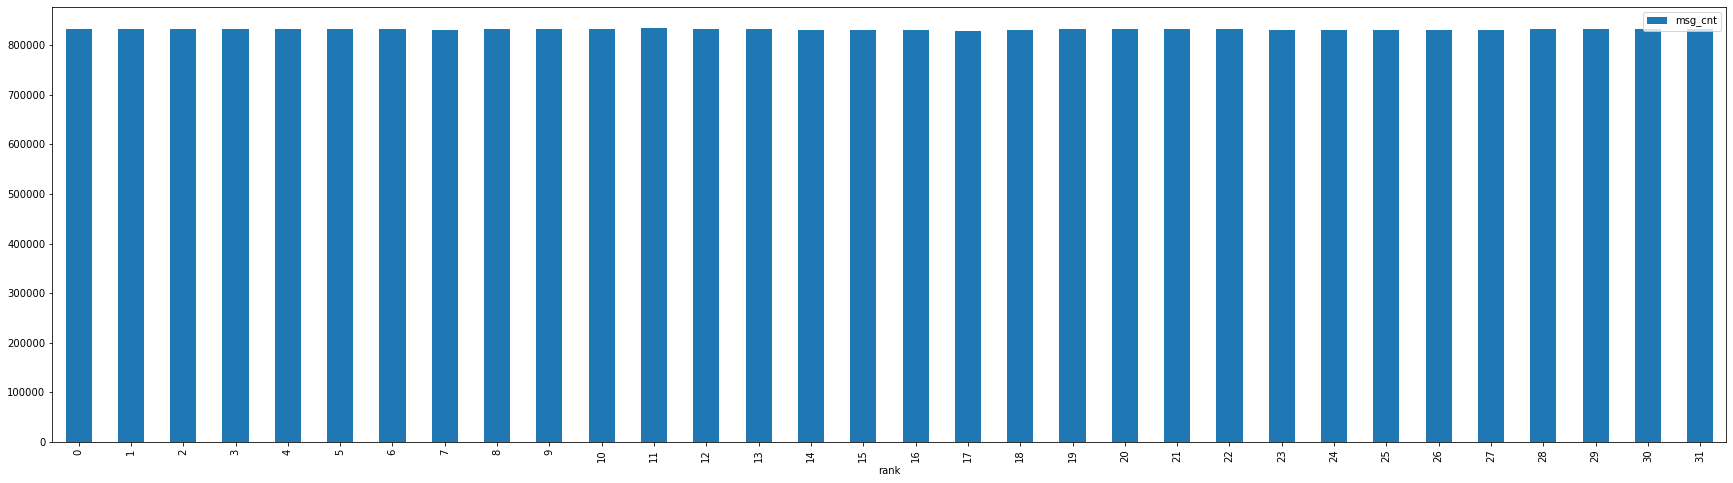

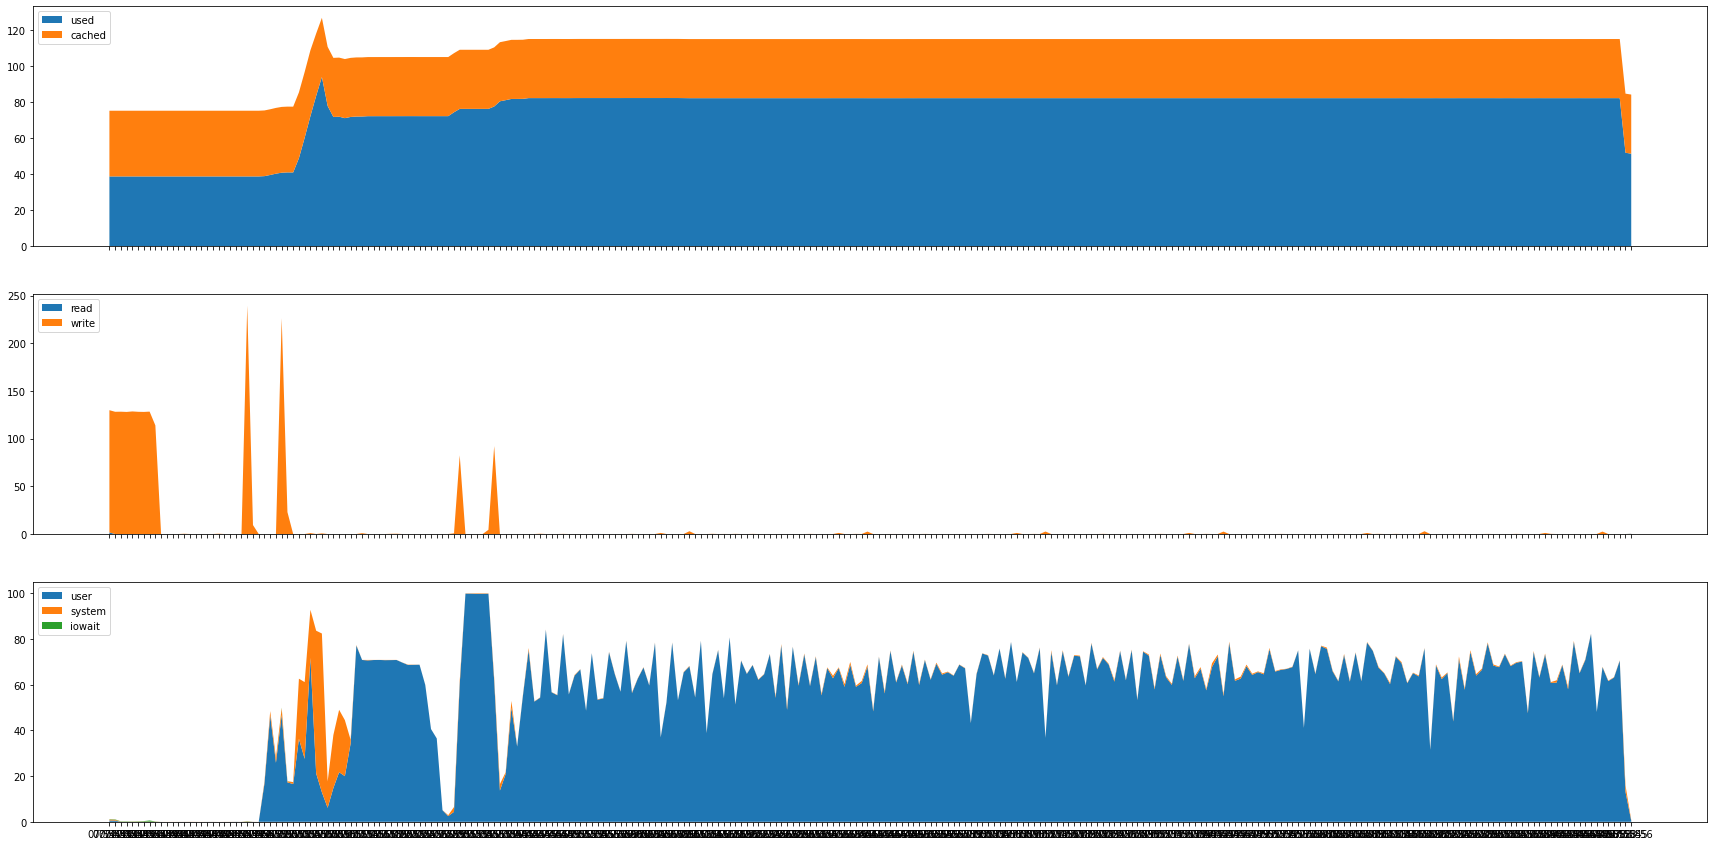

In [40]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench1200Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   73250	73049	73048	73407
172.31.63.214 : 4   73794	73638	73435	73436
172.31.50.230 : 4   74483	74482	74841	74685
172.31.48.87 : 4   78434	78277	78075	78076
172.31.56.136 : 4   74880	75237	75081	74879
172.31.59.90 : 4   76307	76148	76554	76303
172.31.62.187 : 4   73665	73826	73469	73468
172.31.52.207 : 4   74833	74834	75029	75190
Start time : 34337.876307983


/home/sparkuser
21/02/23 08:08:34 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0015/jobs
http://sr525:28080/history/application_1614062157897_0015/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0015.json
application_1614062157897_0015


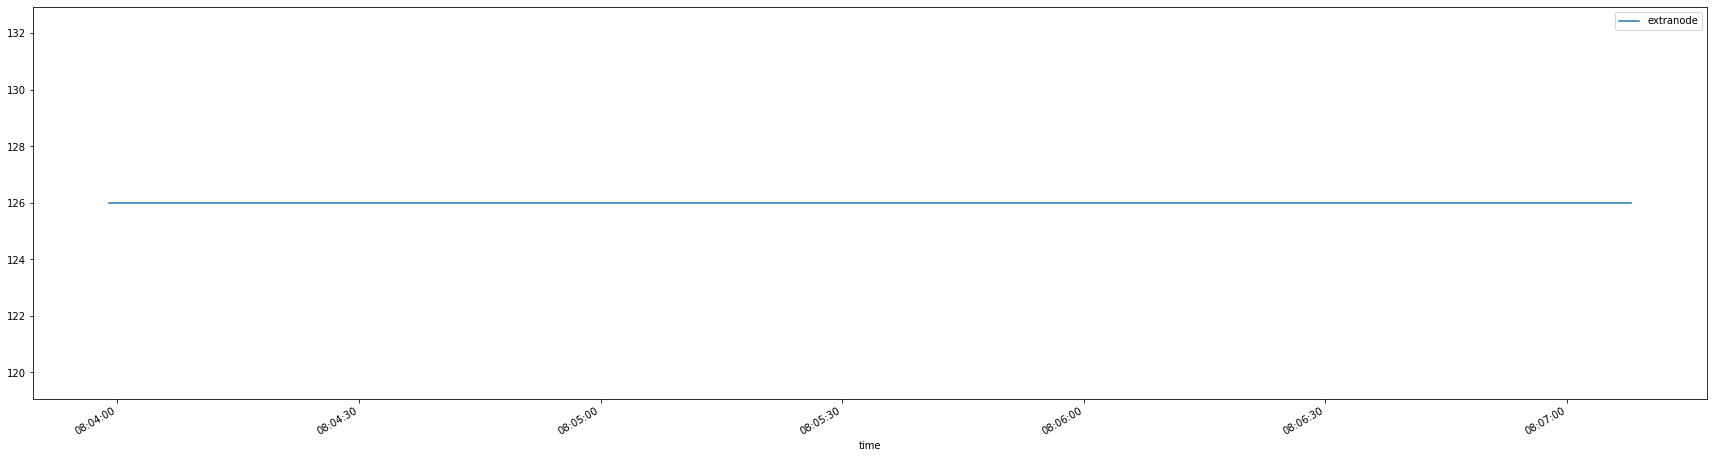

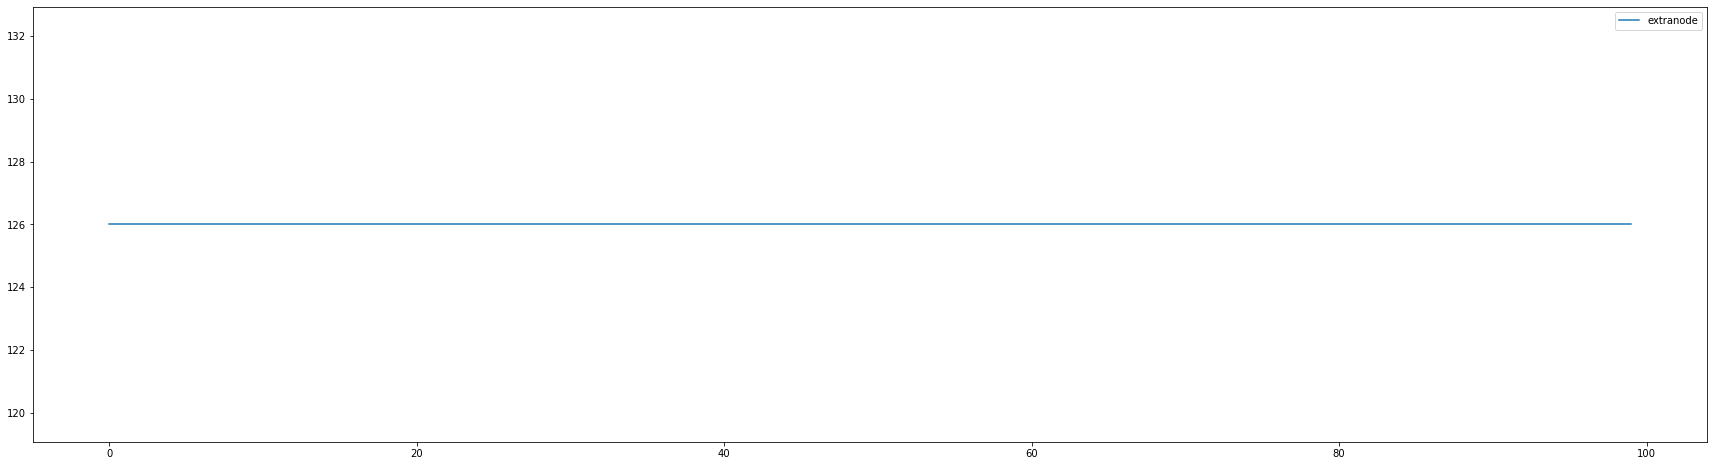

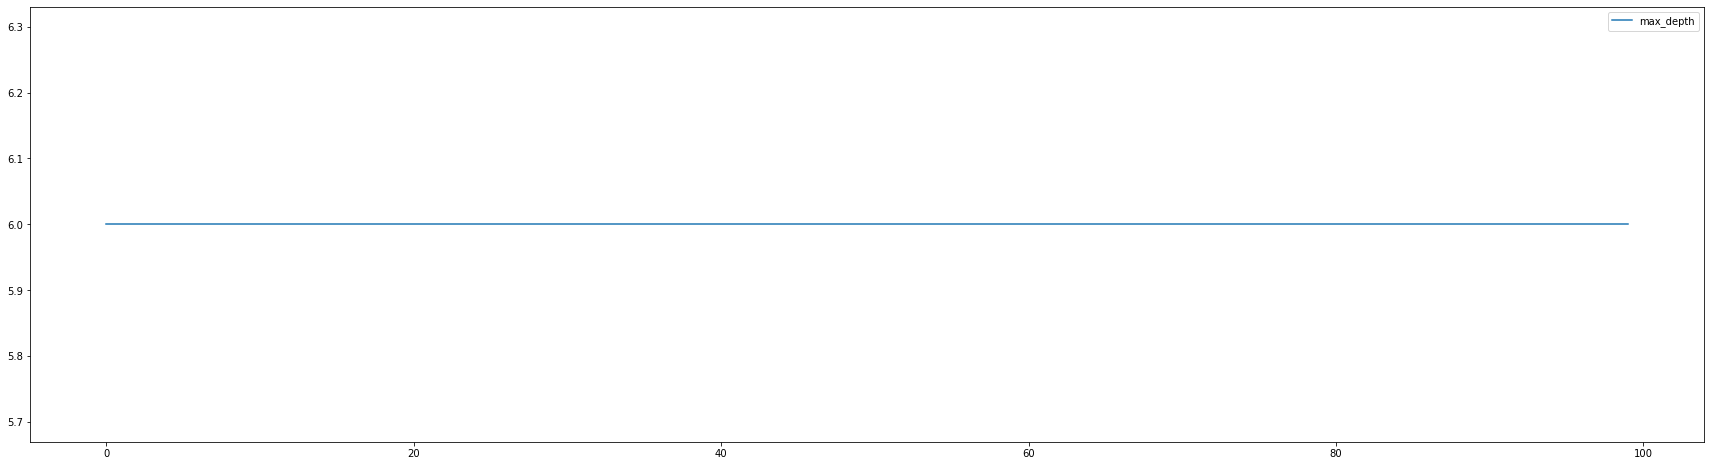

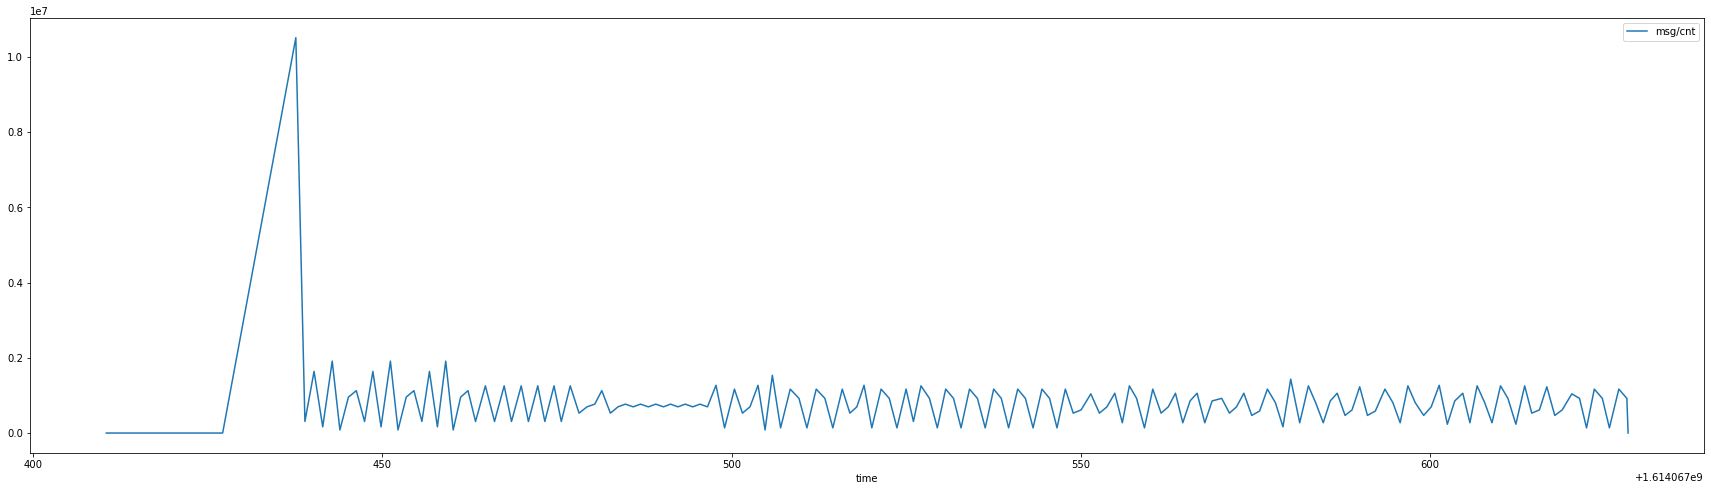

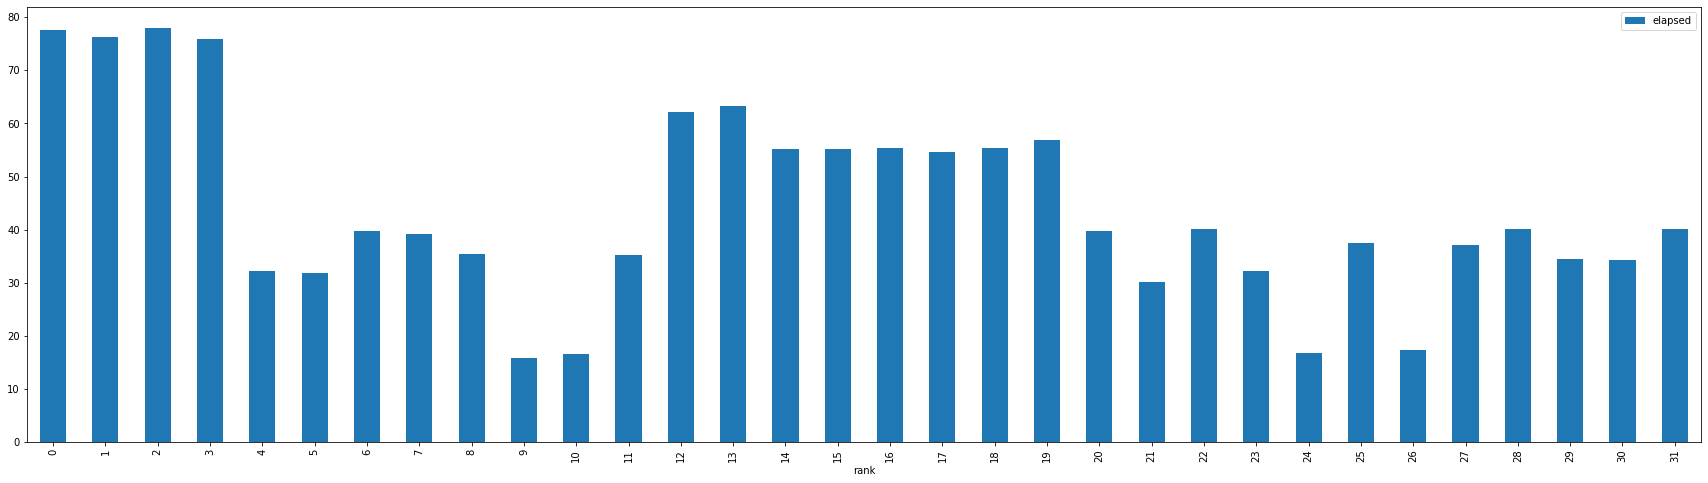

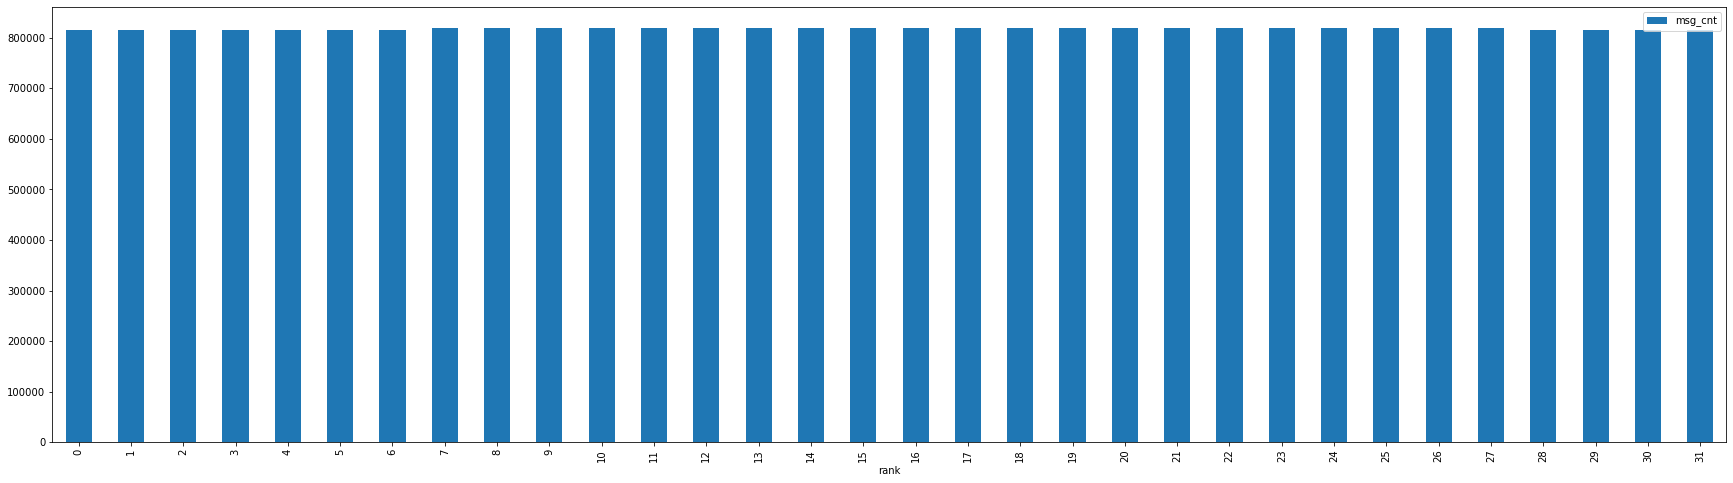

In [41]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench1200Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

# mortgage on 2 nodes

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   31715	31960	31596	31711
172.31.63.214 : 4   33843	33479	33594	33597
172.31.50.230 : 4   34643	34644	34473	34890
172.31.48.87 : 4   34242	34121	34489	34234
172.31.56.136 : 4   34945	34579	34692	34698
172.31.59.90 : 4   35284	35030	34920	35038
172.31.62.187 : 4   33863	33608	33609	33497
172.31.52.207 : 4   35549	35294	35183	35295
Start time : 31102.021894941


/home/sparkuser
21/02/23 07:11:51 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0007/jobs
http://sr525:28080/history/application_1614062157897_0007/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0007.json
application_1614062157897_0007


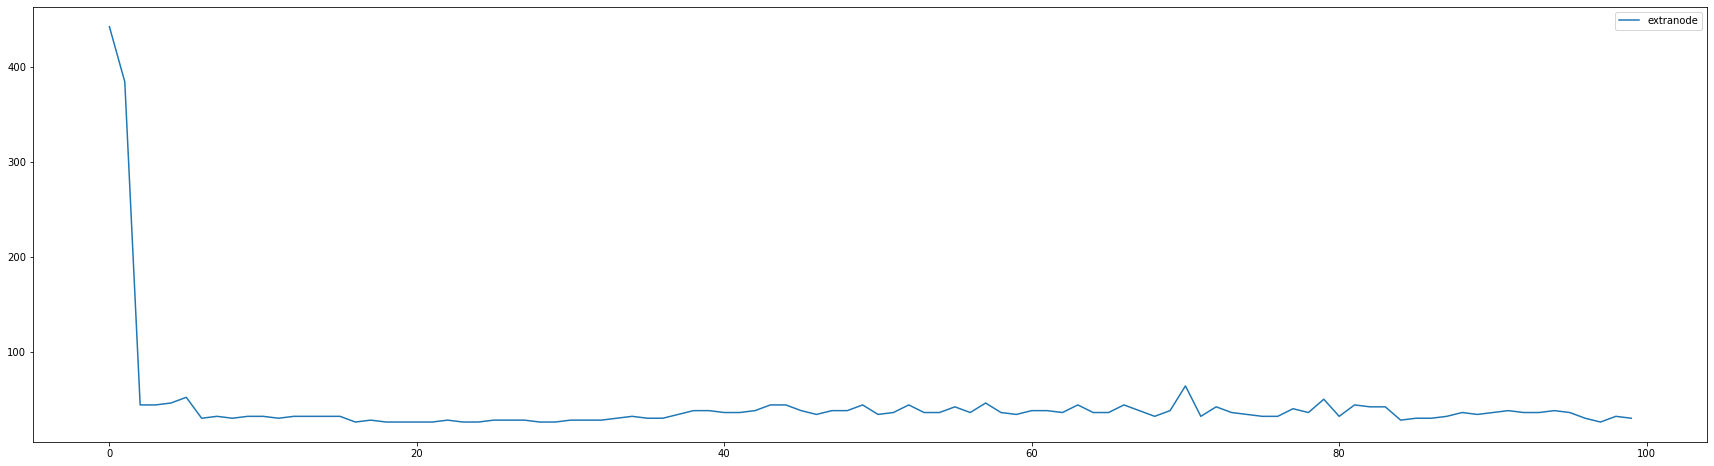

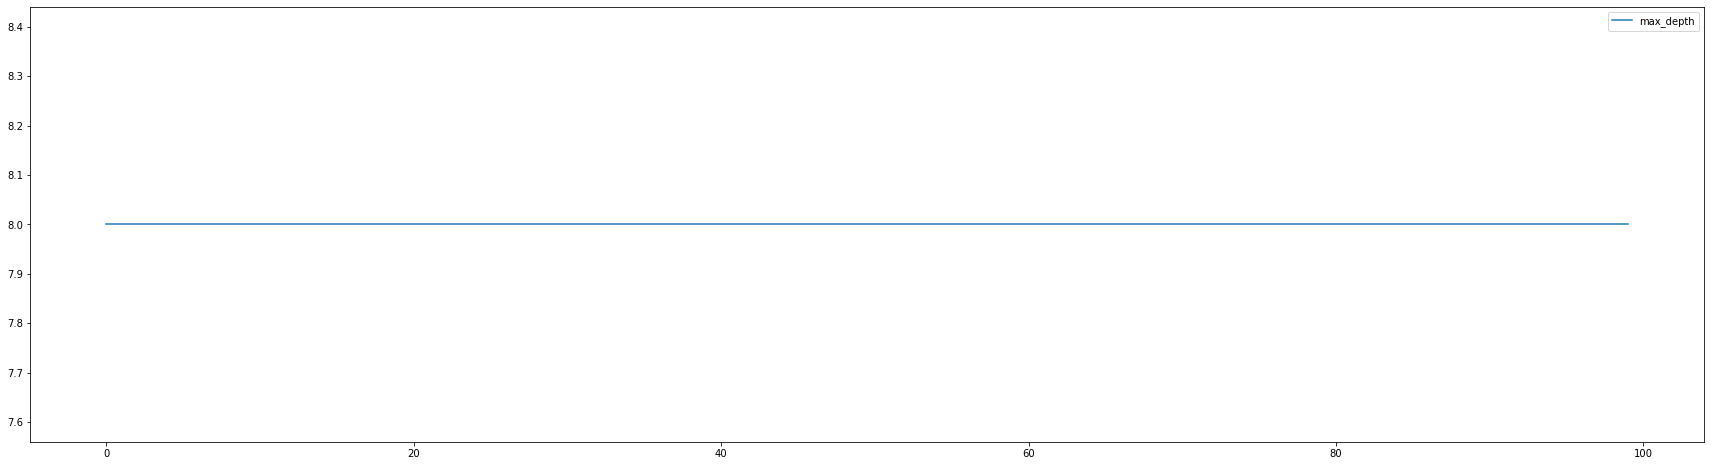

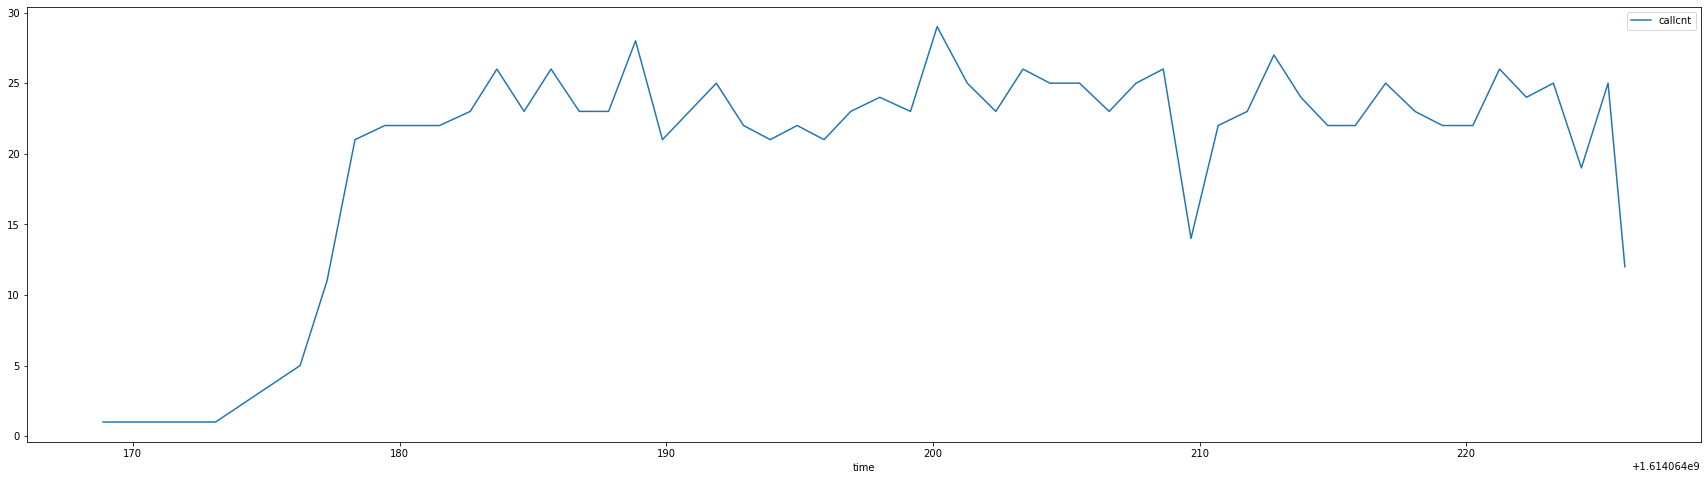

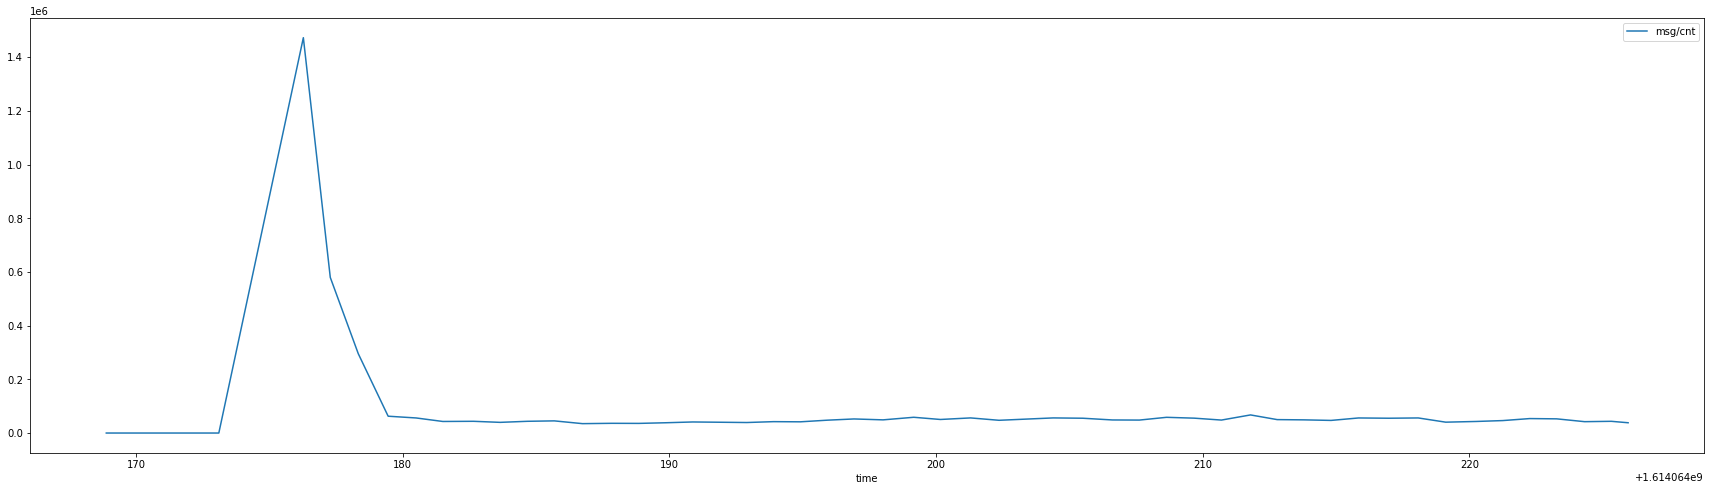

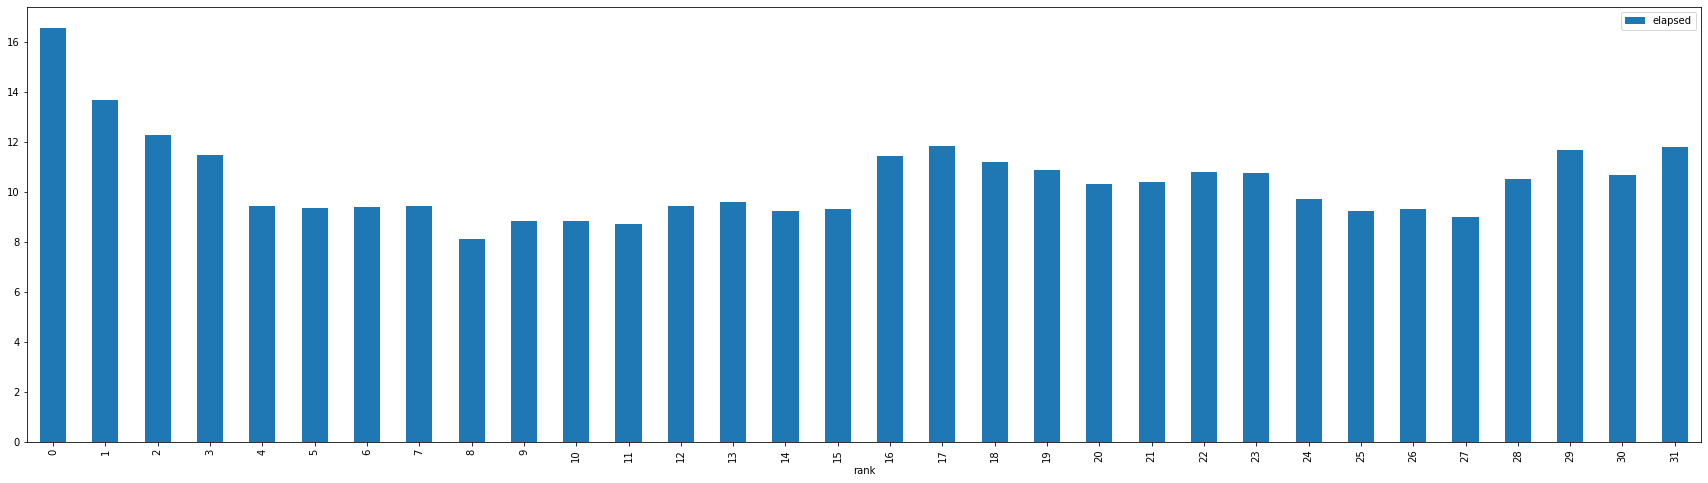

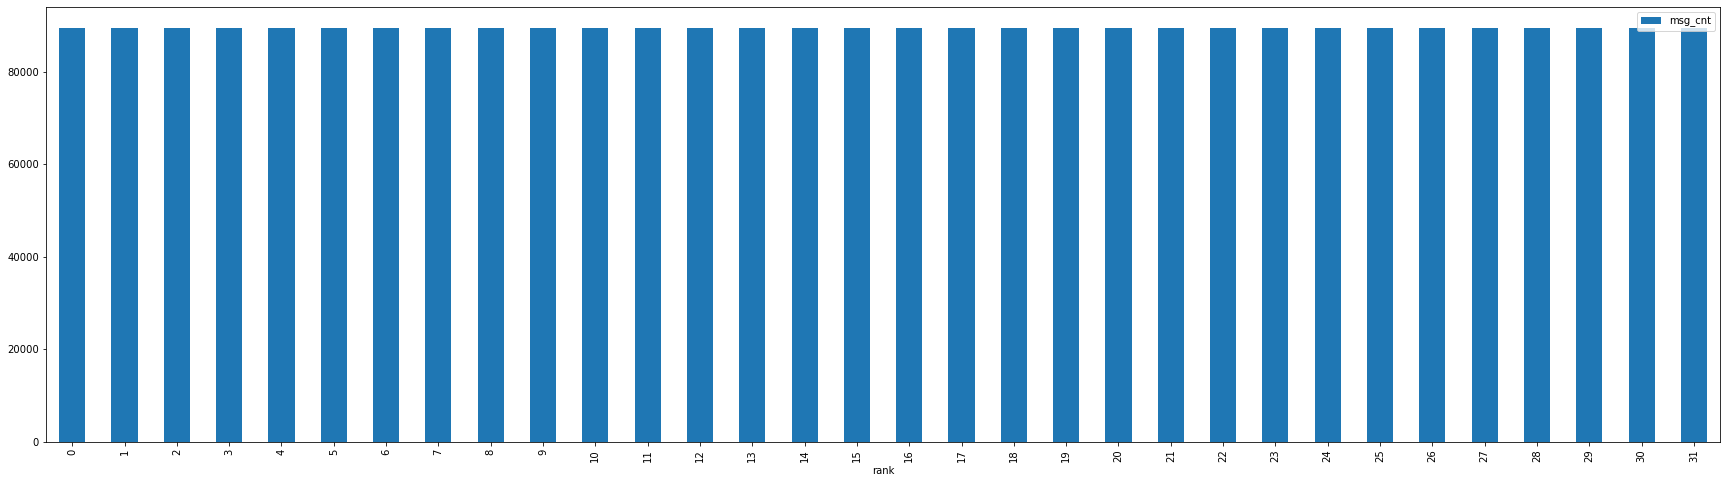

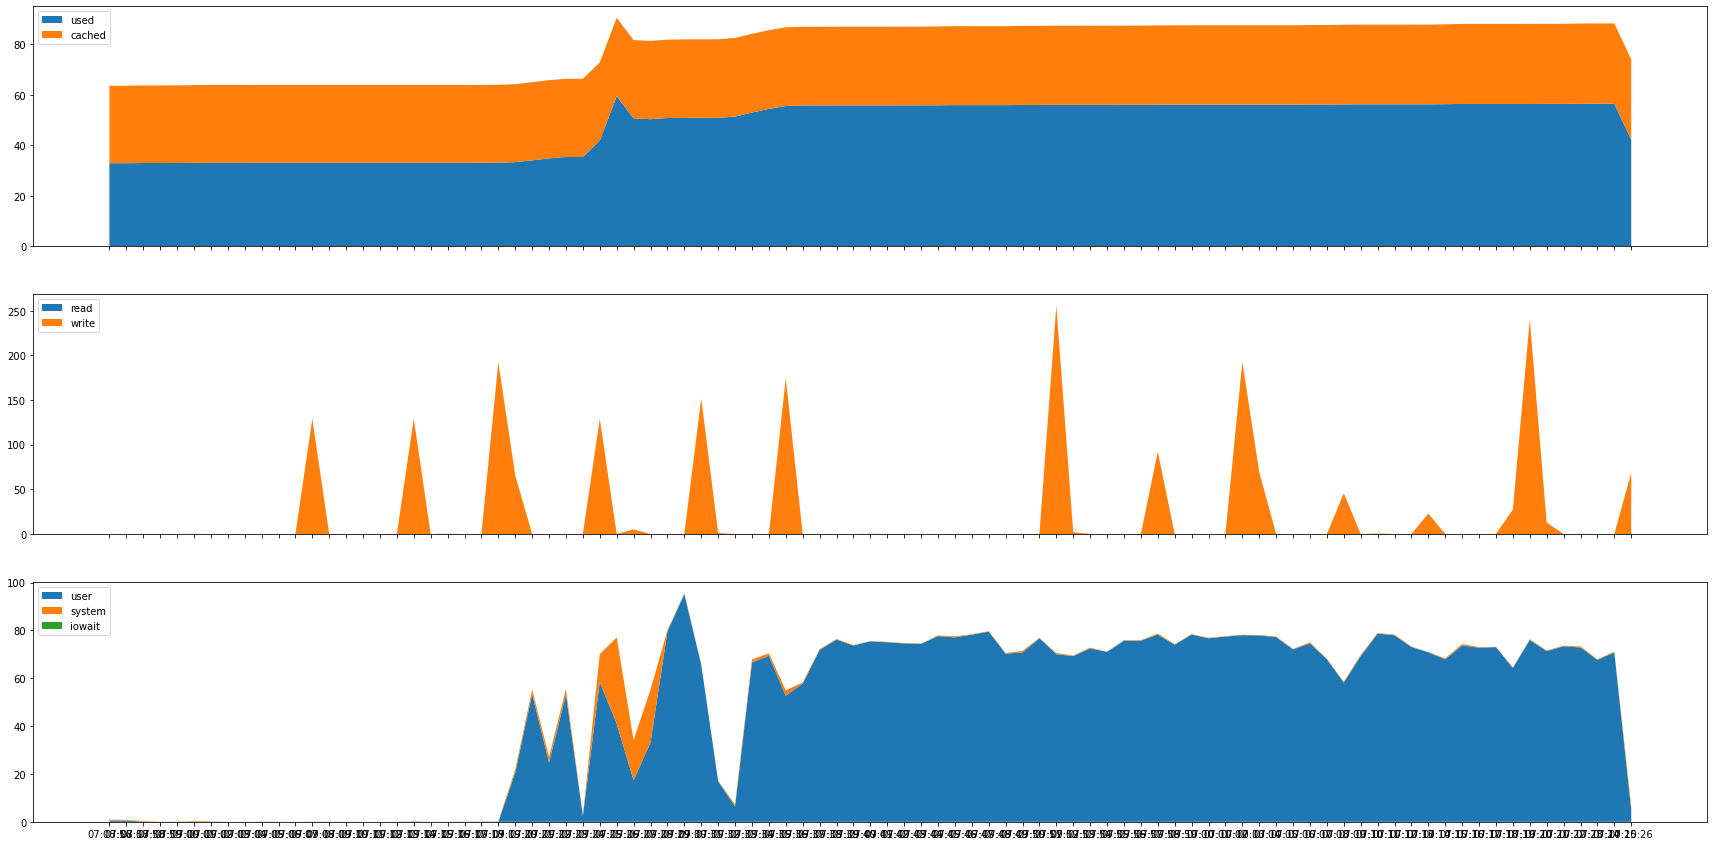

In [50]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)
    

params = {'labelCol': "delinquency_12",  #"label"
          'numRound': 100,
          'maxDepth': 8,
          'maxLeaves': 256,
          'maxBin': 256,
          'alpha': 0.9,
          'eta': 0.1,
          'gamma': 0.1,
          'subsample': 1.0,
          'reg_lambda': 1.0,
          'scalePosWeight': 2.0,
          'minChildWeight': 30.0,
          'treeMethod': 'hist',
          'objective': 'reg:squarederror', #if xgboost v0.82 needs to use 'reg:linear'. If >= 0.9, uses squarederror
          'growPolicy': 'depthwise',  
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'singlePrecisionHistogram':True,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/xgboost_36_files_float.dataframe.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   37128	37385	37019	37135
172.31.63.214 : 4   39130	38891	39309	39054
172.31.50.230 : 4   40260	39894	40011	40012
172.31.48.87 : 4   39393	39765	39578	39502
172.31.56.136 : 4   39890	39892	40141	39775
172.31.59.90 : 4   40371	40365	40253	40623
172.31.62.187 : 4   38690	39063	38808	38809
172.31.52.207 : 4   40564	40196	40309	40301
Start time : 31426.657061457


/home/sparkuser
21/02/23 07:17:20 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0008/jobs
http://sr525:28080/history/application_1614062157897_0008/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0008.json
application_1614062157897_0008


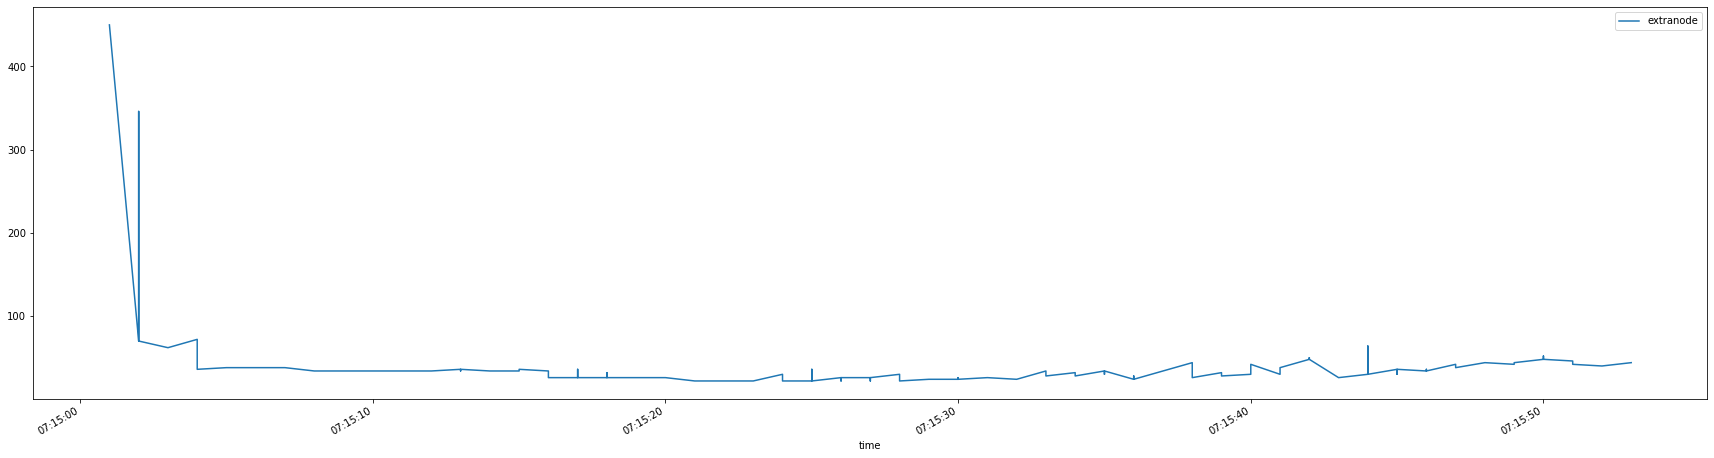

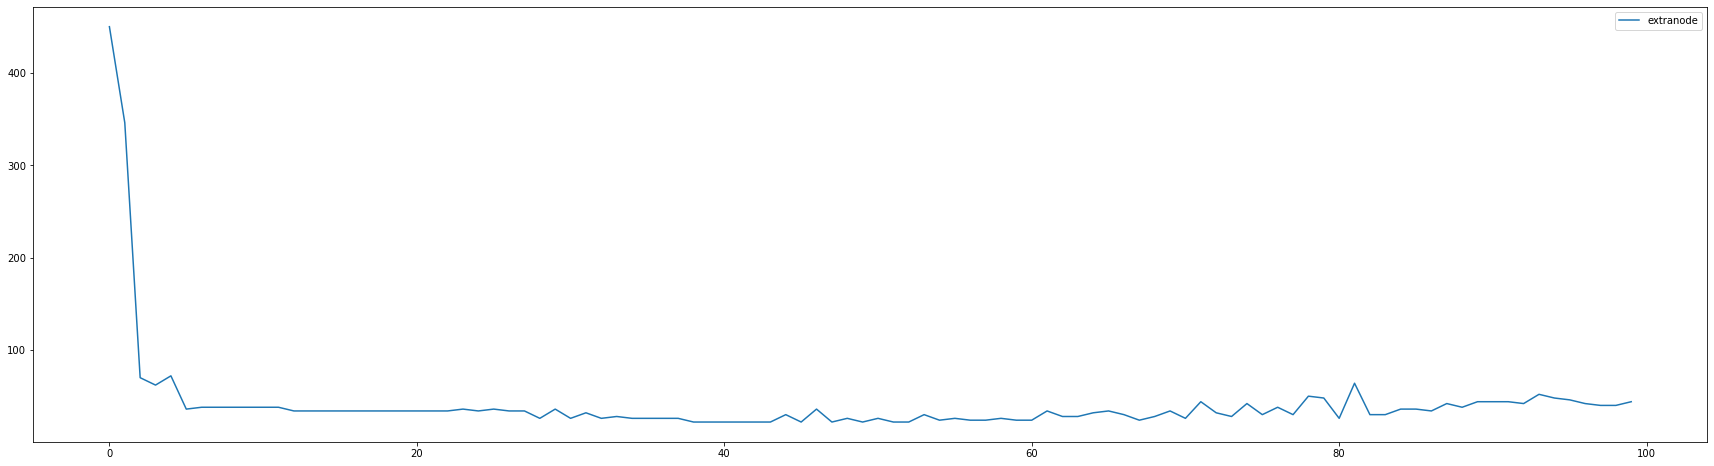

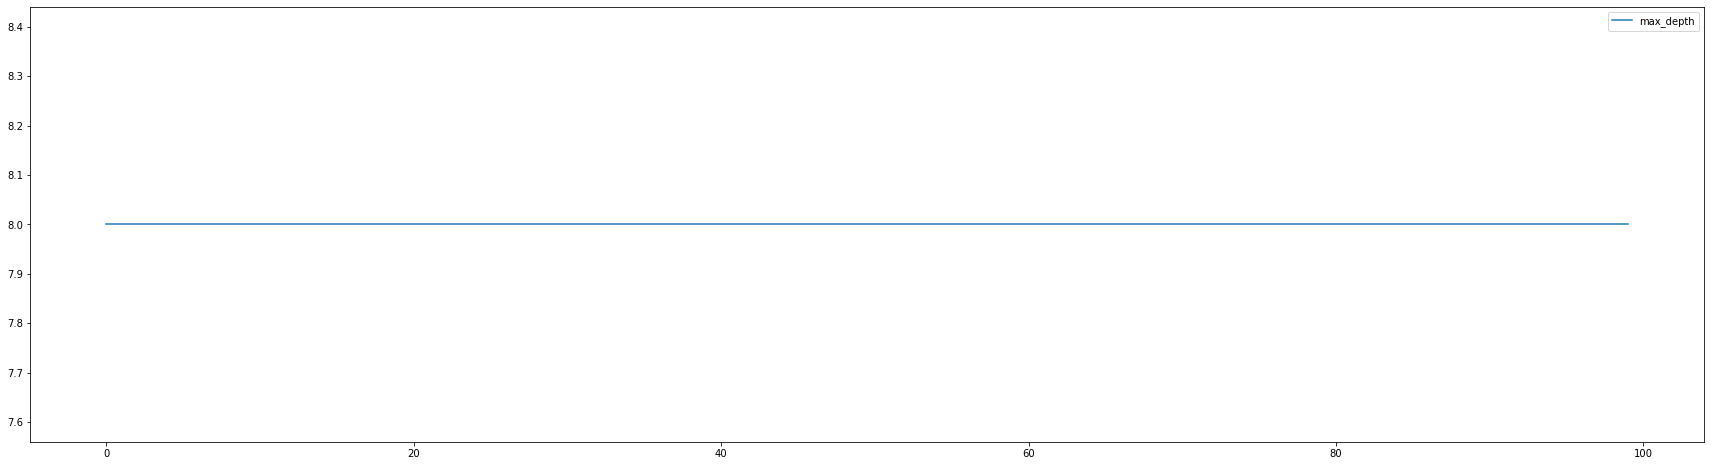

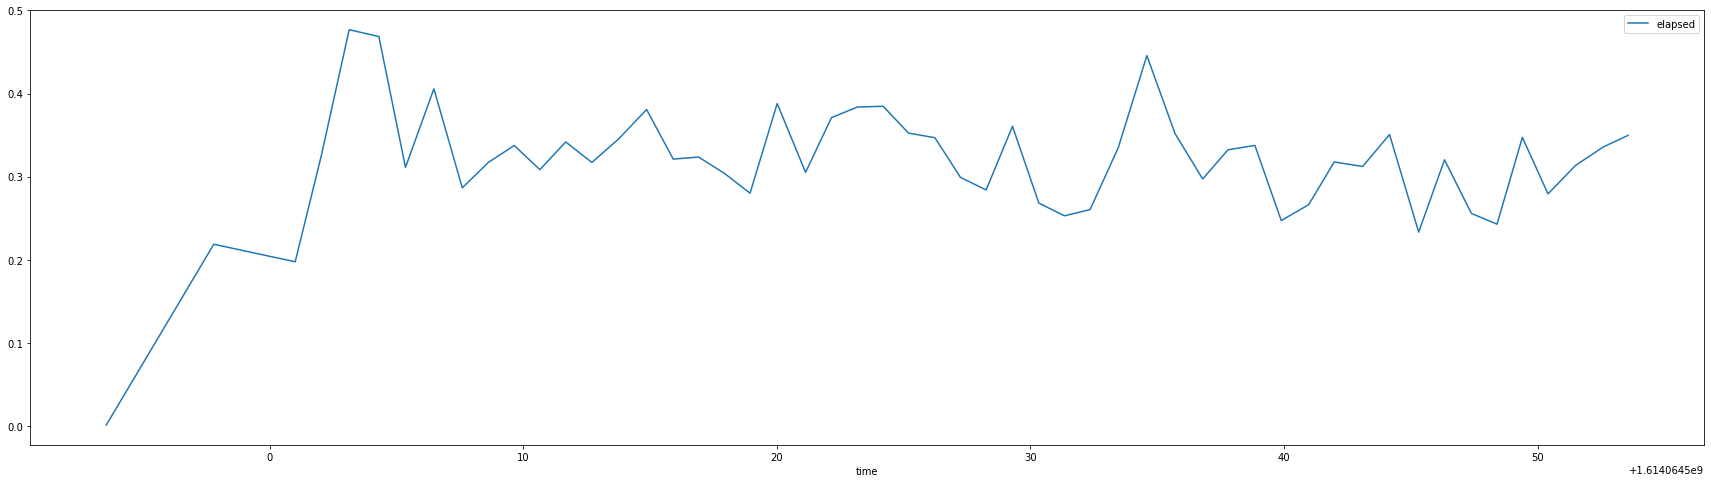

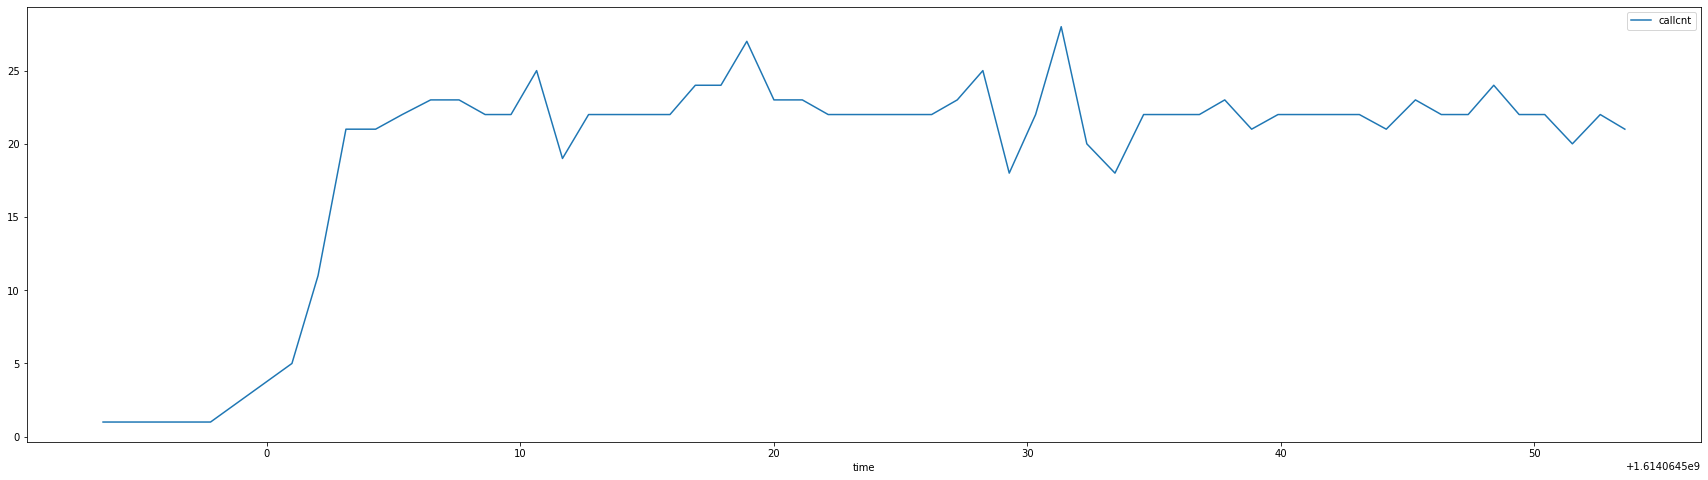

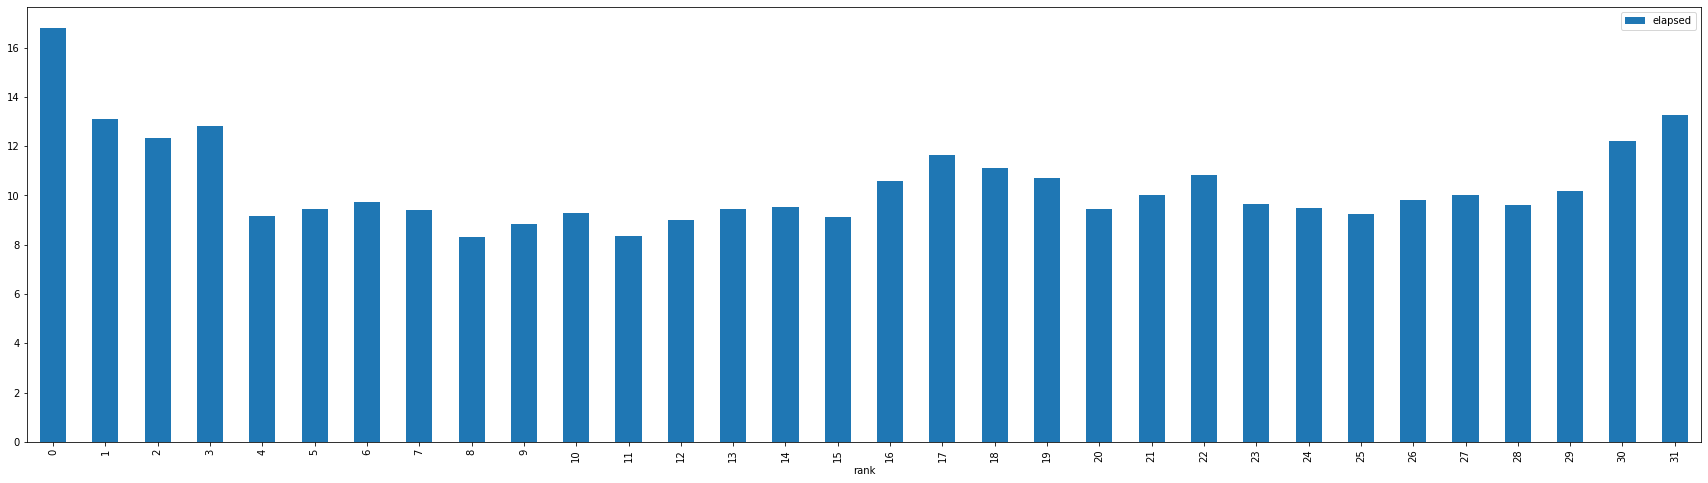

In [51]:
nodes=len(clients)
executors_per_node=2*int(16/nodes)
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)
    

params = {'labelCol': "delinquency_12",  #"label"
          'numRound': 100,
          'maxDepth': 8,
          'maxLeaves': 256,
          'maxBin': 256,
          'alpha': 0.9,
          'eta': 0.1,
          'gamma': 0.1,
          'subsample': 1.0,
          'reg_lambda': 1.0,
          'scalePosWeight': 2.0,
          'minChildWeight': 30.0,
          'treeMethod': 'hist',
          'objective': 'reg:squarederror', #if xgboost v0.82 needs to use 'reg:linear'. If >= 0.9, uses squarederror
          'growPolicy': 'depthwise',  
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'singlePrecisionHistogram':True,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/xgboost_36_files_float.dataframe.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

# Criteo

In [40]:
jars=!ls -d {home}/jars-for-aws-cpu/1.3/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/1.3/xgboost4j_2.12-1.3.3.jar pyspark-shell'

XGBoost Parameters: 
 {'featuresCol': 'features', 'labelCol': '_c0', 'maxDepth': 10, 'numRound': 200, 'objective': 'binary:logistic', 'evalMetric': 'logloss', 'alpha': 3.0, 'eta': 0.2, 'gamma': 0.4, 'reg_lambda': 100.0, 'subsample': 0.8, 'colsampleBytree': 0.8, 'minChildWeight': 20.0, 'treeMethod': 'hist', 'growPolicy': 'depthwise', 'singlePrecisionHistogram': True, 'numWorkers': 32, 'nthread': 24, 'verbosity': 3}
executor per node: 4
parallelism: 768
memory: 5576m
offheap:38400m
172.31.57.117 : 4   82800	82949	82948	82701
172.31.63.214 : 4   83393	83248	83398	83149
172.31.50.230 : 4   84256	84400	84403	84156
172.31.48.87 : 4   87575	87674	87818	87823
172.31.56.136 : 4   84756	84855	85005	85004
172.31.59.90 : 4   86225	86226	86460	86046
172.31.62.187 : 4   83143	83242	83391	83390
172.31.52.207 : 4   84436	84535	84683	84684
Start time : 36379.711592957


/home/sparkuser
21/02/23 08:44:21 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614062157897_0019/jobs
http://sr525:28080/history/application_1614062157897_0019/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614062157897_0019.json
application_1614062157897_0019
Completed training the model. Time(sec):  337.4117363330006


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


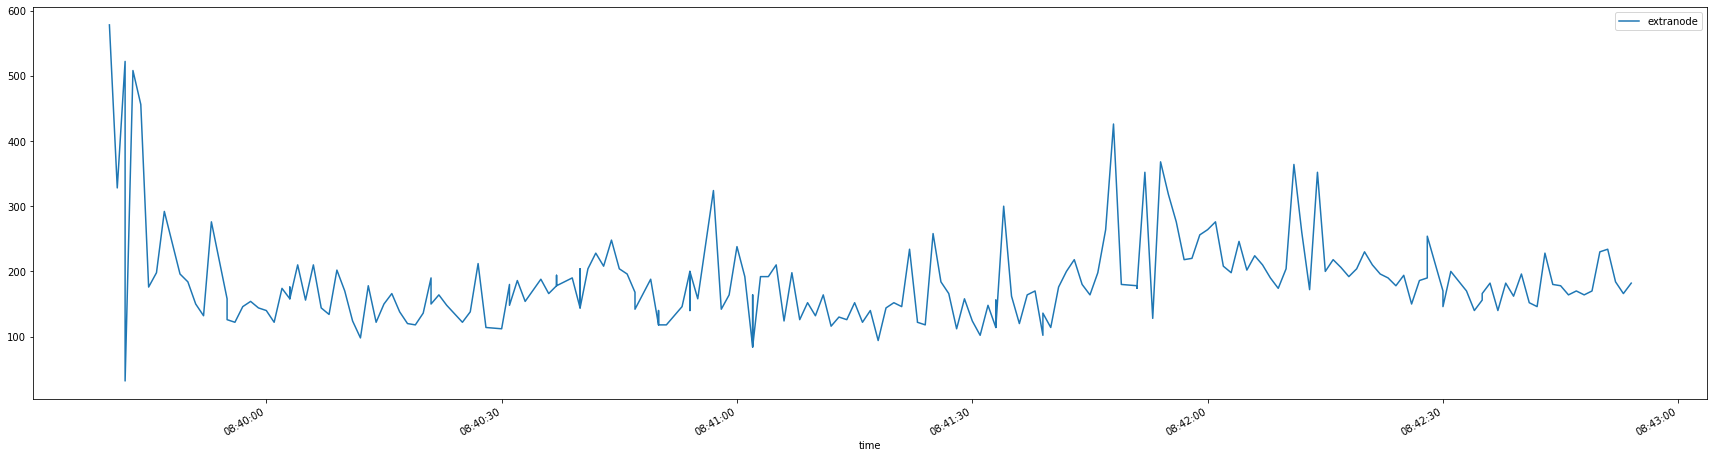

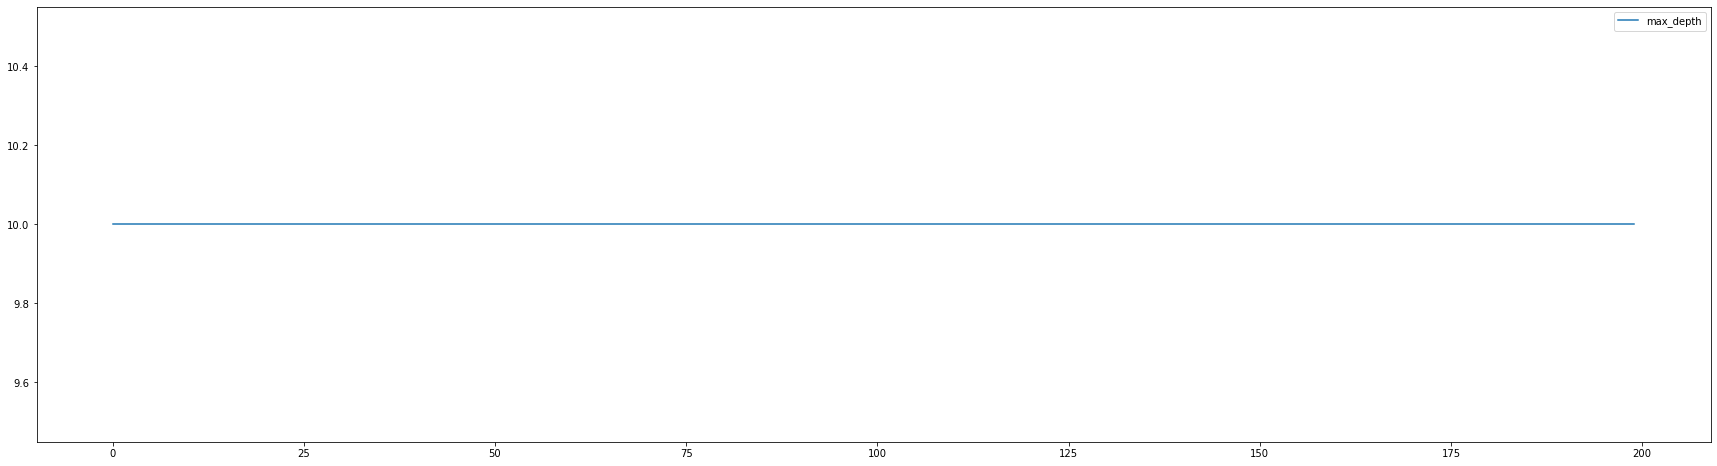

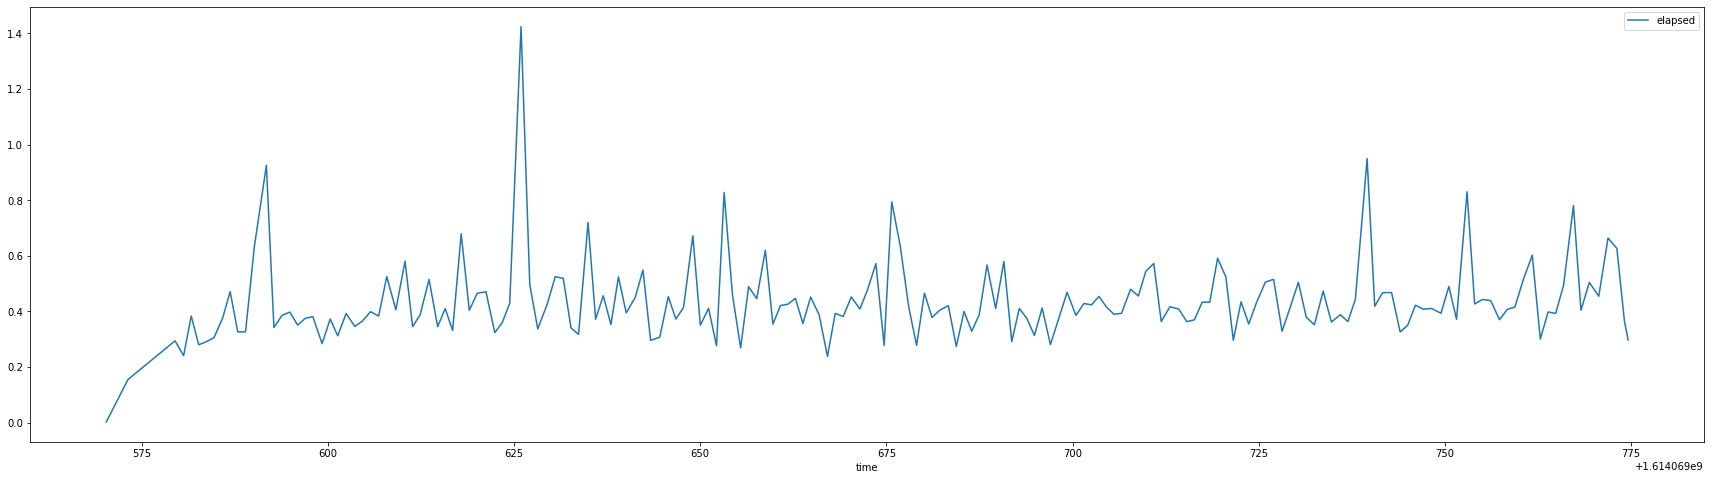

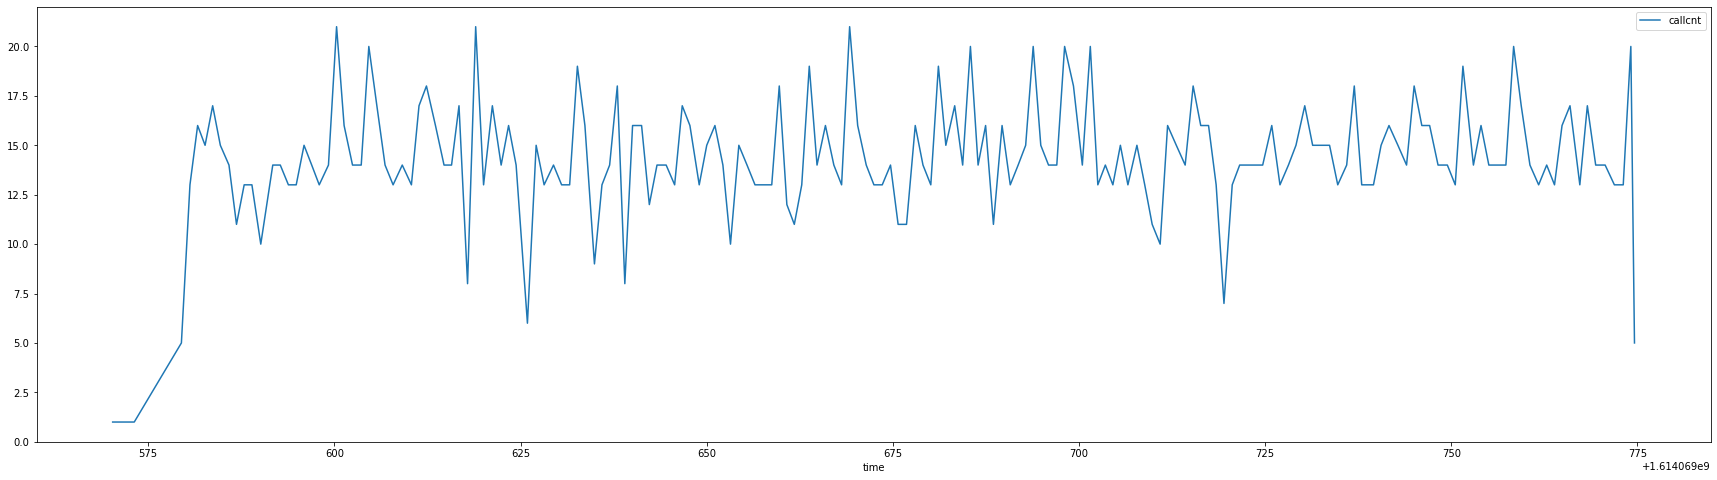

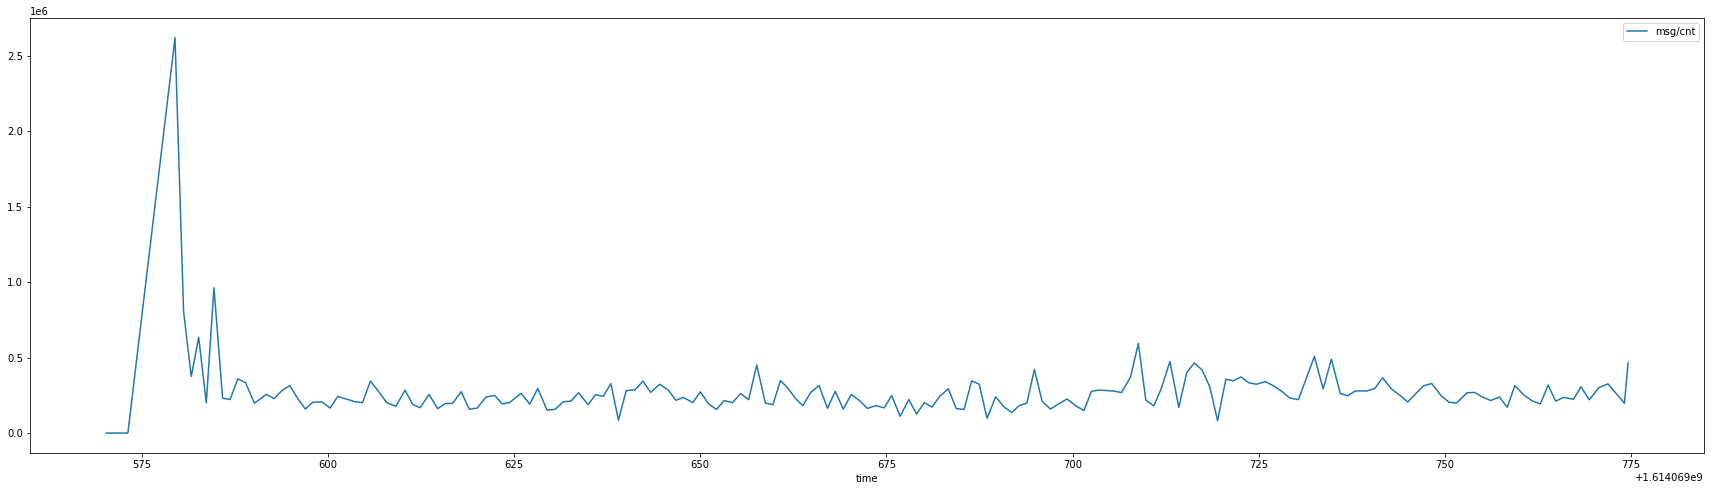

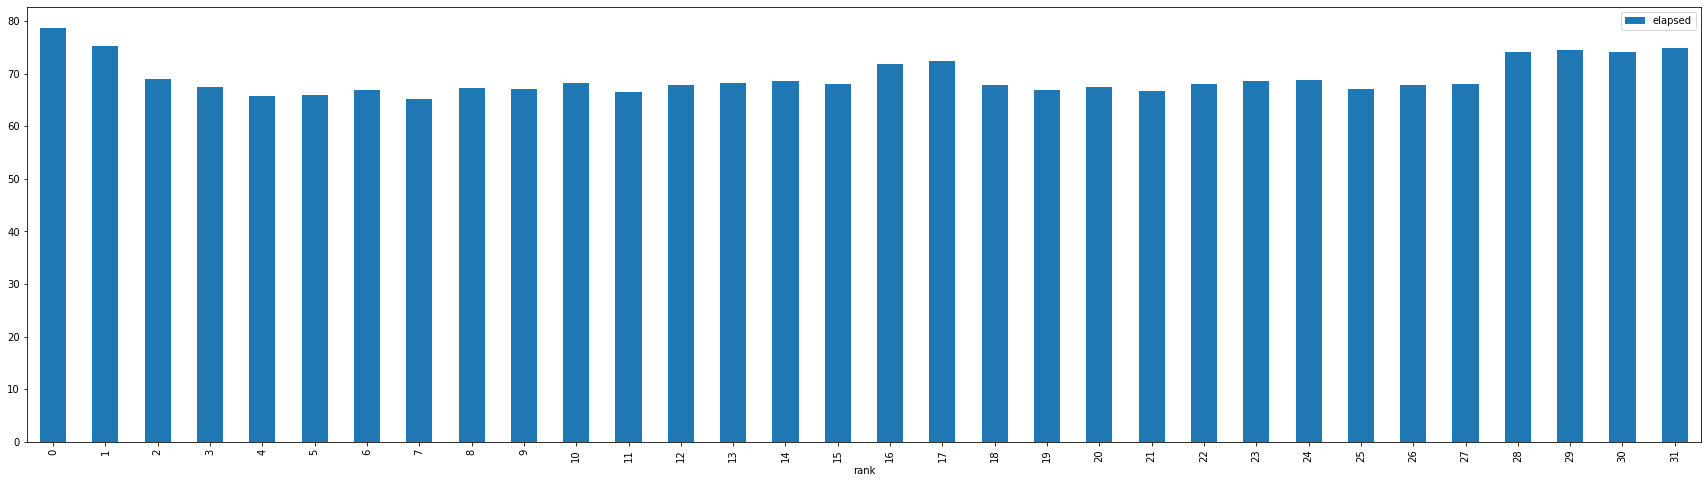

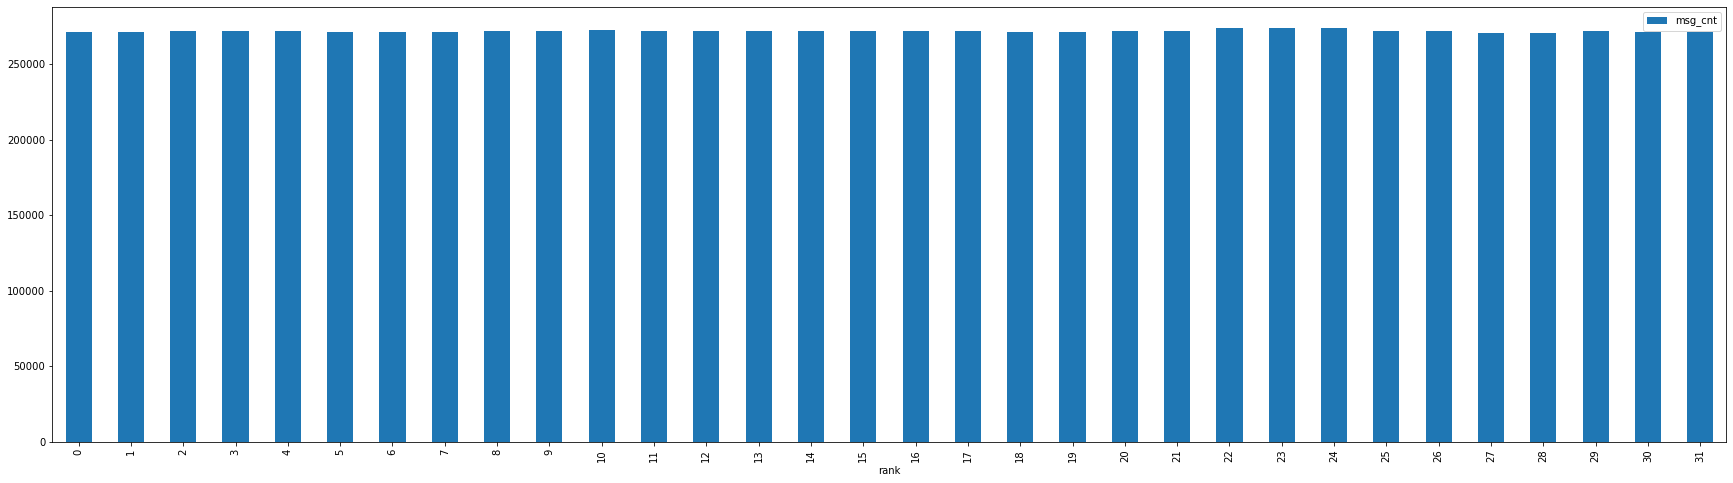

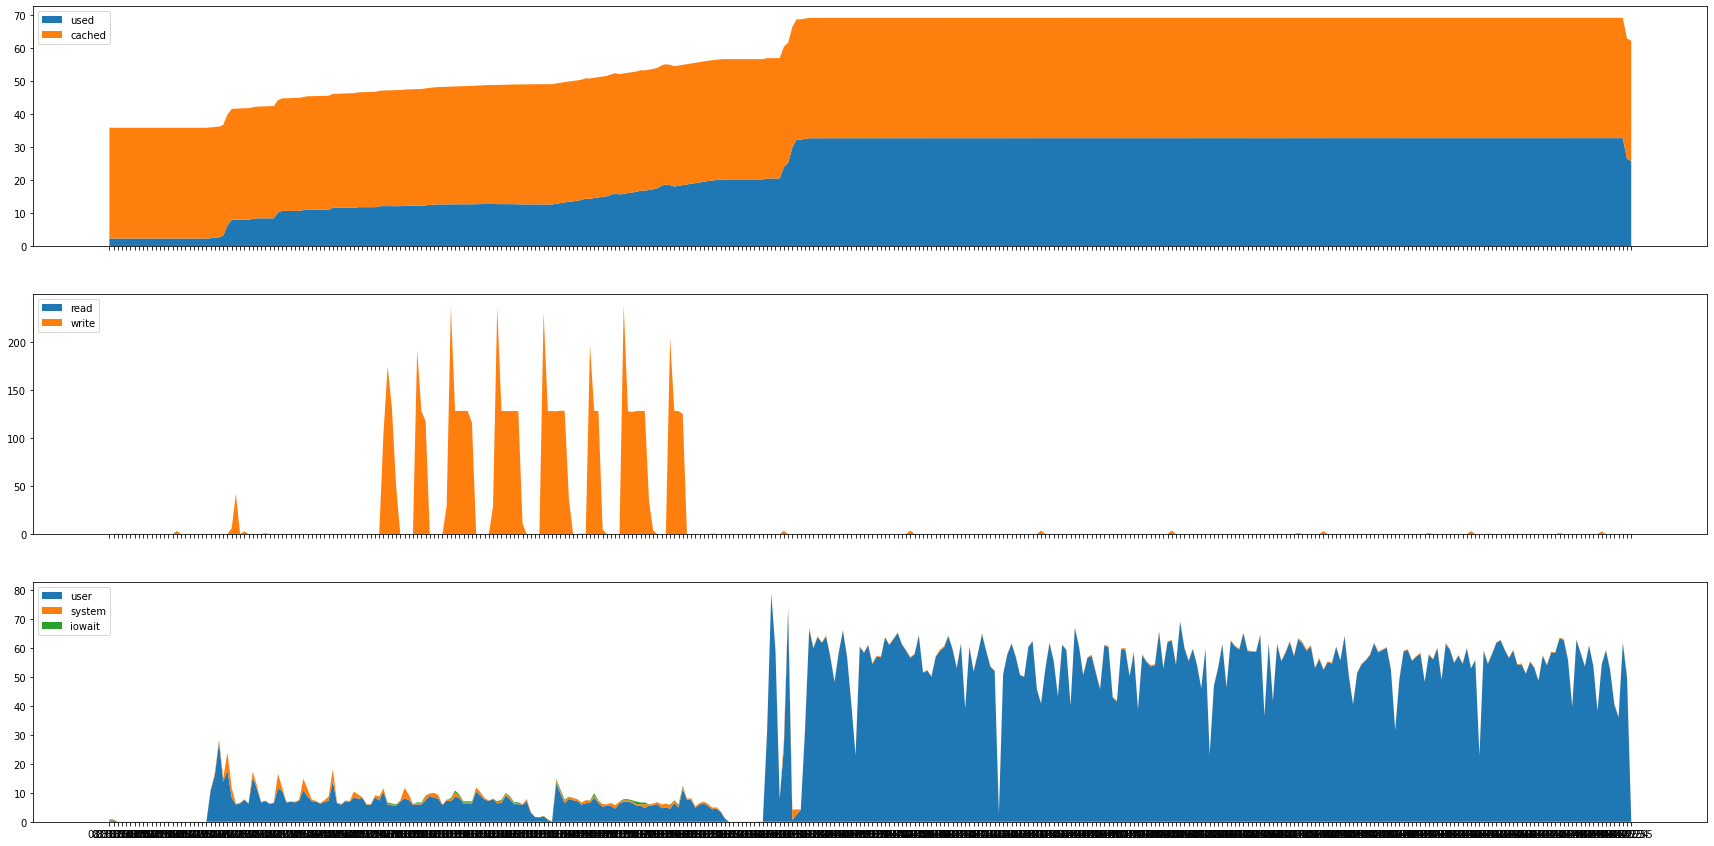

In [41]:

nodes=len(clients)
executors_per_node=4
cores_per_executor=24

cache_size=75*16
total_size=90000*int(16/nodes)

overall_start_time = timeit.default_timer()
params = {
    'featuresCol': "features",
    'labelCol': "_c0",  #"label"
    'maxDepth': 10,
    'numRound': 200,
    'objective': 'binary:logistic',
    'evalMetric': 'logloss',
    'alpha': 3.0,
    'eta': 0.2,
    'gamma': 0.4,
    'reg_lambda': 100.0,
    'subsample': 0.8,
    'colsampleBytree': 0.8,
    'minChildWeight': 20.0,
    'treeMethod': 'hist',
    'growPolicy': 'depthwise',
    'singlePrecisionHistogram':True,
      'numWorkers': executors_per_node*nodes,
      'nthread':cores_per_executor,
    'verbosity': 3
}    


print("XGBoost Parameters: \n", params)

nRuns = 1

for i in range(nRuns):
    sc, spark=create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, "Criteo 2 days")
    pinexecutor(clients)
    
    try:
        df = spark.read.format('parquet').load('/criteo-float-parquet-2days')
        
        startmonitor(clients, sc.applicationId, collect_emon=True)
        model, train_time  = run_train_regressor(df, params) #trainingData, params
        appid = sc.applicationId
        stopmonitor(clients, sc, appid)
        print('Completed training the model. Time(sec): ', train_time)
        #model.nativeBooster.saveModel(appid + '-model.bin')
        gettrainingtime(clients,appid)
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        sc.stop()

In [46]:
sc.stop()